### Table of Contents

* [1. Import Libraries](#chapter1)
* [2. Import Datasets](#chapter2)
* [3. Overview Datasets](#chapter3)
* [4. Datasets Exploration](#chapter4)
    * [4.1. Customers](#section_4_1)
    * [4.2. Geolocation](#section_4_2)
    * [4.3. Order Items](#section_4_3)
    * [4.4. Order Payments](#section_4_4)
    * [4.5. Order Reviews](#section_4_5)
    * [4.6. Orders](#section_4_6)
    * [4.7. Products](#section_4_7)
    * [4.8. Sellers](#section_4_8)
* [5. Cleaning](#chapter5)
    * [5.1. Data Merge](#section_5_1)
    * [5.2. Missing Values](section_5_2)
    * [5.3. Outliers](#section_5_2_1)
* [6. Feature Engineering](#chapter6)
    * [6.1. Distance Customers/Sellers](#section_6_1)
    * [6.2. Estimate Delivery Time](#section_6_2)
    * [6.3. Delivery Time](#section_6_3)
    * [6.4. Review Score Mean per Seller](#section_6_4)
    * [6.5. Year, Month, Day, Hour of Purchase](#section_6_5)
    * [6.6. Number of Orders by Unique customers](#section_6_6)
    * [6.7. Total Price](#section_6_7)
    * [6.8. Payment Type](#section_6_8)
    * [6.9. Order Status](#section_6_9)
    * [6.10. Product Volume](#section_6_10)
    * [6.11. Reviews](#section_6_11)
* [7. Exploration](#chapter7)
    * [7.1. payment_value / price + freight_value](#section_7_1)
    * [7.2. Estimate Delivery Time / Delivery Time](#section_7_2)
    * [7.3. Geography](#section_7_3)
    * [7.4. Distance Seller-Customer / Freight / Delivery Time / Product Weight](#section_7_4)
    * [7.5. Purchase Year / Month / Day / Hour](#section_7_5)
    * [7.6. Repeaters](#section_7_6)
    * [7.7. Customers Reviews](#section_7_7)
    * [7.8. Review Score](#section_7_8)
* [8. Cohort Time Analysis](#chapter8)
    * [8.1. Unsatisfied Customers](#section_8_1)
    * [8.2. Satisfied Customers](#section_8_2)
    * [8.3. Last Purchase Date / Features Correlation](#section_8_3)
* [9. Feature Engineering 2](#chapter9)

# 1. Import Libraries<a class="anchor" id="chapter1"></a>

In [1]:
%load_ext pycodestyle_magic

In [2]:
%flake8_on

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import radians, sin, cos, sqrt, asin
from sklearn.impute import SimpleImputer
import numpy as np
import datetime as dt

# 2. Import Datasets<a class="anchor" id="chapter2"></a>

In [4]:
data_customers = pd.read_csv("olist_customers_dataset.csv", sep=",")
data_geolocation = pd.read_csv("olist_geolocation_dataset.csv", sep=",")
data_order_items = pd.read_csv("olist_order_items_dataset.csv", sep=",")
data_order_payments = pd.read_csv("olist_order_payments_dataset.csv", sep=",")
data_order_reviews = pd.read_csv("olist_order_reviews_dataset.csv", sep=",")
data_orders = pd.read_csv("olist_orders_dataset.csv", sep=",")
data_products = pd.read_csv("olist_products_dataset.csv", sep=",")
data_sellers = pd.read_csv("olist_sellers_dataset.csv", sep=",")
data_PCNT = pd.read_csv("product_category_name_translation.csv", sep=",")

In [5]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# 3. Overview Datasets<a class="anchor" id="chapter3"></a>

In [6]:
data_customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [7]:
data_geolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [8]:
data_order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [9]:
data_order_payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [10]:
data_order_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [11]:
data_orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [12]:
data_products.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [13]:
data_sellers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [14]:
data_PCNT.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [15]:
df_customers = data_customers.copy()
df_geo = data_geolocation.copy()
df_order_items = data_order_items.copy()
df_order_payments = data_order_payments.copy()
df_order_reviews = data_order_reviews.copy()
df_orders = data_orders.copy()
df_products = data_products.copy()
df_sellers = data_sellers.copy()
df_PCNT = data_PCNT.copy()

# 4. Datasets Exploration<a class="anchor" id="chapter4"></a>

In [16]:
sns.set_theme(style='darkgrid')

In [17]:
def DataSetsExplo(df):
    print("Dataset has ", df.shape[0], "rows and ", df.shape[1], "columns")
    print("Number of non-null values by columns :")
    print(df.count())
    plt.figure(figsize=(45, 15))
    plt.title('Number of non-null values by columns', fontsize=30)
    plt.xlabel('columns', size=20)
    plt.ylabel('number of non-null values', size=20)
    plt.xticks(fontsize=20, rotation=90)
    plt.yticks(fontsize=20)
    sns.barplot(x=df.columns, y=df.count())

    print("Value type per column :")
    print(df.dtypes)

## 4.1. Customers<a class="anchor" id="section_4_1"></a>

In [18]:
DataSetsExplo(df_customers)

Dataset has  99441 rows and  5 columns
Number of non-null values by columns :
customer_id                 99441
customer_unique_id          99441
customer_zip_code_prefix    99441
customer_city               99441
customer_state              99441
dtype: int64
Value type per column :
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object


In [19]:
df_customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

Text(0, 0.5, 'Number of Customers')

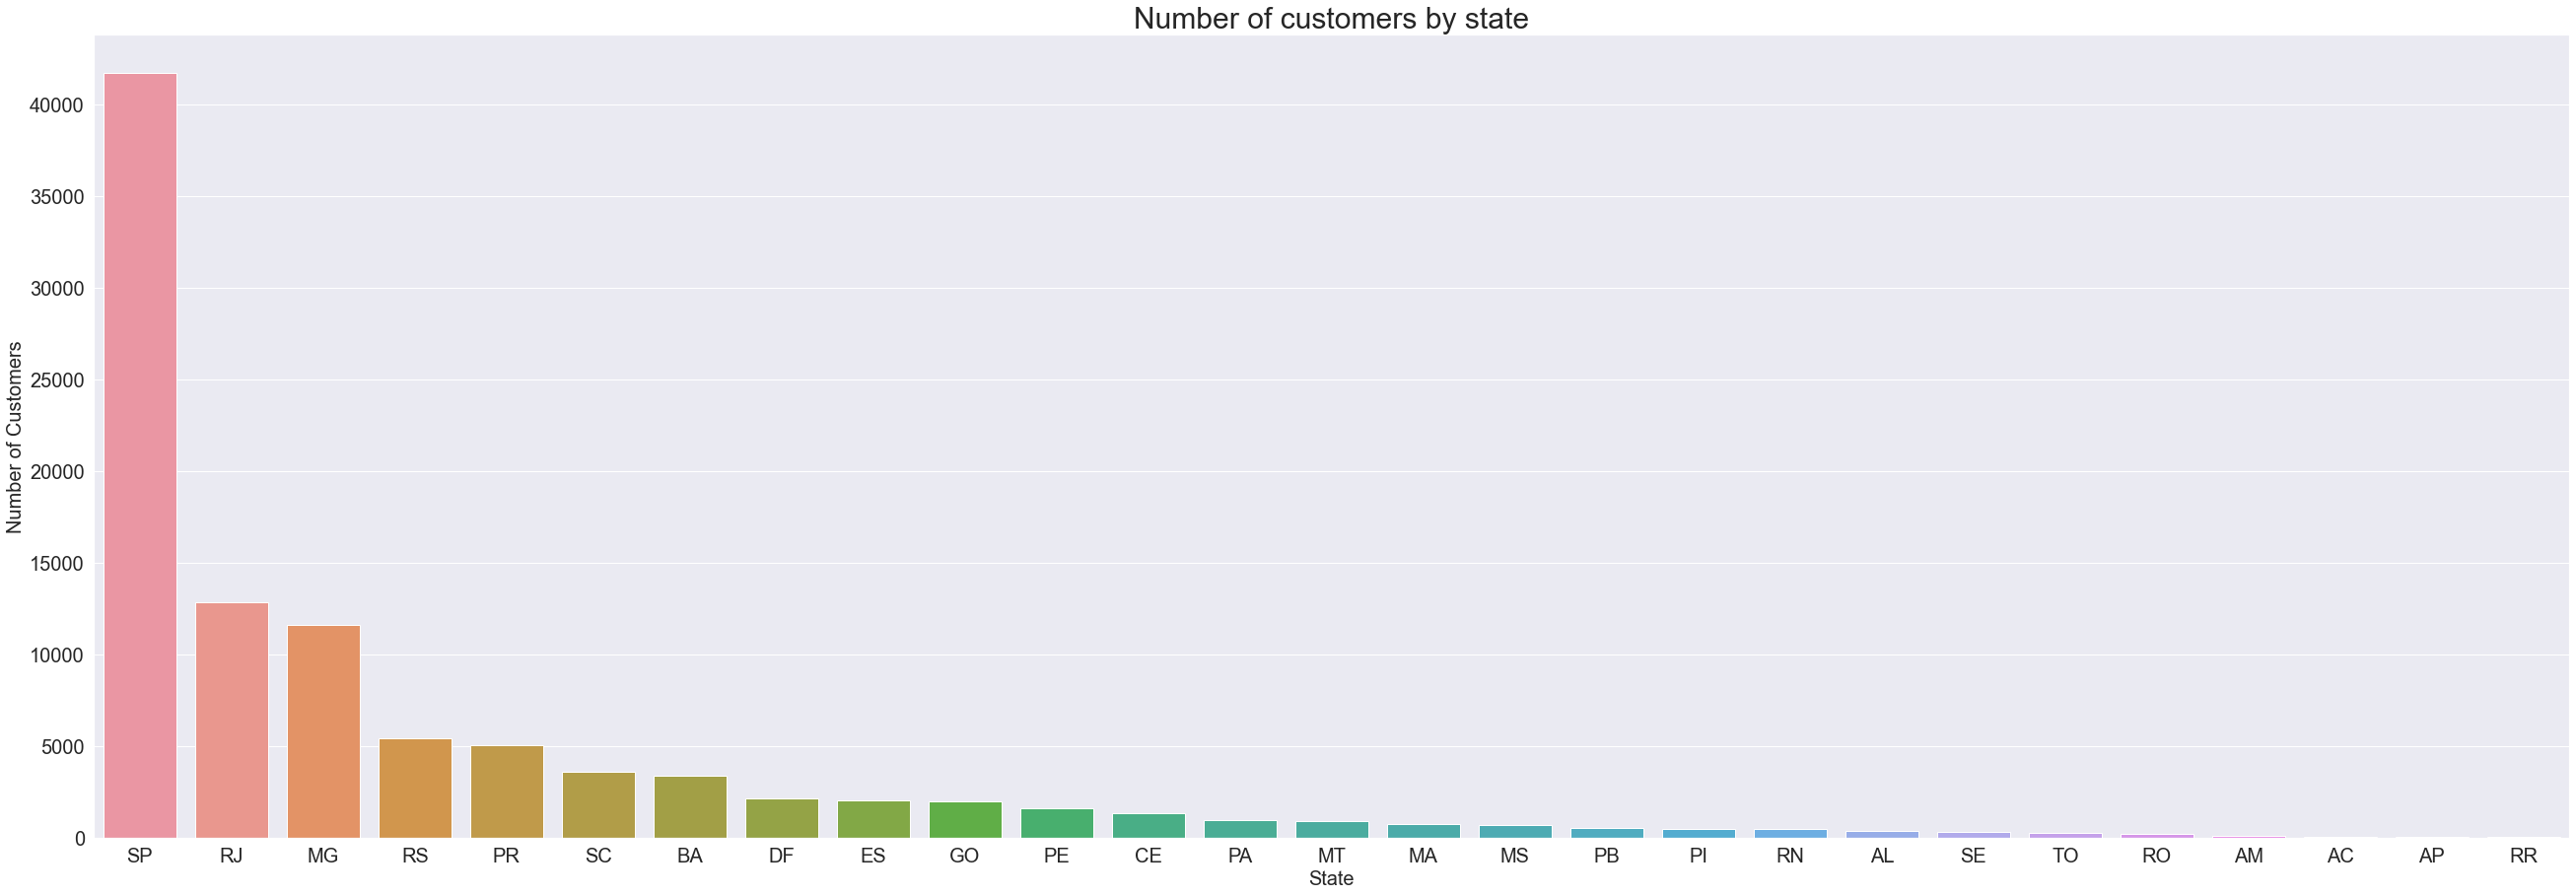

In [20]:
plt.figure(figsize=(45, 15))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.barplot(x=df_customers['customer_state'].value_counts().index,
            y=df_customers['customer_state'].value_counts())
plt.title('Number of customers by state', fontsize=30)
plt.xlabel('State', size=20)
plt.ylabel('Number of Customers', size=20)

<AxesSubplot:title={'center':'Distribution of Customer by State'}>

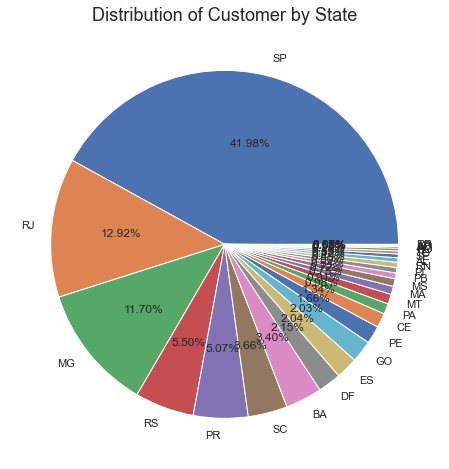

In [21]:
plt.figure()
plt.title('Distribution of Customer by State', size=18)
df_customers['customer_state']\
    .value_counts().plot.pie(figsize=(8, 8), autopct="%1.2f%%", label='')

Text(0, 0.5, 'Number of Customers')

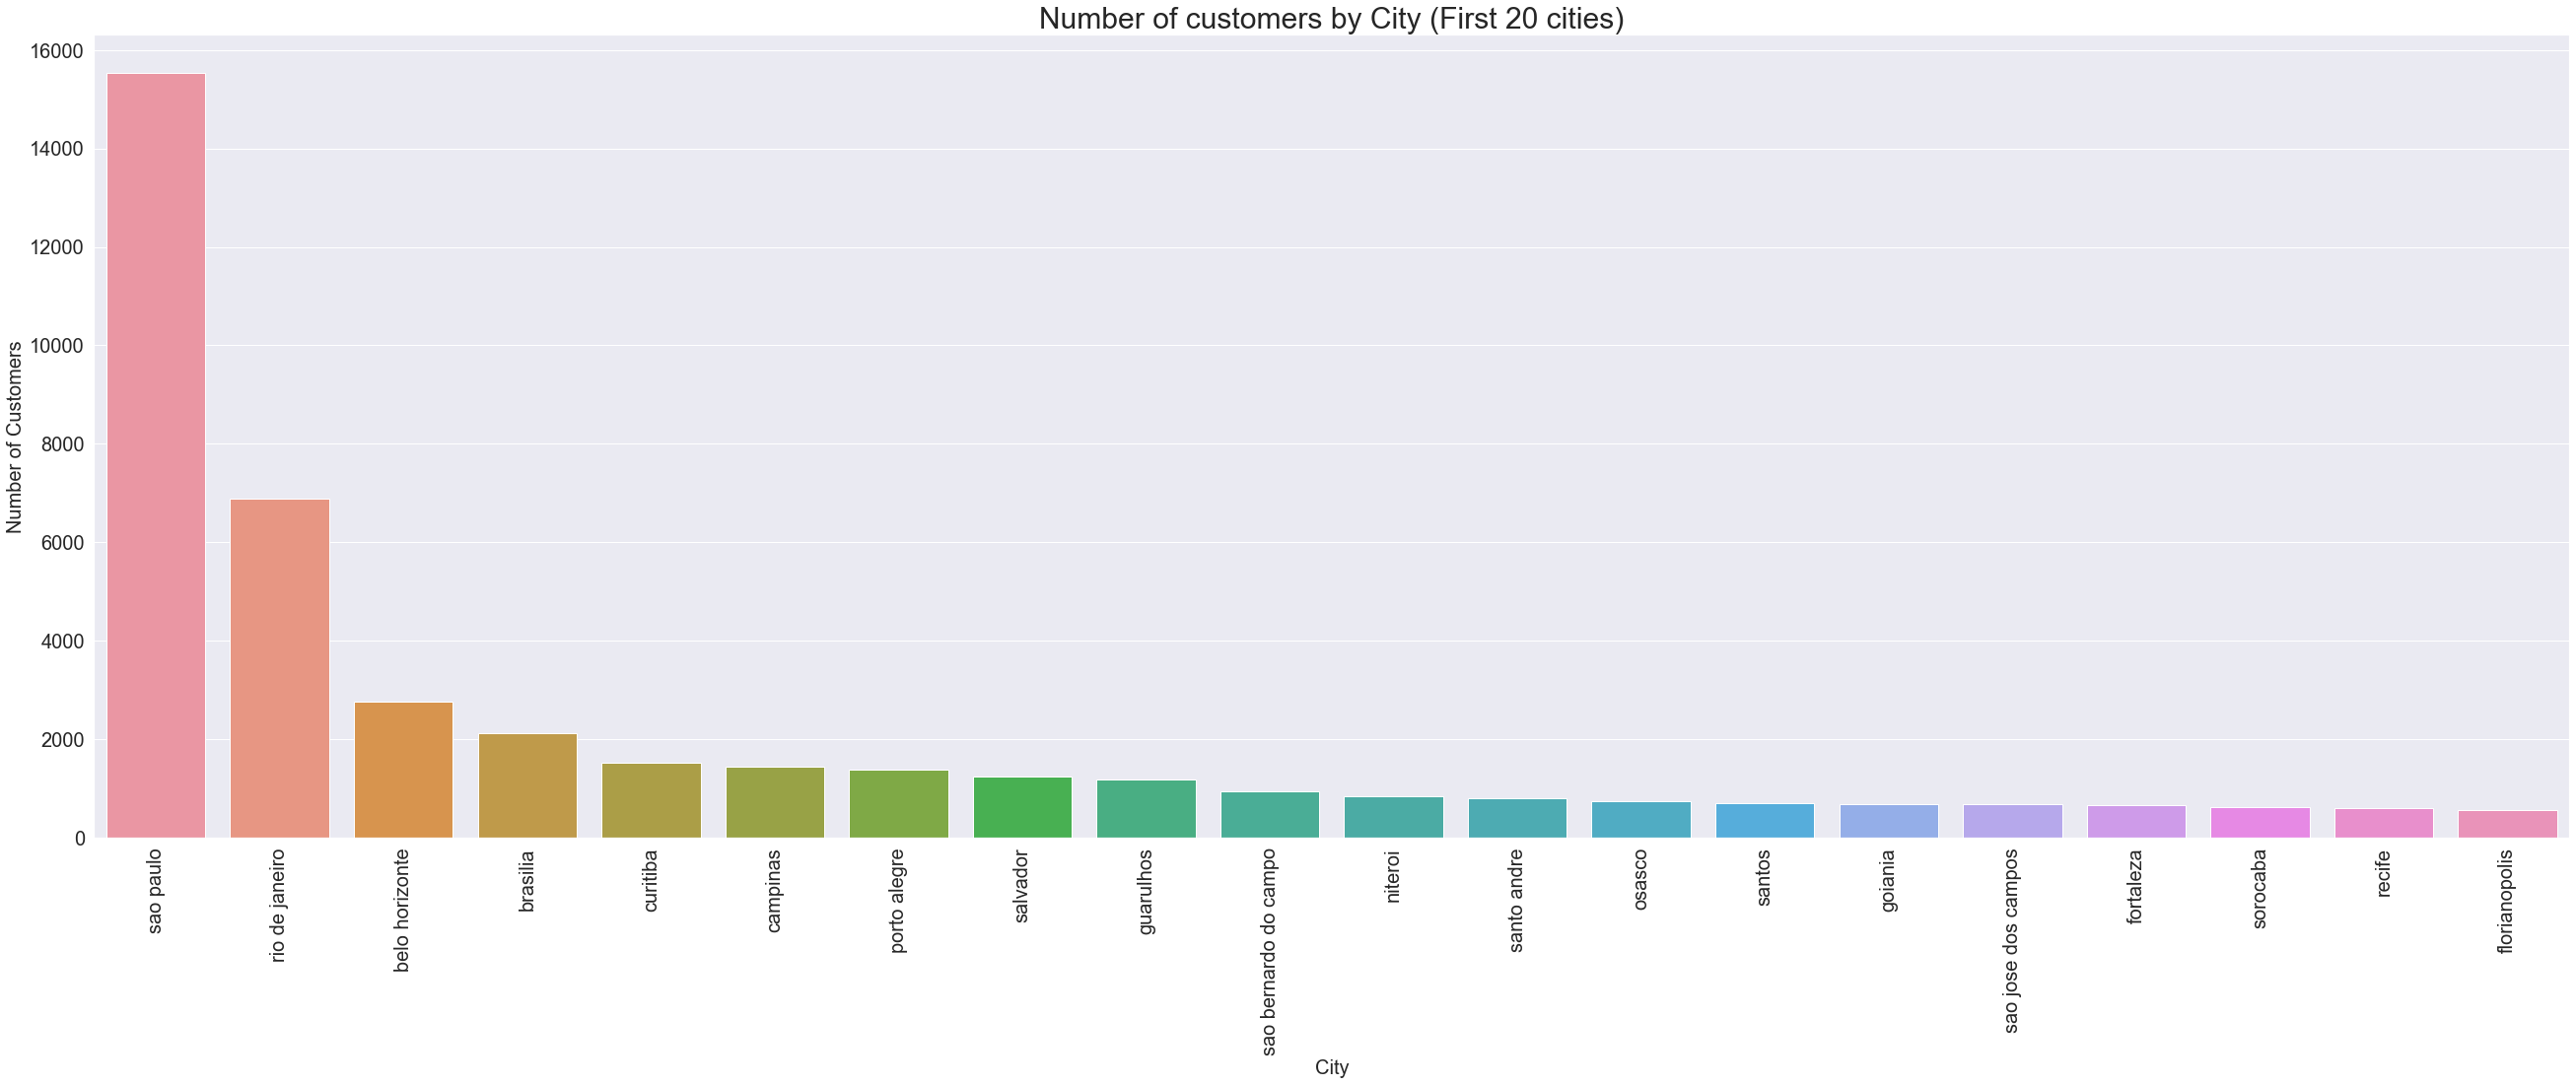

In [22]:
plt.figure(figsize=(45, 15))
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
sns.barplot(x=df_customers['customer_city'].value_counts()[:20].index,
            y=df_customers['customer_city'].value_counts()[:20])
plt.title('Number of customers by City (First 20 cities)', fontsize=30)
plt.xlabel('City', size=20)
plt.ylabel('Number of Customers', size=20)

Text(0, 0.5, 'Number of Orders')

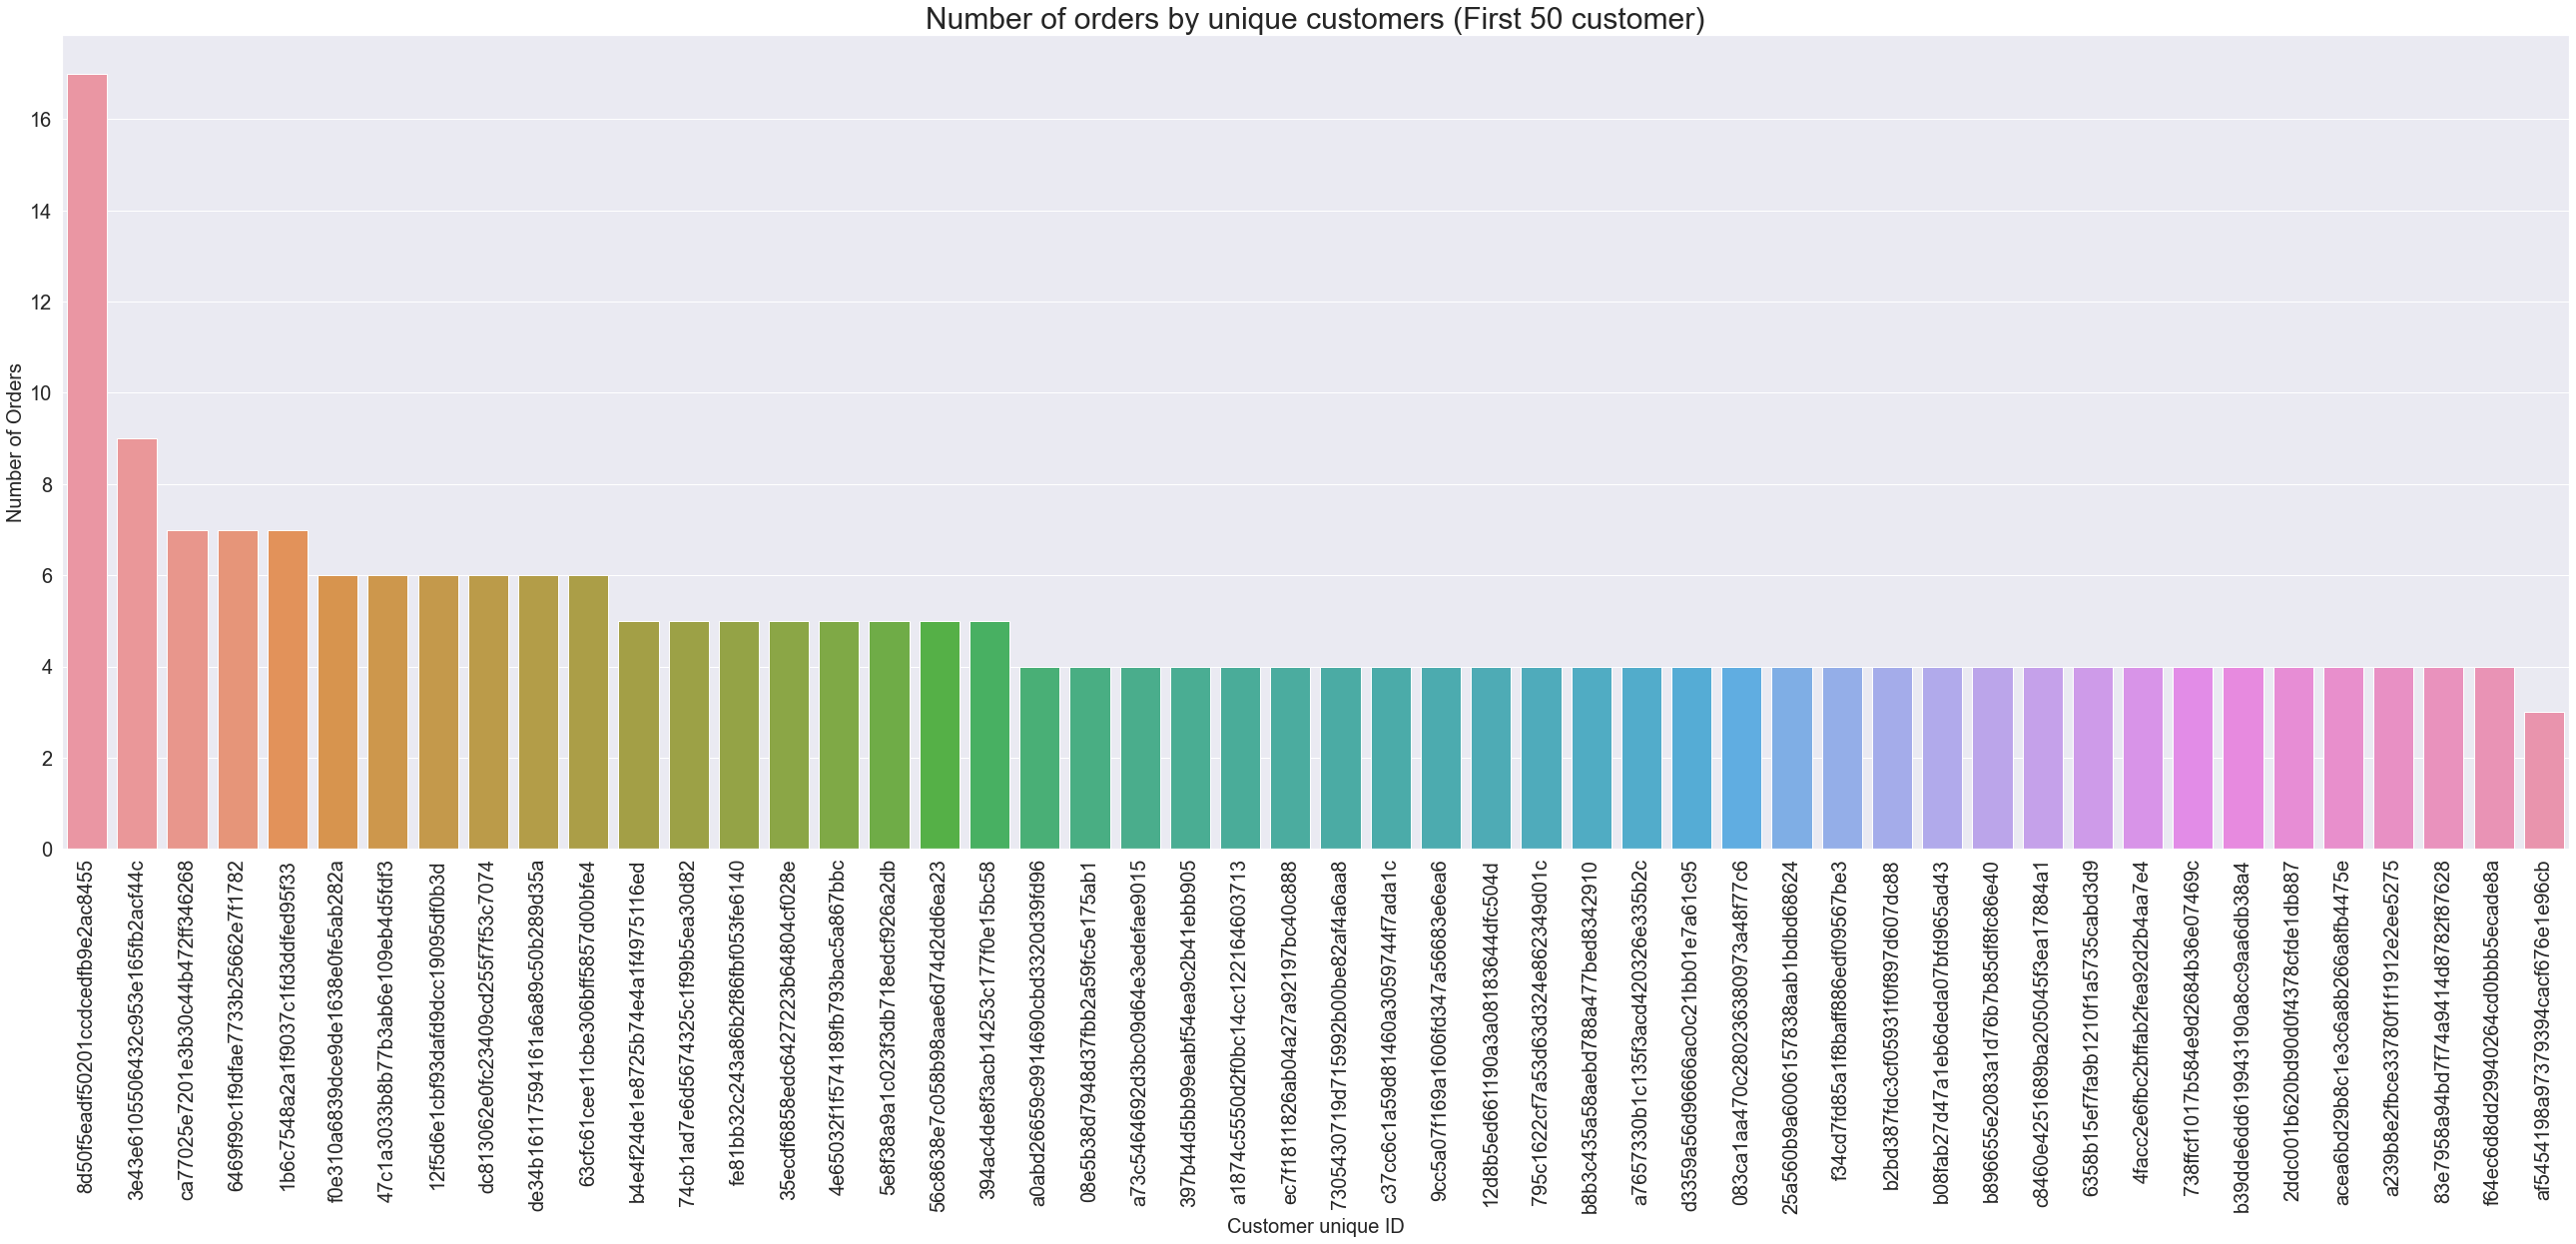

In [23]:
plt.figure(figsize=(45, 15))
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
sns.barplot(x=df_customers['customer_unique_id'].value_counts()[:50].index,
            y=df_customers['customer_unique_id'].value_counts()[:50])
plt.title('Number of orders by unique customers (First 50 customer)',
          fontsize=30)
plt.xlabel('Customer unique ID', size=20)
plt.ylabel('Number of Orders', size=20)

- In this dataset, we can see that there are 99,441 orders in total and 96,096 unique customers.
- The majority of clients are from the state of Sao Paulo (+40,000 clients). It is then followed by the state of Rio de Janeiro (~ 12,500) and Minas Gerais (+10000) which are all from the Southeast region.
- The majority of clients are from the city of Sao Paulo (+15,000), followed by Rio de Janeiro (~ 7,000).
- We have 1 customer who placed 17 orders, 1 customer who placed 9 orders, 3 customers who placed 7 orders, 6 customers who placed 6 orders.

## 4.2. Geolocation<a class="anchor" id="section_4_2"></a>

Dataset has  1000163 rows and  5 columns
Number of non-null values by columns :
geolocation_zip_code_prefix    1000163
geolocation_lat                1000163
geolocation_lng                1000163
geolocation_city               1000163
geolocation_state              1000163
dtype: int64
Value type per column :
geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object


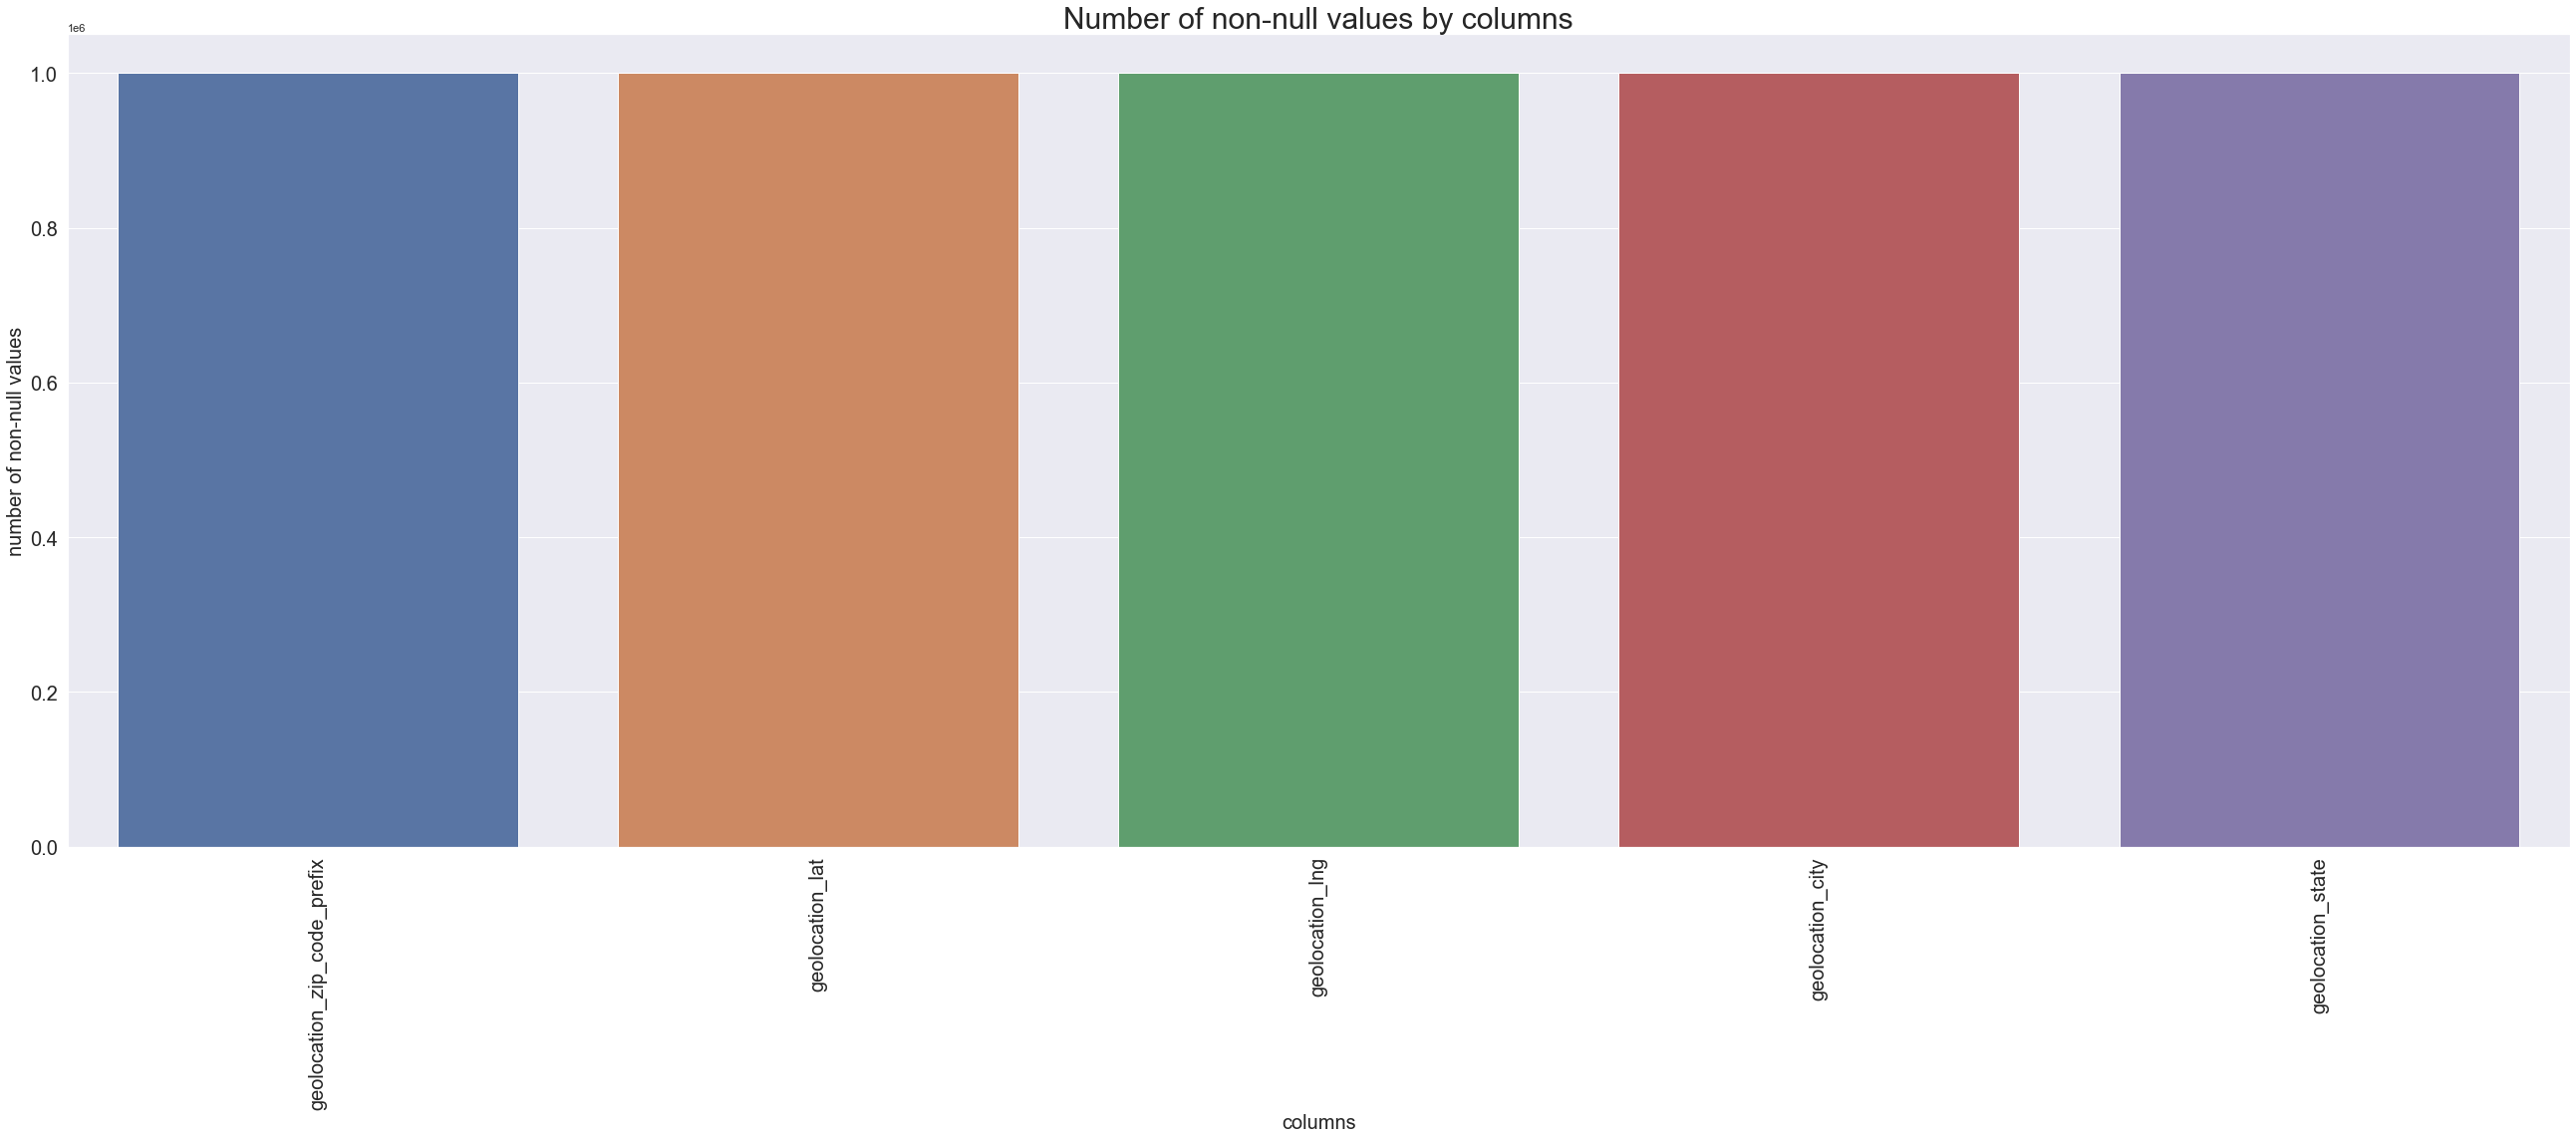

In [24]:
DataSetsExplo(df_geo)

In [25]:
df_geo.nunique()

geolocation_zip_code_prefix     19015
geolocation_lat                717358
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

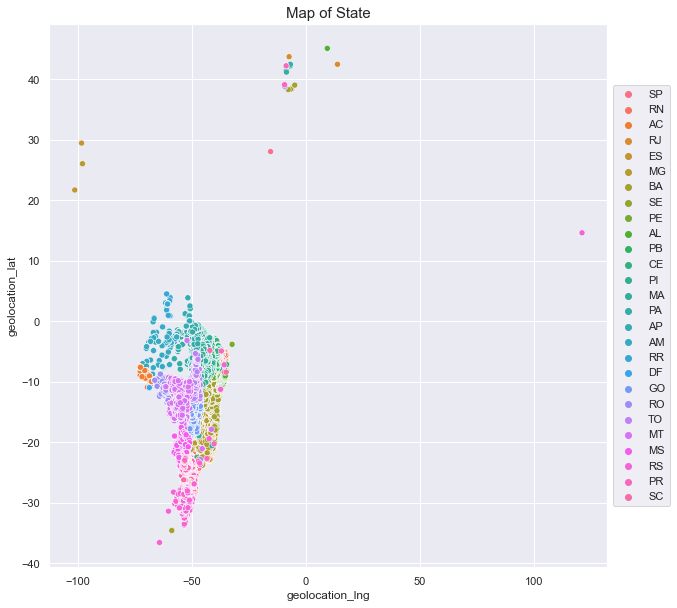

In [26]:
fig, scatter = plt.subplots(figsize=(10, 10))
plt.title('Map of State', size=15)
scatter = sns.scatterplot(data=df_geo, x='geolocation_lng',
                          y='geolocation_lat', hue='geolocation_state')
scatter.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

- We see that some coordinates are misplaced. Outlier coordinates will be filled by the average of the coordinates of the state to which they belong.

In [27]:
df_geo.loc[df_geo['geolocation_lng'] < -74, 'geolocation_lng'] = \
    df_geo.groupby('geolocation_state')['geolocation_lng'].transform('mean')
df_geo.loc[df_geo['geolocation_lng'] > -34, 'geolocation_lng'] = \
    df_geo.groupby('geolocation_state')['geolocation_lng'].transform('mean')
df_geo.loc[df_geo['geolocation_lat'] < -34.5, 'geolocation_lat'] = \
    df_geo.groupby('geolocation_state')['geolocation_lat'].transform('mean')
df_geo.loc[df_geo['geolocation_lat'] > 6, 'geolocation_lat'] = \
    df_geo.groupby('geolocation_state')['geolocation_lat'].transform('mean')

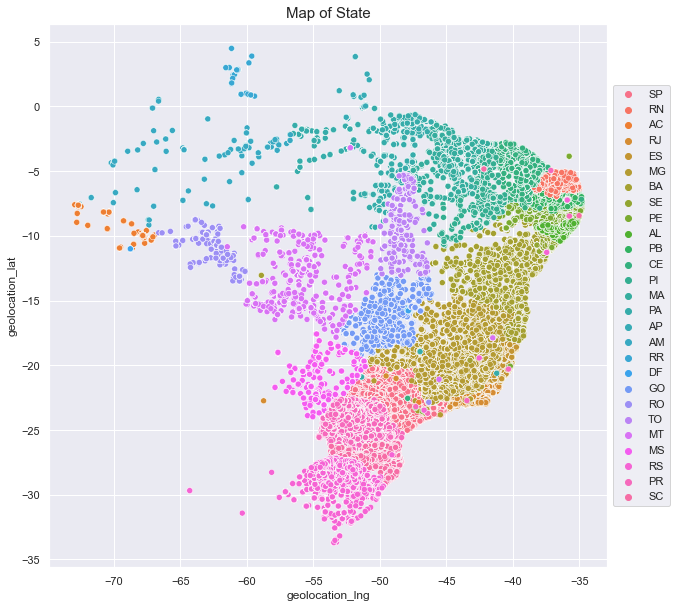

In [28]:
fig, scatter = plt.subplots(figsize=(10, 10))
plt.title('Map of State', size=15)
scatter = sns.scatterplot(data=df_geo, x='geolocation_lng',
                          y='geolocation_lat', hue='geolocation_state')
scatter.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

## 4.3. Order Items<a class="anchor" id="section_4_3"></a>

Dataset has  112650 rows and  7 columns
Number of non-null values by columns :
order_id               112650
order_item_id          112650
product_id             112650
seller_id              112650
shipping_limit_date    112650
price                  112650
freight_value          112650
dtype: int64
Value type per column :
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object


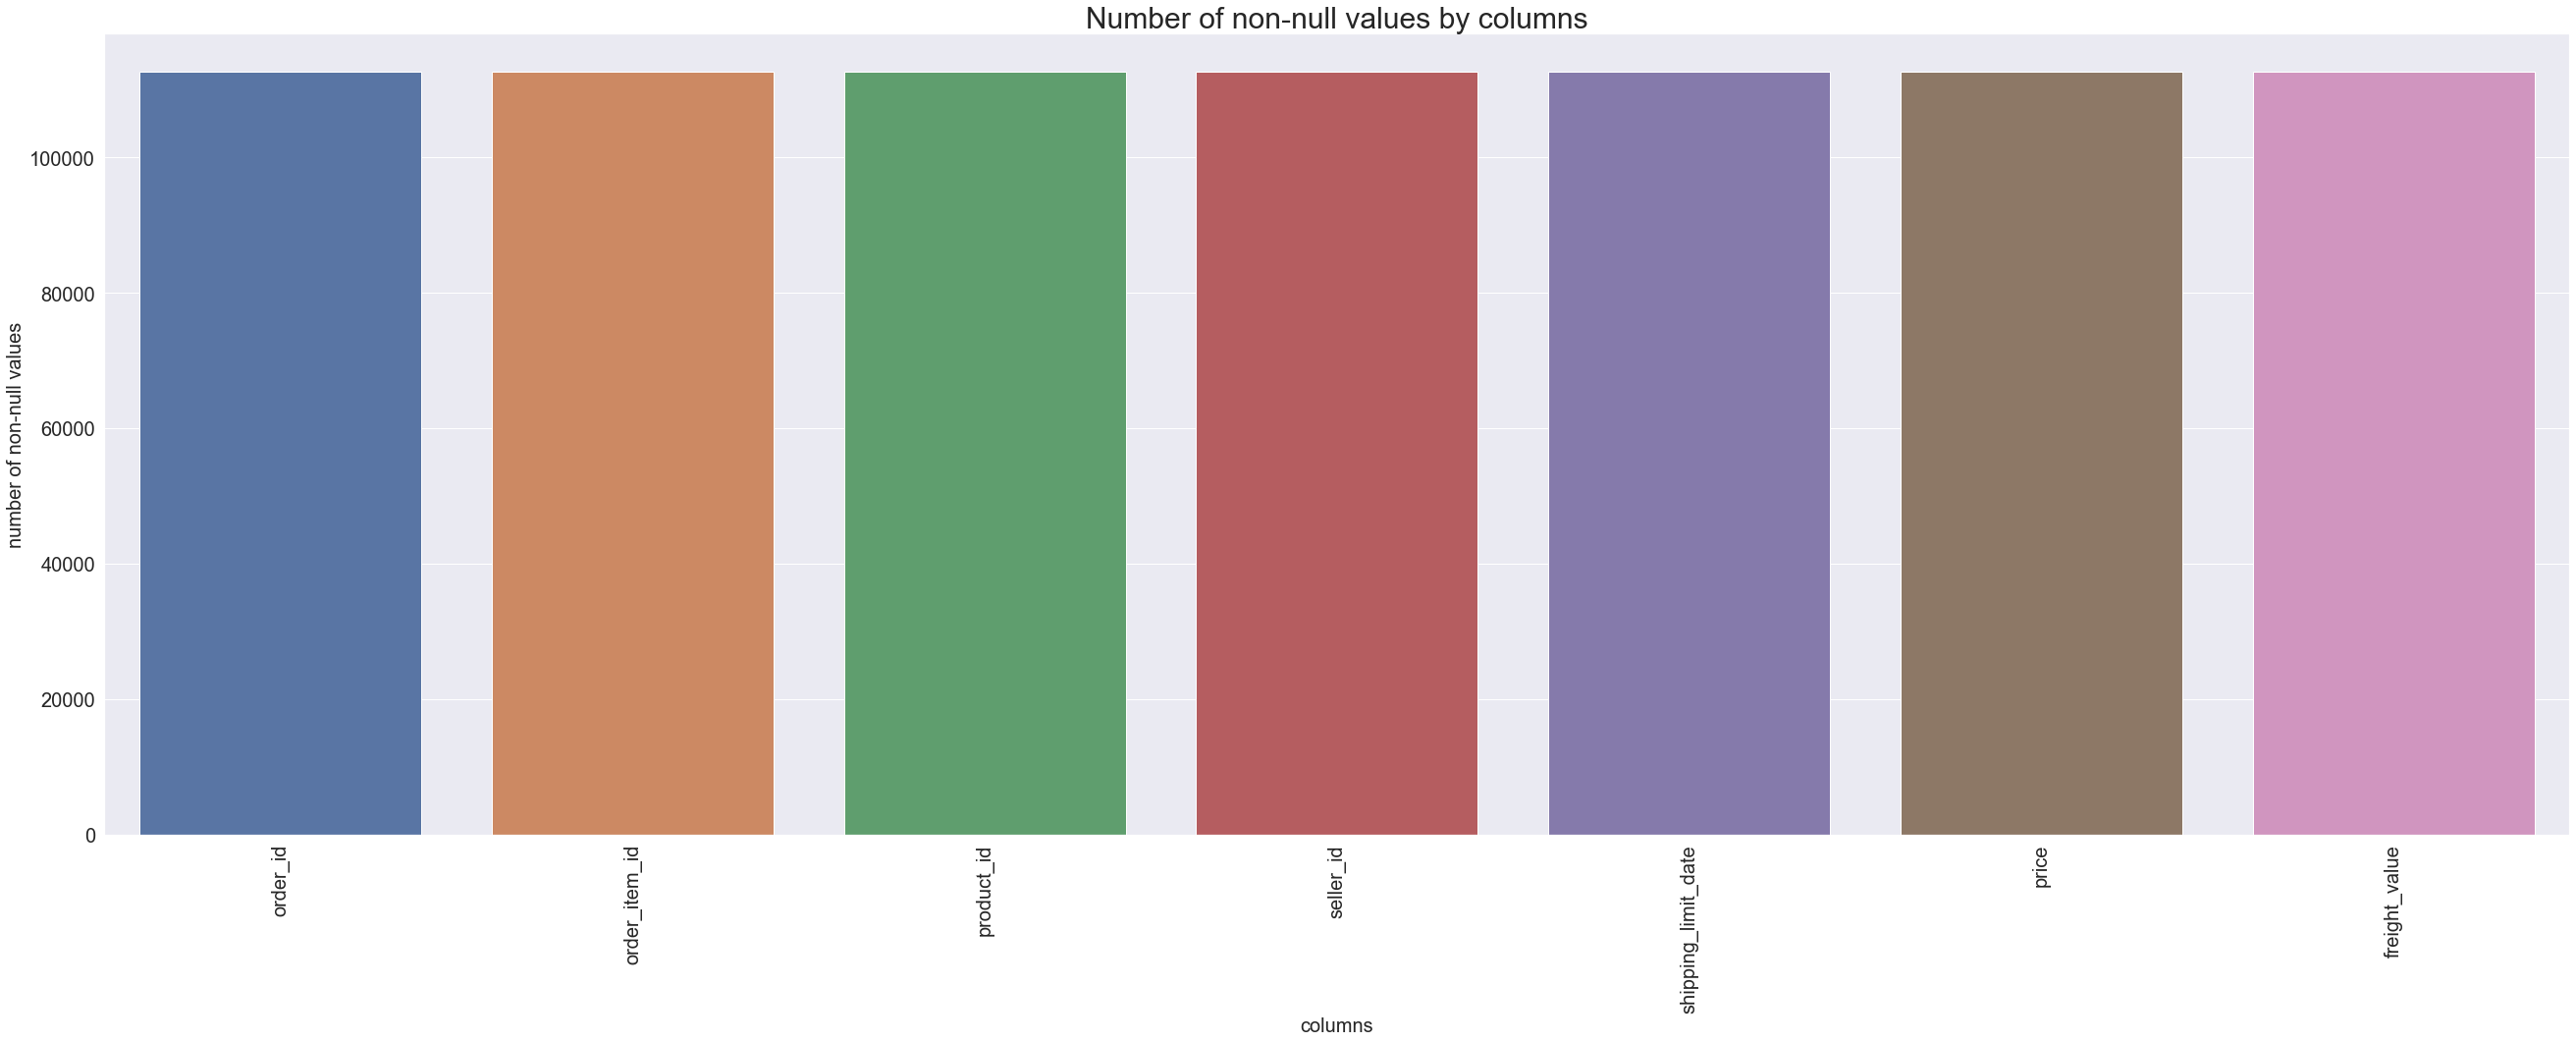

In [29]:
DataSetsExplo(df_order_items)

In [30]:
df_order_items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [31]:
df_order_items['order_id'].value_counts()

8272b63d03f5f79c56e9e4120aec44ef    21
ab14fdcfbe524636d65ee38360e22ce8    20
1b15974a0141d54e36626dca3fdc731a    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
eb7934e2144a9fa719e1f9b7f6b36270     1
30a897c2be083ba0f419c5b2cc9ca368     1
a12ac41904fb4122fafbd91fbb9230ed     1
f3f1a6aecc9c4e12ac22b27101dbce05     1
c5b5456c785367bef488a2e46479242a     1
Name: order_id, Length: 98666, dtype: int64

In [32]:
df_order_items[df_order_items['order_id'] ==
               '8272b63d03f5f79c56e9e4120aec44ef']

order_id  order_item_id  \
57297  8272b63d03f5f79c56e9e4120aec44ef              1   
57298  8272b63d03f5f79c56e9e4120aec44ef              2   
57299  8272b63d03f5f79c56e9e4120aec44ef              3   
57300  8272b63d03f5f79c56e9e4120aec44ef              4   
57301  8272b63d03f5f79c56e9e4120aec44ef              5   
57302  8272b63d03f5f79c56e9e4120aec44ef              6   
57303  8272b63d03f5f79c56e9e4120aec44ef              7   
57304  8272b63d03f5f79c56e9e4120aec44ef              8   
57305  8272b63d03f5f79c56e9e4120aec44ef              9   
57306  8272b63d03f5f79c56e9e4120aec44ef             10   
57307  8272b63d03f5f79c56e9e4120aec44ef             11   
57308  8272b63d03f5f79c56e9e4120aec44ef             12   
57309  8272b63d03f5f79c56e9e4120aec44ef             13   
57310  8272b63d03f5f79c56e9e4120aec44ef             14   
57311  8272b63d03f5f79c56e9e4120aec44ef             15   
57312  8272b63d03f5f79c56e9e4120aec44ef             16   
57313  8272b63d03f5f79c56e9e4120aec44ef             17   
57314  8272b63d03f5f79c56e9e4120aec44ef             18   
57315  8272b63d03f5f79c56e9e4120aec44ef             19   
57316  8272b63d03f5f79c56e9e4120aec44ef             20   
57317  8272b63d03f5f79c56e9e4120aec44ef             21   

                             product_id                         seller_id  \
57297  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57298  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57299  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57300  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57301  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57302  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57303  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57304  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57305  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57306  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57307  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57308  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57309  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57310  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57311  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57312  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57313  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57314  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57315  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57316  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57317  79ce45dbc2ea29b22b5a261bbb7b7ee7  2709af9587499e95e803a6498a5a56e9   

       shipping_limit_date  price  freight_value  
57297  2017-07-21 18:25:23    1.2           7.89  
57298  2017-07-21 18:25:23    1.2           7.89  
57299  2017-07-21 18:25:23    1.2           7.89  
57300  2017-07-21 18:25:23    1.2           7.89  
57301  2017-07-21 18:25:23    1.2           7.89  
57302  2017-07-21 18:25:23    1.2           7.89  
57303  2017-07-21 18:25:23    1.2           7.89  
57304  2017-07-21 18:25:23    1.2           7.89  
57305  2017-07-21 18:25:23    1.2           7.89  
57306  2017-07-21 18:25:23    1.2           7.89  
57307  2017-07-21 18:25:23    1.2           7.89  
57308  2017-07-21 18:25:23    1.2           7.89  
57309  2017-07-21 18:25:23    1.2           7.89  
57310  2017-07-21 18:25:23    1.2           7.89  
57311  2017-07-21 18:25:23    1.2           7.89  
57312  2017-07-21 18:25:23    1.2           7.89  
57313  2017-07-21 18:25:23    1.2           7.89  
57314  2017-07-21 18:25:23    1.2           7.89  
57315  2017-07-21 18:25:23    1.2           7.89  
57316  2017-07-21 18:25:23    1.2      

In [33]:
df_order_items.describe()

order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000

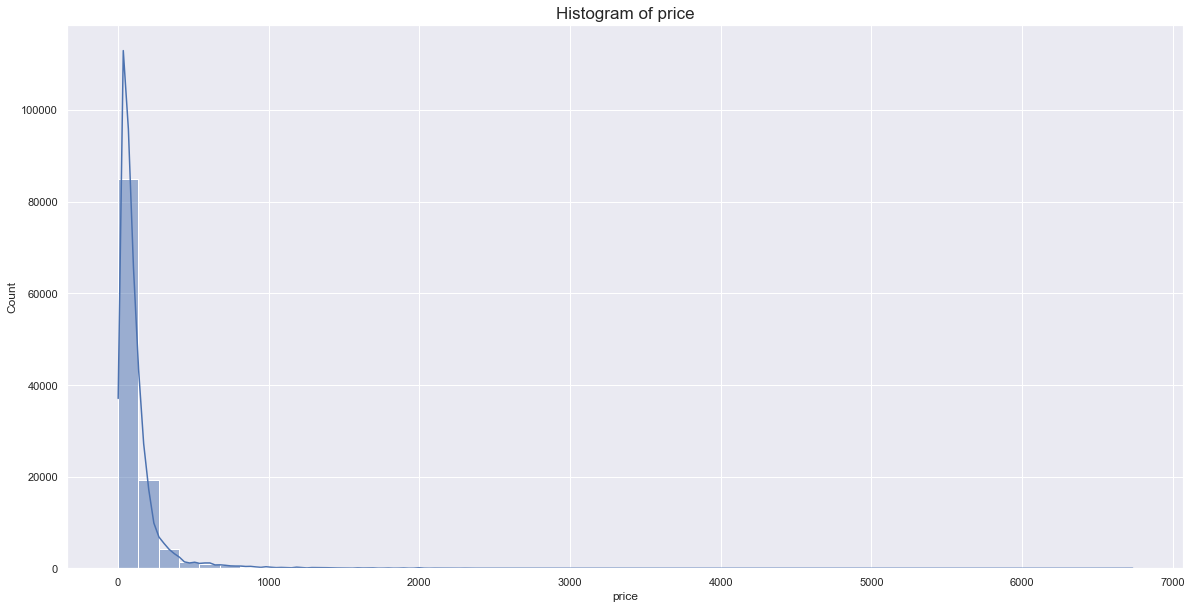

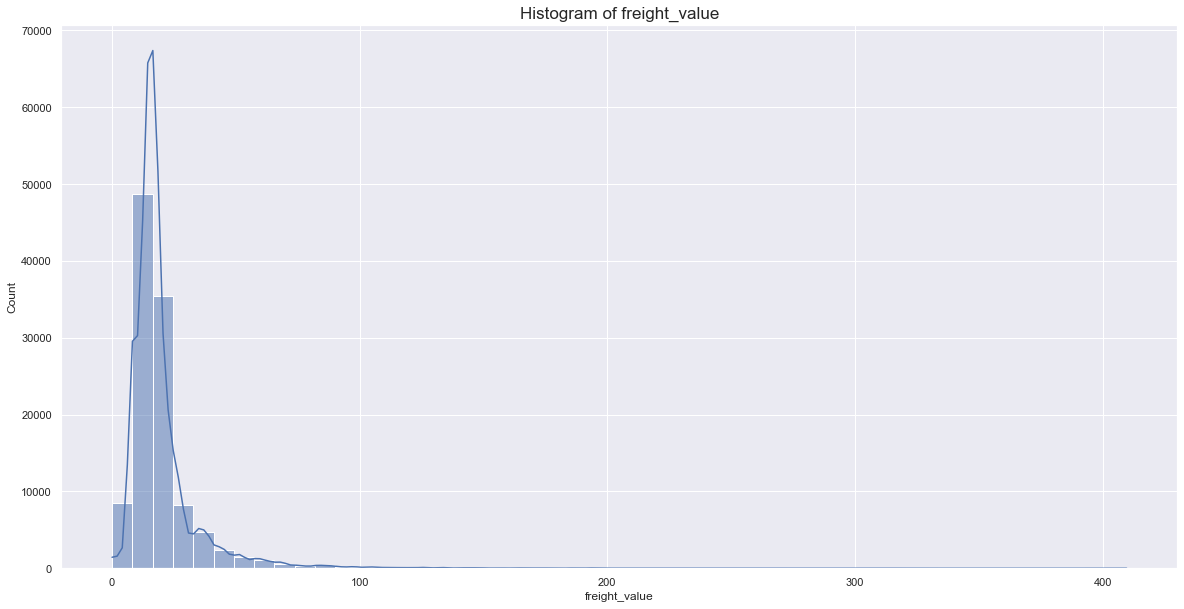

In [34]:
for col in df_order_items.select_dtypes('float64'):
    plt.figure(figsize=(20, 10))
    plt.title('Histogram of ' + col, size=17)
    plt.xlabel(col, size=12)
    sns.histplot(df_order_items[col], bins=50, kde=True)

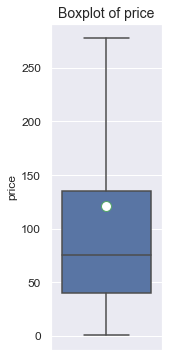

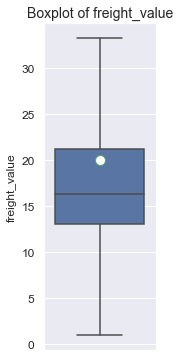

In [35]:
for col in df_order_items.select_dtypes('float'):
    plt.figure(figsize=(2, 6))
    plt.title("Boxplot of " + col, size=14)
    plt.yticks(fontsize=12)
    sns.boxplot(y=col, data=df_order_items, showmeans=True,
                meanprops={"marker": "o",
                           "markerfacecolor": "white",
                           "markersize": "10"},
                showfliers=False)

Text(0, 0.5, 'Number of Sales')

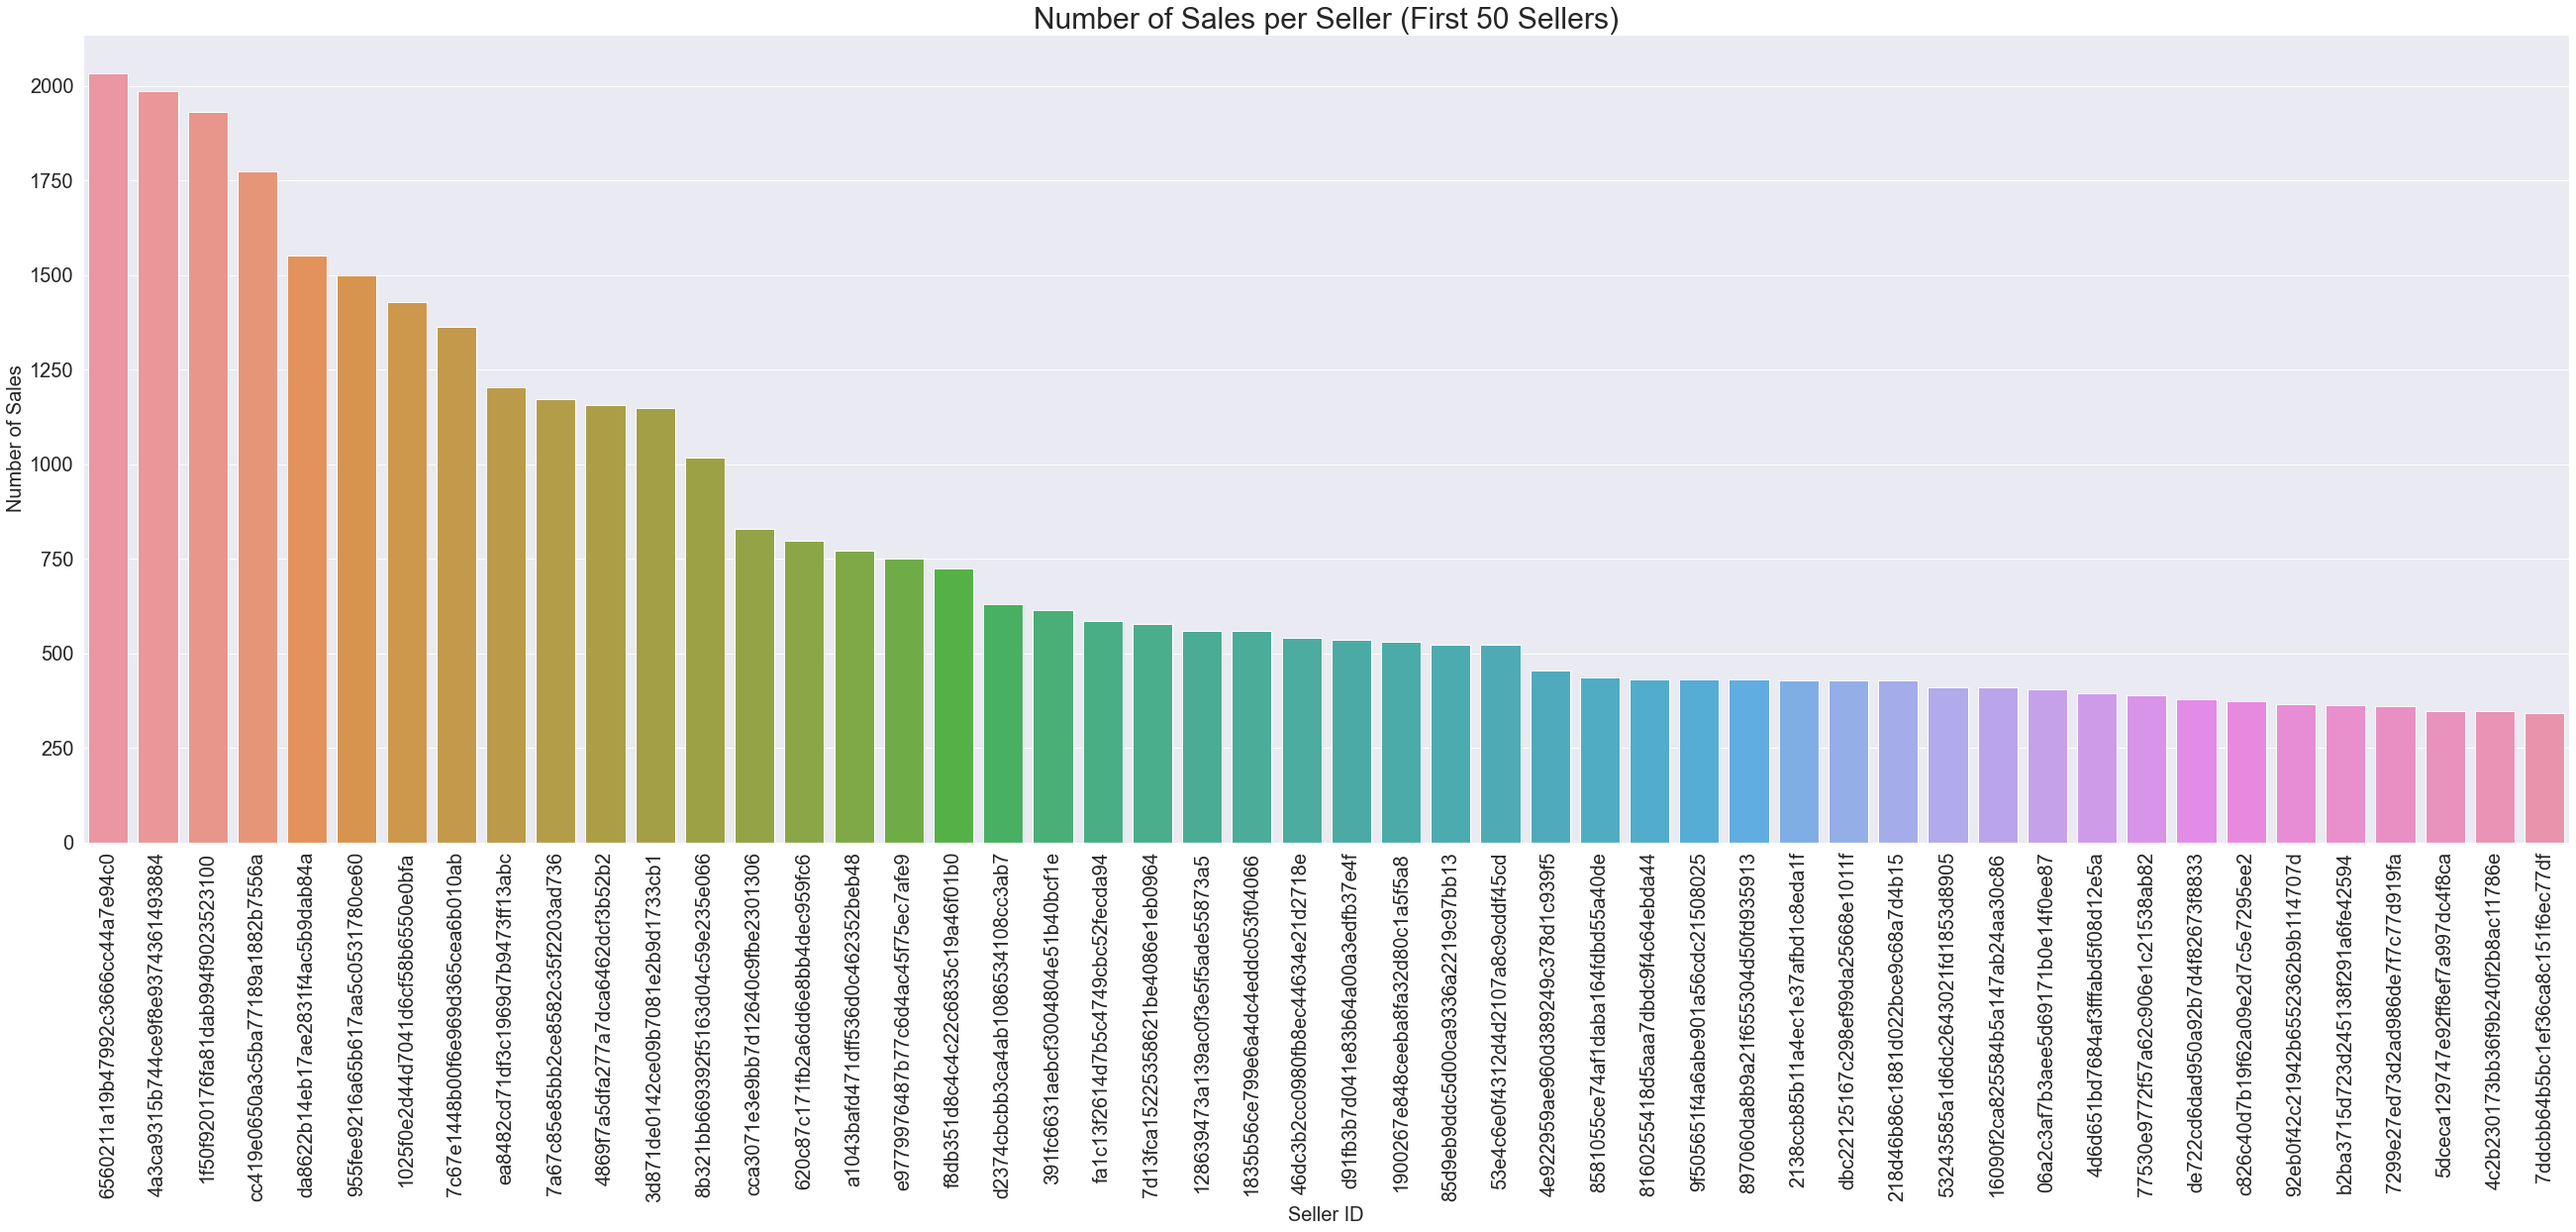

In [36]:
plt.figure(figsize=(45, 15))
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
sns.barplot(x=df_order_items['seller_id'].value_counts()[:50].index,
            y=df_order_items['seller_id'].value_counts()[:50])
plt.title('Number of Sales per Seller (First 50 Sellers)', fontsize=30)
plt.xlabel('Seller ID', size=20)
plt.ylabel('Number of Sales', size=20)

- Some order_id appear more than once. Indeed, when we buy several products in one order, a new line is created for each product.
- The highest price is 6735 Real and the lowest is 0.85 Real.
- The highest freight value is 409.68 Real and the lowest is 0 Real.
- There are only 13 sellers who have sold over 1000 products.

## 4.4. Order Payments<a class="anchor" id="section_4_4"></a>

Dataset has  103886 rows and  5 columns
Number of non-null values by columns :
order_id                103886
payment_sequential      103886
payment_type            103886
payment_installments    103886
payment_value           103886
dtype: int64
Value type per column :
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object


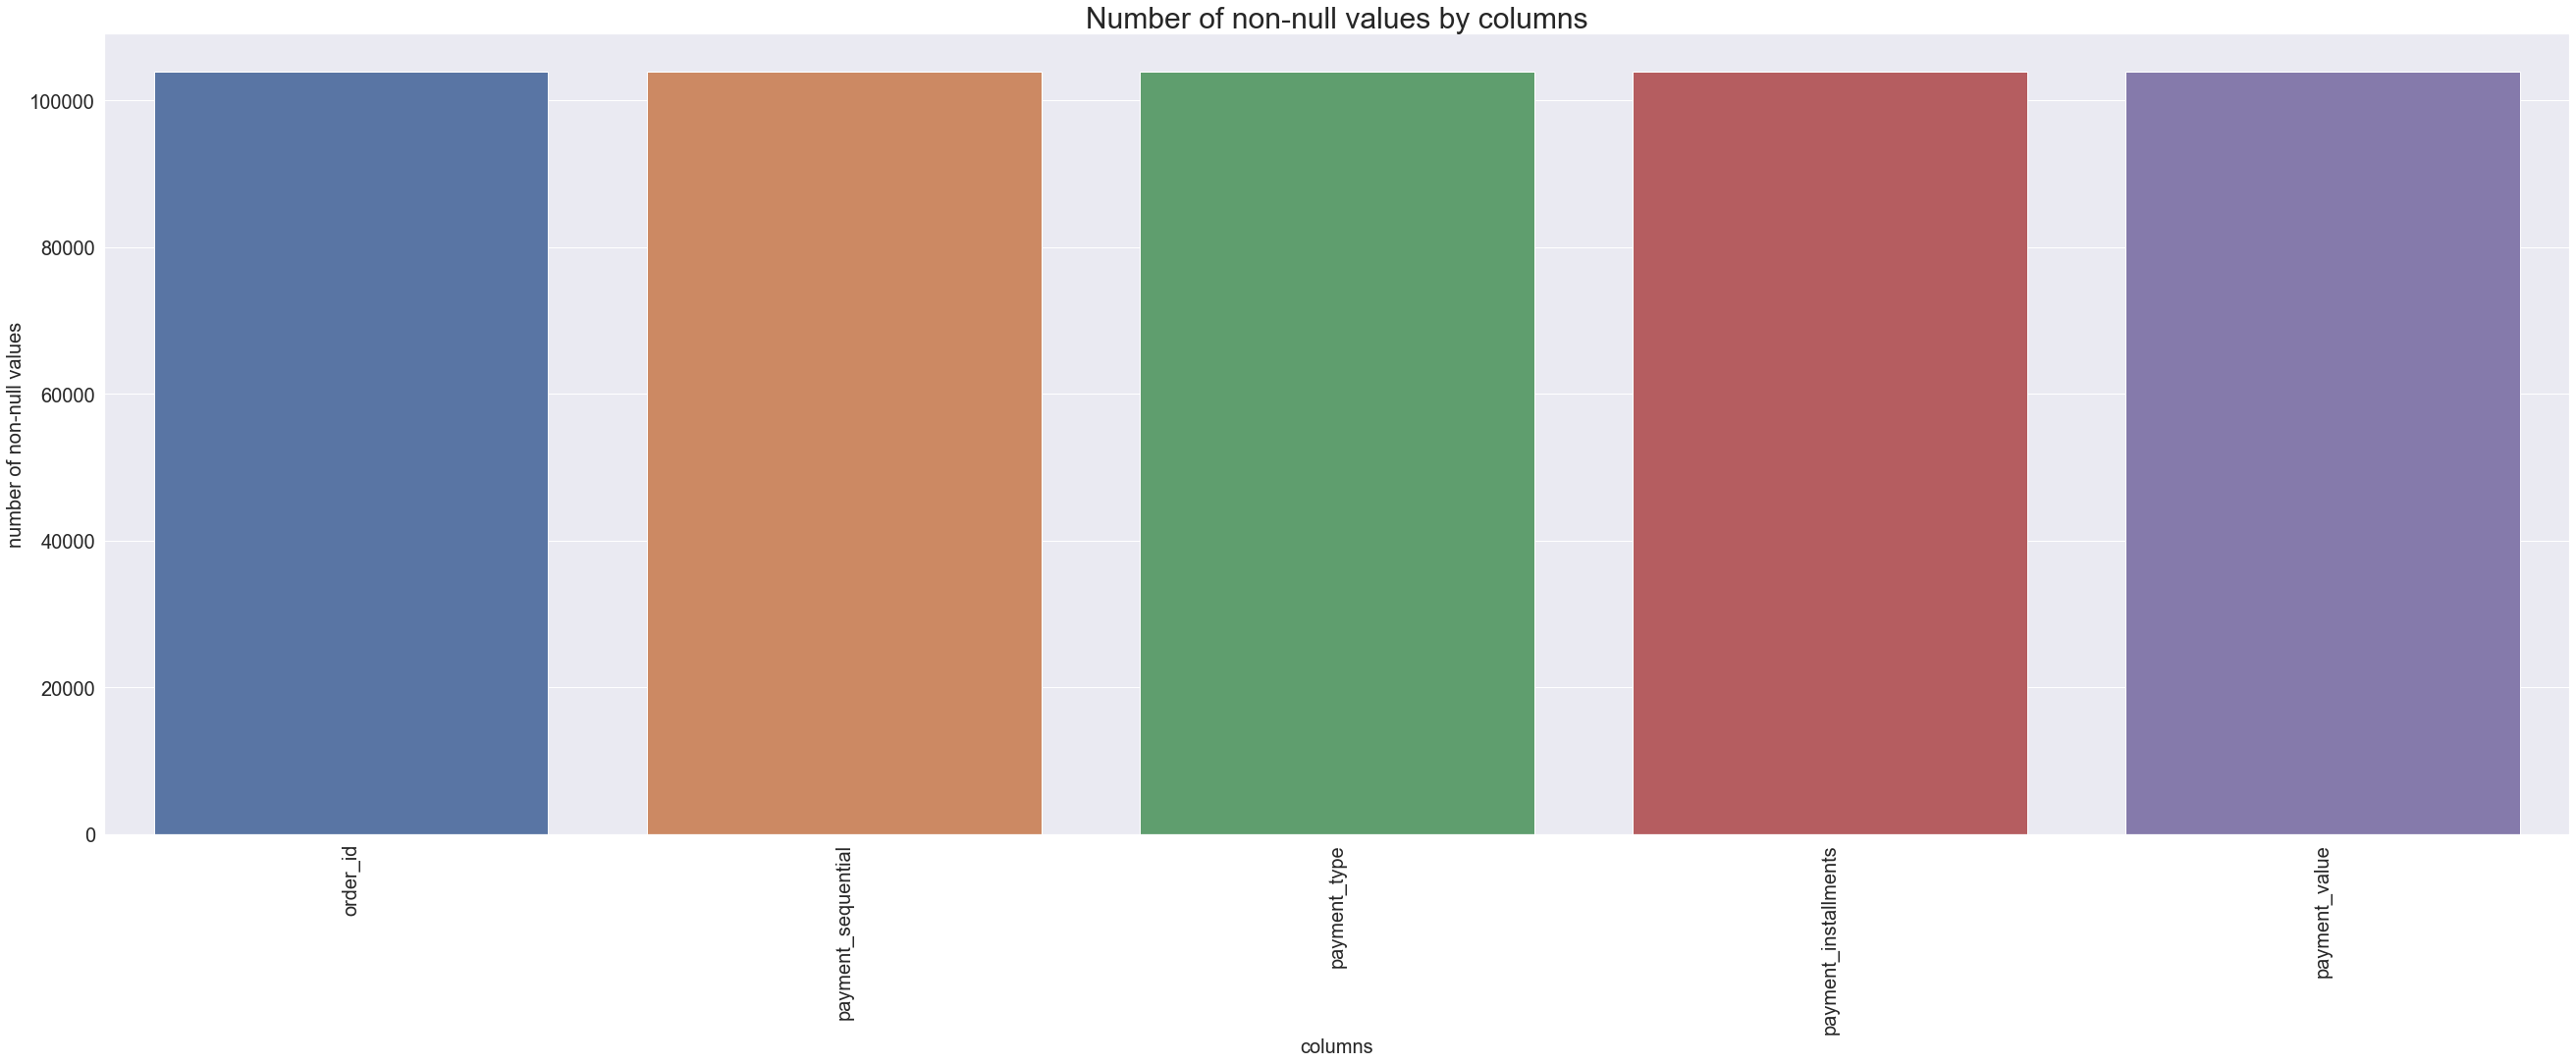

In [37]:
DataSetsExplo(df_order_payments)

In [38]:
df_order_payments.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

<AxesSubplot:title={'center':'Distribution of Payment Type'}>

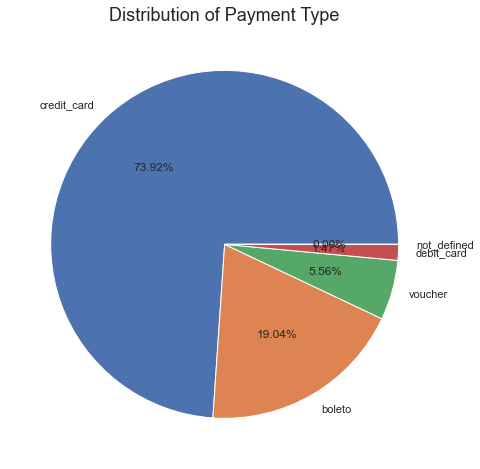

In [39]:
plt.figure()
plt.title('Distribution of Payment Type', size=18)
df_order_payments['payment_type']\
    .value_counts().plot.pie(figsize=(8, 8), autopct="%1.2f%%", label='')

<AxesSubplot:title={'center':'Histogram of Payment Value'}, xlabel='payment_value', ylabel='Count'>

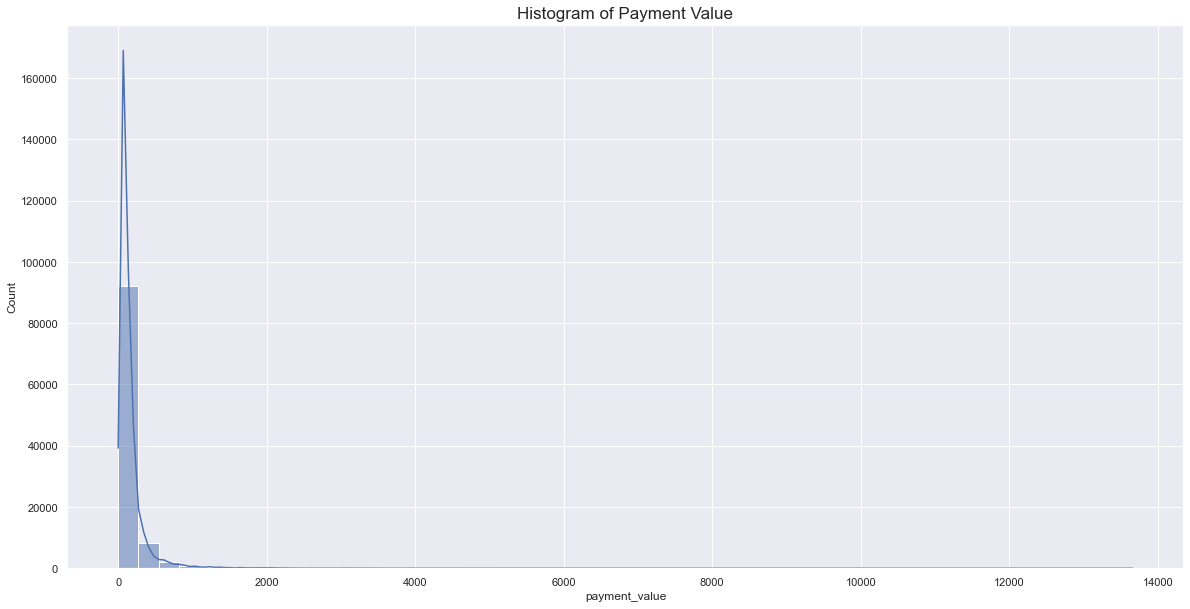

In [40]:
plt.figure(figsize=(20, 10))
plt.title('Histogram of Payment Value', size=17)
plt.xlabel('payment_value', size=12)
sns.histplot(df_order_payments['payment_value'], bins=50, kde=True)

Text(0, 0.5, 'count')

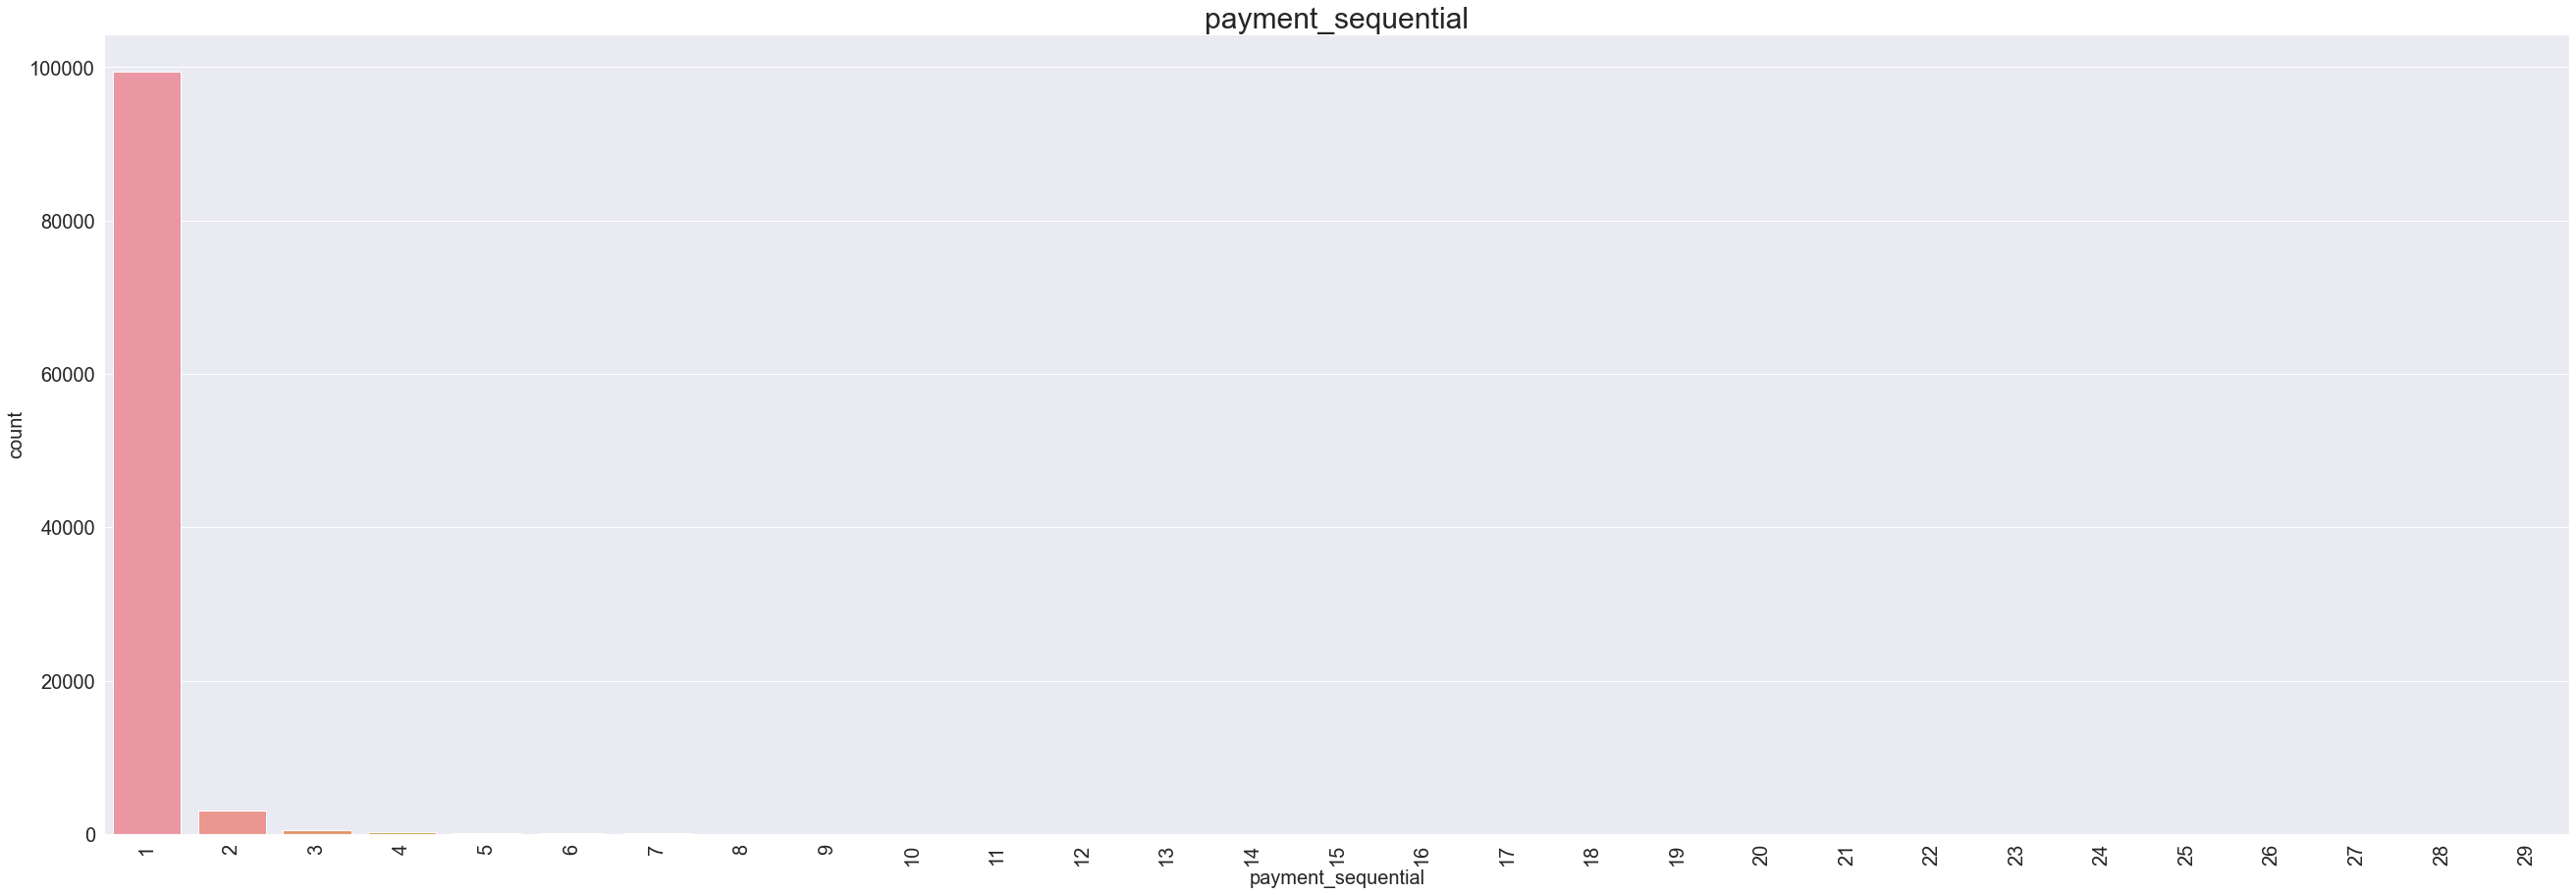

In [41]:
plt.figure(figsize=(45, 15))
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
sns.barplot(x=df_order_payments['payment_sequential'].value_counts().index,
            y=df_order_payments['payment_sequential'].value_counts())
plt.title('payment_sequential', fontsize=30)
plt.xlabel('payment_sequential', size=20)
plt.ylabel('count', size=20)

Text(0, 0.5, 'count')

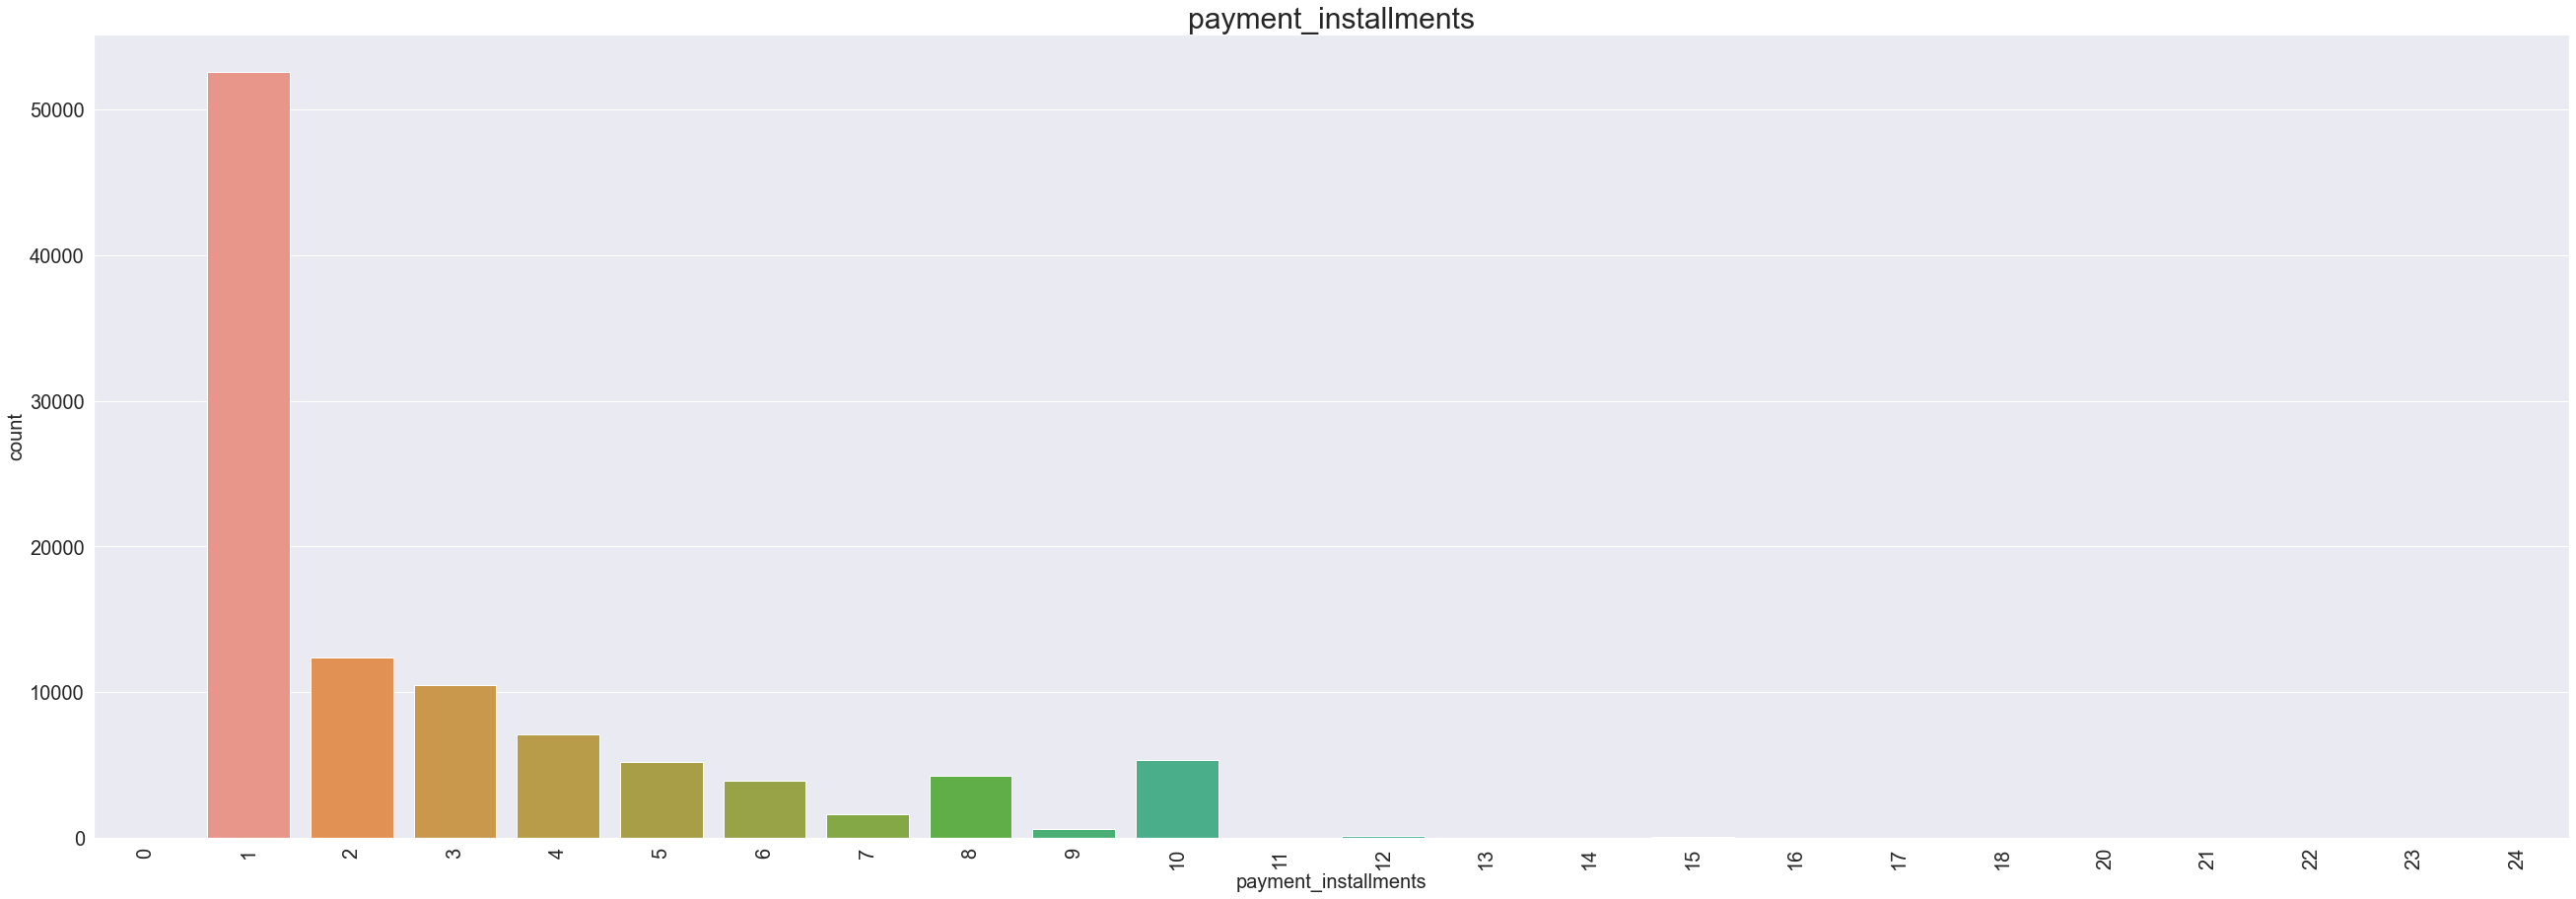

In [42]:
plt.figure(figsize=(45, 15))
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
sns.barplot(x=df_order_payments['payment_installments'].value_counts().index,
            y=df_order_payments['payment_installments'].value_counts())
plt.title('payment_installments', fontsize=30)
plt.xlabel('payment_installments', size=20)
plt.ylabel('count', size=20)

<AxesSubplot:title={'center':'Dispersion of Payment Value by Payment Type'}, xlabel='payment_type', ylabel='payment_value'>

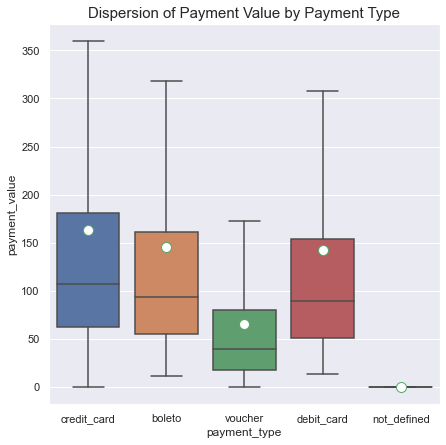

In [43]:
plt.figure(figsize=(7, 7))
plt.title("Dispersion of Payment Value by Payment Type", size=15)
sns.boxplot(x='payment_type', y='payment_value',
            data=df_order_payments, showmeans=True,
            meanprops={"marker": "o",
                       "markerfacecolor": "white",
                       "markersize": "10"},
            showfliers=False)

- 73.92% of payments are made by credit card.
- The majority of customers paid with a single payment method (~ 100,000).
- The majority of customers paid in one go (+50,000).
- The higher payments are paid with a credit card while low payments are paid rather with voucher.

## 4.5. Order Reviews<a class="anchor" id="section_4_5"></a>

Dataset has  100000 rows and  7 columns
Number of non-null values by columns :
review_id                  100000
order_id                   100000
review_score               100000
review_comment_title        11715
review_comment_message      41753
review_creation_date       100000
review_answer_timestamp    100000
dtype: int64
Value type per column :
review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object


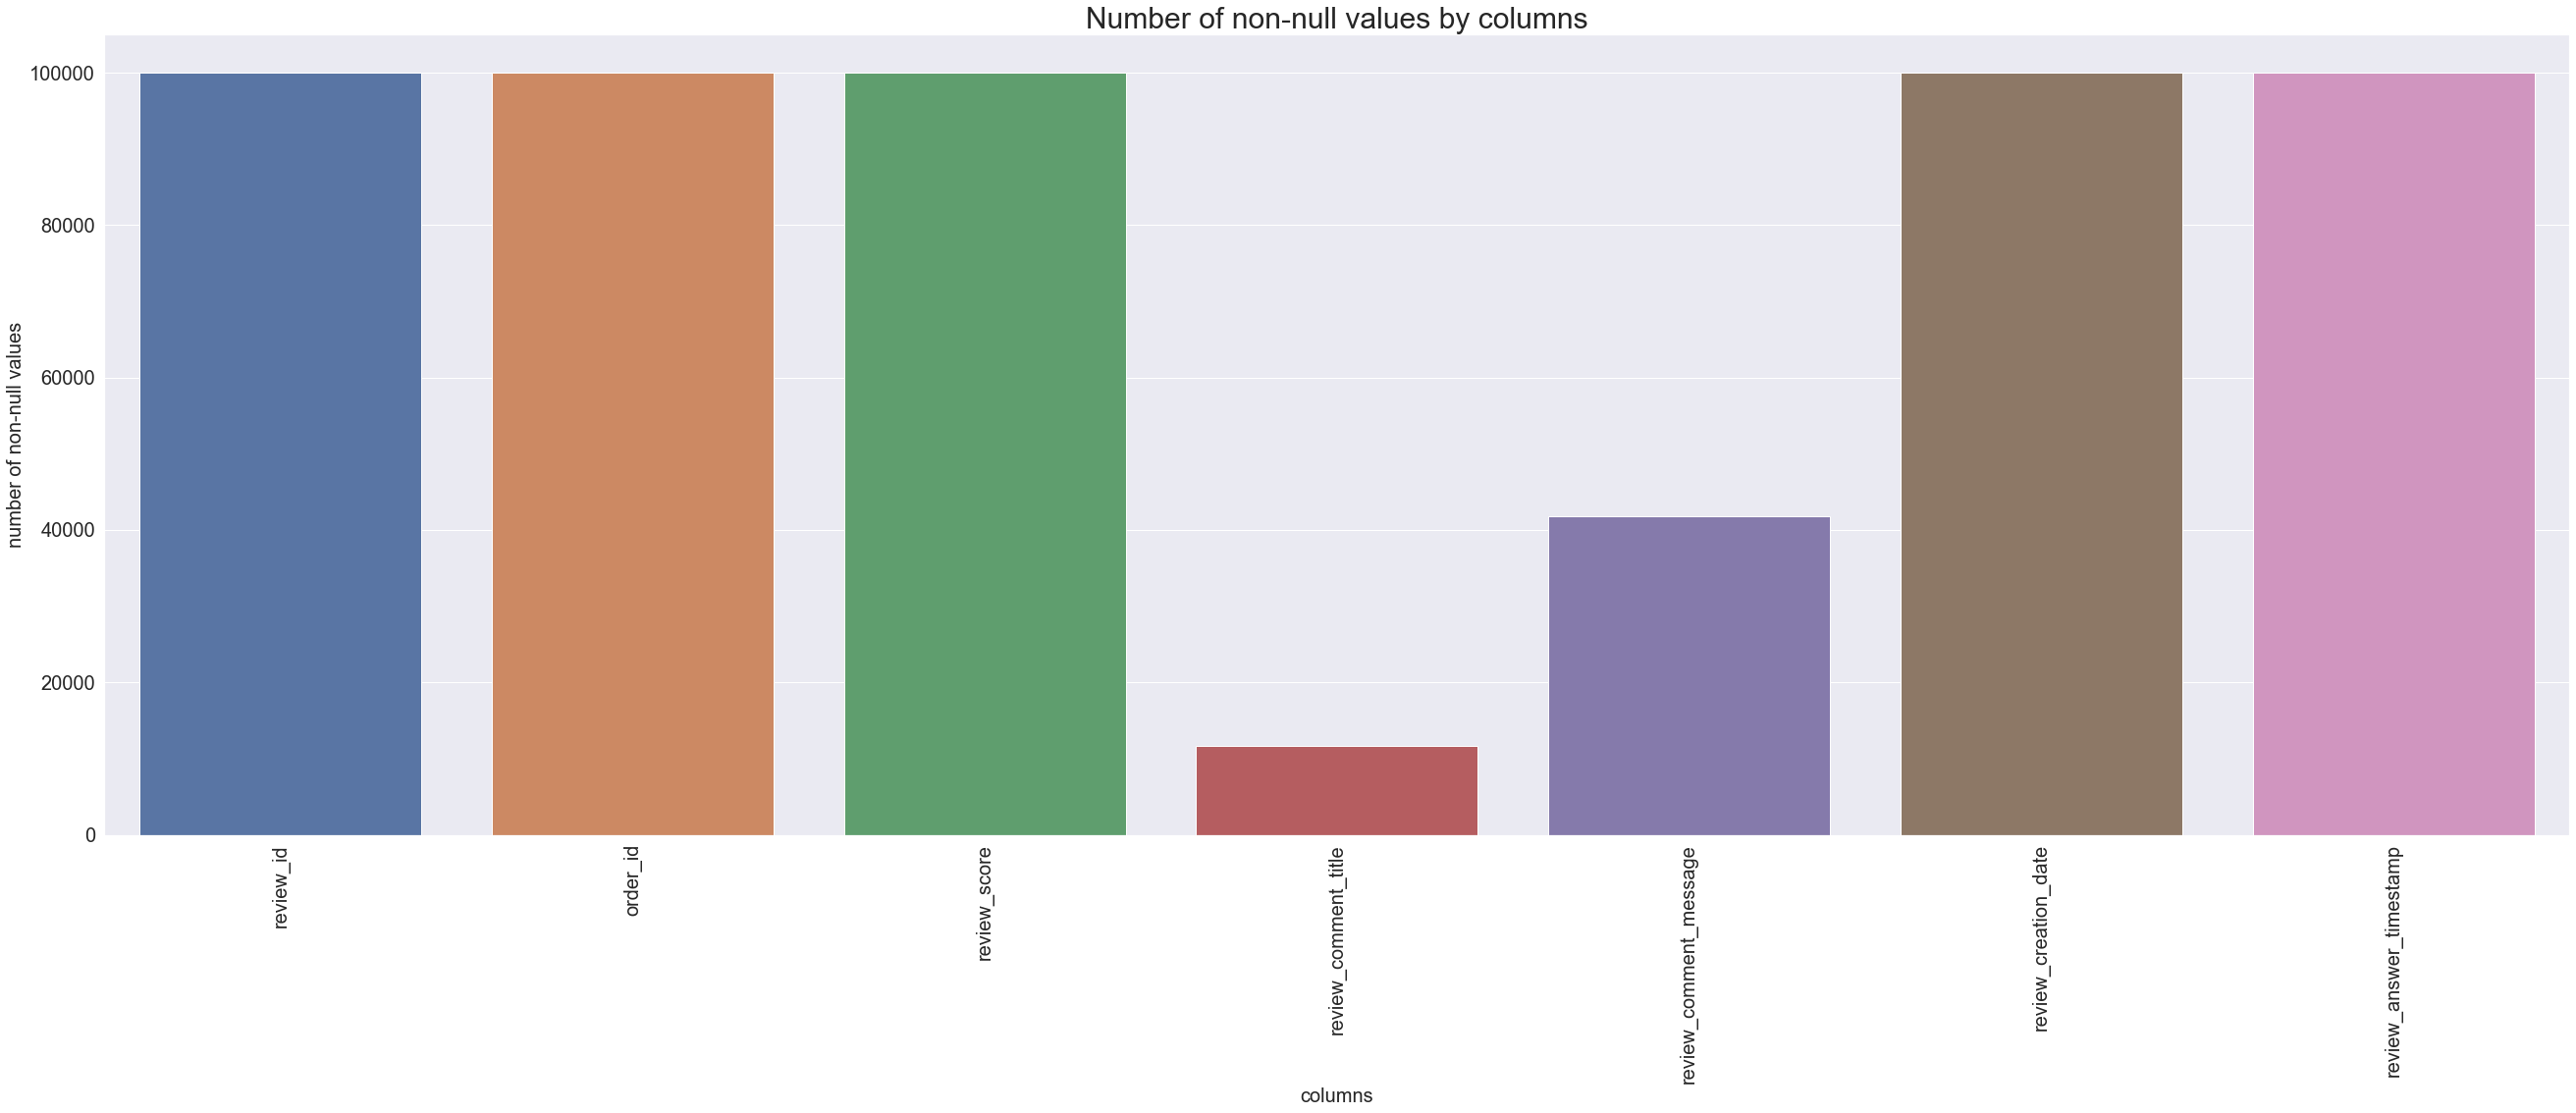

In [44]:
DataSetsExplo(df_order_reviews)

In [45]:
df_order_reviews.nunique()

review_id                  99173
order_id                   99441
review_score                   5
review_comment_title        4600
review_comment_message     36921
review_creation_date         637
review_answer_timestamp    99010
dtype: int64

<AxesSubplot:title={'center':'Distribution of Review Score'}>

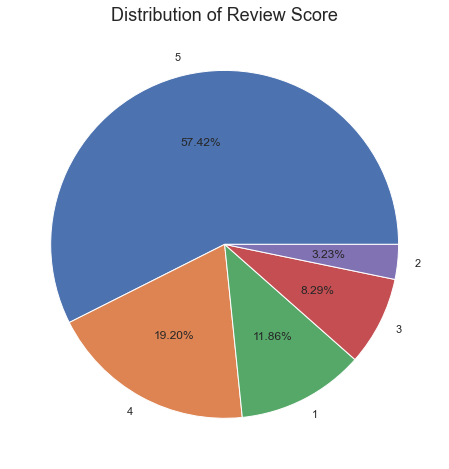

In [46]:
plt.figure()
plt.title('Distribution of Review Score', size=18)
df_order_reviews['review_score'].value_counts().\
    plot.pie(figsize=(8, 8), autopct="%1.2f%%", label='')

- We have duplicate reviews per order.
- 57.42% of the reviews have a score of 5, followed by 4 with 19.20%, 1 with 11.86%, 3 with 8.29% and 2 with 3.23%.

## 4.6. Orders<a class="anchor" id="section_4_6"></a>

Dataset has  99441 rows and  8 columns
Number of non-null values by columns :
order_id                         99441
customer_id                      99441
order_status                     99441
order_purchase_timestamp         99441
order_approved_at                99281
order_delivered_carrier_date     97658
order_delivered_customer_date    96476
order_estimated_delivery_date    99441
dtype: int64
Value type per column :
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object


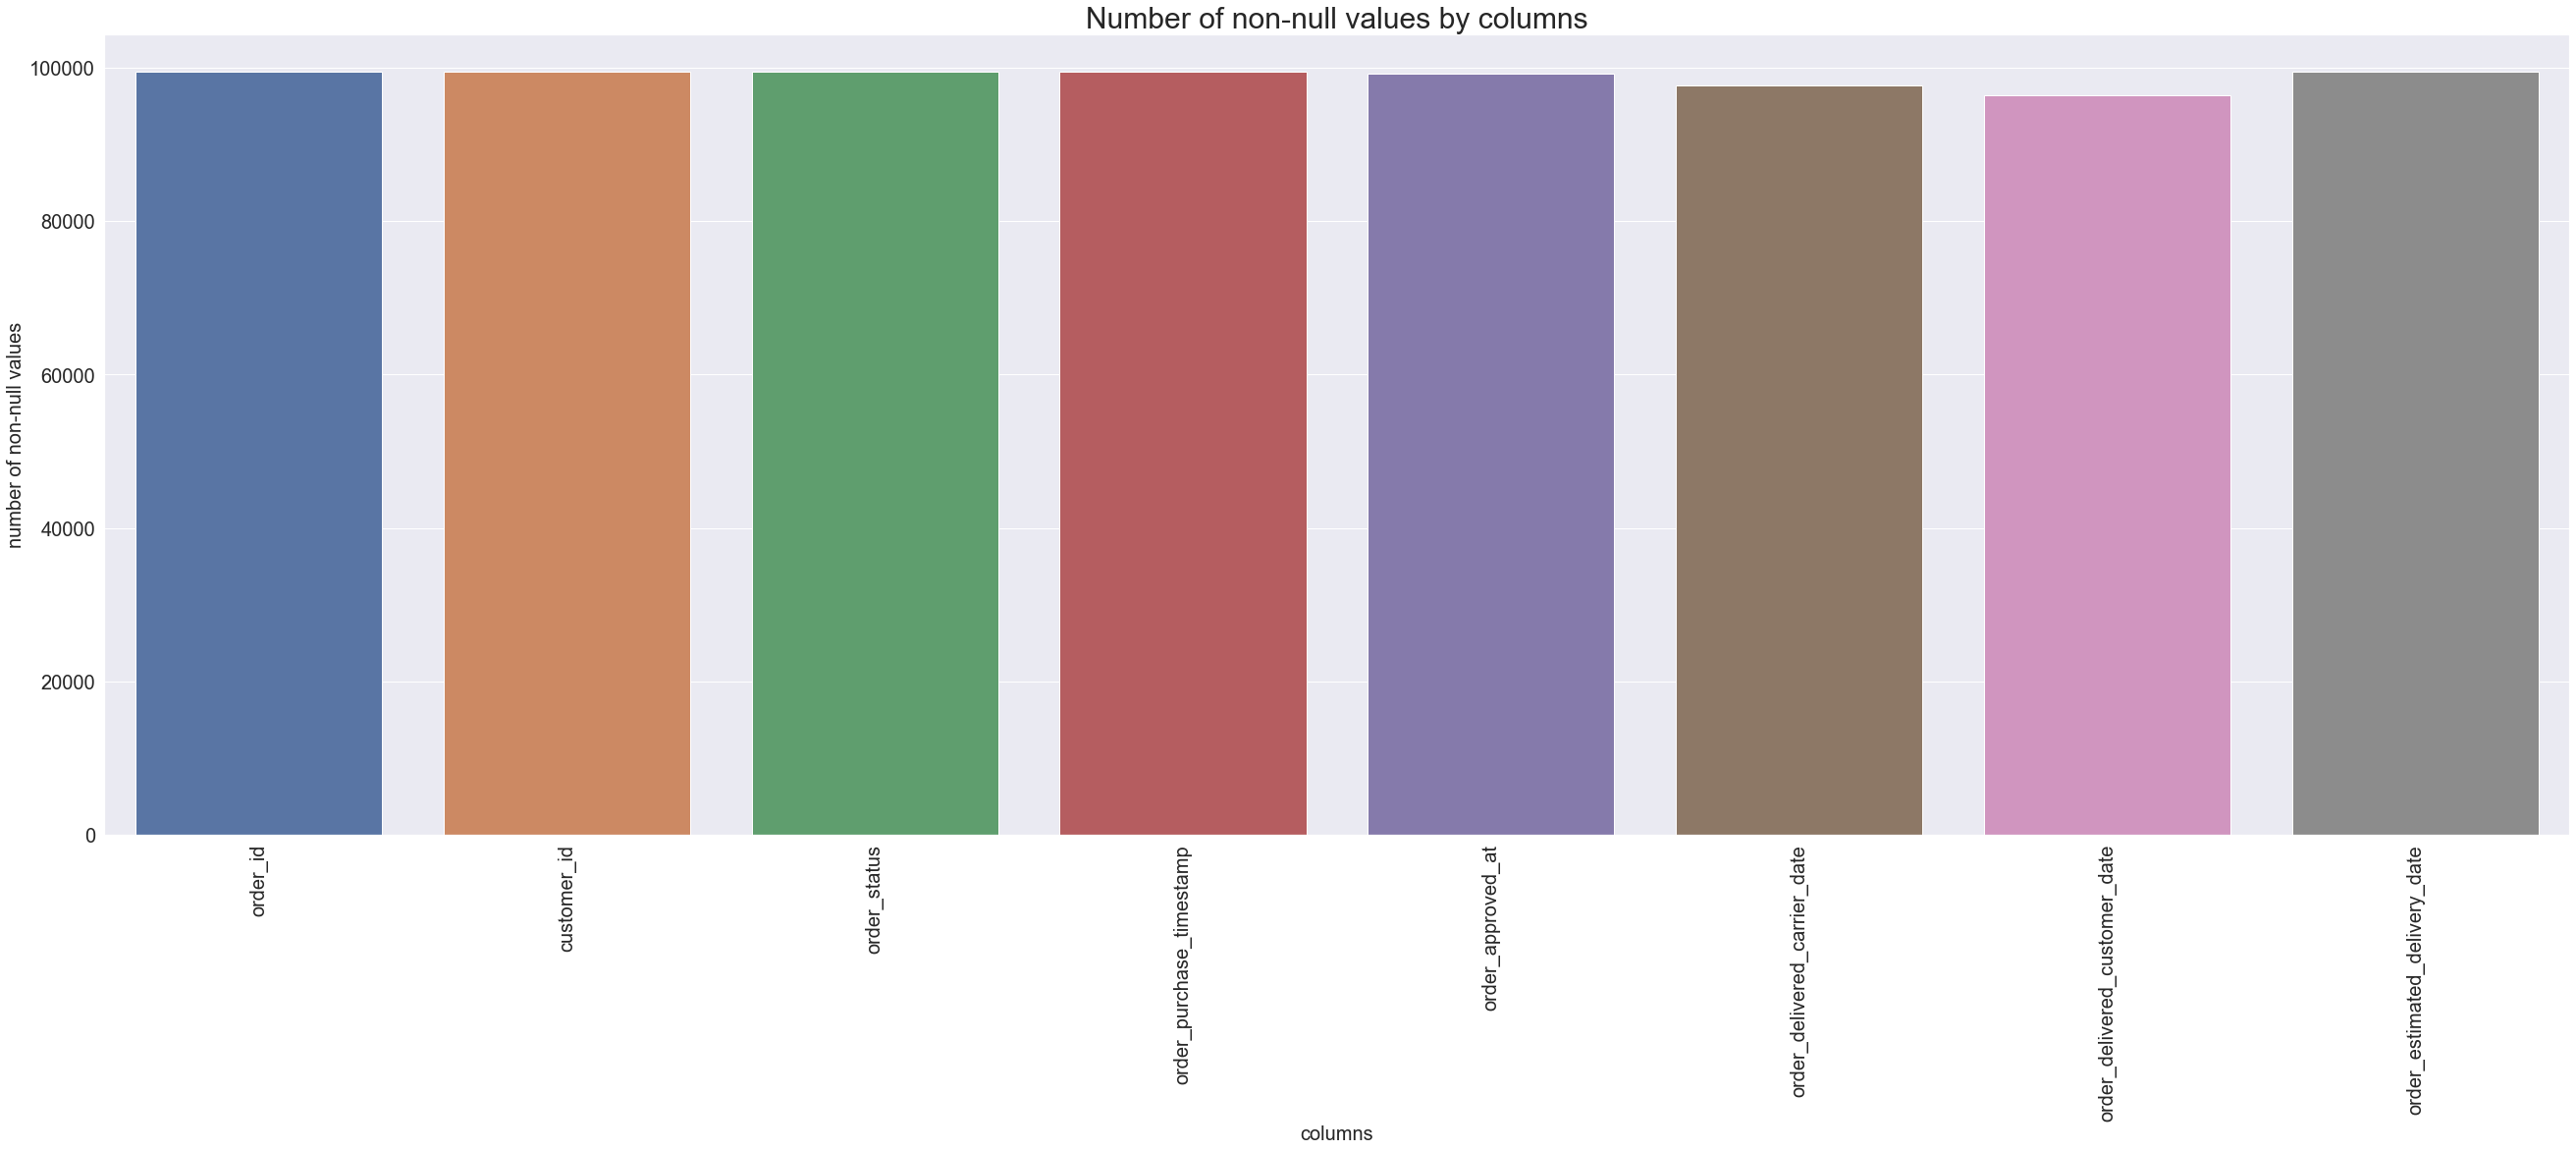

In [47]:
DataSetsExplo(df_orders)

In [48]:
df_orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

Text(0, 0.5, 'Count')

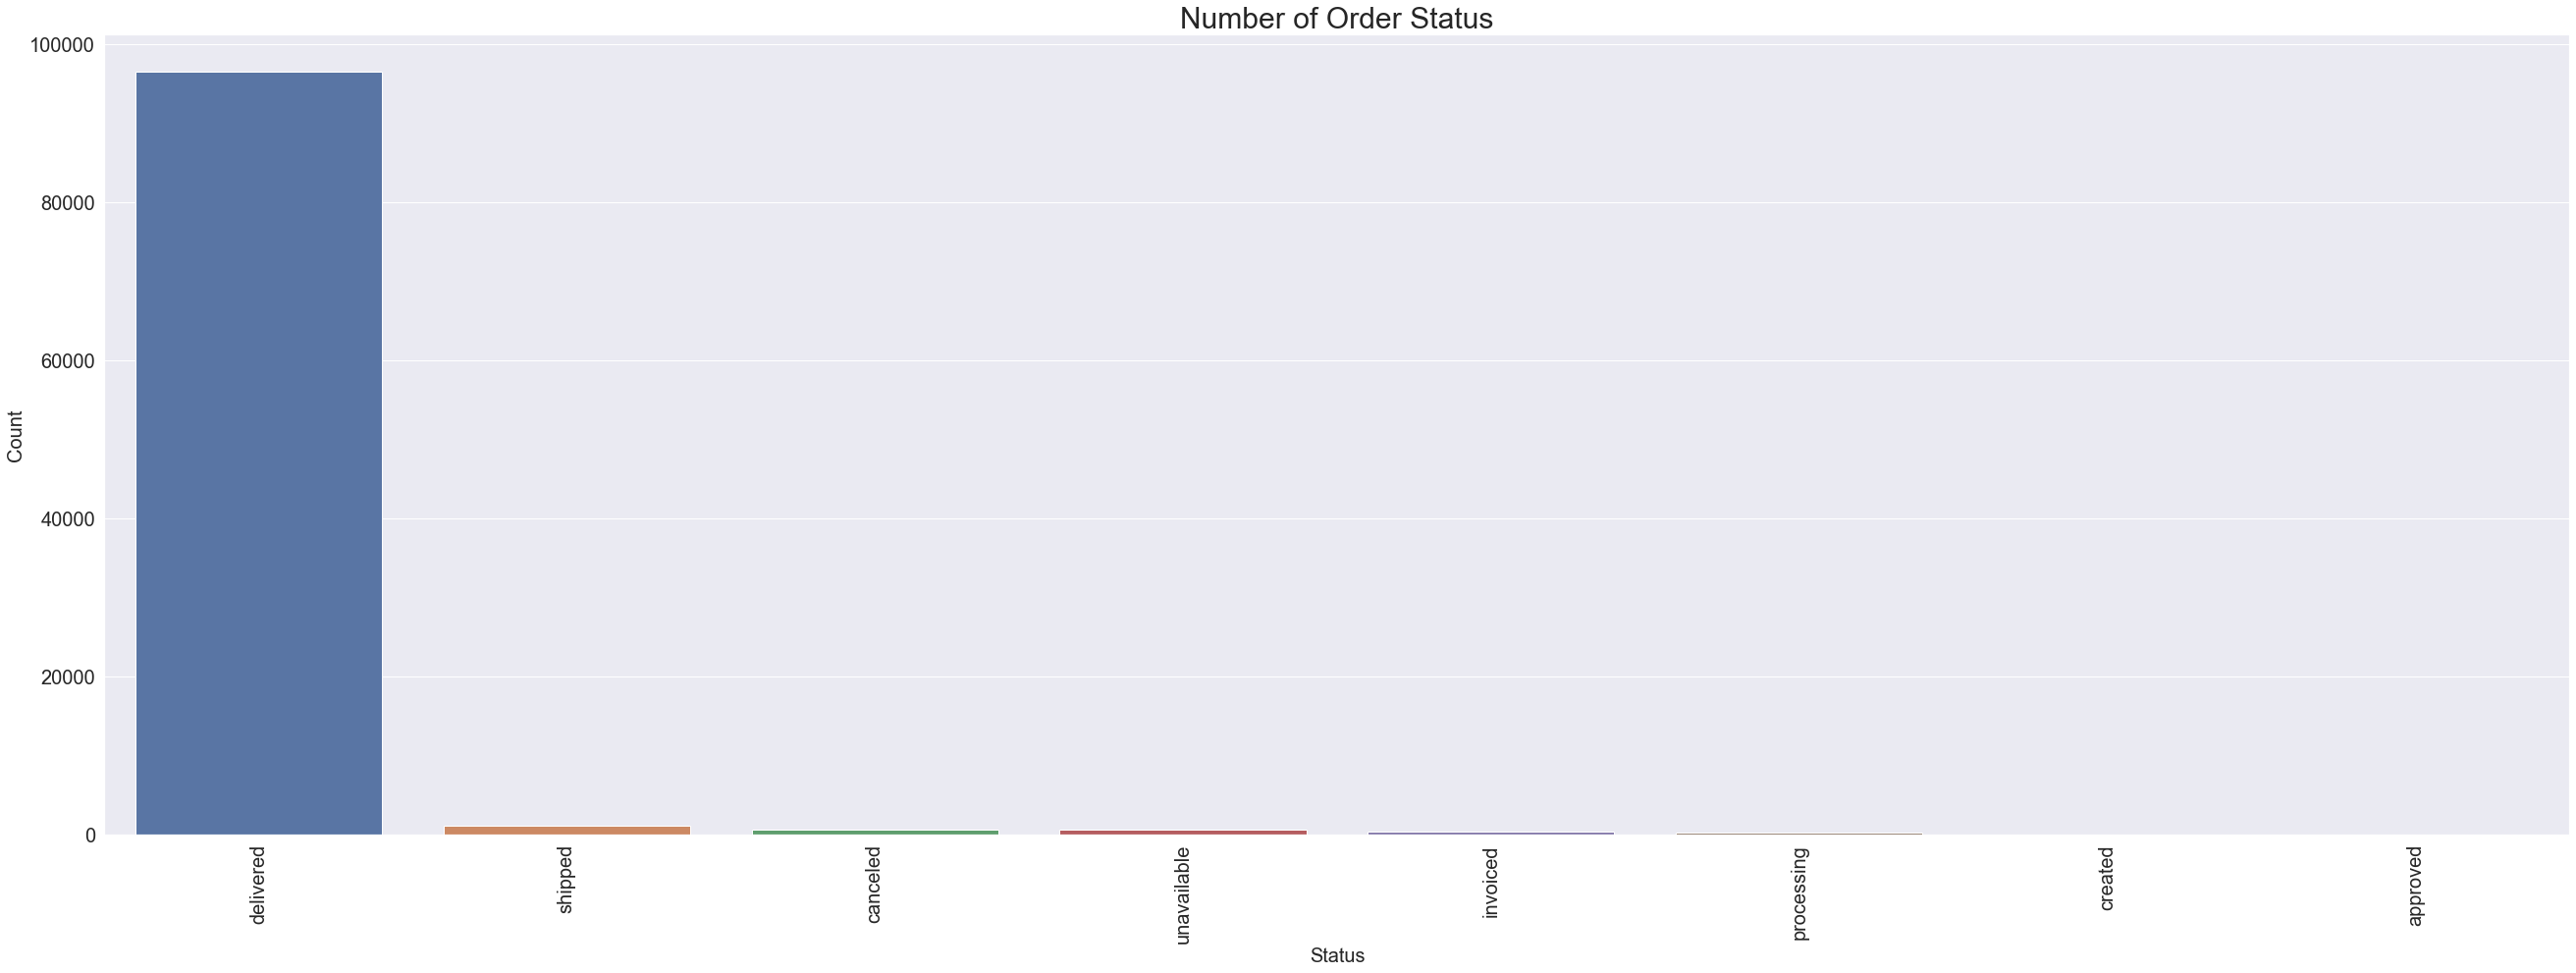

In [49]:
plt.figure(figsize=(45, 15))
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
sns.barplot(x=df_orders['order_status'].value_counts().index,
            y=df_orders['order_status'].value_counts())
plt.title('Number of Order Status', fontsize=30)
plt.xlabel('Status', size=20)
plt.ylabel('Count', size=20)

In [50]:
columns_datatime = ['order_purchase_timestamp',
                    'order_approved_at',
                    'order_delivered_carrier_date',
                    'order_delivered_customer_date',
                    'order_estimated_delivery_date']

In [51]:
for col in columns_datatime:
    df_orders[col] = pd.to_datetime(df_orders[col])

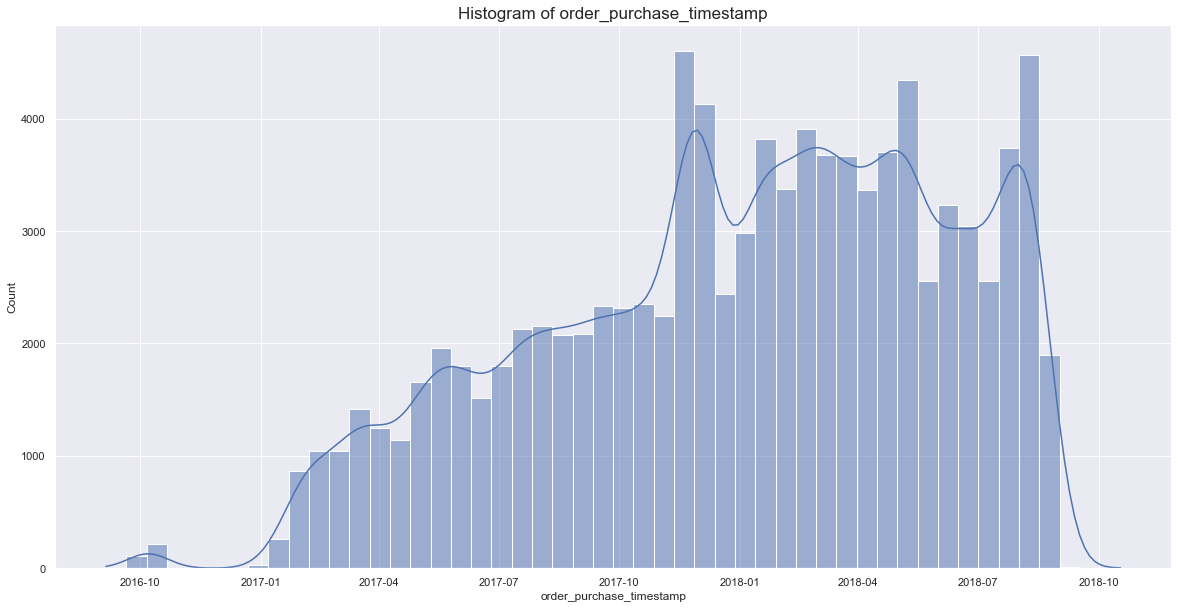

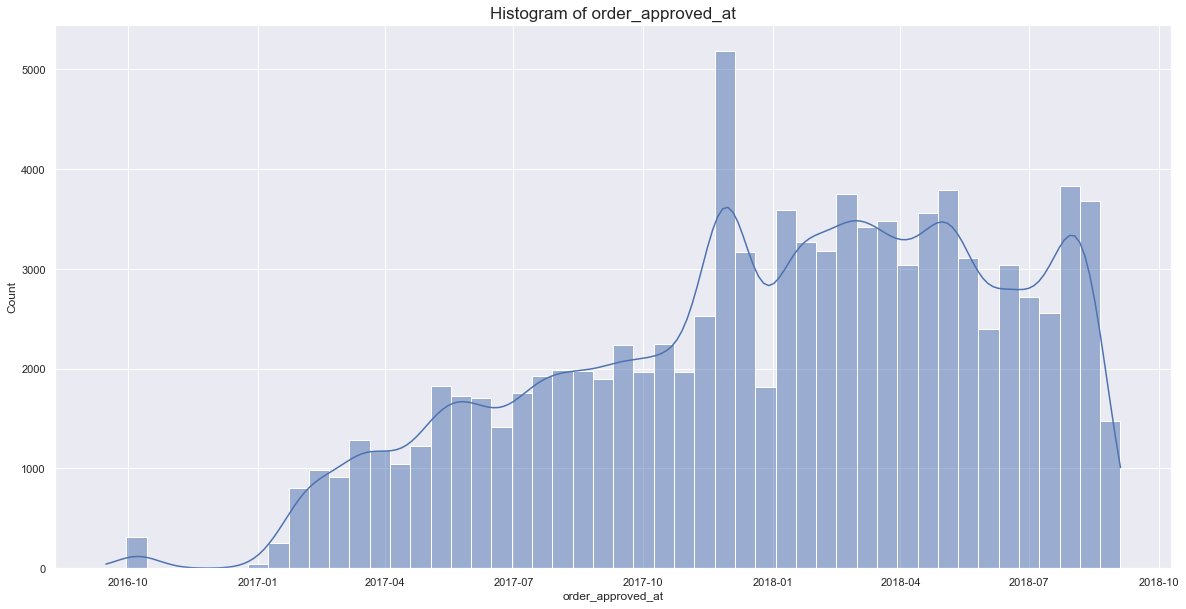

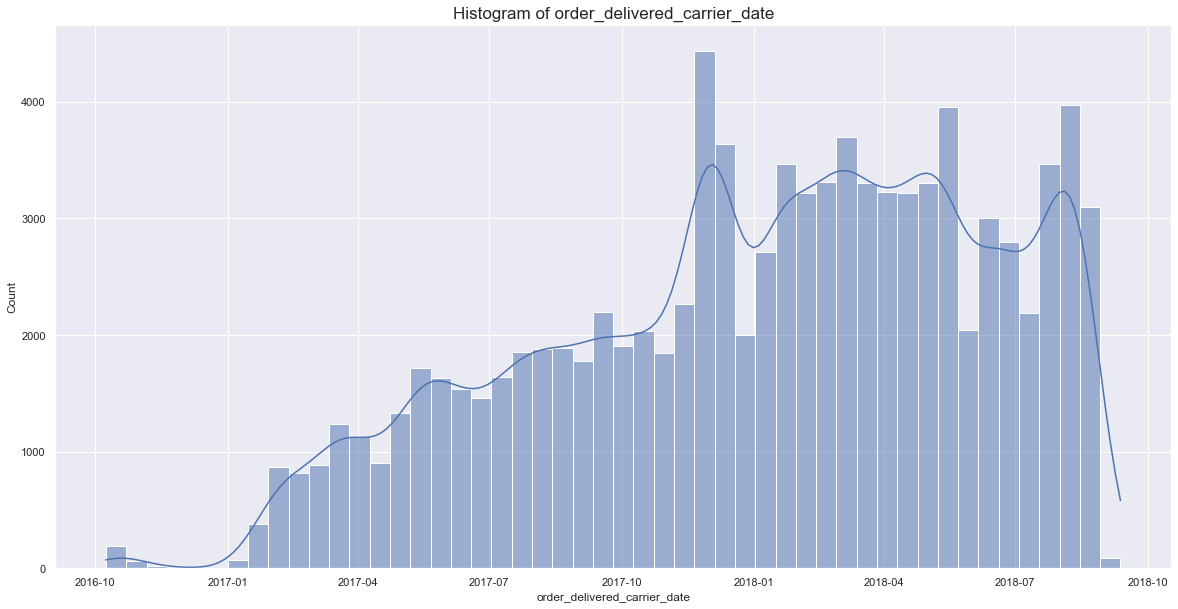

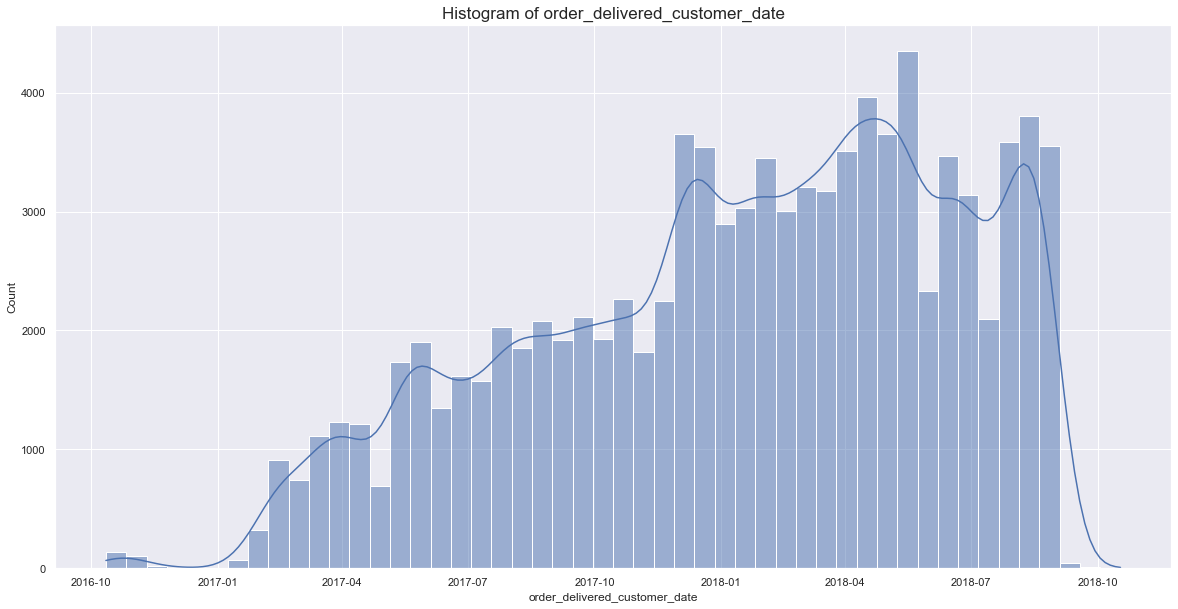

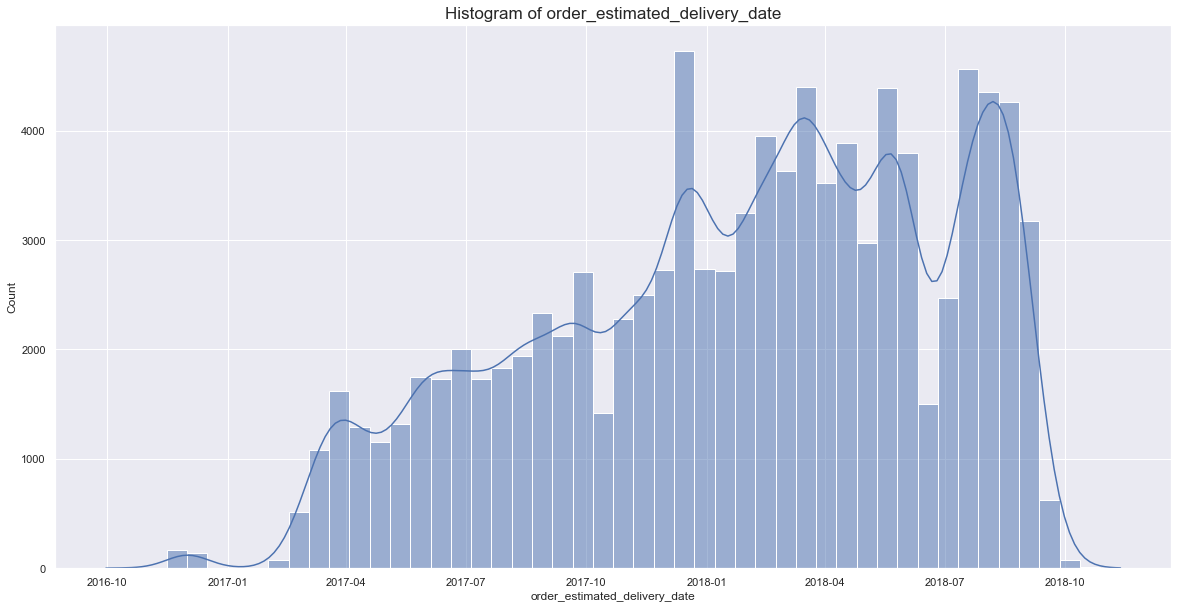

In [52]:
for col in columns_datatime:
    plt.figure(figsize=(20, 10))
    plt.title('Histogram of ' + col, size=17)
    plt.xlabel(col, size=12)
    sns.histplot(df_orders[col], bins=50, kde=True)

- The vast majority of products are delivered (+90,000).
- Data collection seems to start from 2017.

## 4.7. Products<a class="anchor" id="section_4_7"></a>

Dataset has  32951 rows and  9 columns
Number of non-null values by columns :
product_id                    32951
product_category_name         32341
product_name_lenght           32341
product_description_lenght    32341
product_photos_qty            32341
product_weight_g              32949
product_length_cm             32949
product_height_cm             32949
product_width_cm              32949
dtype: int64
Value type per column :
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object


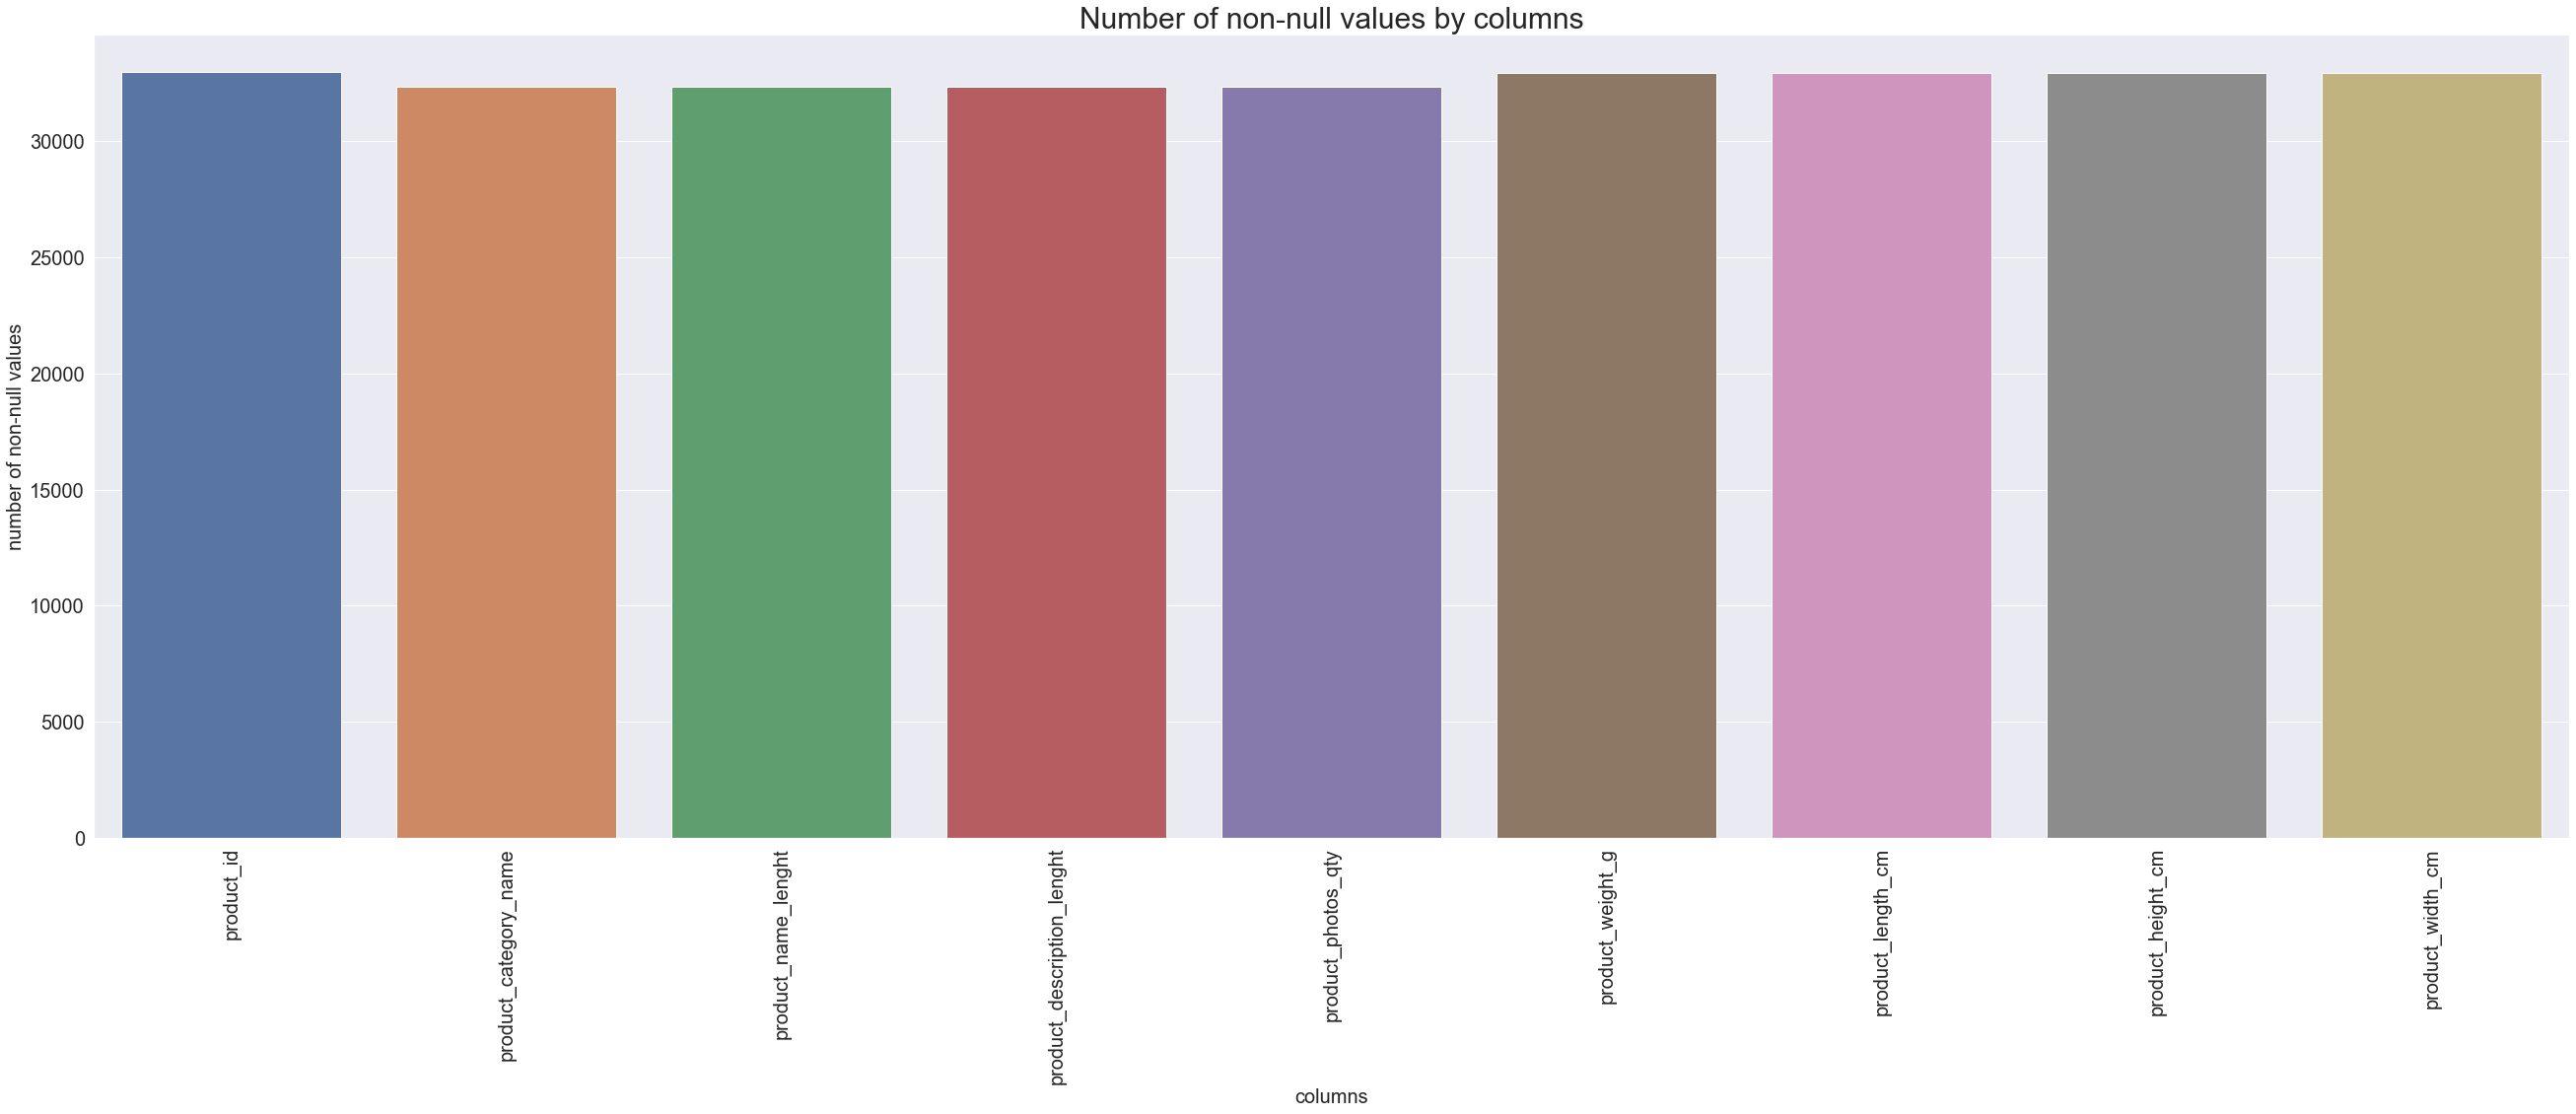

In [53]:
DataSetsExplo(df_products)

Dataset has  71 rows and  2 columns
Number of non-null values by columns :
product_category_name            71
product_category_name_english    71
dtype: int64
Value type per column :
product_category_name            object
product_category_name_english    object
dtype: object


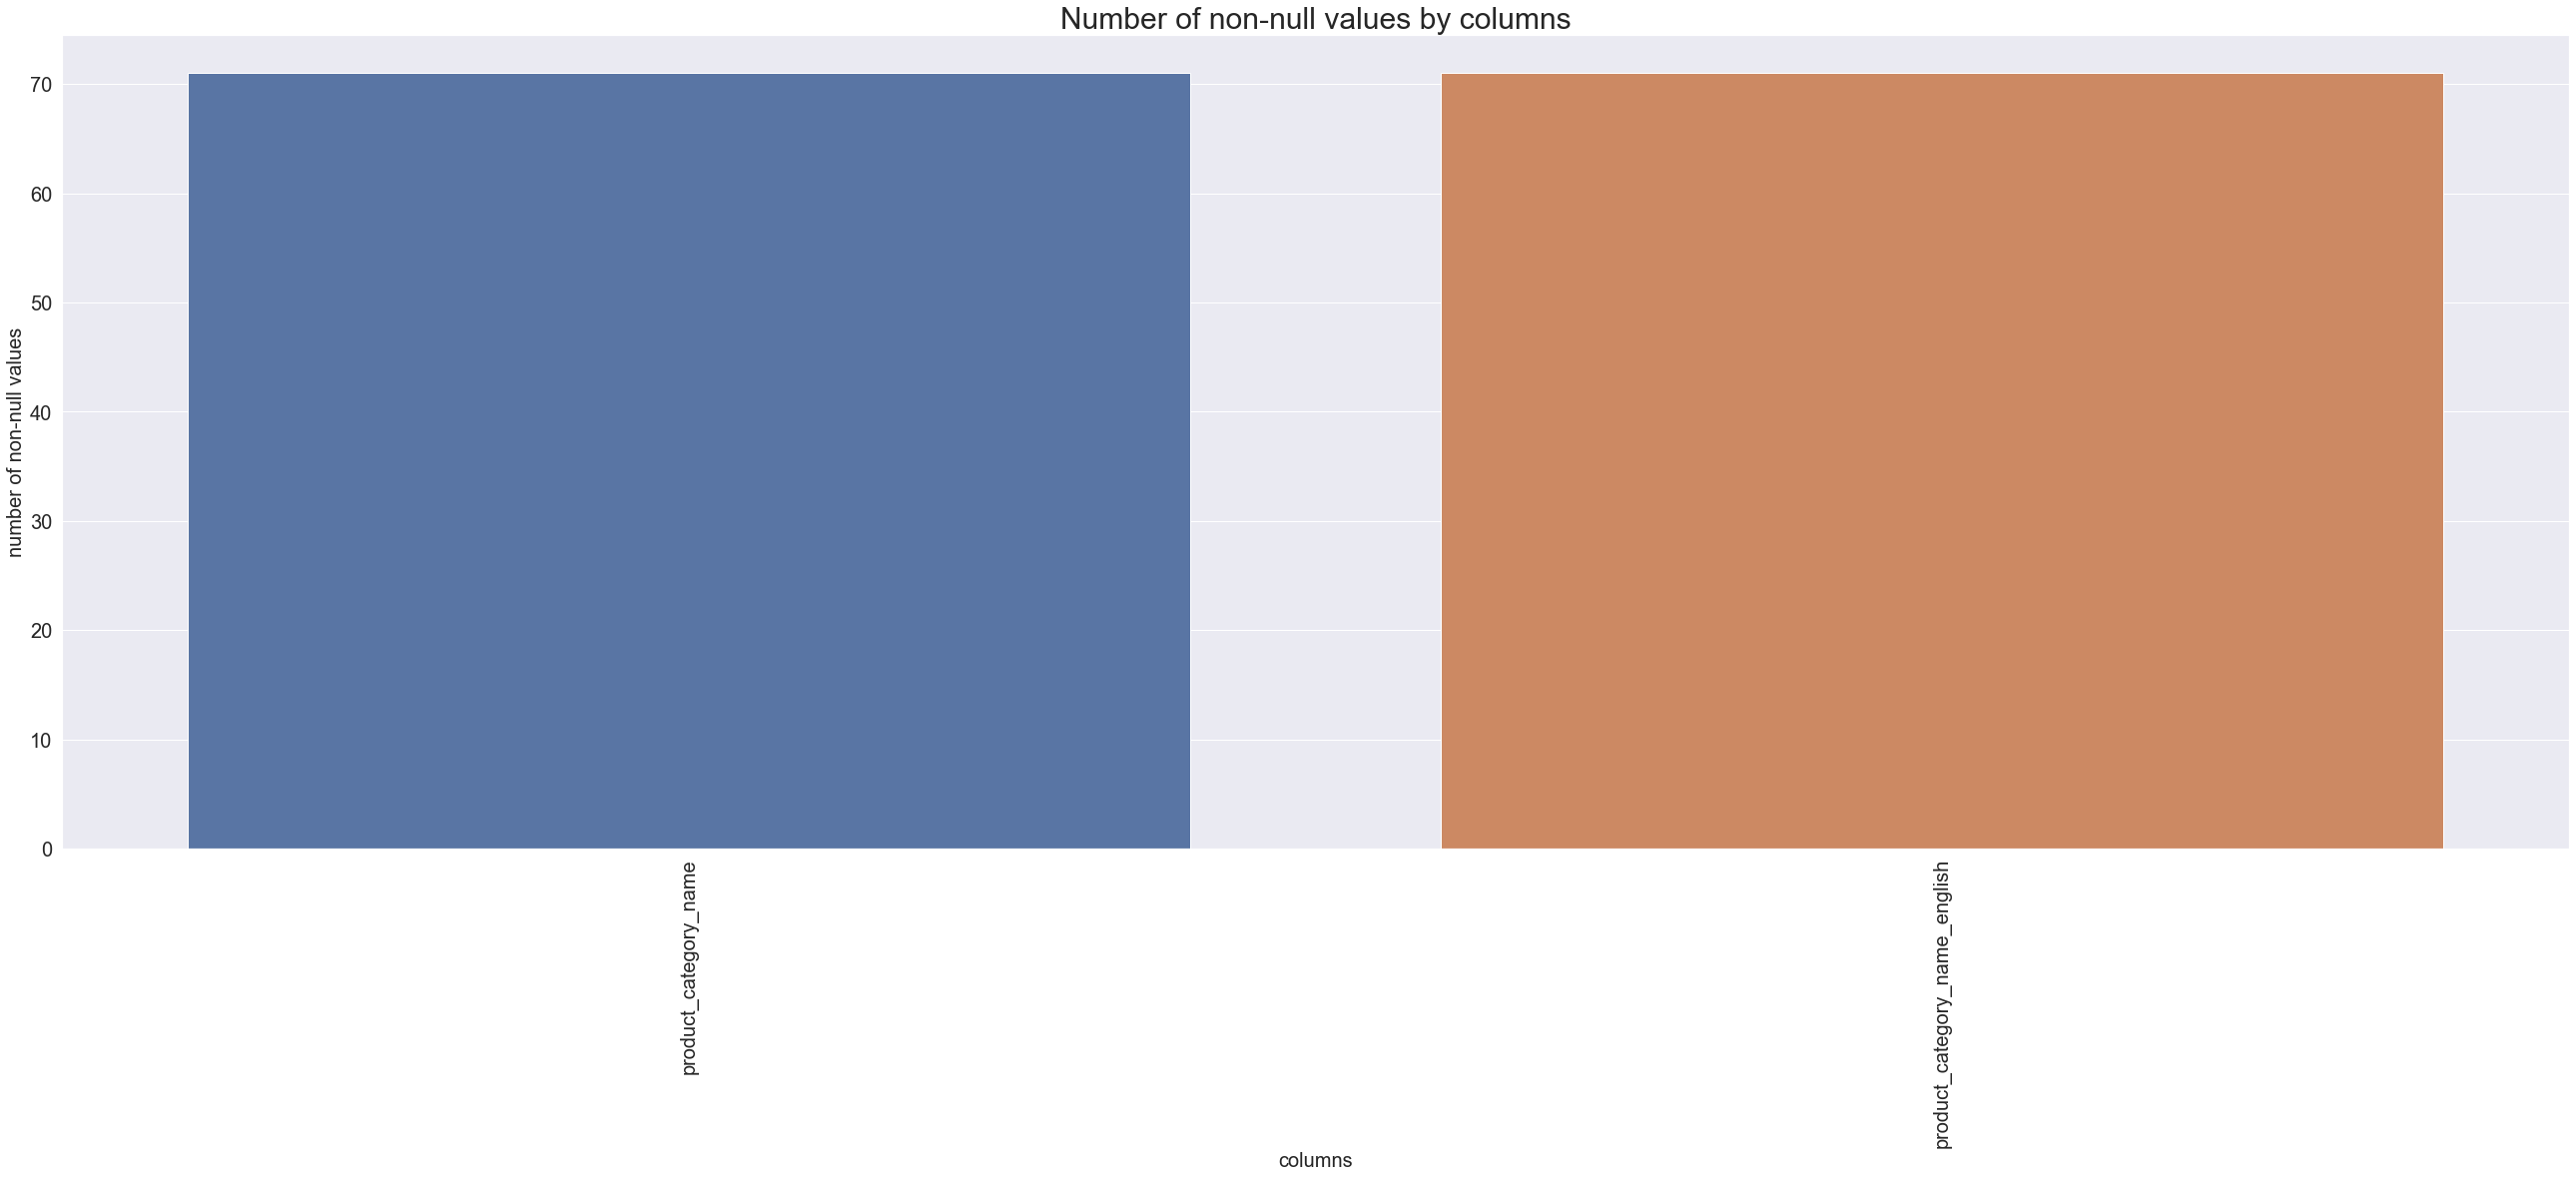

In [54]:
DataSetsExplo(df_PCNT)

In [55]:
df_products.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [56]:
df_PCNT.nunique()

product_category_name            71
product_category_name_english    71
dtype: int64

In [57]:
for i, j in zip(df_PCNT['product_category_name'].unique().tolist(),
                df_PCNT['product_category_name_english'].unique().tolist()):
    df_products['product_category_name'] = \
        df_products['product_category_name'].replace([i], [j])

Text(0, 0.5, 'Count')

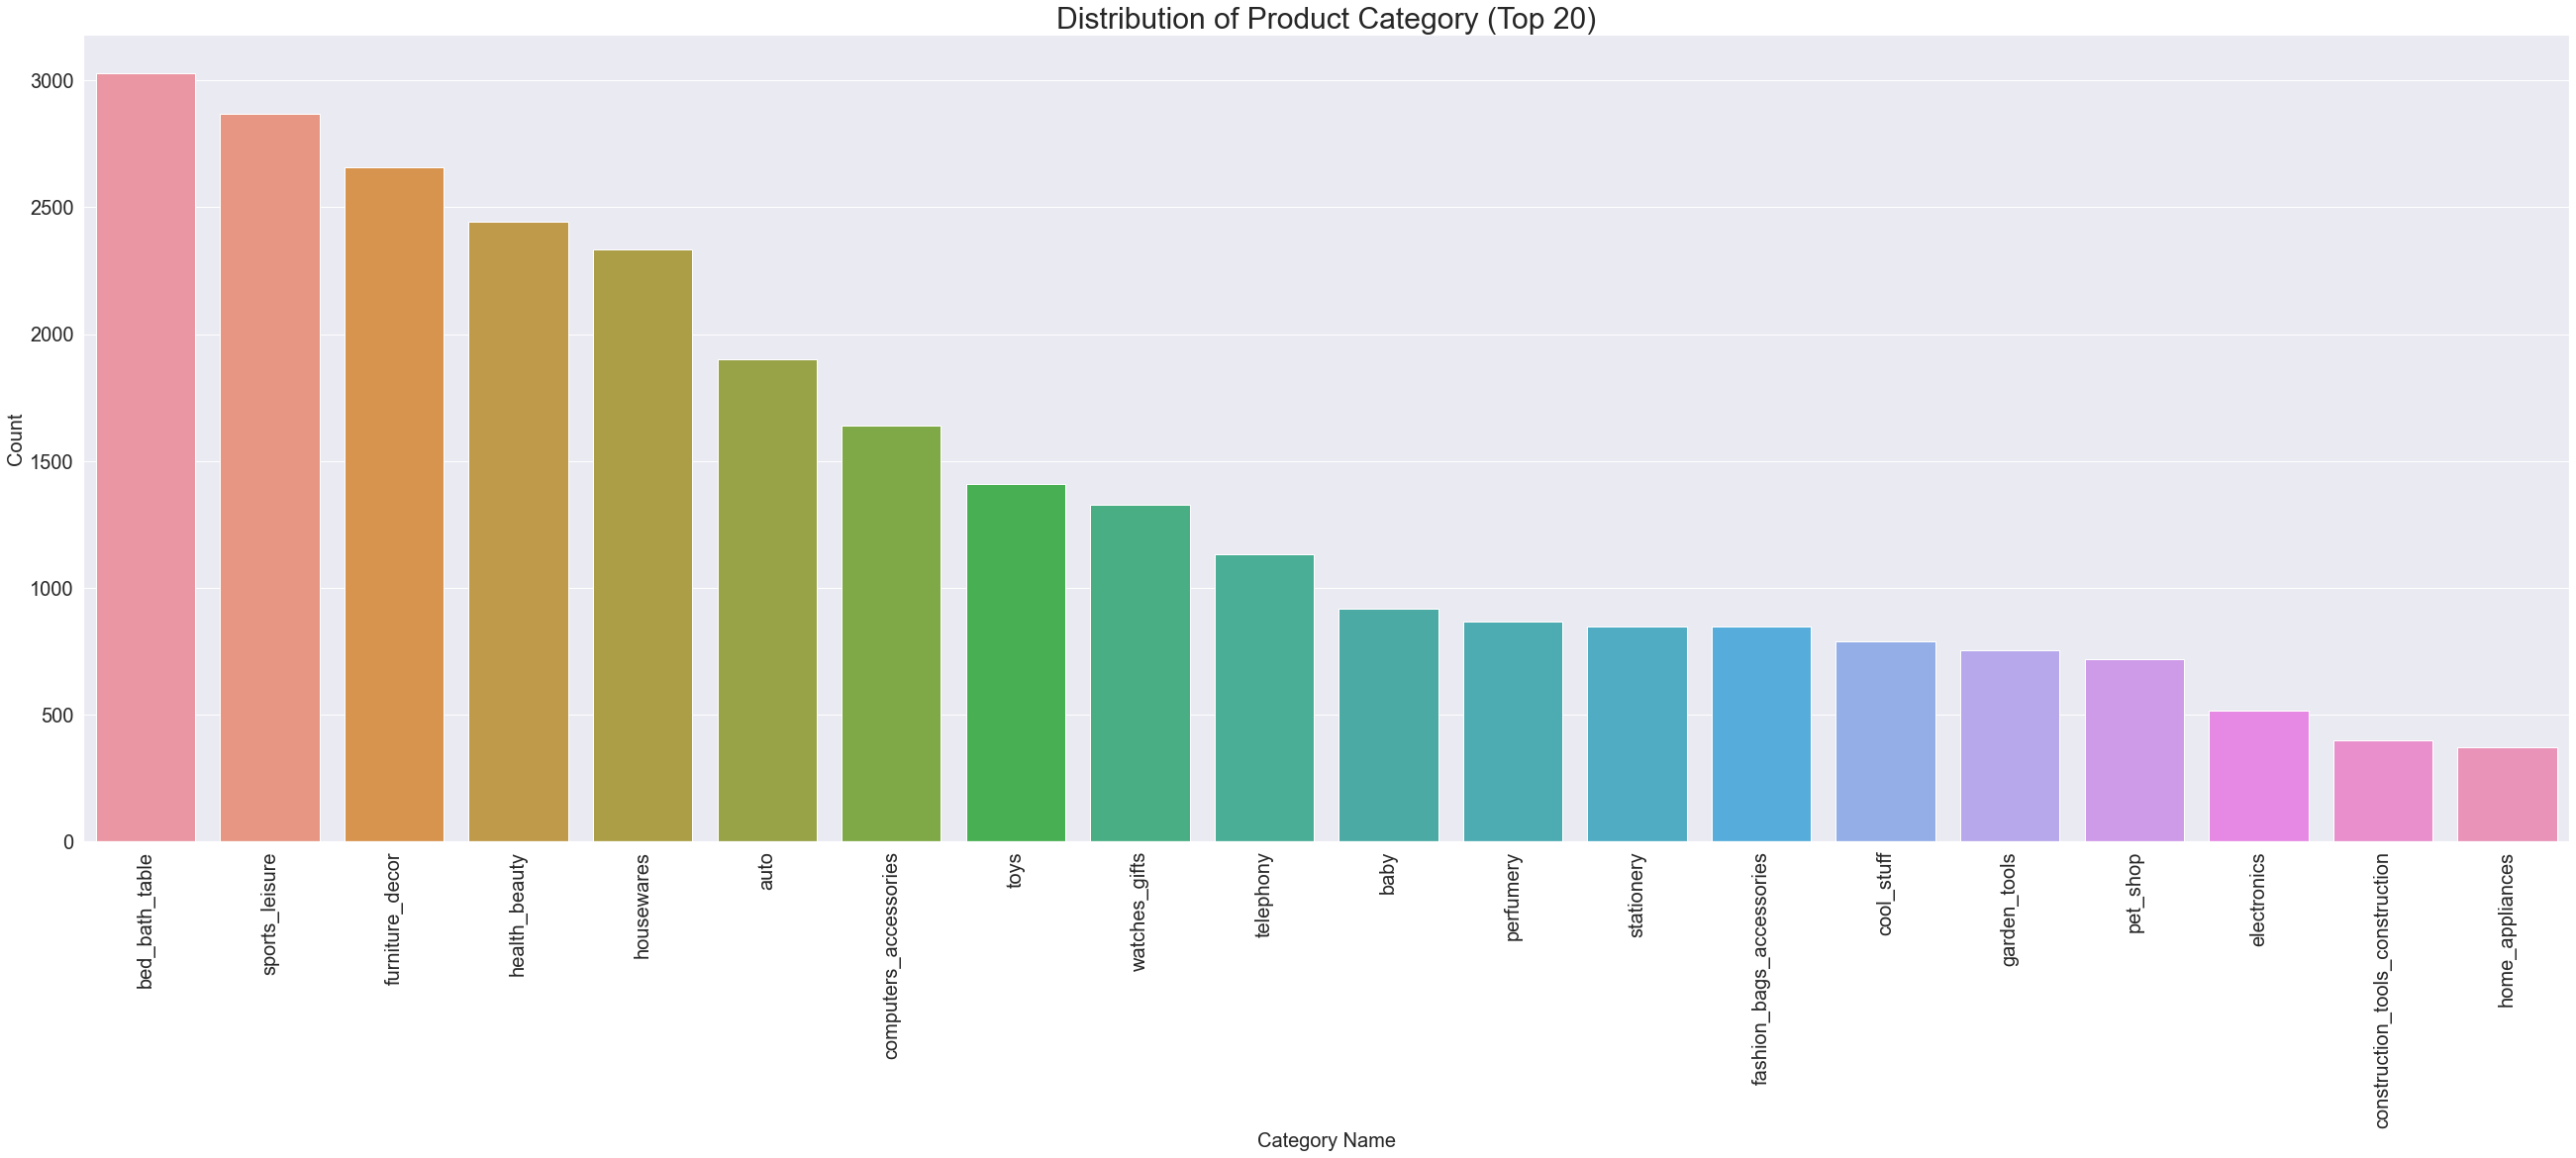

In [58]:
plt.figure(figsize=(45, 15))
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
sns.barplot(x=df_products['product_category_name'].value_counts().index[:20],
            y=df_products['product_category_name'].value_counts()[:20])
plt.title('Distribution of Product Category (Top 20)', fontsize=30)
plt.xlabel('Category Name', size=20)
plt.ylabel('Count', size=20)

<AxesSubplot:title={'center':'Distribution of product'}>

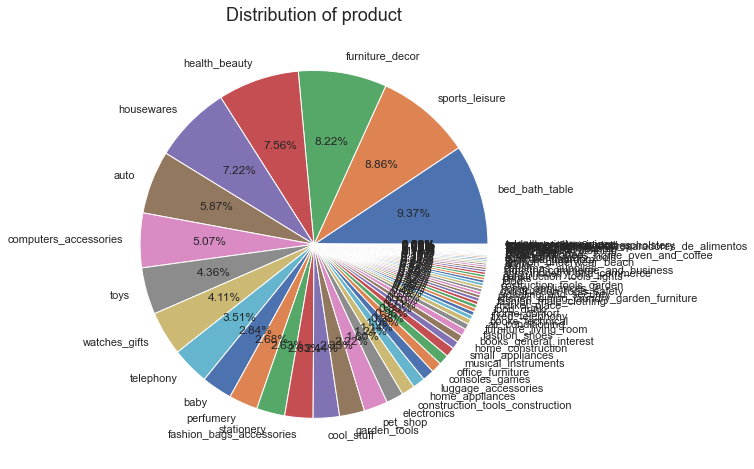

In [59]:
plt.figure()
plt.title('Distribution of product', size=18)
df_products['product_category_name']\
    .value_counts().plot.pie(figsize=(8, 8), autopct="%1.2f%%", label='')

In [60]:
df_products.describe()

product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          21.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  
count      32949.000000  
mean          23.196728  
std           12.079047  
min            6.000000  
25%           15.000000  
50%           20.000000  
75%           30.000000  
max          118.000000

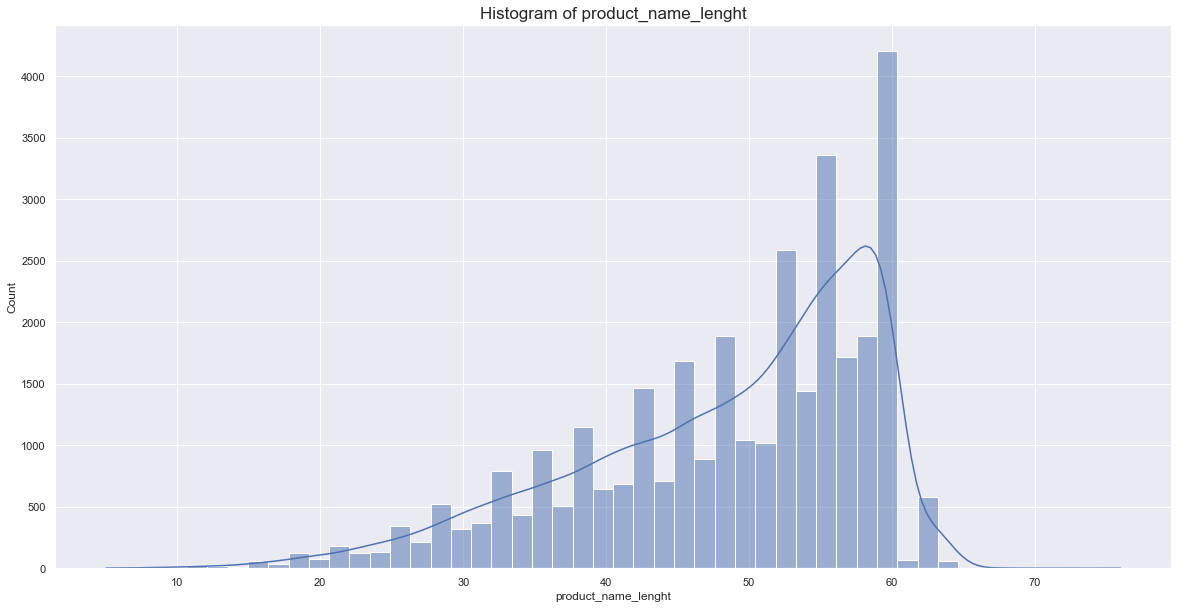

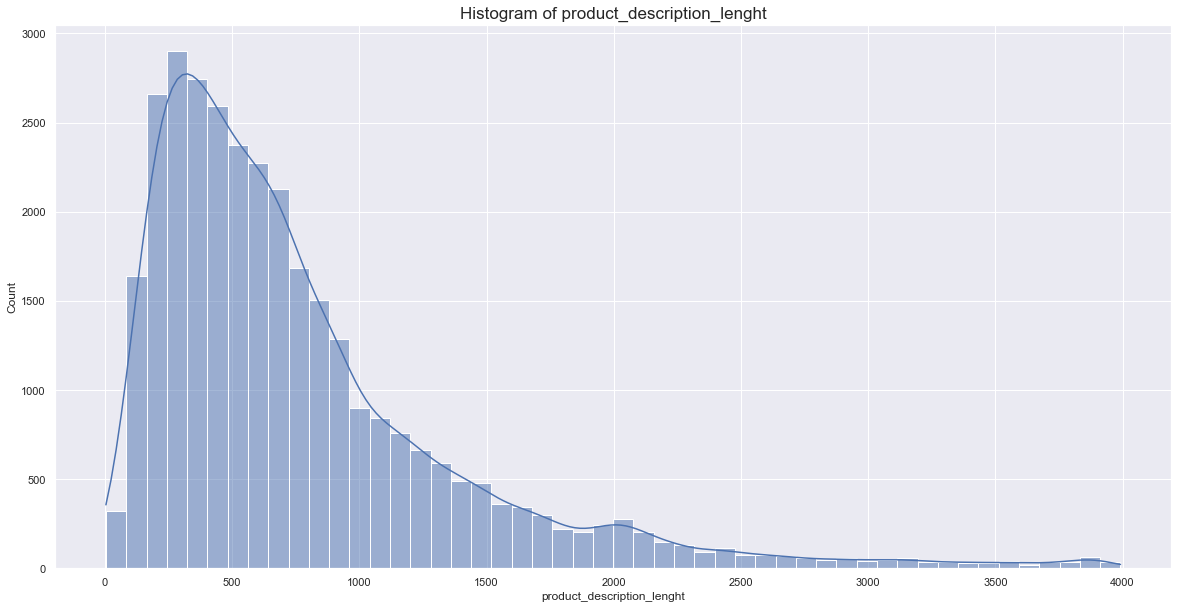

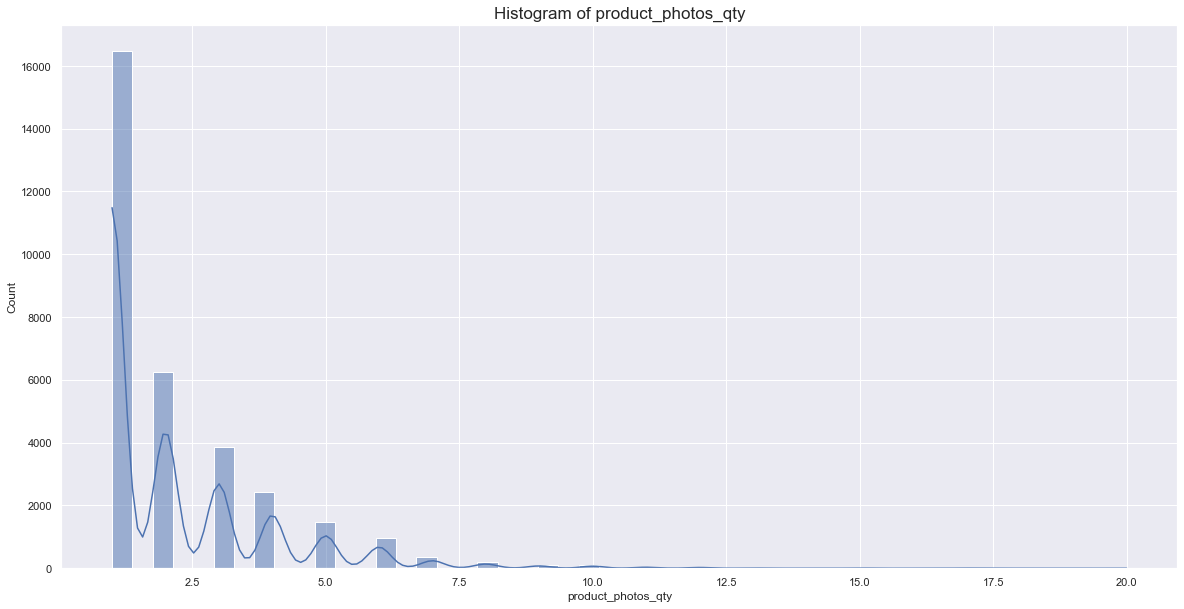

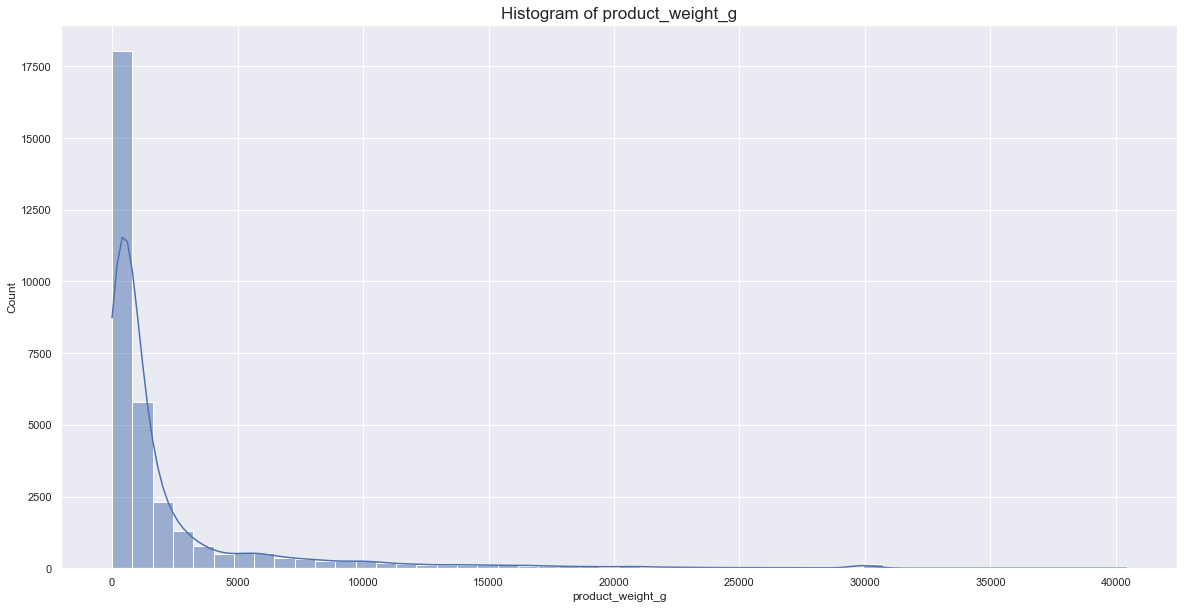

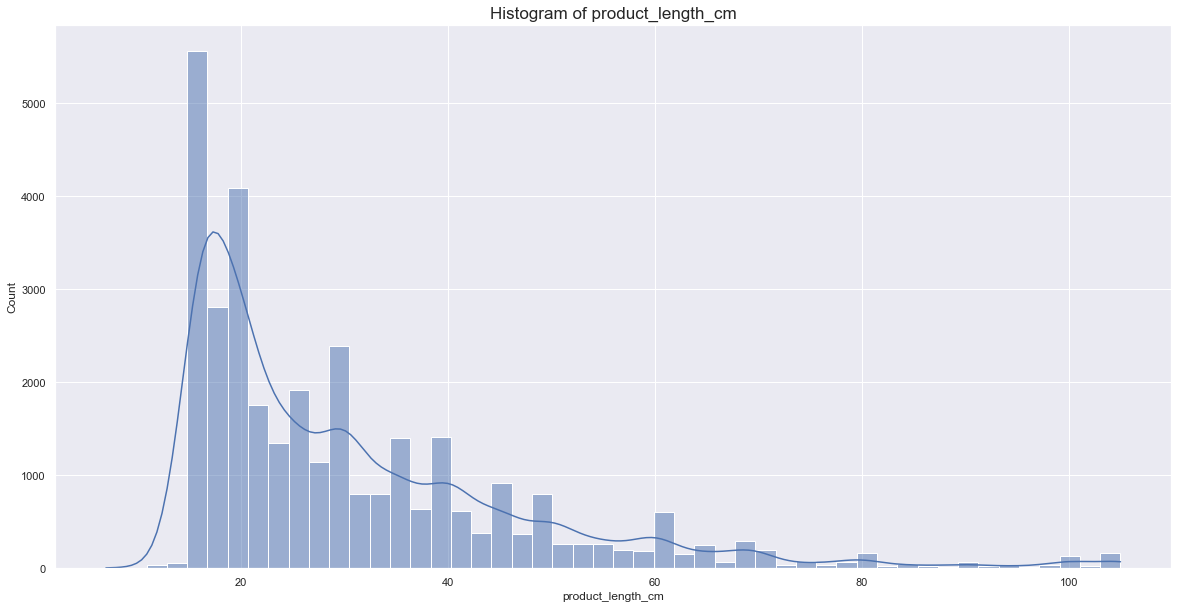

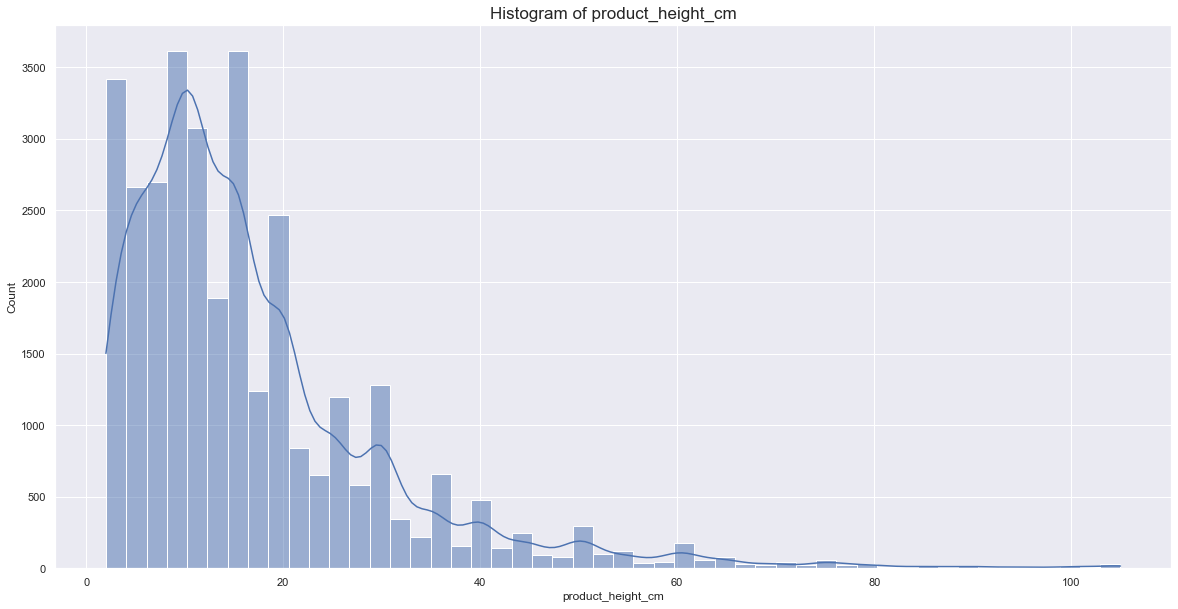

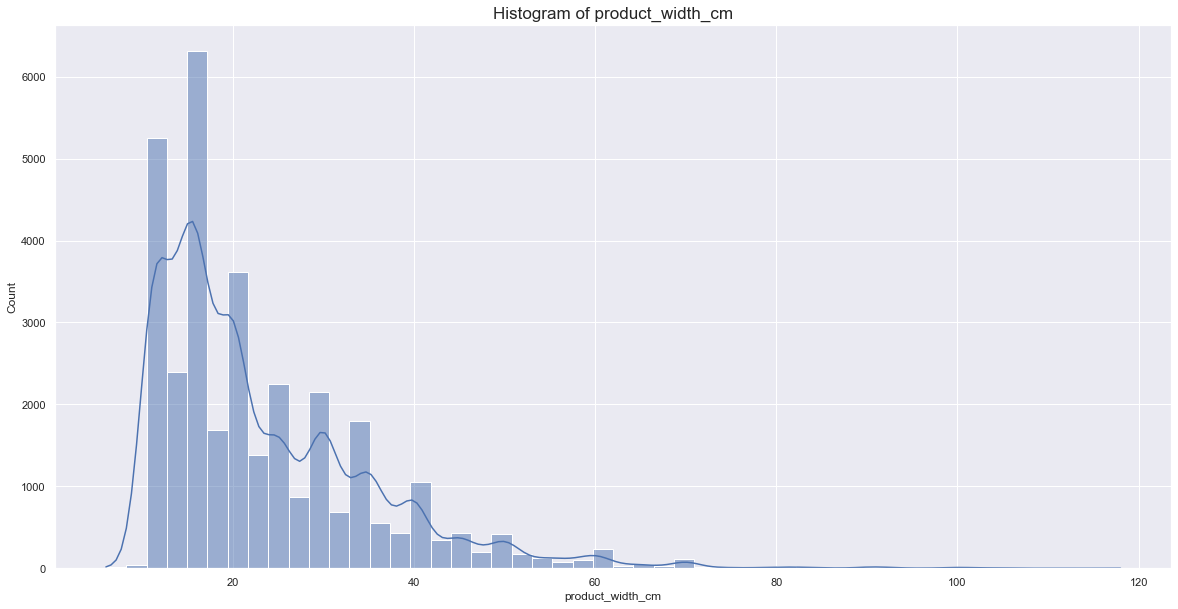

In [61]:
for col in df_products.select_dtypes('float64'):
    plt.figure(figsize=(20, 10))
    plt.title('Histogram of ' + col, size=17)
    plt.xlabel(col, size=12)
    sns.histplot(df_products[col], bins=50, kde=True)

- The most popular product categories are bed_bath_table (+3000), sports_leisure (~ 3000), furniture_decor (+2500).

## 4.8. Sellers<a class="anchor" id="section_4_8"></a>

Dataset has  3095 rows and  4 columns
Number of non-null values by columns :
seller_id                 3095
seller_zip_code_prefix    3095
seller_city               3095
seller_state              3095
dtype: int64
Value type per column :
seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object


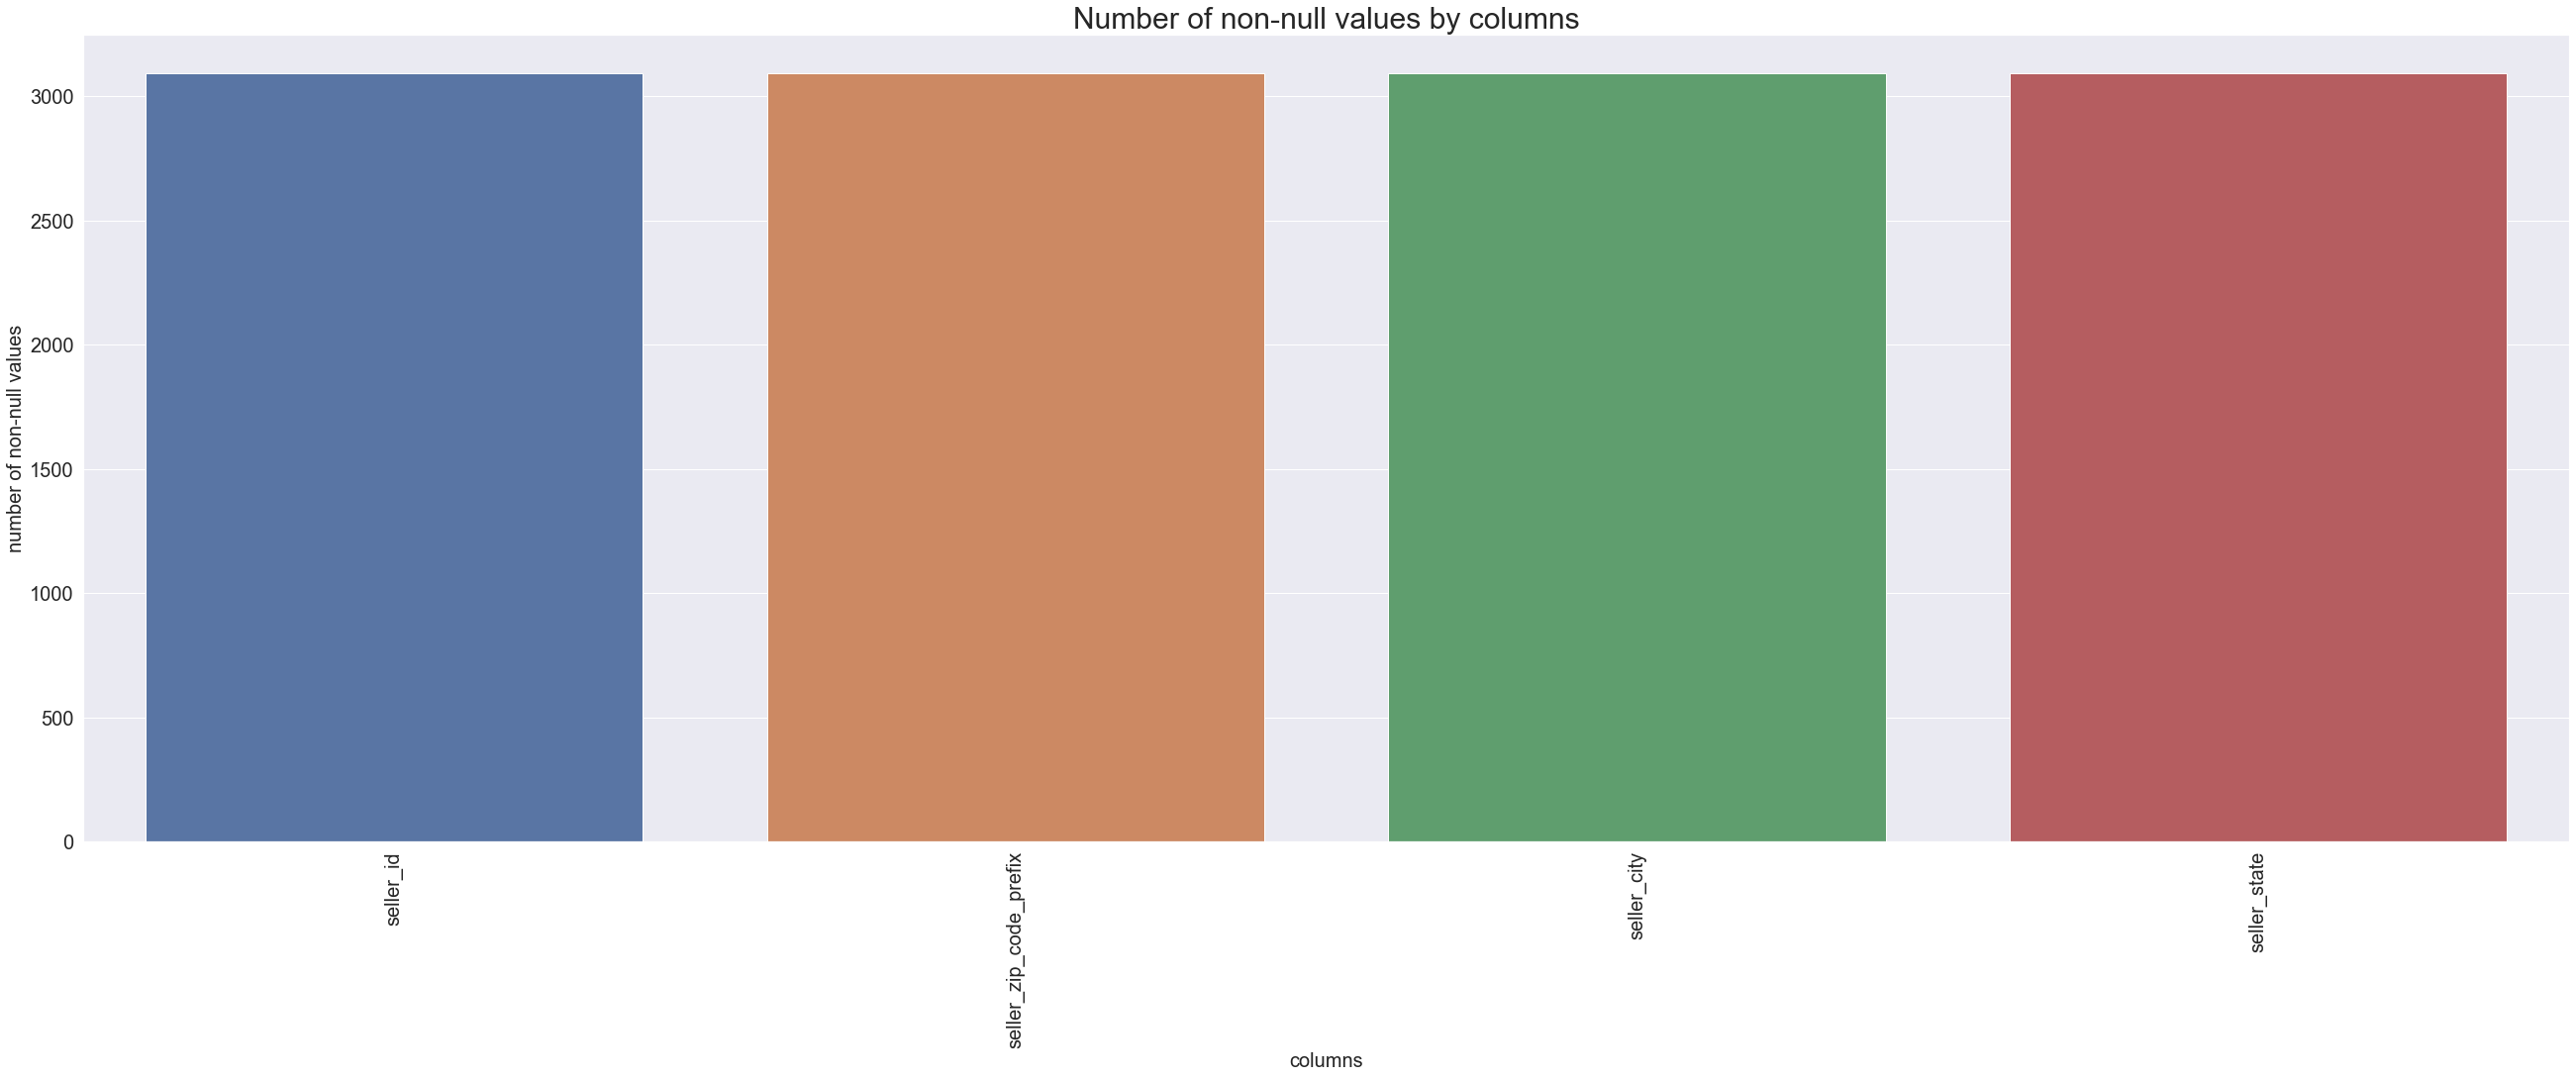

In [62]:
DataSetsExplo(df_sellers)

In [63]:
df_sellers.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

Text(0, 0.5, 'Count')

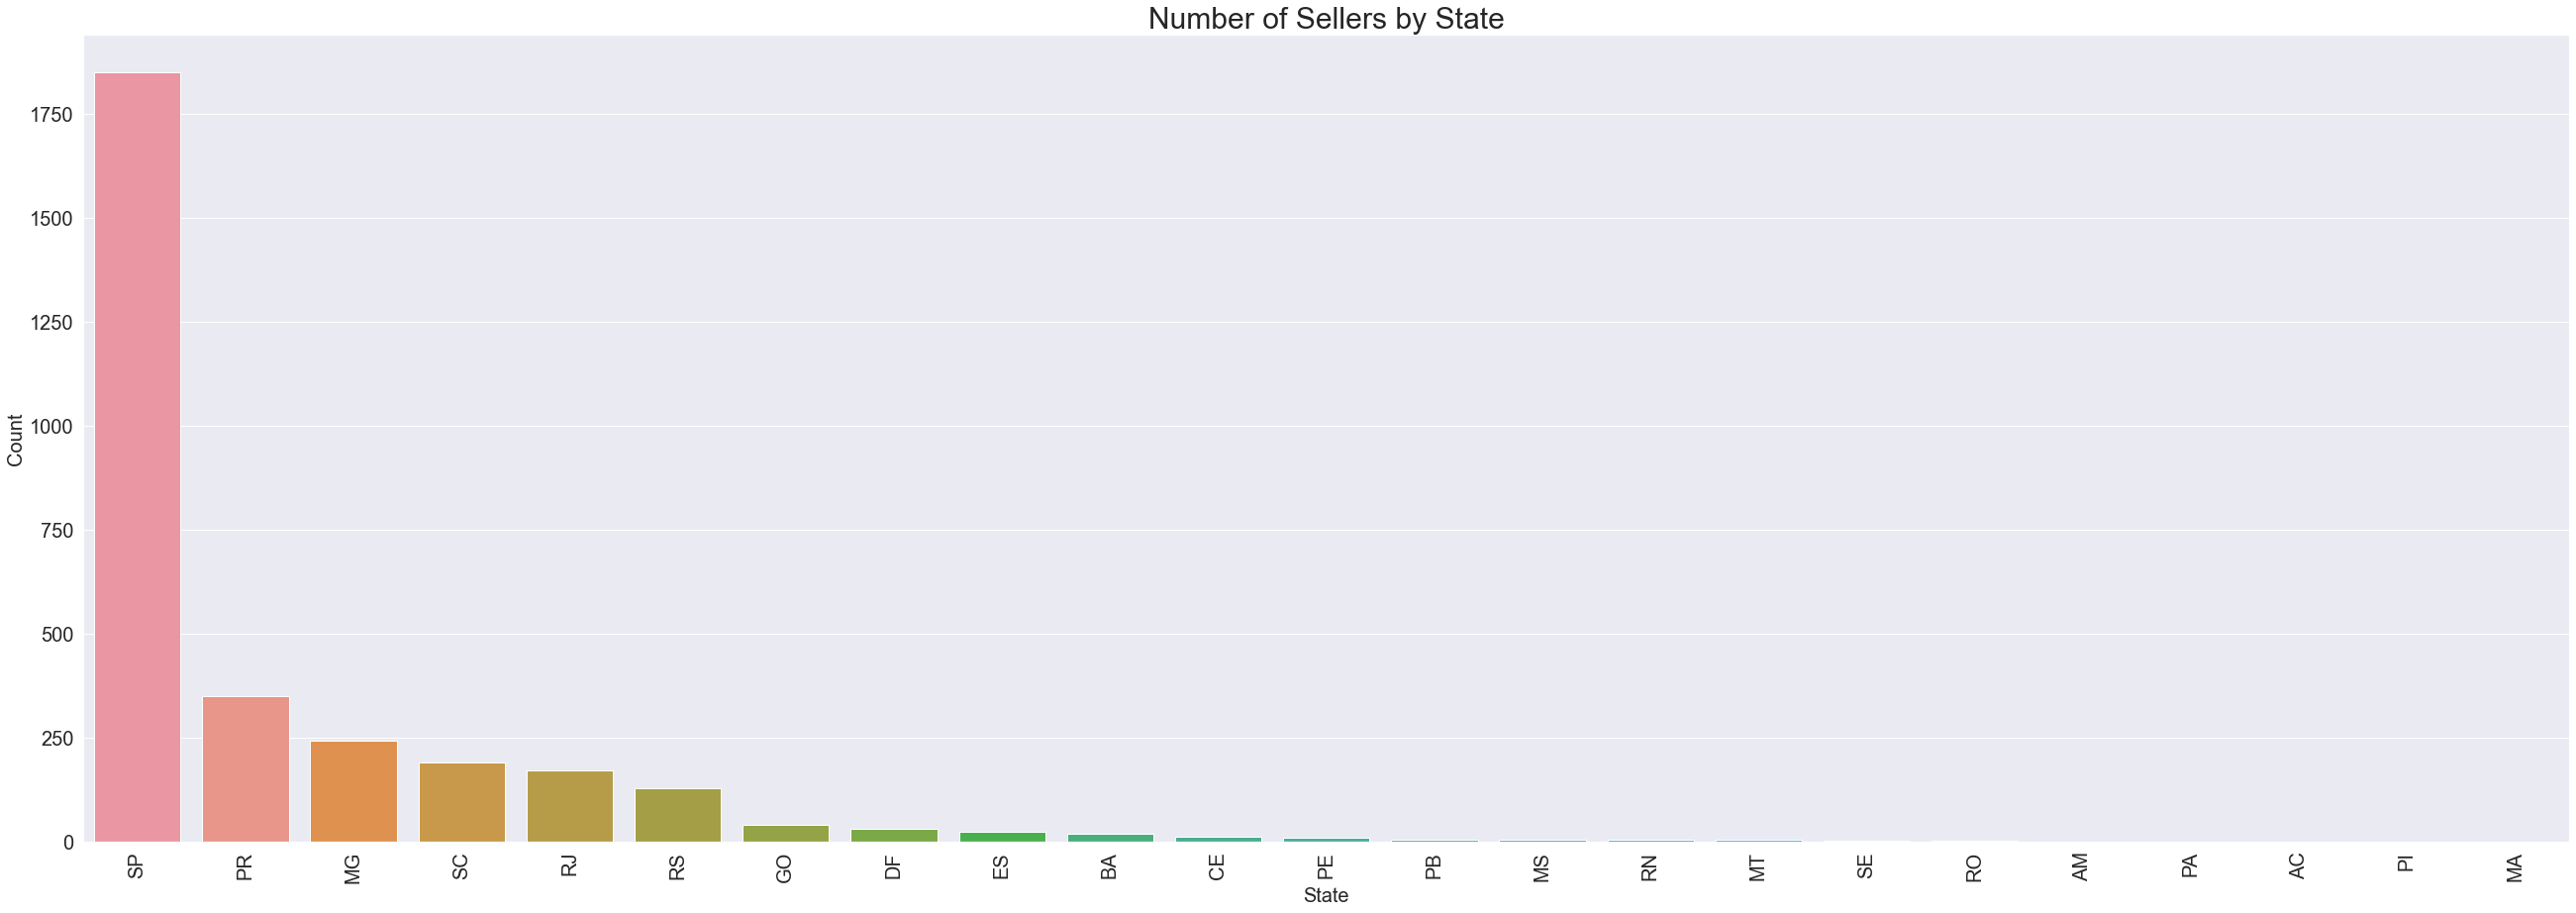

In [64]:
plt.figure(figsize=(45, 15))
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
sns.barplot(x=df_sellers['seller_state'].value_counts().index,
            y=df_sellers['seller_state'].value_counts())
plt.title('Number of Sellers by State', fontsize=30)
plt.xlabel('State', size=20)
plt.ylabel('Count', size=20)

<AxesSubplot:title={'center':'Distribution of Seller by State'}>

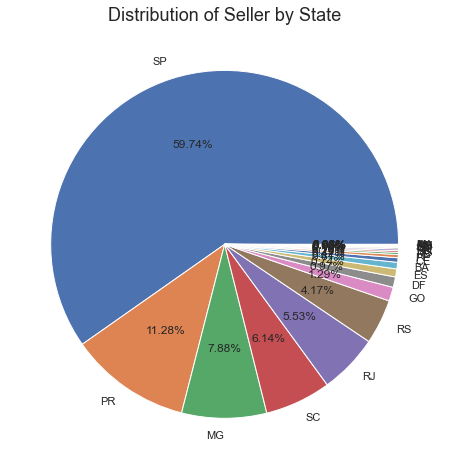

In [65]:
plt.figure()
plt.title('Distribution of Seller by State', size=18)
df_sellers['seller_state']\
    .value_counts().plot.pie(figsize=(8, 8), autopct="%1.2f%%", label='')

- There are a total of 3,095 sellers.
- The majority of sellers are from the state Sao Paulo (+1750), followed by Parana (+250), Minas Gerais (~ 250).

# 5. Cleaning<a class="anchor" id="chapter5"></a>

## 5.1. Data Merge<a class="anchor" id="section_5_1"></a>

- In this part, we will join the datasets according to the variables they have in common (order_id, customer_id, product_id, seller_id ...).

In [66]:
print('df_customers shape is', df_customers.shape)
print('df_geo shape is', df_geo.shape)
print('df_order_items shape is', df_order_items.shape)
print('df_order_payments shape is', df_order_payments.shape)
print('df_order_reviews shape is', df_order_reviews.shape)
print('df_orders shape is', df_orders.shape)
print('df_products shape is', df_products.shape)
print('df_sellers shape is', df_sellers.shape)
print('df_PCNT shape is', df_PCNT.shape)

df_customers shape is (99441, 5)
df_geo shape is (1000163, 5)
df_order_items shape is (112650, 7)
df_order_payments shape is (103886, 5)
df_order_reviews shape is (100000, 7)
df_orders shape is (99441, 8)
df_products shape is (32951, 9)
df_sellers shape is (3095, 4)
df_PCNT shape is (71, 2)


In [67]:
df_order_reviews.drop_duplicates(subset=['order_id'],
                                 keep='last', inplace=True)
df_geo.drop_duplicates(subset=['geolocation_zip_code_prefix'],
                       keep='first', inplace=True)

In [68]:
print('df_geo shape is', df_geo.shape)
print('df_order_reviews shape is', df_order_reviews.shape)

df_geo shape is (19015, 5)
df_order_reviews shape is (99441, 7)


In [69]:
df = pd.merge(df_orders, df_order_items, on='order_id', how='inner')
df = pd.merge(df, df_order_payments, on='order_id', how='inner')
df = pd.merge(df, df_order_reviews, on='order_id', how='inner')
df = pd.merge(df, df_customers, on='customer_id', how='inner')
df = pd.merge(df, df_products, on='product_id', how='left')
df = pd.merge(df, df_sellers, on='seller_id', how='left')

In [70]:
df_geo_sellers = df_geo.copy()
df_geo_customers = df_geo.copy()

In [71]:
df_geo_sellers.drop(
    columns=['geolocation_city', 'geolocation_state'], inplace=True)
df_geo_customers.drop(
    columns=['geolocation_city', 'geolocation_state'], inplace=True)

In [72]:
df_geo_sellers.rename(columns={
    'geolocation_zip_code_prefix': 'seller_zip_code_prefix',
    'geolocation_lat': 'seller_lat',
    'geolocation_lng': 'seller_lng'},
                      inplace=True)

df_geo_customers.rename(columns={
    'geolocation_zip_code_prefix': 'customer_zip_code_prefix',
    'geolocation_lat': 'customer_lat',
    'geolocation_lng': 'customer_lng'},
                        inplace=True)

In [73]:
df = pd.merge(df, df_geo_sellers, on='seller_zip_code_prefix', how='inner')
df = pd.merge(df, df_geo_customers, on='customer_zip_code_prefix', how='inner')

Dataset has  117029 rows and  43 columns
Number of non-null values by columns :
order_id                         117029
customer_id                      117029
order_status                     117029
order_purchase_timestamp         117029
order_approved_at                117014
order_delivered_carrier_date     115795
order_delivered_customer_date    114480
order_estimated_delivery_date    117029
order_item_id                    117029
product_id                       117029
seller_id                        117029
shipping_limit_date              117029
price                            117029
freight_value                    117029
payment_sequential               117029
payment_type                     117029
payment_installments             117029
payment_value                    117029
review_id                        117029
review_score                     117029
review_comment_title              14002
review_comment_message            50175
review_creation_date             117029


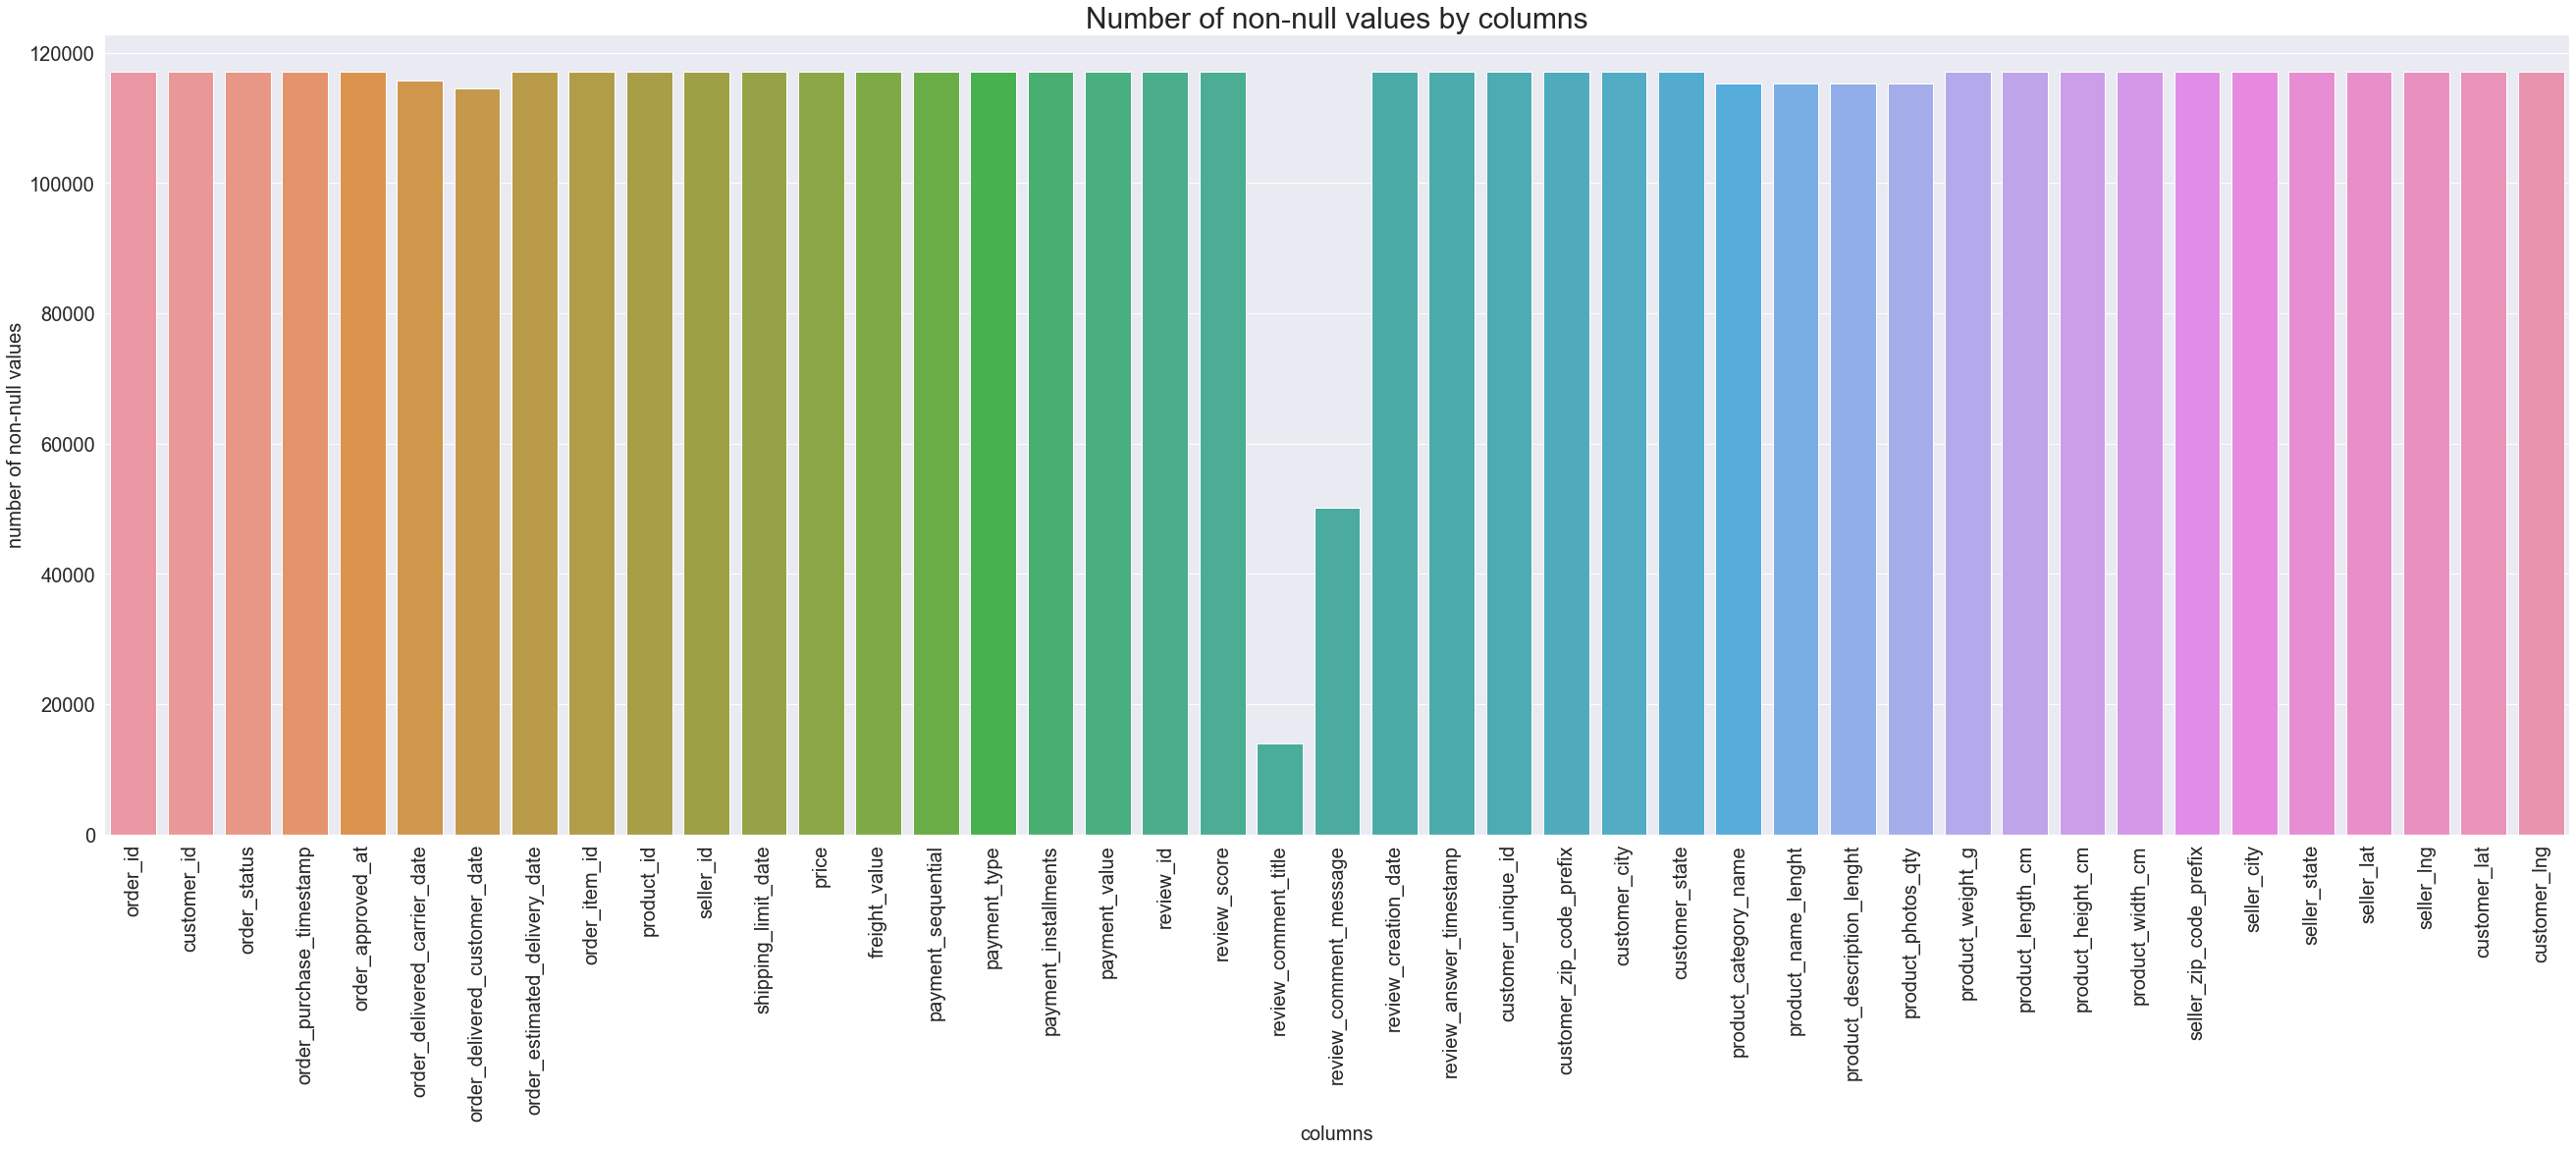

In [74]:
DataSetsExplo(df)

- After joining the datasets, we get a dataset of 117,029 rows and 43 columns.

## 5.2. Missing Values<a class="anchor" id="section_5_2"></a>

- In this part, I fill empty product_category_name with 'no_information' and fill missing values in the product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_lenght_cm, product_height_cm and product_width_cm variables by their respective average.

In [75]:
columns_to_fill = ['product_name_lenght',
                   'product_description_lenght',
                   'product_photos_qty',
                   'product_weight_g',
                   'product_length_cm',
                   'product_height_cm',
                   'product_width_cm']

In [76]:
df['product_category_name'] = df['product_category_name']\
    .fillna('no_information')

In [77]:
df[columns_to_fill] = SimpleImputer(
    missing_values=np.nan, strategy='mean').fit_transform(df[columns_to_fill])

Dataset has  117029 rows and  43 columns
Number of non-null values by columns :
order_id                         117029
customer_id                      117029
order_status                     117029
order_purchase_timestamp         117029
order_approved_at                117014
order_delivered_carrier_date     115795
order_delivered_customer_date    114480
order_estimated_delivery_date    117029
order_item_id                    117029
product_id                       117029
seller_id                        117029
shipping_limit_date              117029
price                            117029
freight_value                    117029
payment_sequential               117029
payment_type                     117029
payment_installments             117029
payment_value                    117029
review_id                        117029
review_score                     117029
review_comment_title              14002
review_comment_message            50175
review_creation_date             117029


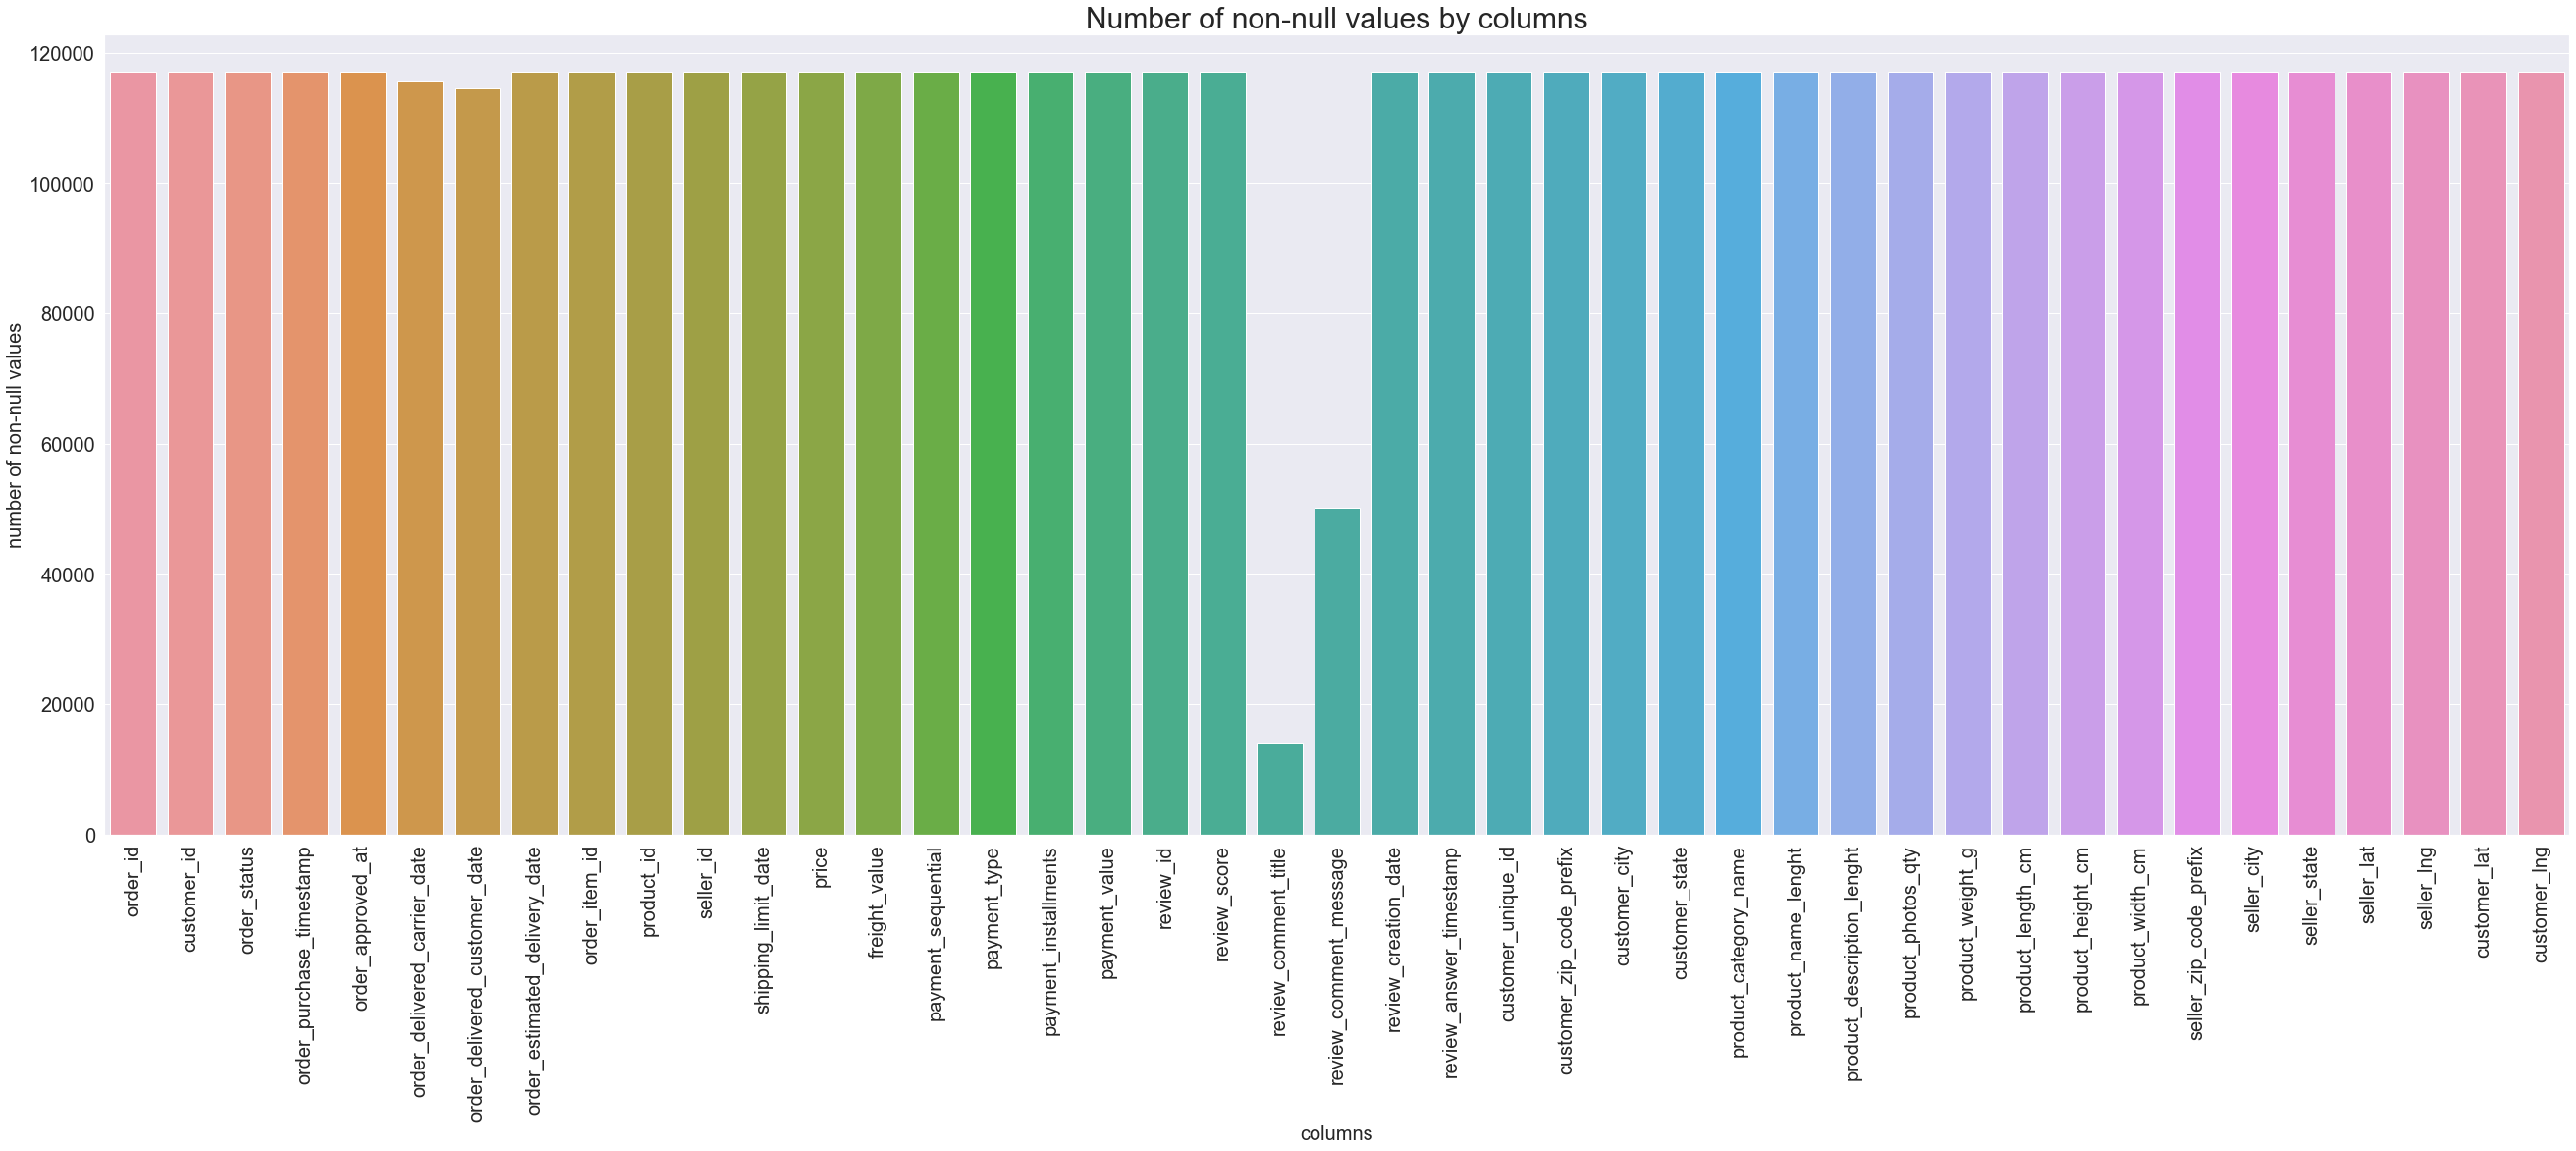

In [78]:
DataSetsExplo(df)

# 5.3. Outliers<a class="anchor" id="section_5_3"></a>

- In this section, I remove outliers in datetime type variables.

In [79]:
columns = ['order_purchase_timestamp',
           'order_approved_at',
           'order_delivered_carrier_date',
           'order_delivered_customer_date',
           'order_estimated_delivery_date']

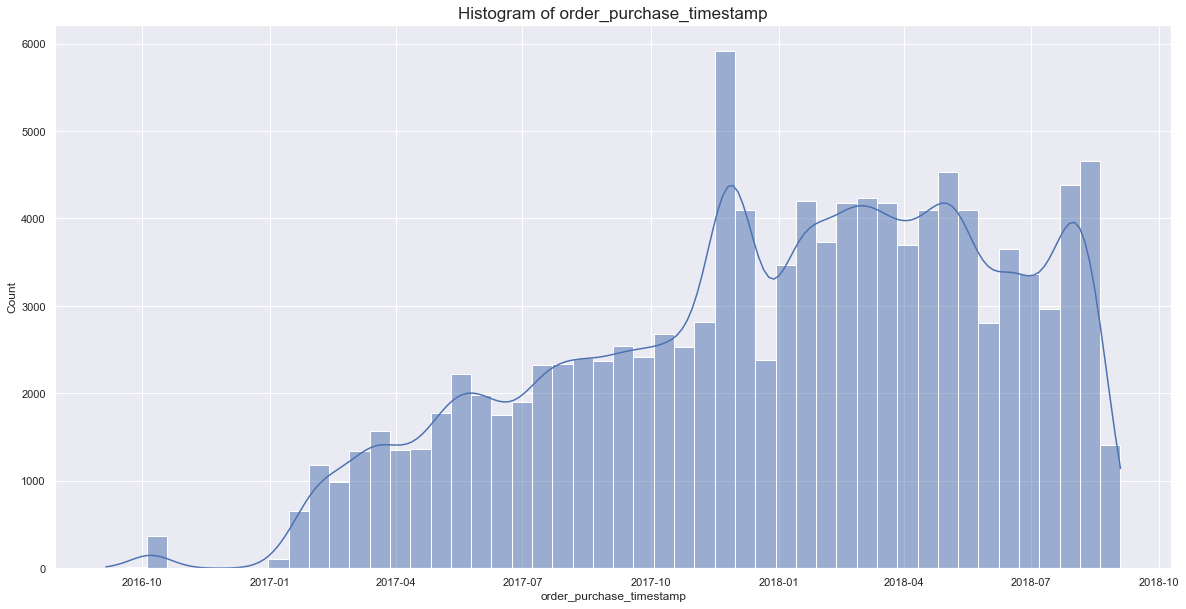

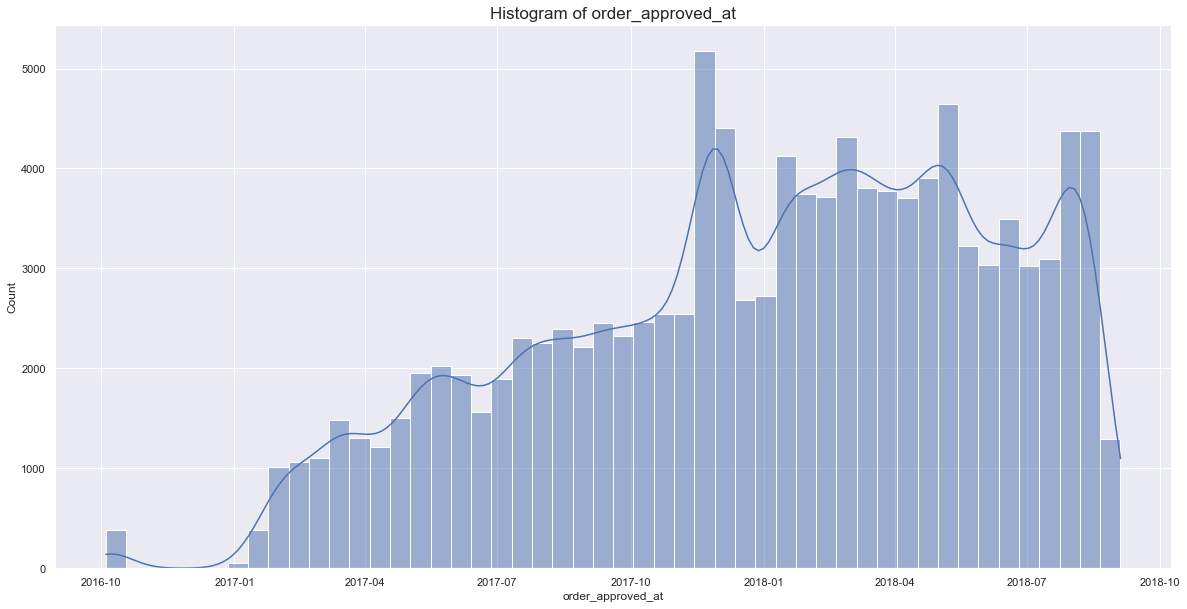

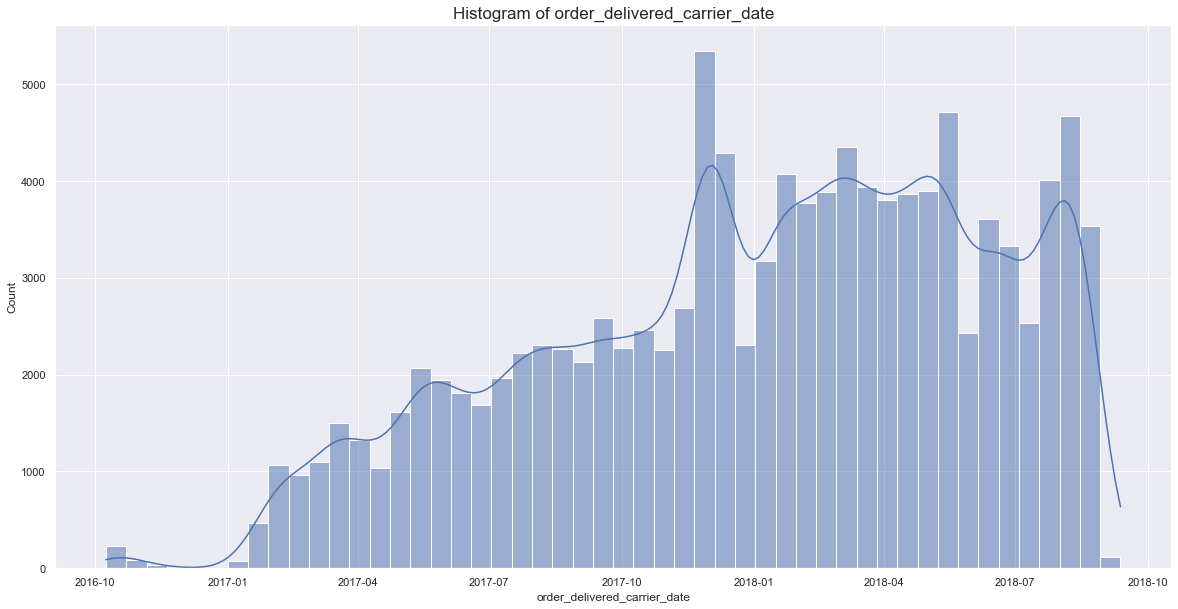

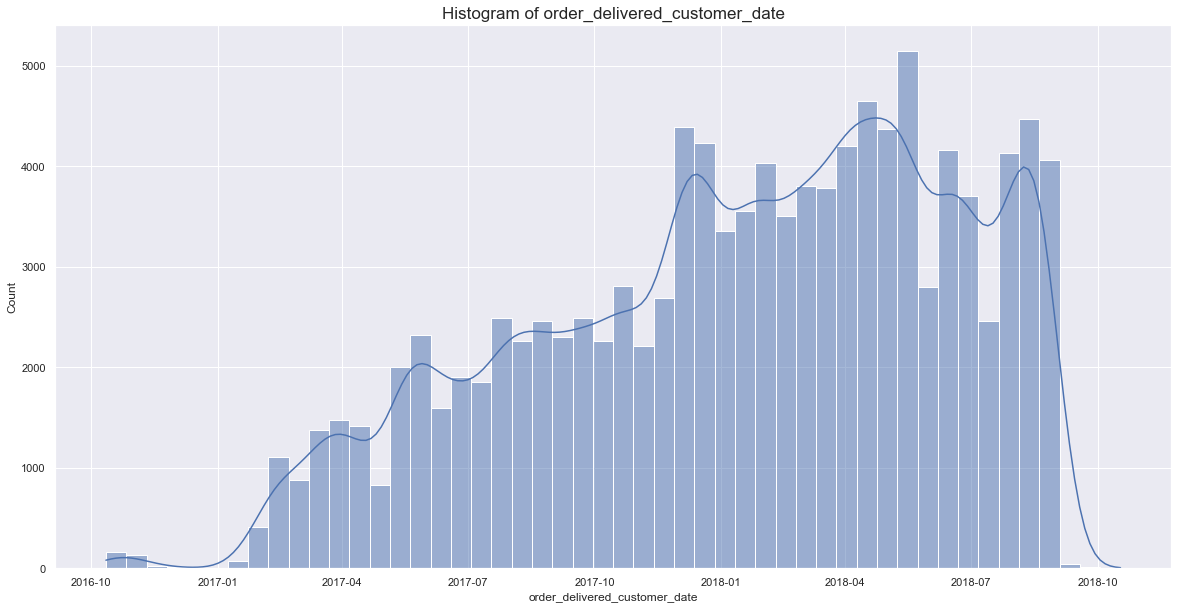

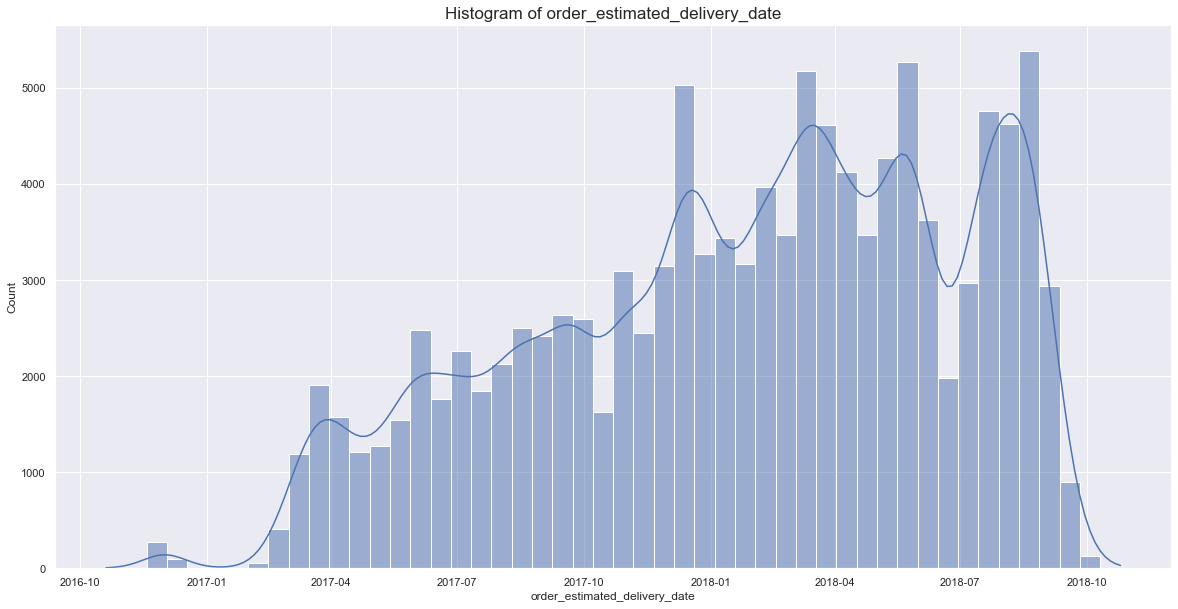

In [80]:
for col in columns:
    plt.figure(figsize=(20, 10))
    plt.title('Histogram of ' + col, size=17)
    plt.xlabel(col, size=12)
    sns.histplot(df[col], bins=50, kde=True)

In [81]:
for col in columns:
    qa = df[col].quantile(0.001)
    df = df[(df[col] >= qa)]
    df.reset_index(inplace=True, drop=True)

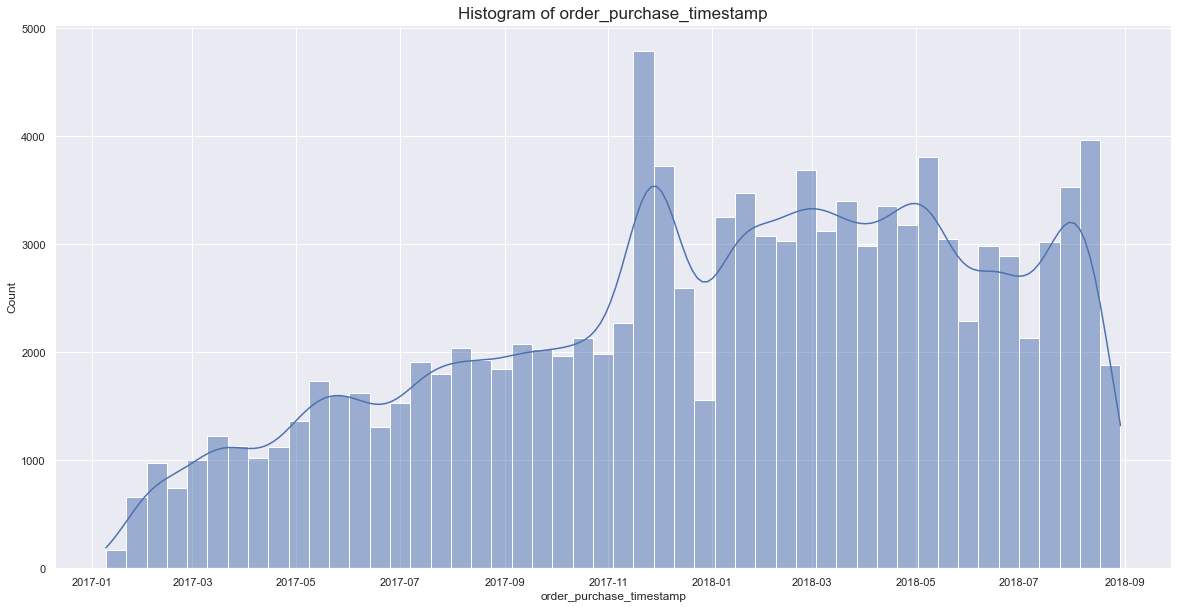

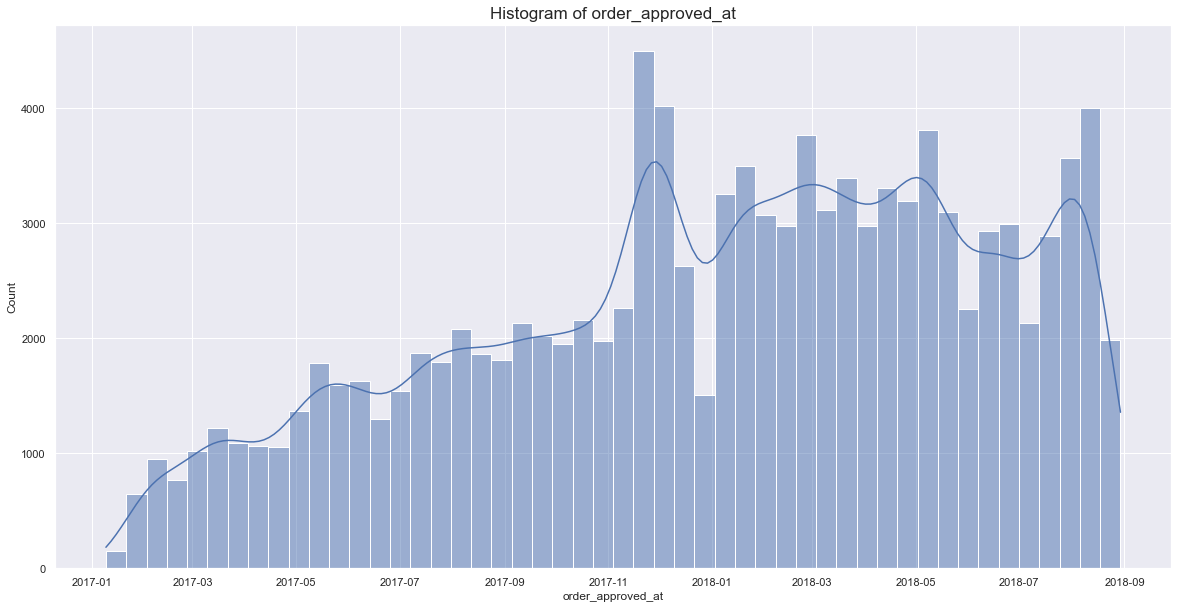

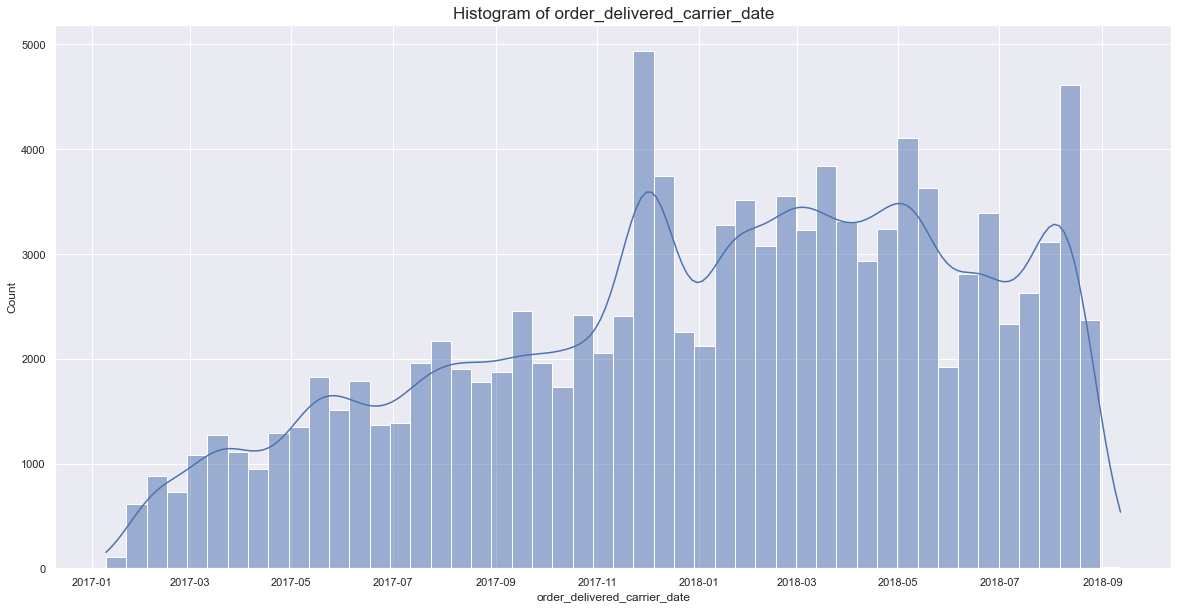

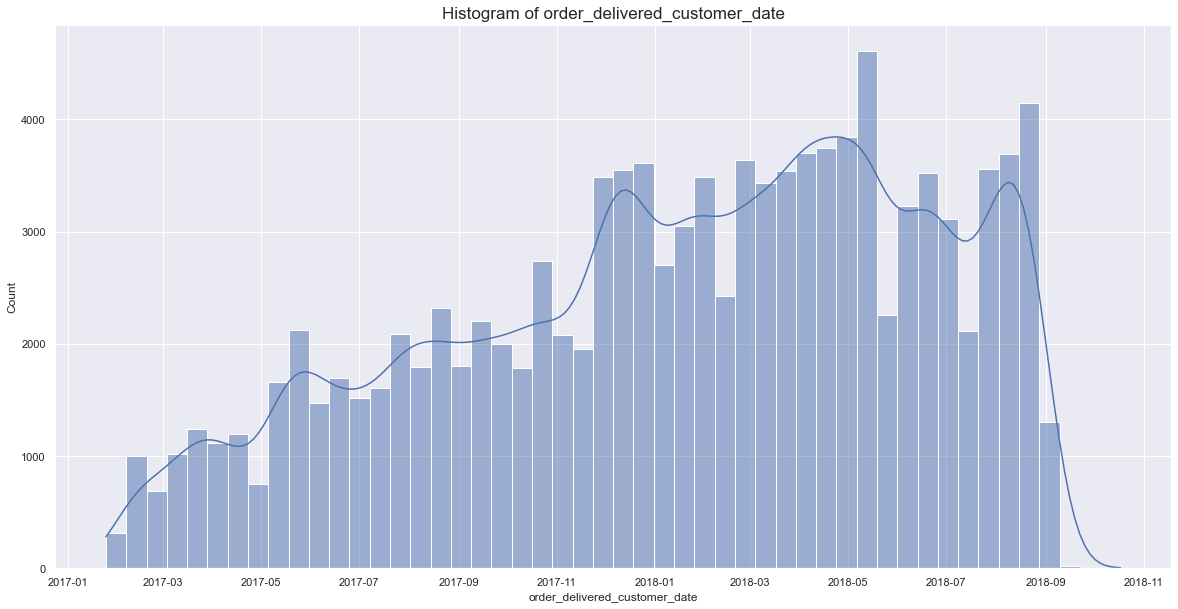

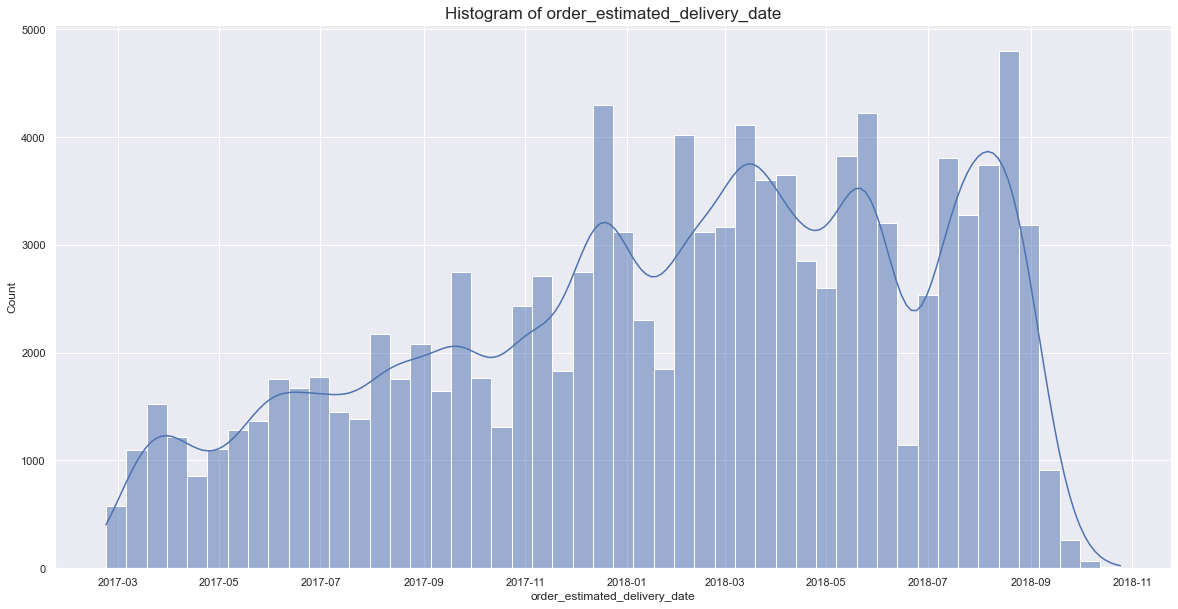

In [82]:
for col in columns:
    plt.figure(figsize=(20, 10))
    plt.title('Histogram of ' + col, size=17)
    plt.xlabel(col, size=12)
    sns.histplot(df[col], bins=50, kde=True)

Dataset has  113938 rows and  43 columns
Number of non-null values by columns :
order_id                         113938
customer_id                      113938
order_status                     113938
order_purchase_timestamp         113938
order_approved_at                113938
order_delivered_carrier_date     113938
order_delivered_customer_date    113938
order_estimated_delivery_date    113938
order_item_id                    113938
product_id                       113938
seller_id                        113938
shipping_limit_date              113938
price                            113938
freight_value                    113938
payment_sequential               113938
payment_type                     113938
payment_installments             113938
payment_value                    113938
review_id                        113938
review_score                     113938
review_comment_title              13661
review_comment_message            48133
review_creation_date             113938


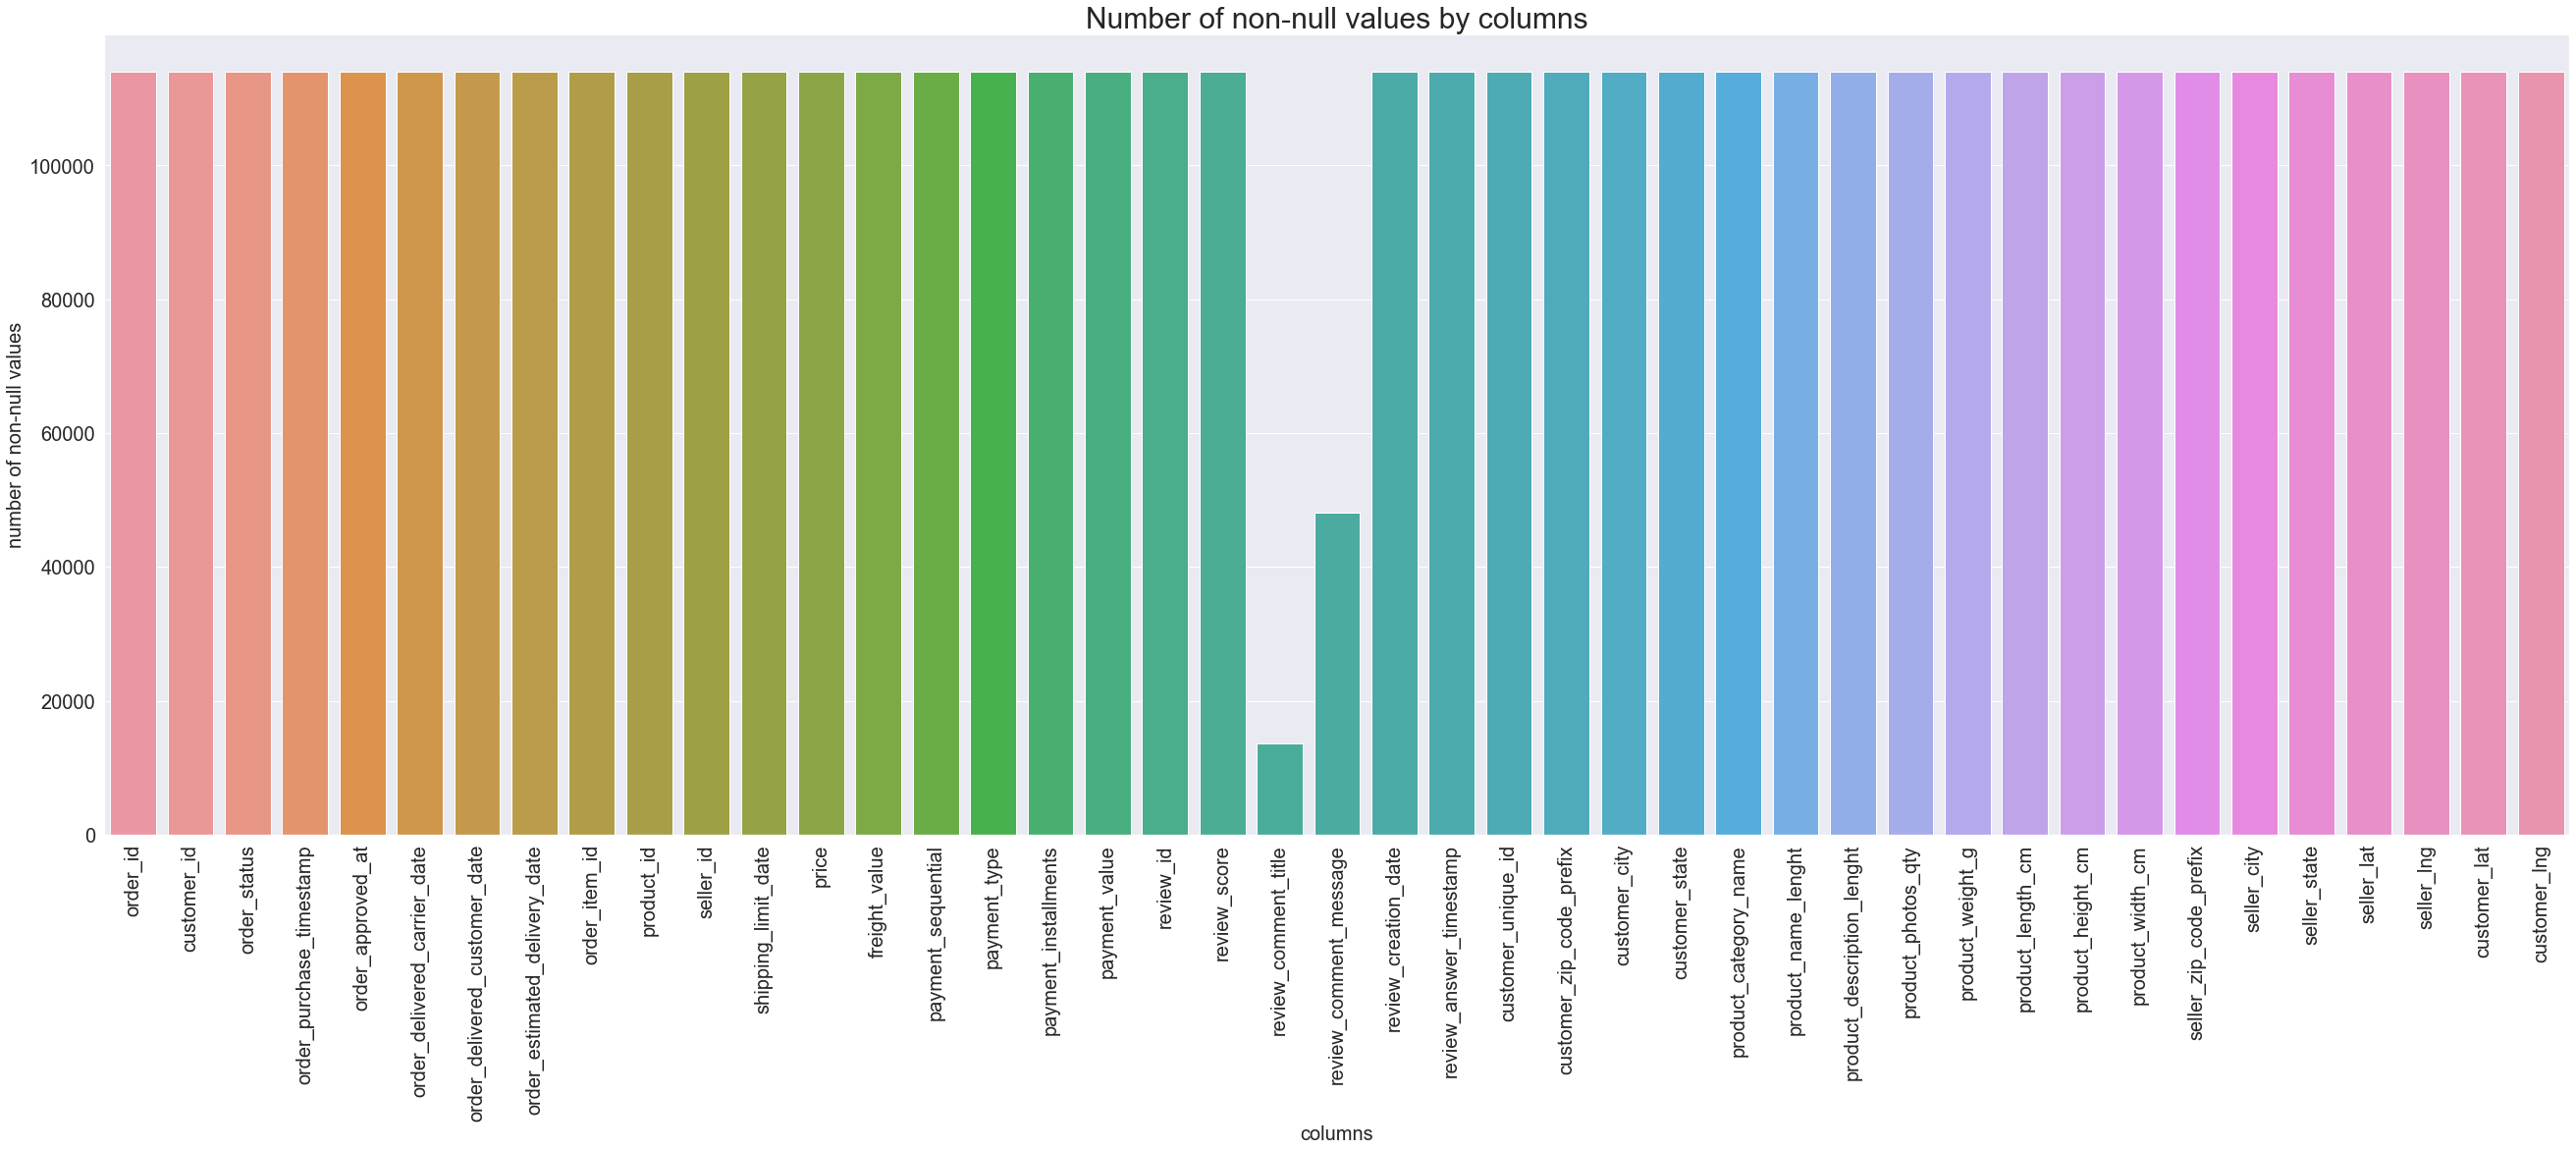

In [83]:
DataSetsExplo(df)

- After these cleanings, we have a dataset of 113,938 rows and 43 columns.

# 6. Feature Engineering<a class="anchor" id="chapter6"></a>

## 6.1. Distance Customers/Sellers<a class="anchor" id="section_6_1"></a>

- Creation of a variable containing the distance in kilometers between the customer and the seller.

In [84]:
def haversine(lat_c, lng_c, lat_s, lng_s):
    R = 6372.8
    dLat = radians(lat_s - lat_c)
    dLng = radians(lng_s - lng_c)
    lat_c = radians(lat_c)
    lat_s = radians(lat_s)
    a = sin(dLat/2)**2 + cos(lat_c) * cos(lat_s) * sin(dLng/2)**2
    c = 2 * asin(sqrt(a))
    return R * c

In [85]:
distance = []

In [86]:
for i in range(df.shape[0]):
    distance.append(haversine(df['customer_lat'][i],
                              df['customer_lng'][i],
                              df['seller_lat'][i],
                              df['seller_lng'][i]))

In [87]:
df_distance = pd.DataFrame(distance, columns=['distance_seller_customer'])

In [88]:
df = pd.concat([df, df_distance], axis=1)

## 6.2. Estimate Delivery Time<a class="anchor" id="section_6_2"></a>

- Creation of a variable containing the estimated delivery time in days.

In [89]:
df['estimate_delivery_time'] = df['order_estimated_delivery_date'] \
    - df['order_purchase_timestamp']

In [90]:
df['estimate_delivery_time'] = \
    df['estimate_delivery_time'].dt.total_seconds() / 86400

## 6.3. Delivery Time<a class="anchor" id="section_6_3"></a>

- Creation of a variable containing the actual delivery time in day.

In [91]:
df['delivery_time'] = df['order_delivered_customer_date'] \
    - df['order_purchase_timestamp']

In [92]:
df['delivery_time'] = \
    df['delivery_time'].dt.total_seconds() / 86400

## 6.4. Review Score Mean per Seller<a class="anchor" id="section_6_4"></a>

- Creation of a variable containing the average of the scores of each seller.

In [93]:
df['seller_mean_review_score'] = \
    df.groupby('seller_id')['review_score'].transform('mean')

## 6.5. Year, Month, Day, Hour of Purchase<a class="anchor" id="section_6_5"></a>

- Creation of variables 'purchase_year', 'purchase_month', 'purchase_day', 'purchase_weekday', 'purchase_hour'.

In [94]:
data_year = pd.DatetimeIndex(df['order_purchase_timestamp']).year.tolist()
data_month = pd.DatetimeIndex(df['order_purchase_timestamp']).month.tolist()
data_day = pd.DatetimeIndex(df['order_purchase_timestamp']).day.tolist()
data_wday = pd.DatetimeIndex(df['order_purchase_timestamp']).weekday.tolist()
data_hour = pd.DatetimeIndex(df['order_purchase_timestamp']).hour.tolist()

In [95]:
data_year = pd.DataFrame(data_year, columns=['purchase_year'])
data_month = pd.DataFrame(data_month, columns=['purchase_month'])
data_day = pd.DataFrame(data_day, columns=['purchase_day'])
data_weekday = pd.DataFrame(data_wday, columns=['purchase_weekday'])
data_hour = pd.DataFrame(data_hour, columns=['purchase_hour'])

In [96]:
data_month['purchase_month'] =\
    data_month['purchase_month'].replace([1, 2, 3, 4,
                                          5, 6, 7, 8,
                                          9, 10, 11, 12],
                                         ['jan', 'feb', 'mar', 'apr',
                                          'may', 'jun', 'jul', 'agu',
                                          'sep', 'oct', 'nov', 'dec'])
data_weekday['purchase_weekday'] =\
    data_weekday['purchase_weekday'].replace([0, 1, 2, 3, 4, 5, 6],
                                             ['mon', 'tue', 'wed', 'thu',
                                              'fri', 'sat', 'sun'])

In [97]:
df = pd.concat([df, data_year], axis=1)
df = pd.concat([df, data_month], axis=1)
df = pd.concat([df, data_day], axis=1)
df = pd.concat([df, data_weekday], axis=1)
df = pd.concat([df, data_hour], axis=1)

## 6.6. Number of Orders by Unique customers<a class="anchor" id="section_6_6"></a>

- Creation of a variable containing the number of orders made by each customer.

In [98]:
df['nb_orders_customers'] = \
    df.groupby('customer_unique_id')['order_id'].transform('nunique')

## 6.7. Total Price<a class="anchor" id="section_6_7"></a>

- Creation of a variable containing the sum of the price and the freight of the product.

In [99]:
df['total_price'] = df['price'] + df['freight_value']

## 6.8. Payment Type<a class="anchor" id="section_6_8"></a>

- Transformation of the payment_type variable into a binary type variable (possible values: credit_card or other).

In [100]:
df.loc[~df['payment_type'].isin(['credit_card']), 'payment_type'] = 'other'

## 6.9. Order Status<a class="anchor" id="section_6_9"></a>

- Transformation of the order_status variable into a binary type variable (possible values: delivered or not_delivered).

In [101]:
df.loc[~df['order_status'].isin(['delivered']), 'order_status'] =\
    'not_delivered'

In [102]:
df['order_status'].value_counts()

delivered        113937
not_delivered         1
Name: order_status, dtype: int64

## 6.10. Product Volume<a class="anchor" id="section_6_10"></a>

- Creation of a variable containing the volume of the product.

In [103]:
df['product_volume_cm3'] = df['product_length_cm'] * \
    df['product_height_cm'] * \
    df['product_width_cm']

## 6.11. Reviews<a class="anchor" id="section_6_11"></a>

- Transformation of the review_comment_title and review_comment_message variables into binary type variables (possible values: with_comment_title, without_comment_title and with_comment_message, without_comment_message).

In [104]:
df.loc[~df['review_comment_title'].isna(), 'review_comment_title'] =\
    'with_comment_title'
df.loc[df['review_comment_title'].isna(), 'review_comment_title'] =\
    'without_comment_title'

In [105]:
df.loc[~df['review_comment_message'].isna(), 'review_comment_message'] =\
    'with_comment_message'
df.loc[df['review_comment_message'].isna(), 'review_comment_message'] =\
    'without_comment_message'

Dataset has  113938 rows and  55 columns
Number of non-null values by columns :
order_id                         113938
customer_id                      113938
order_status                     113938
order_purchase_timestamp         113938
order_approved_at                113938
order_delivered_carrier_date     113938
order_delivered_customer_date    113938
order_estimated_delivery_date    113938
order_item_id                    113938
product_id                       113938
seller_id                        113938
shipping_limit_date              113938
price                            113938
freight_value                    113938
payment_sequential               113938
payment_type                     113938
payment_installments             113938
payment_value                    113938
review_id                        113938
review_score                     113938
review_comment_title             113938
review_comment_message           113938
review_creation_date             113938


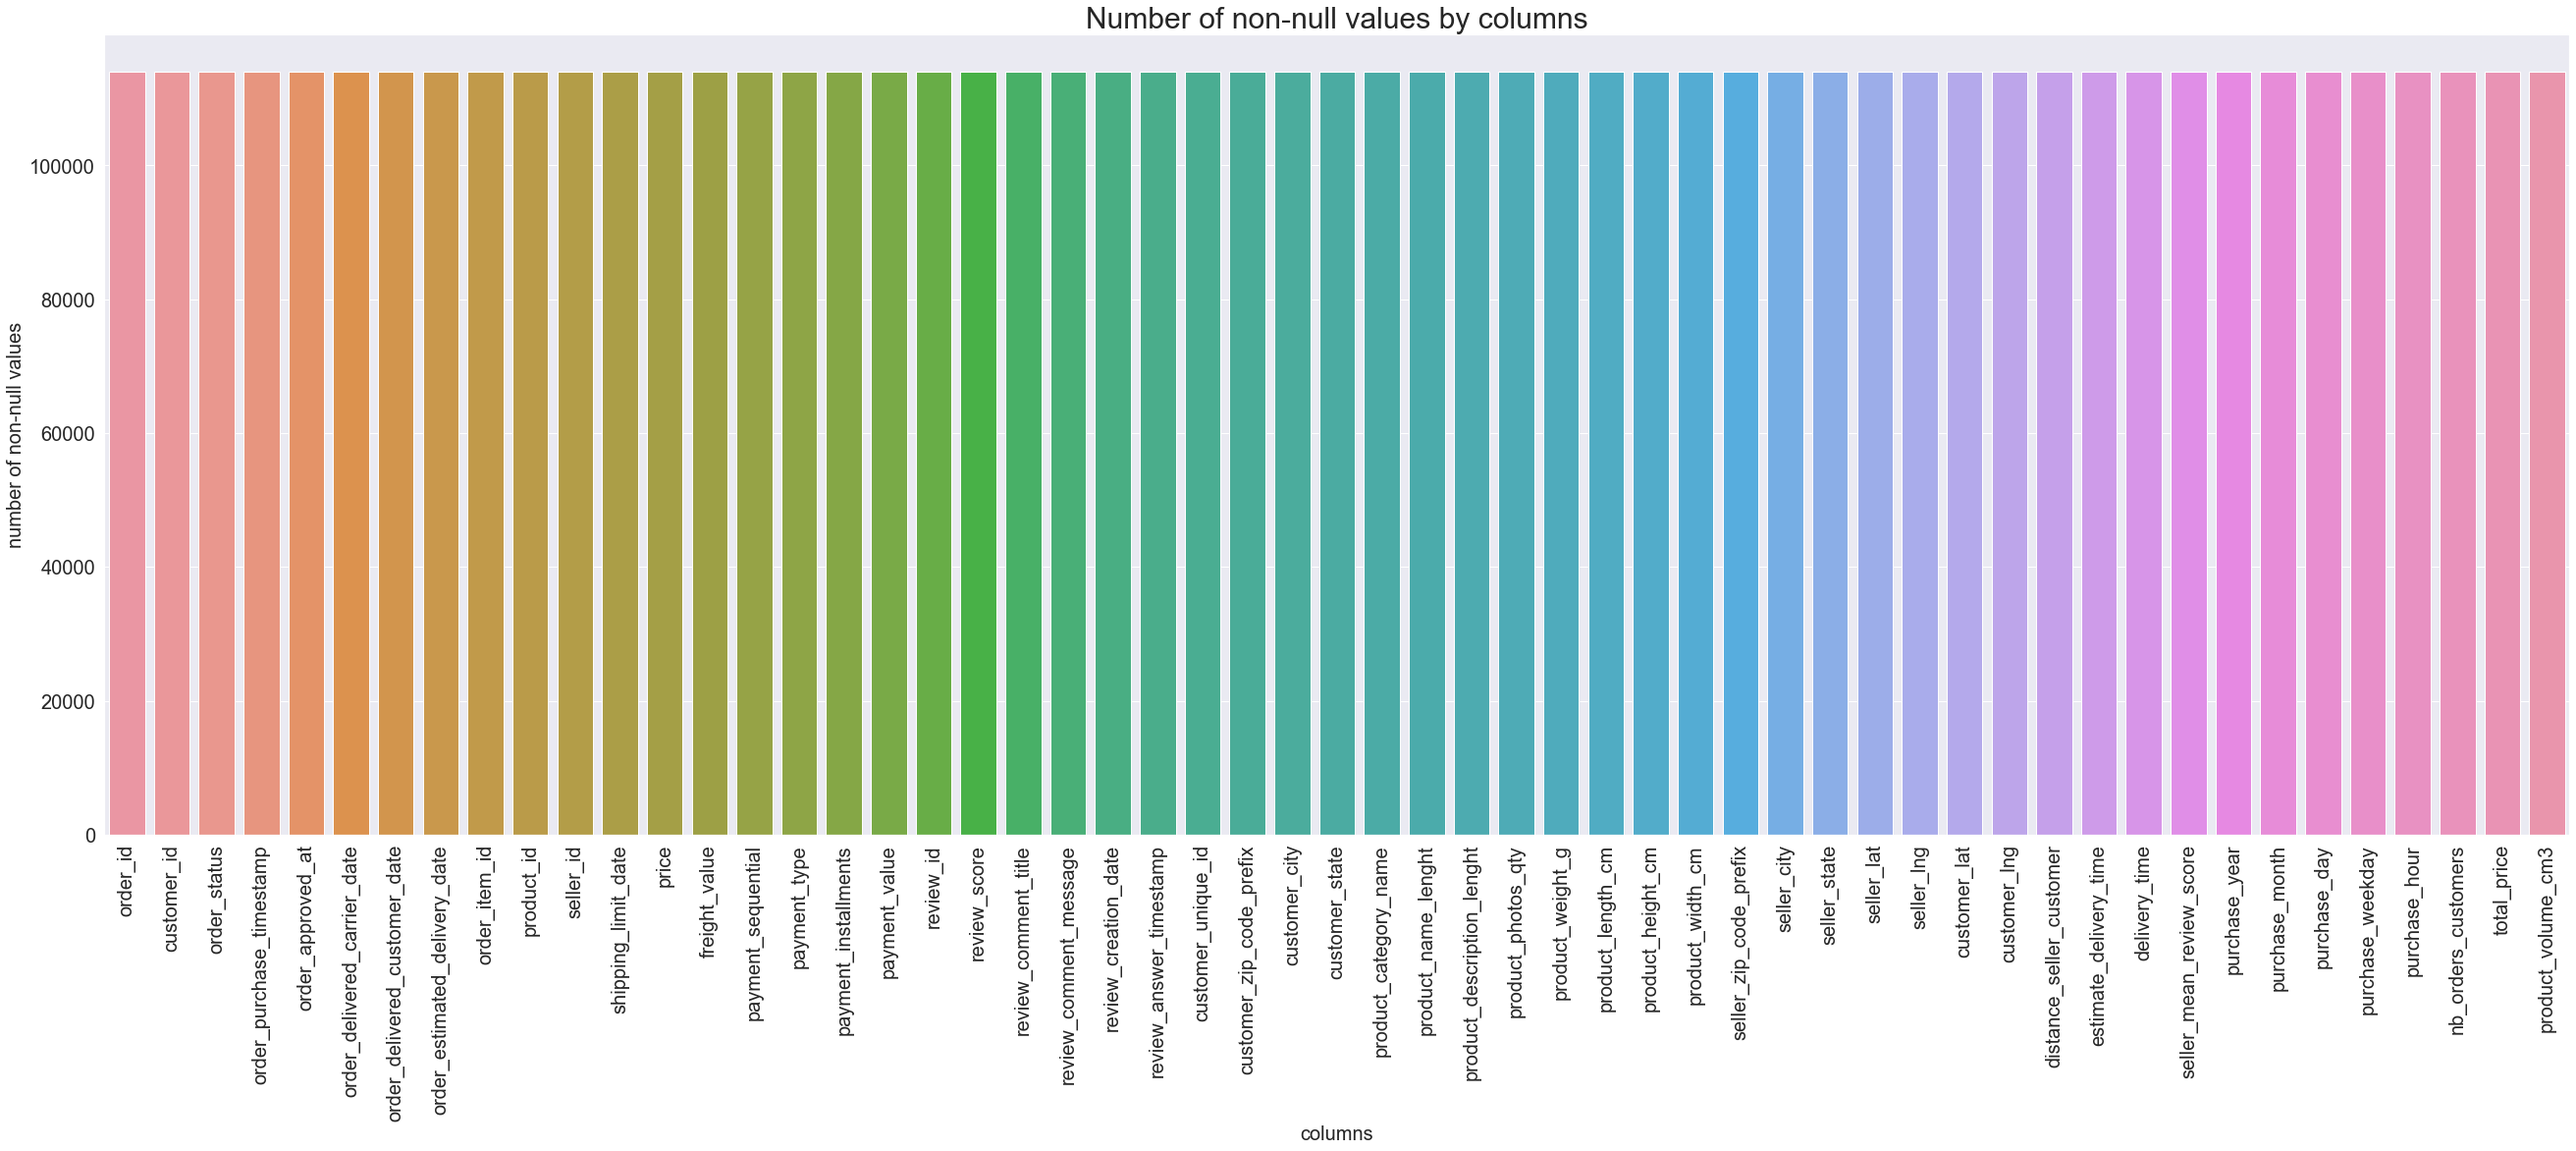

In [106]:
DataSetsExplo(df)

- After this part of feature engineering, the dataset has 113,928 rows and 55 columns.

# 7. Exploration<a class="anchor" id="chapter7"></a>

## 7.1. payment_value / price + freight_value<a class="anchor" id="section_7_1"></a>

<AxesSubplot:title={'center':'Pearson correlation'}>

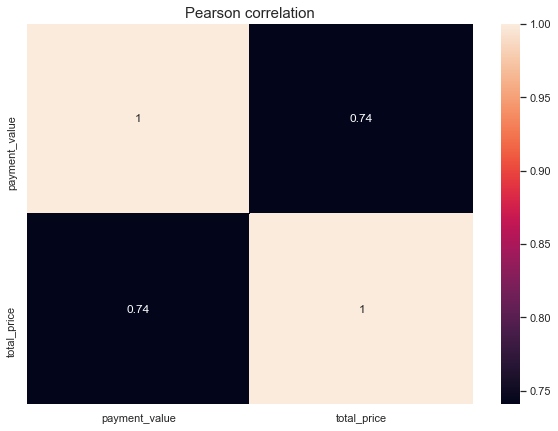

In [107]:
plt.figure(figsize=(10, 7))
plt.title('Pearson correlation', size=15)
sns.heatmap(df[['payment_value', 'total_price']].corr(method='pearson'),
            annot=True)

<AxesSubplot:title={'center':'Spearman correlation'}>

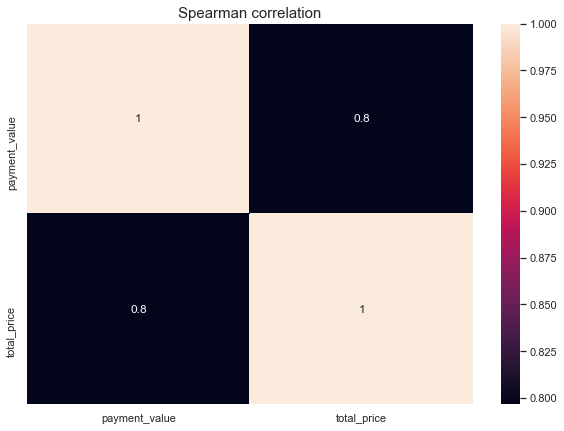

In [108]:
plt.figure(figsize=(10, 7))
plt.title('Spearman correlation', size=15)
sns.heatmap(df[['payment_value', 'total_price']].corr(method='spearman'),
            annot=True)

In [109]:
df[['payment_value', 'total_price']]

payment_value  total_price
0               18.12        38.71
1                2.00        38.71
2               18.59        38.71
3              223.38       111.69
4              223.38       111.69
...               ...          ...
113933          69.86       129.86
113934          20.00       129.86
113935        1323.79      1323.79
113936         258.56       258.56
113937         185.88       185.88

[113938 rows x 2 columns]

- We can see that the total_price is correlated with payment_value. Differences in some values come from 'duplicate' rows due to a payment_sequential greater than 1.

## 7.2. Estimate Delivery Time / Delivery Time<a class="anchor" id="section_7_2"></a>

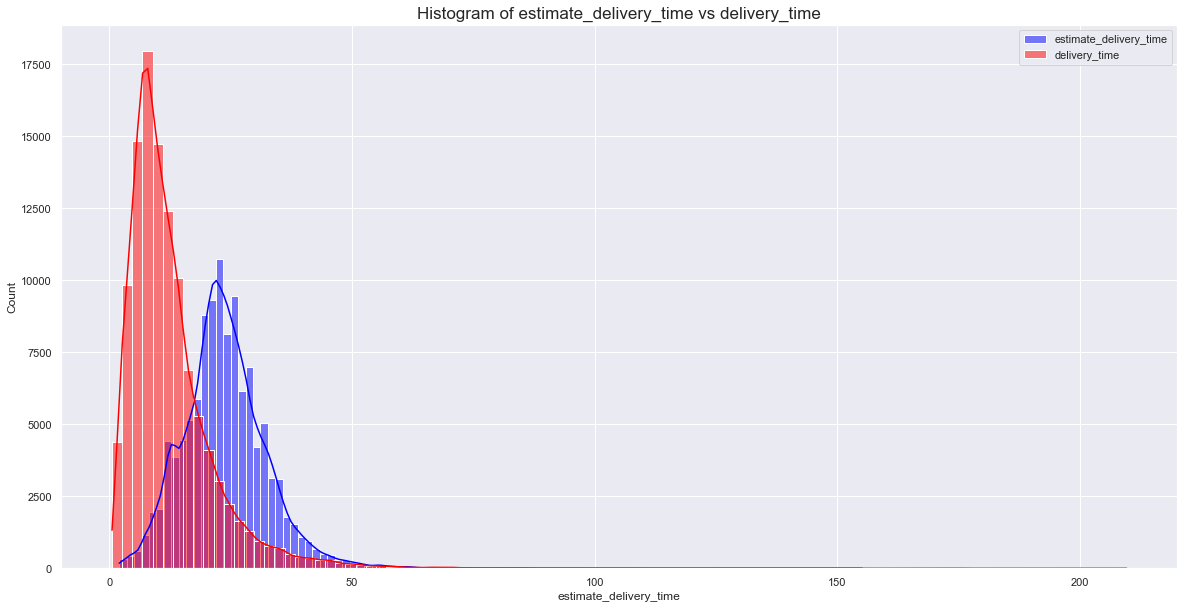

In [110]:
plt.figure(figsize=(20, 10))
plt.title('Histogram of estimate_delivery_time vs delivery_time', size=17)

sns.histplot(data=df, x='estimate_delivery_time', color='blue',
             label='estimate_delivery_time', kde=True, bins=100)
sns.histplot(data=df, x='delivery_time', color='red',
             label='delivery_time', kde=True, bins=100)

plt.legend()
plt.show()

- In most cases, the actual delivery time is shorter than the estimated delivery time.

## 7.3. Geography<a class="anchor" id="section_7_3"></a>

In [111]:
df_freight_ratio = df.groupby('order_id').agg(
    {'price': 'sum', 'freight_value': 'sum'})

In [112]:
df_freight_ratio['freight_ratio'] =\
    df_freight_ratio['freight_value'] / df_freight_ratio['price']

In [113]:
df_freight_ratio.drop(columns=['price', 'freight_value'], inplace=True)

In [114]:
df_freight_ratio.reset_index(inplace=True)

In [115]:
df = pd.merge(df, df_freight_ratio, on='order_id', how='left')

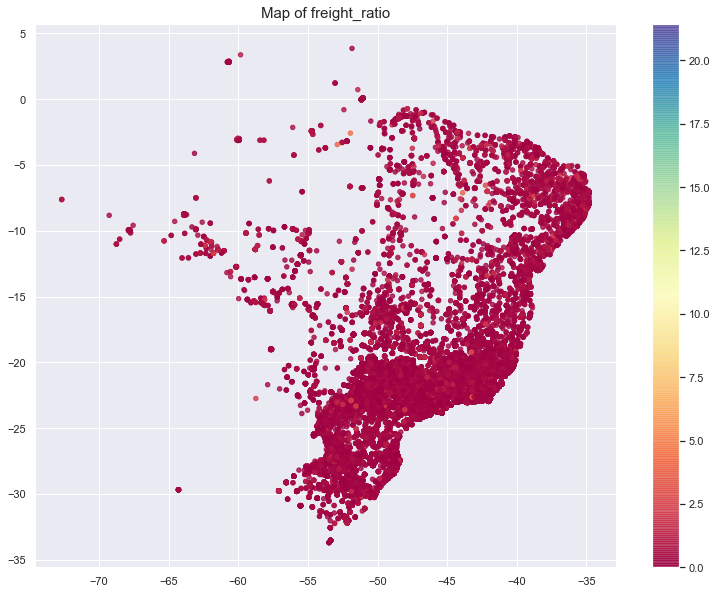

In [116]:
plt.figure(figsize=(13, 10))
plt.title('Map of freight_ratio', size=15)
plt.scatter(df['customer_lng'],
            df['customer_lat'],
            alpha=.8,
            c=df['freight_ratio'],
            cmap='Spectral',
            s=20)
cbar = plt.colorbar()

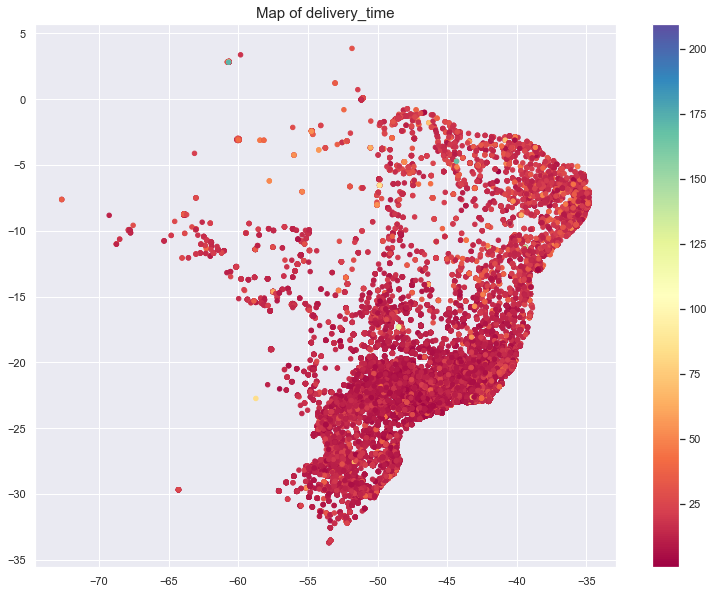

In [117]:
plt.figure(figsize=(13, 10))
plt.title('Map of delivery_time', size=15)
plt.scatter(df['customer_lng'],
            df['customer_lat'],
            alpha=1,
            c=df['delivery_time'],
            cmap='Spectral',
            s=20)
cbar = plt.colorbar()

(-35.0, 5.0)

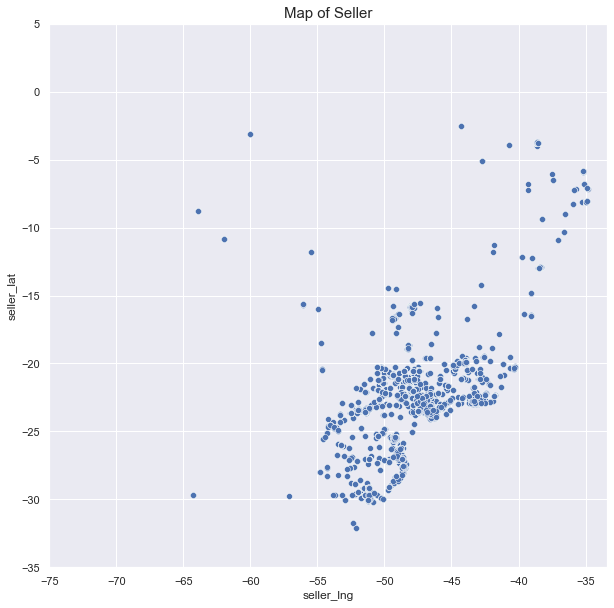

In [118]:
plt.figure(figsize=(10, 10))
plt.title('Map of Seller', size=15)
scatter = sns.scatterplot(data=df, x='seller_lng',
                          y='seller_lat')
scatter.set_xlim(left=-75)
scatter.set_ylim(bottom=-35, top=5)

Text(0, 0.5, 'Count')

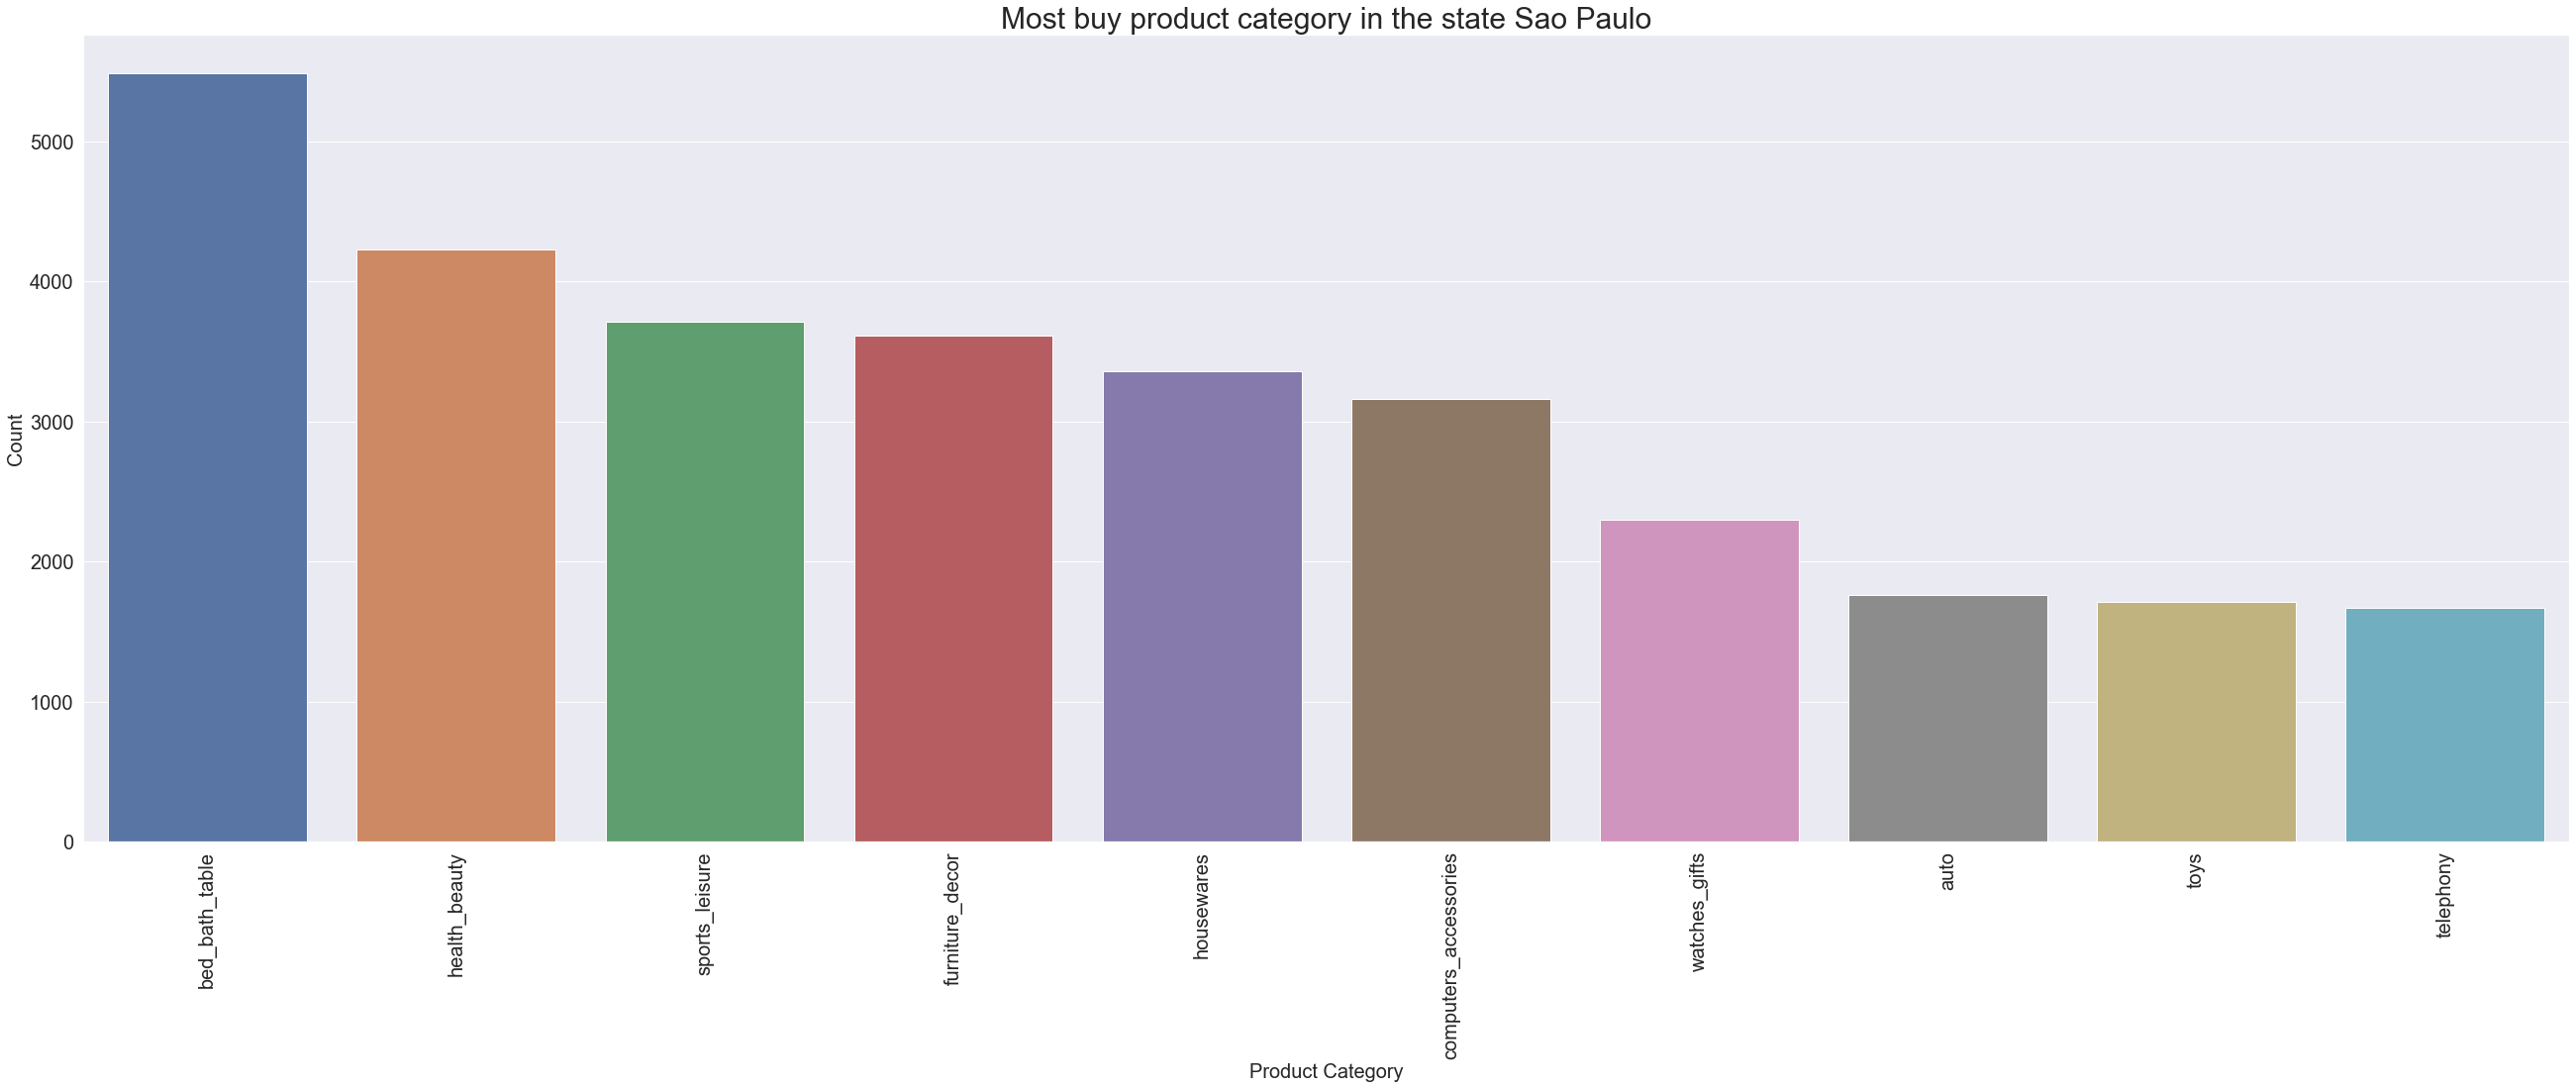

In [119]:
plt.figure(figsize=(45, 15))
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
sns.barplot(x=df[df['customer_state'] == 'SP']['product_category_name']
            .value_counts()[:10].index,
            y=df[df['customer_state'] == 'SP']['product_category_name']
            .value_counts()[:10])
plt.title('Most buy product category in the state Sao Paulo', fontsize=30)
plt.xlabel('Product Category', size=20)
plt.ylabel('Count', size=20)

Text(0, 0.5, 'Count')

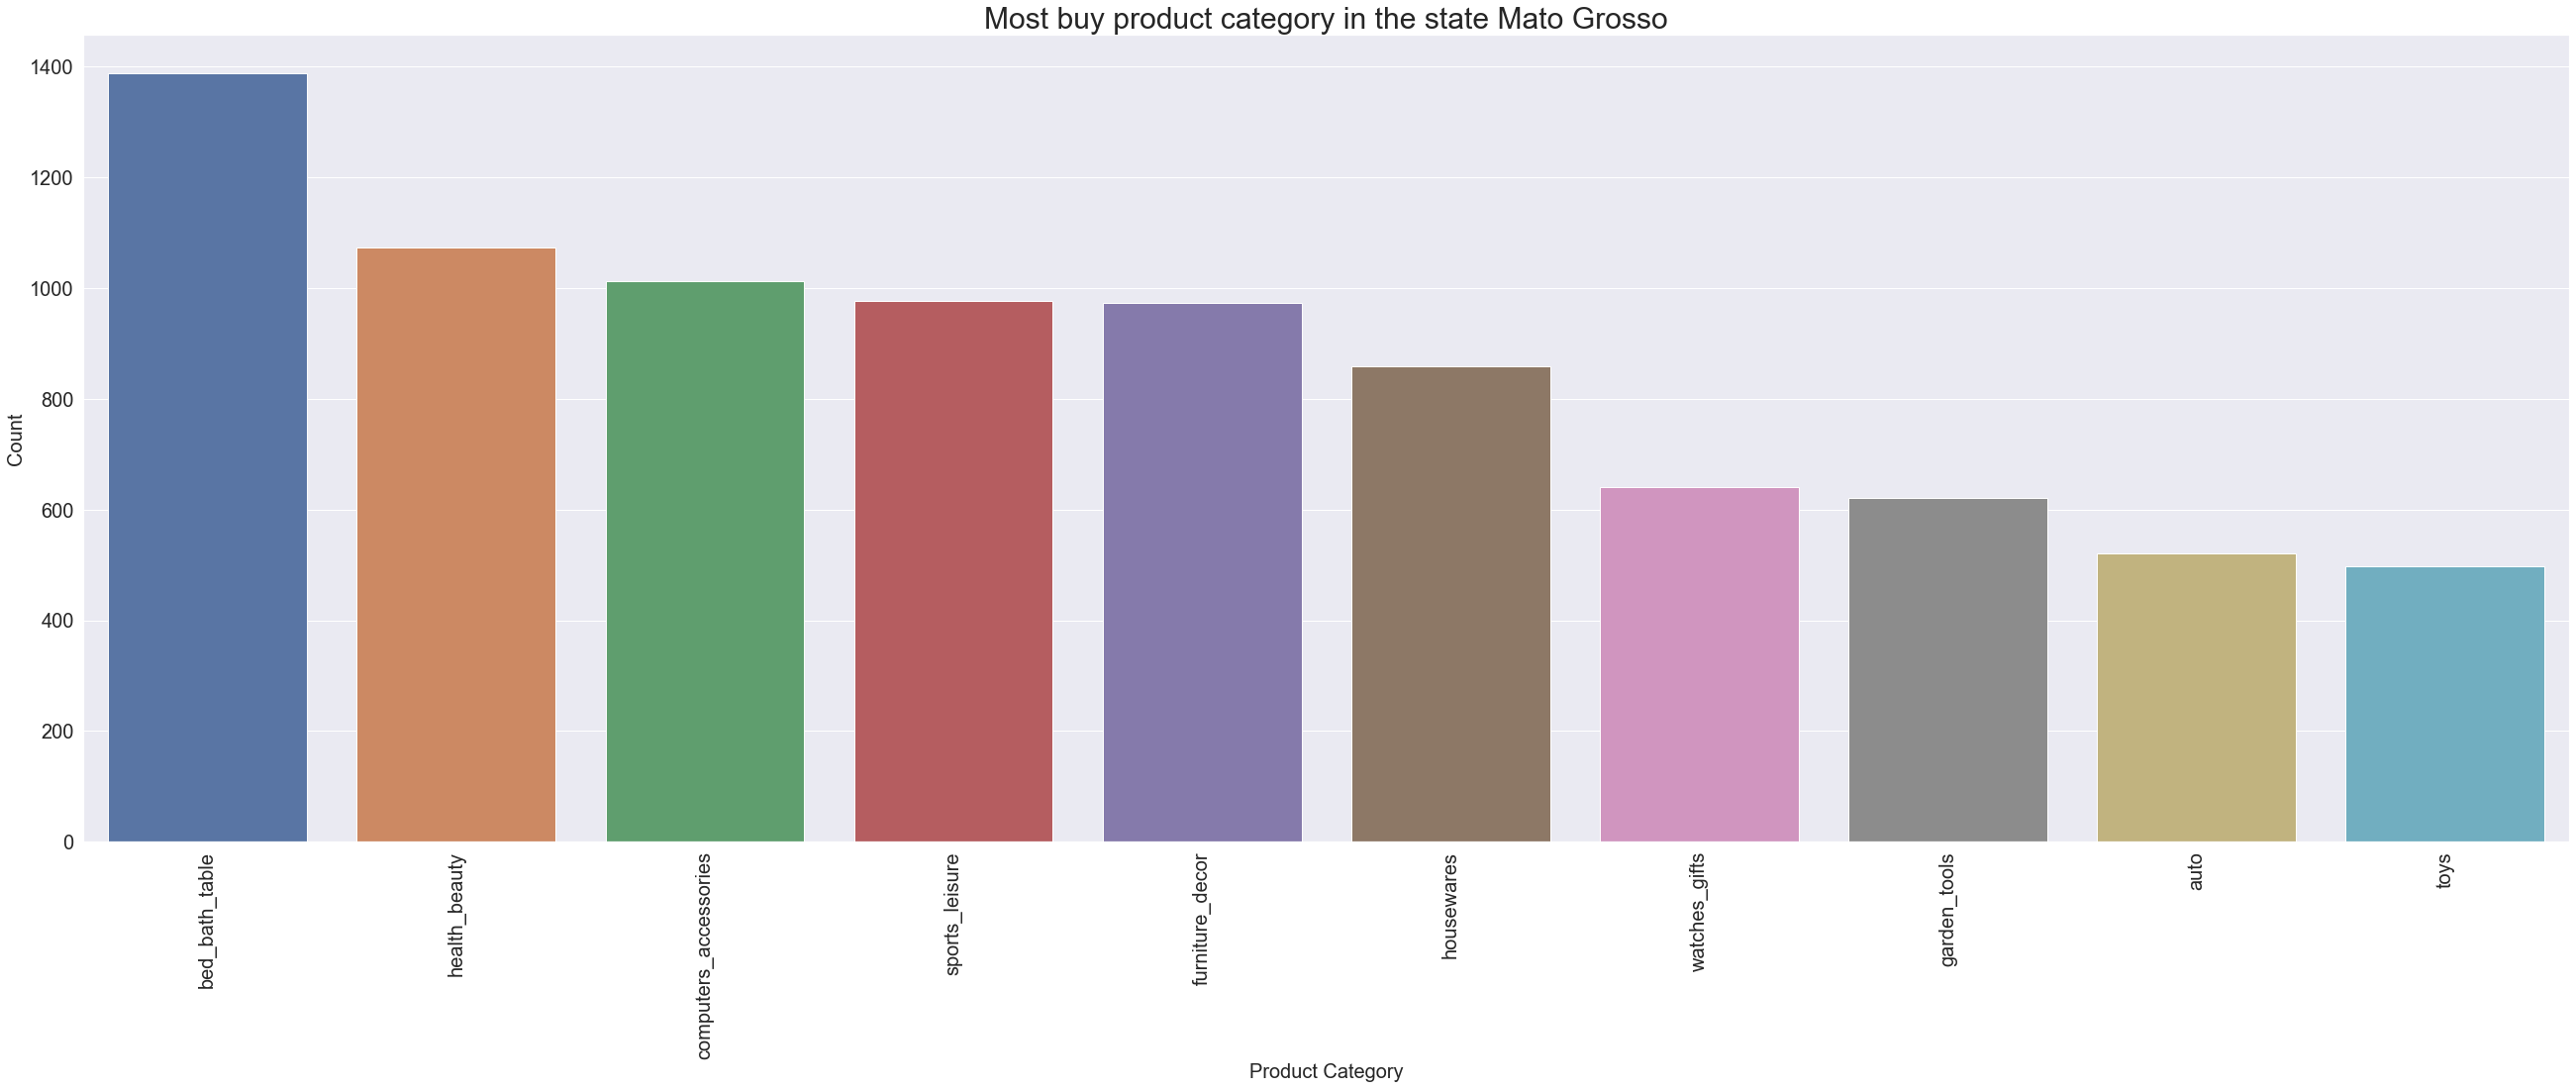

In [120]:
plt.figure(figsize=(45, 15))
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
sns.barplot(x=df[df['customer_state'] == 'MG']['product_category_name']
            .value_counts()[:10].index,
            y=df[df['customer_state'] == 'MG']['product_category_name']
            .value_counts()[:10])
plt.title('Most buy product category in the state Mato Grosso', fontsize=30)
plt.xlabel('Product Category', size=20)
plt.ylabel('Count', size=20)

- The freight does not seem to be related to the geographic location of the customer.
- On the other hand, the delivery time seems to be linked to the geographical location of the customer.
- The vast majority of sellers are located around the state of Sao Paulo (towards the south of Brazil). There are very few sellers in the central, northern, Amazonian and eastern parts of Brazil.
- The most popular categories in heavily populated region (Sao Paulo) and less heavily populated (Mato Grosso) are similar.

## 7.4. Distance Seller-Customer / Freight / Delivery Time / Product Weight<a class="anchor" id="section_7_4"></a>

<AxesSubplot:title={'center':'Pearson correlation'}>

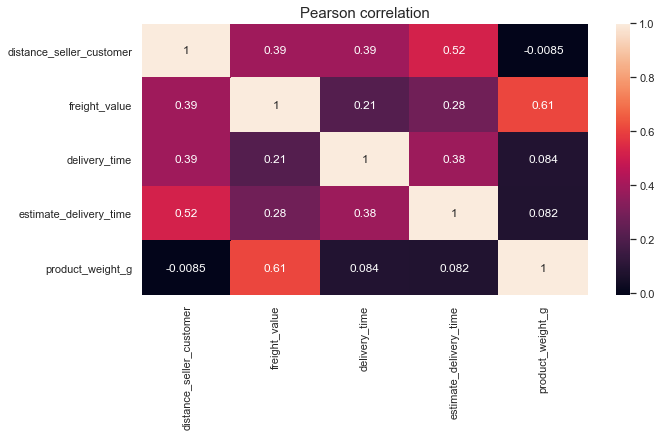

In [121]:
plt.figure(figsize=(10, 5))
plt.title('Pearson correlation', size=15)
sns.heatmap(df[['distance_seller_customer', 'freight_value',
                'delivery_time', 'estimate_delivery_time', 'product_weight_g']]
            .corr(method='pearson'), annot=True)

<AxesSubplot:title={'center':'Spearman correlation'}>

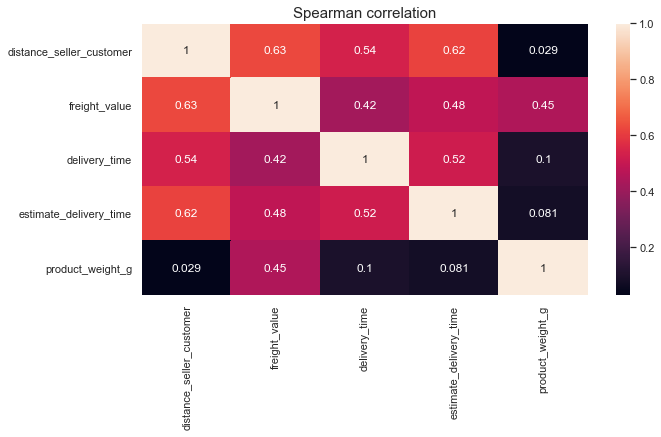

In [122]:
plt.figure(figsize=(10, 5))
plt.title('Spearman correlation', size=15)
sns.heatmap(df[['distance_seller_customer', 'freight_value',
                'delivery_time', 'estimate_delivery_time', 'product_weight_g']]
            .corr(method='spearman'), annot=True)

- According to the correlation tables, the freight variable seems to be correlated with customer / seller distance and therefore with delivery time. - - The freight variable also seems to be correlated with the weight of the product.

## 7.5. Purchase Year / Month / Day / Hour<a class="anchor" id="section_7_5"></a>

In [123]:
columns = ['purchase_year',
           'purchase_month',
           'purchase_day',
           'purchase_weekday',
           'purchase_hour']

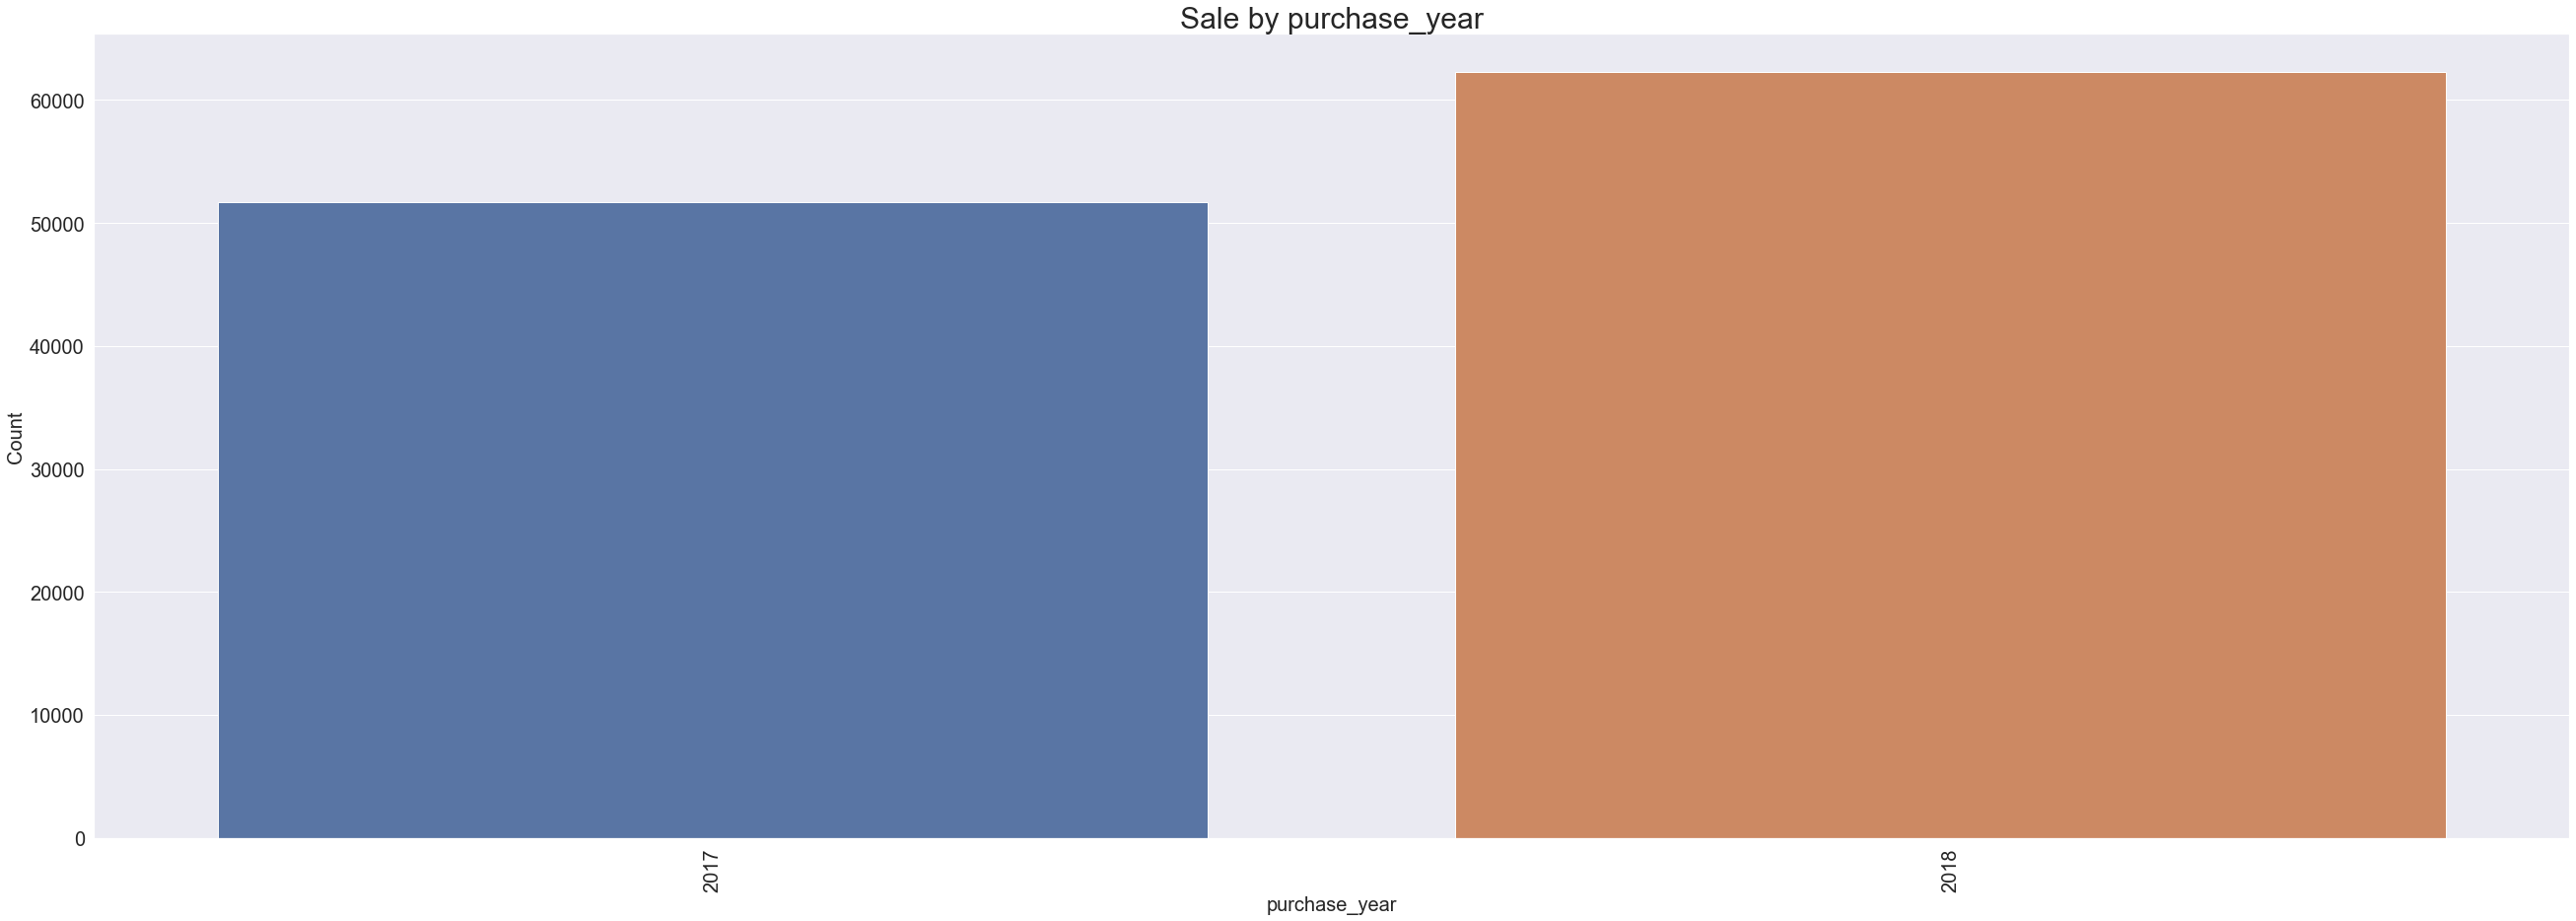

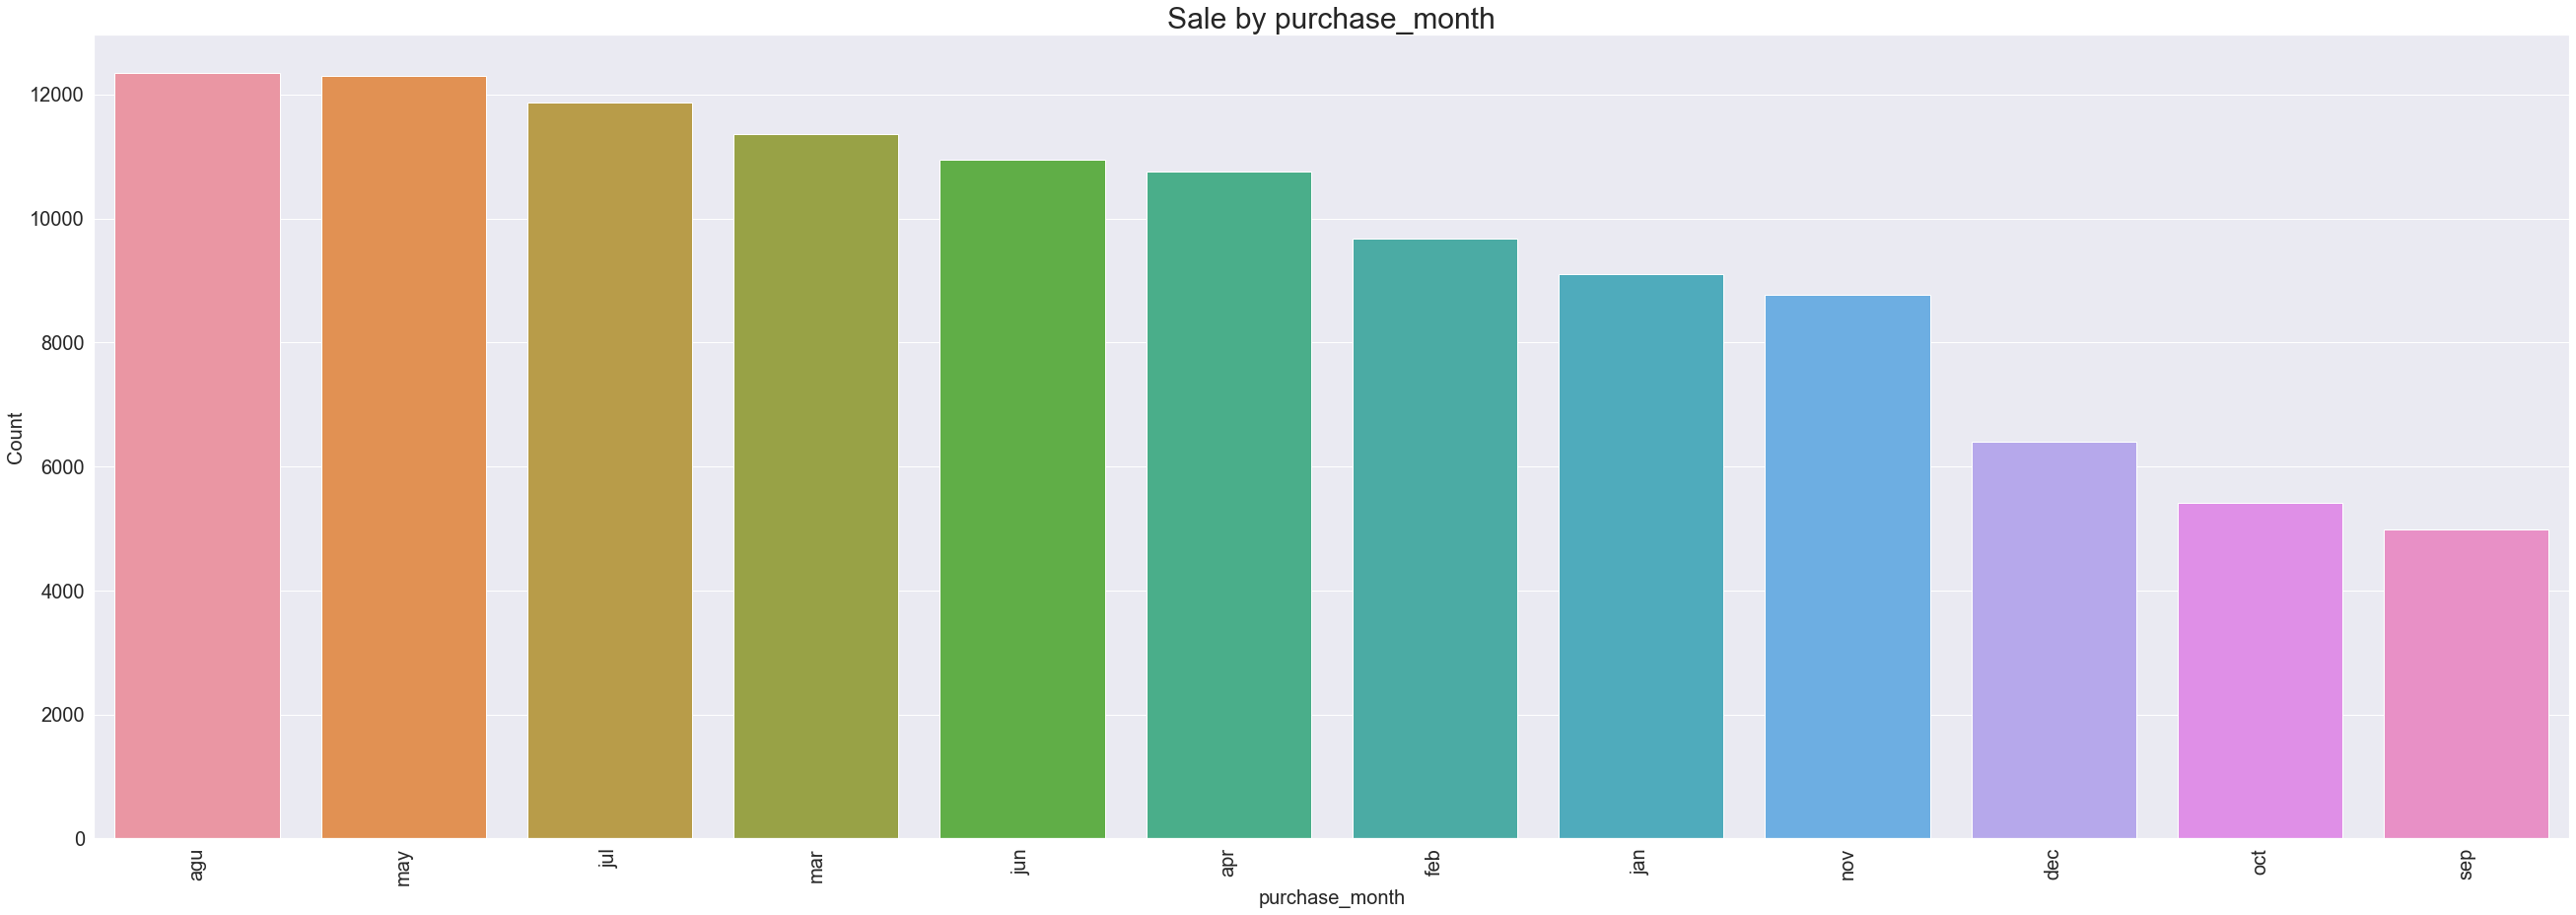

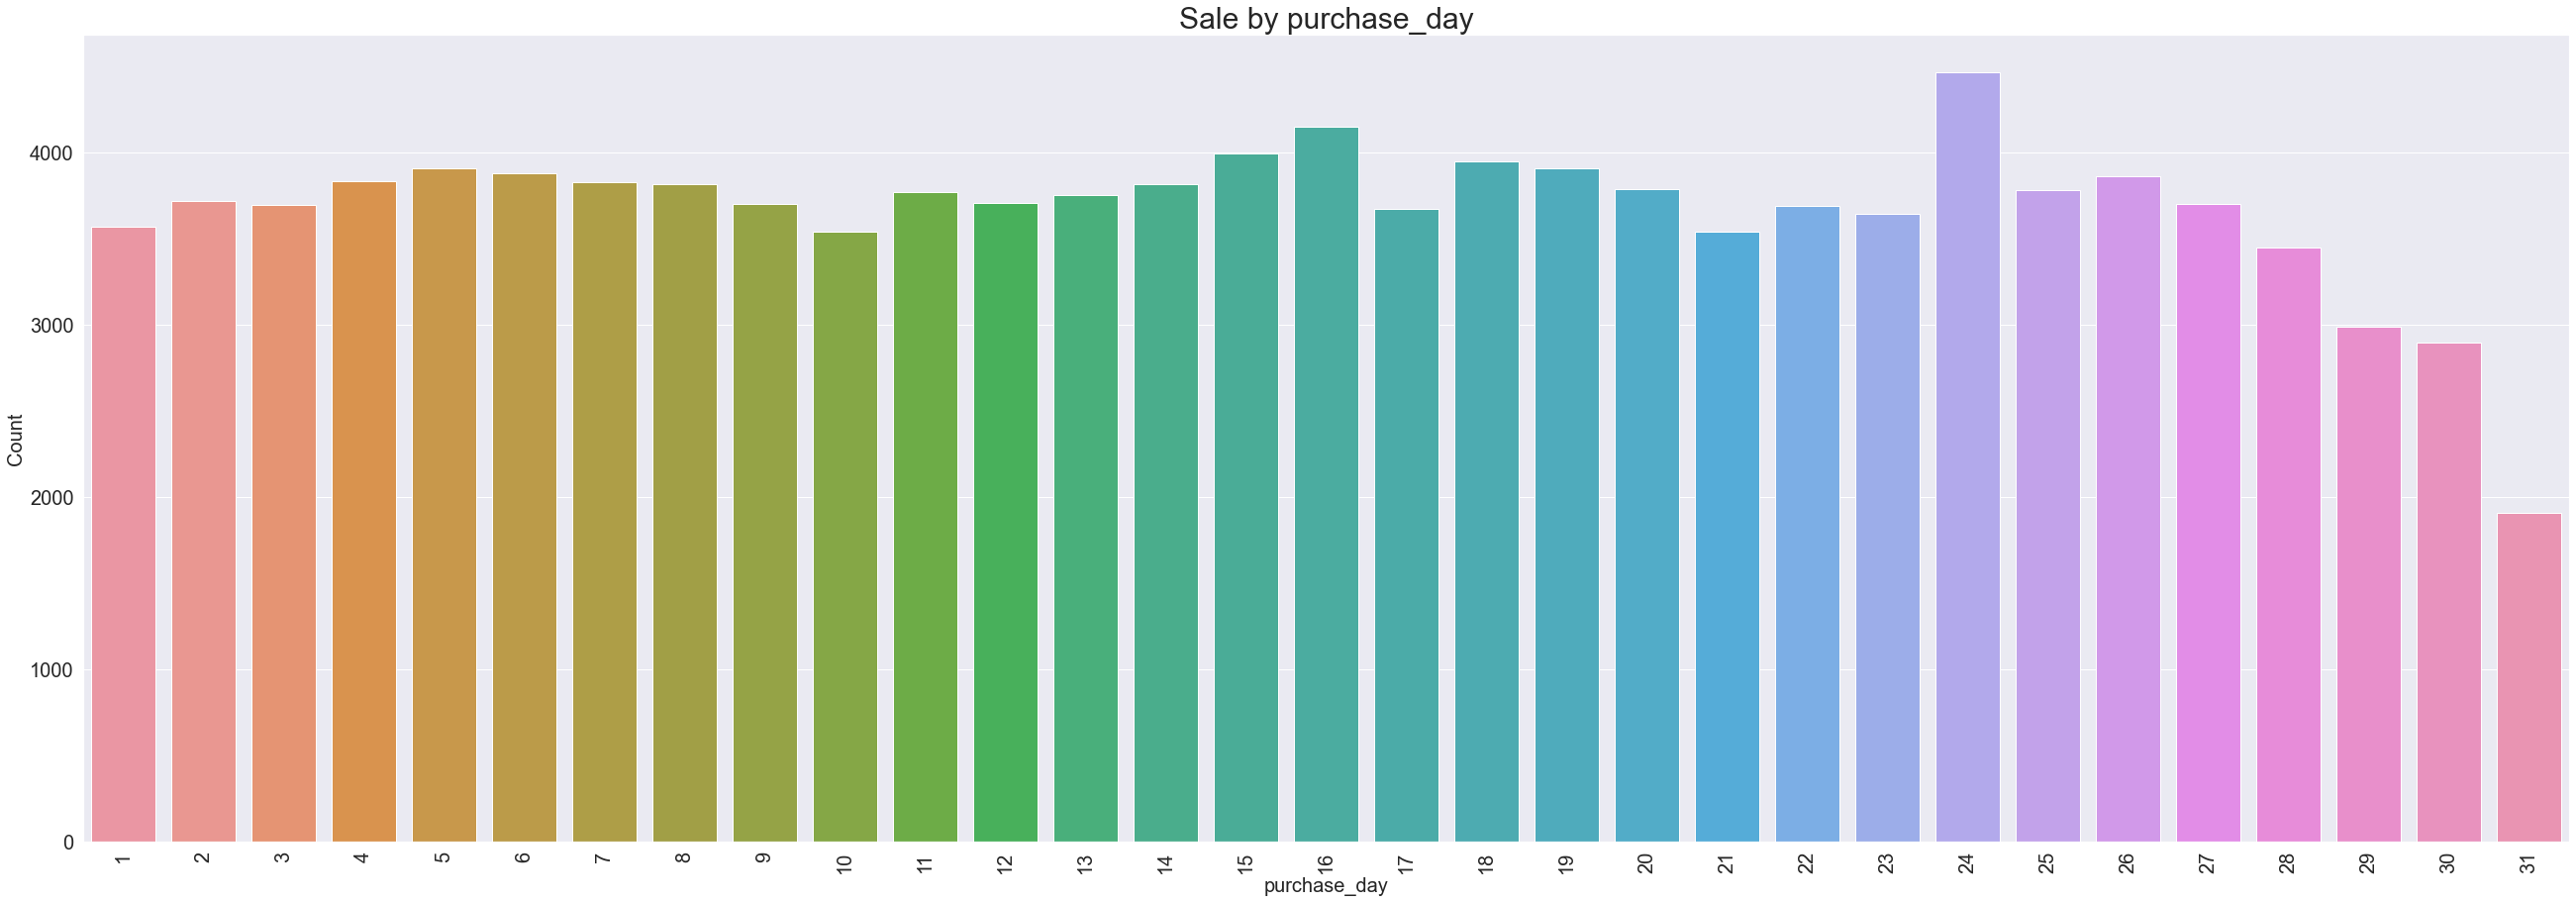

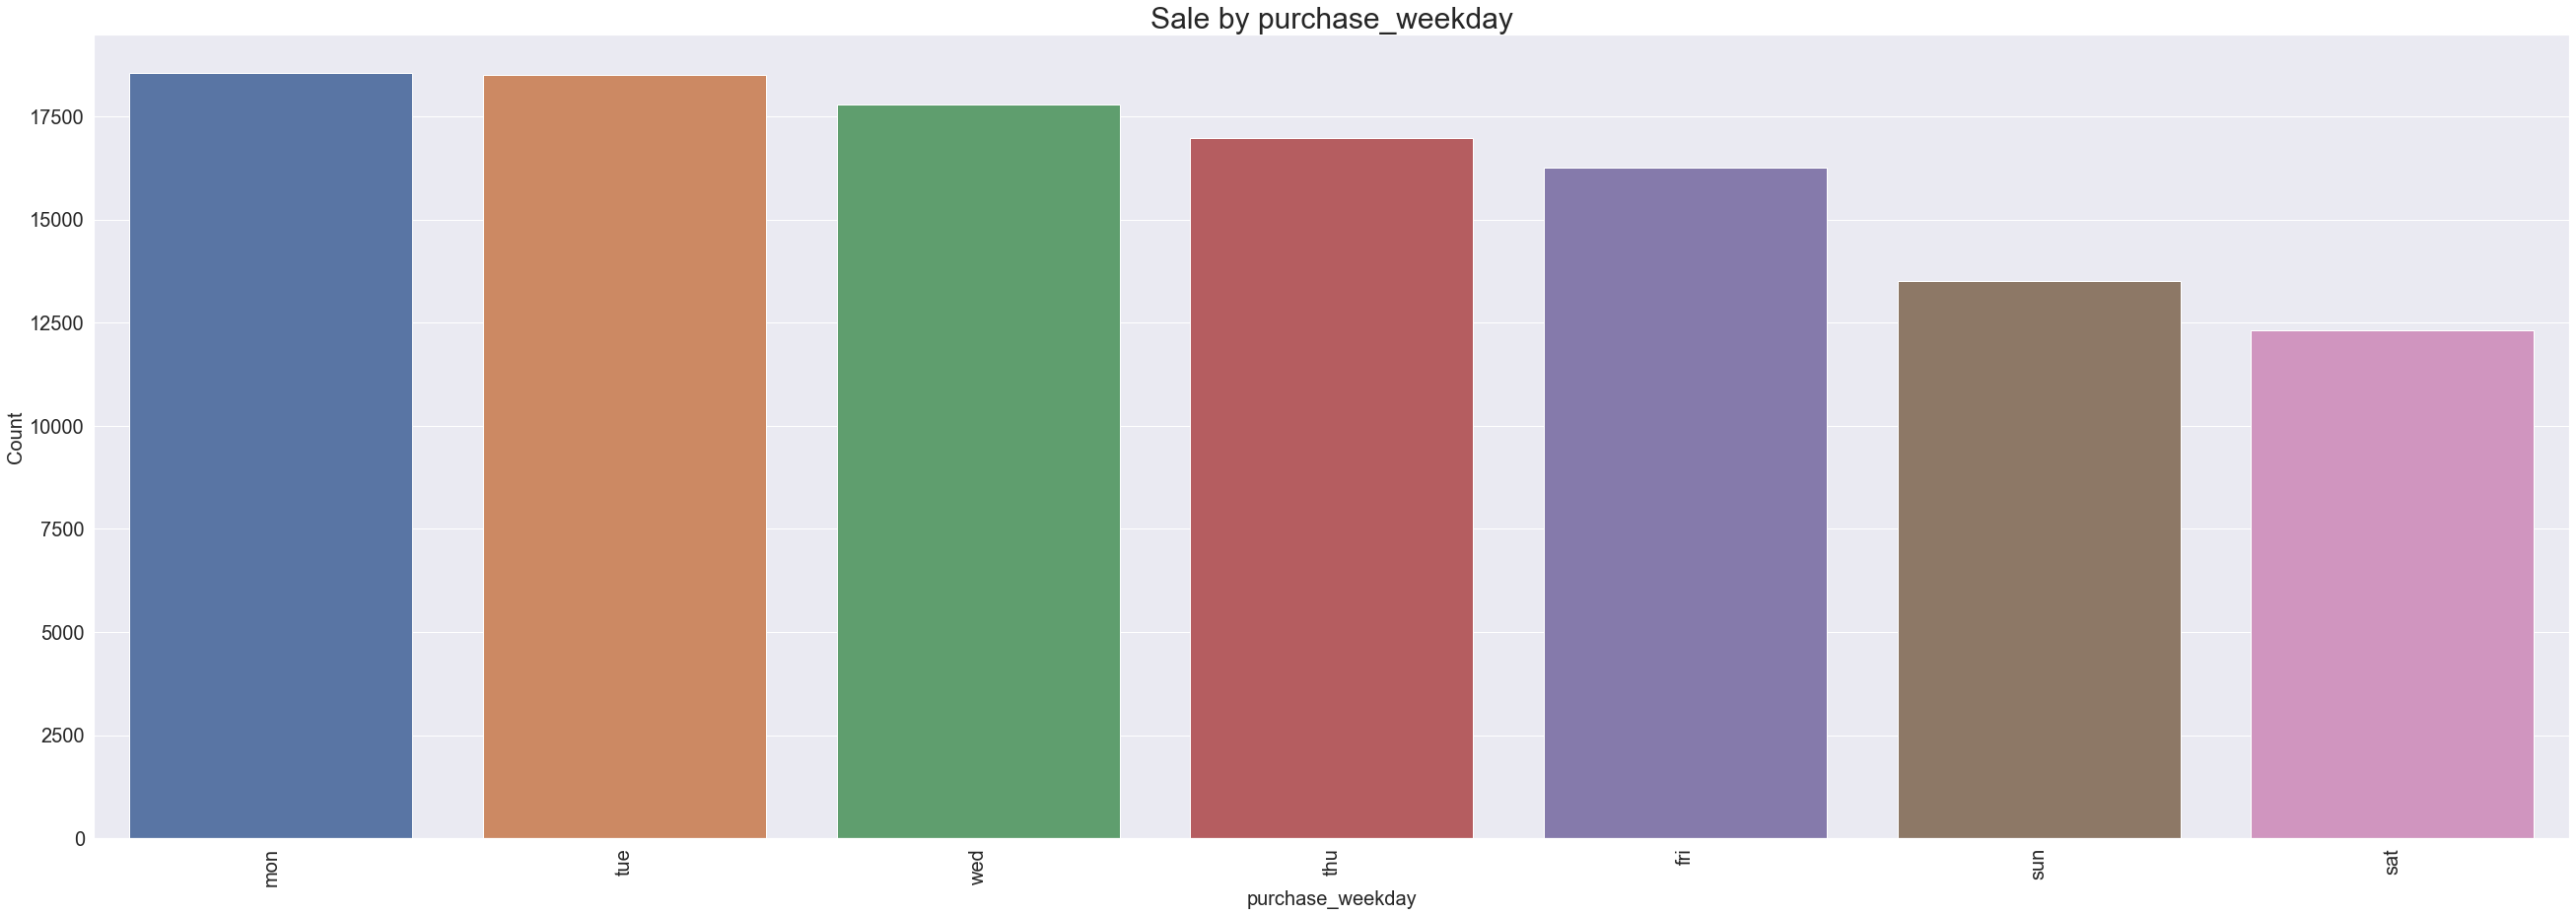

In [124]:
for col in columns:
    plt.figure(figsize=(45, 15))
    plt.xticks(fontsize=20, rotation=90)
    plt.yticks(fontsize=20)
    sns.barplot(x=df[col].value_counts().index,
                y=df[col].value_counts())
    plt.title('Sale by ' + col, fontsize=30)
    plt.xlabel(col, size=20)
    plt.ylabel('Count', size=20)

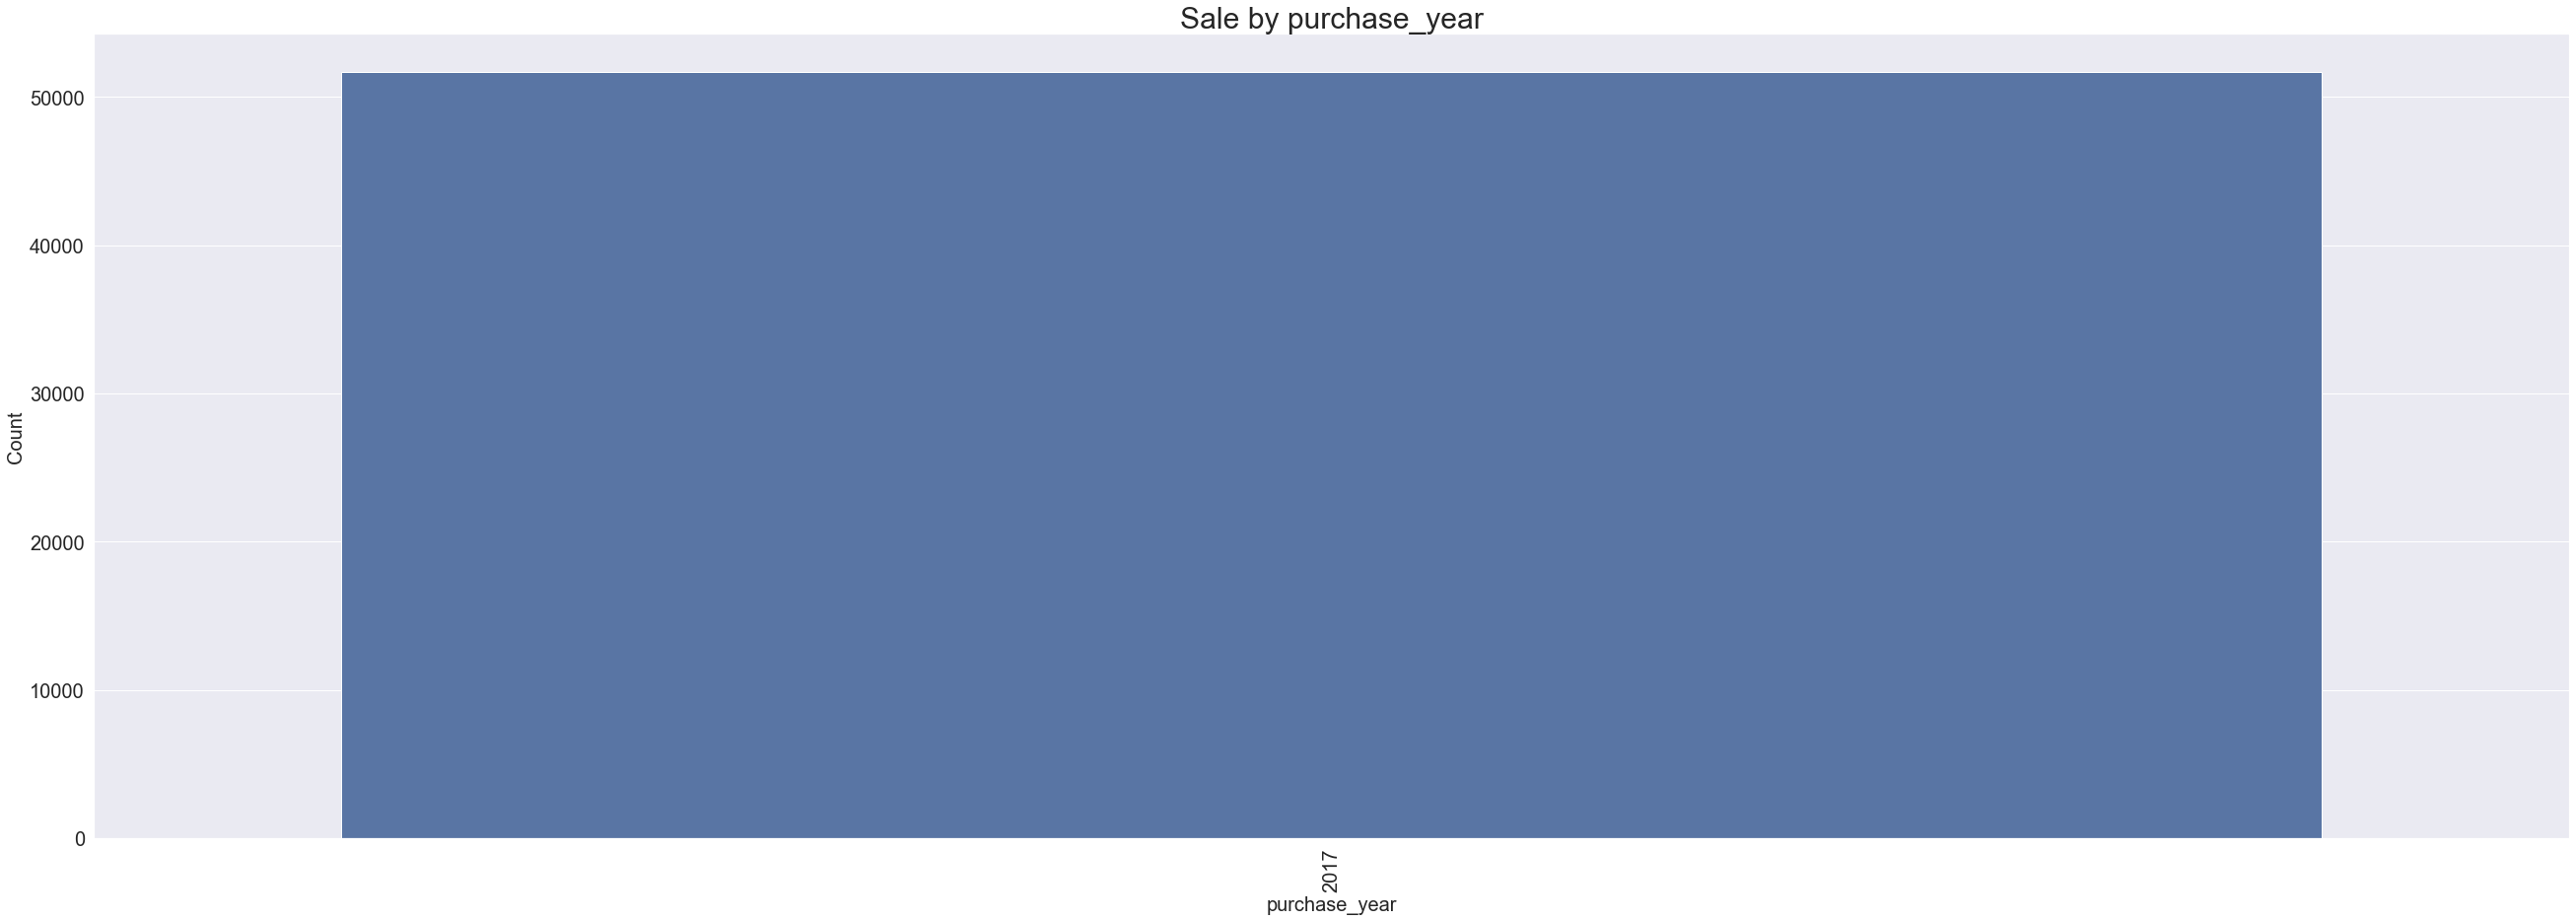

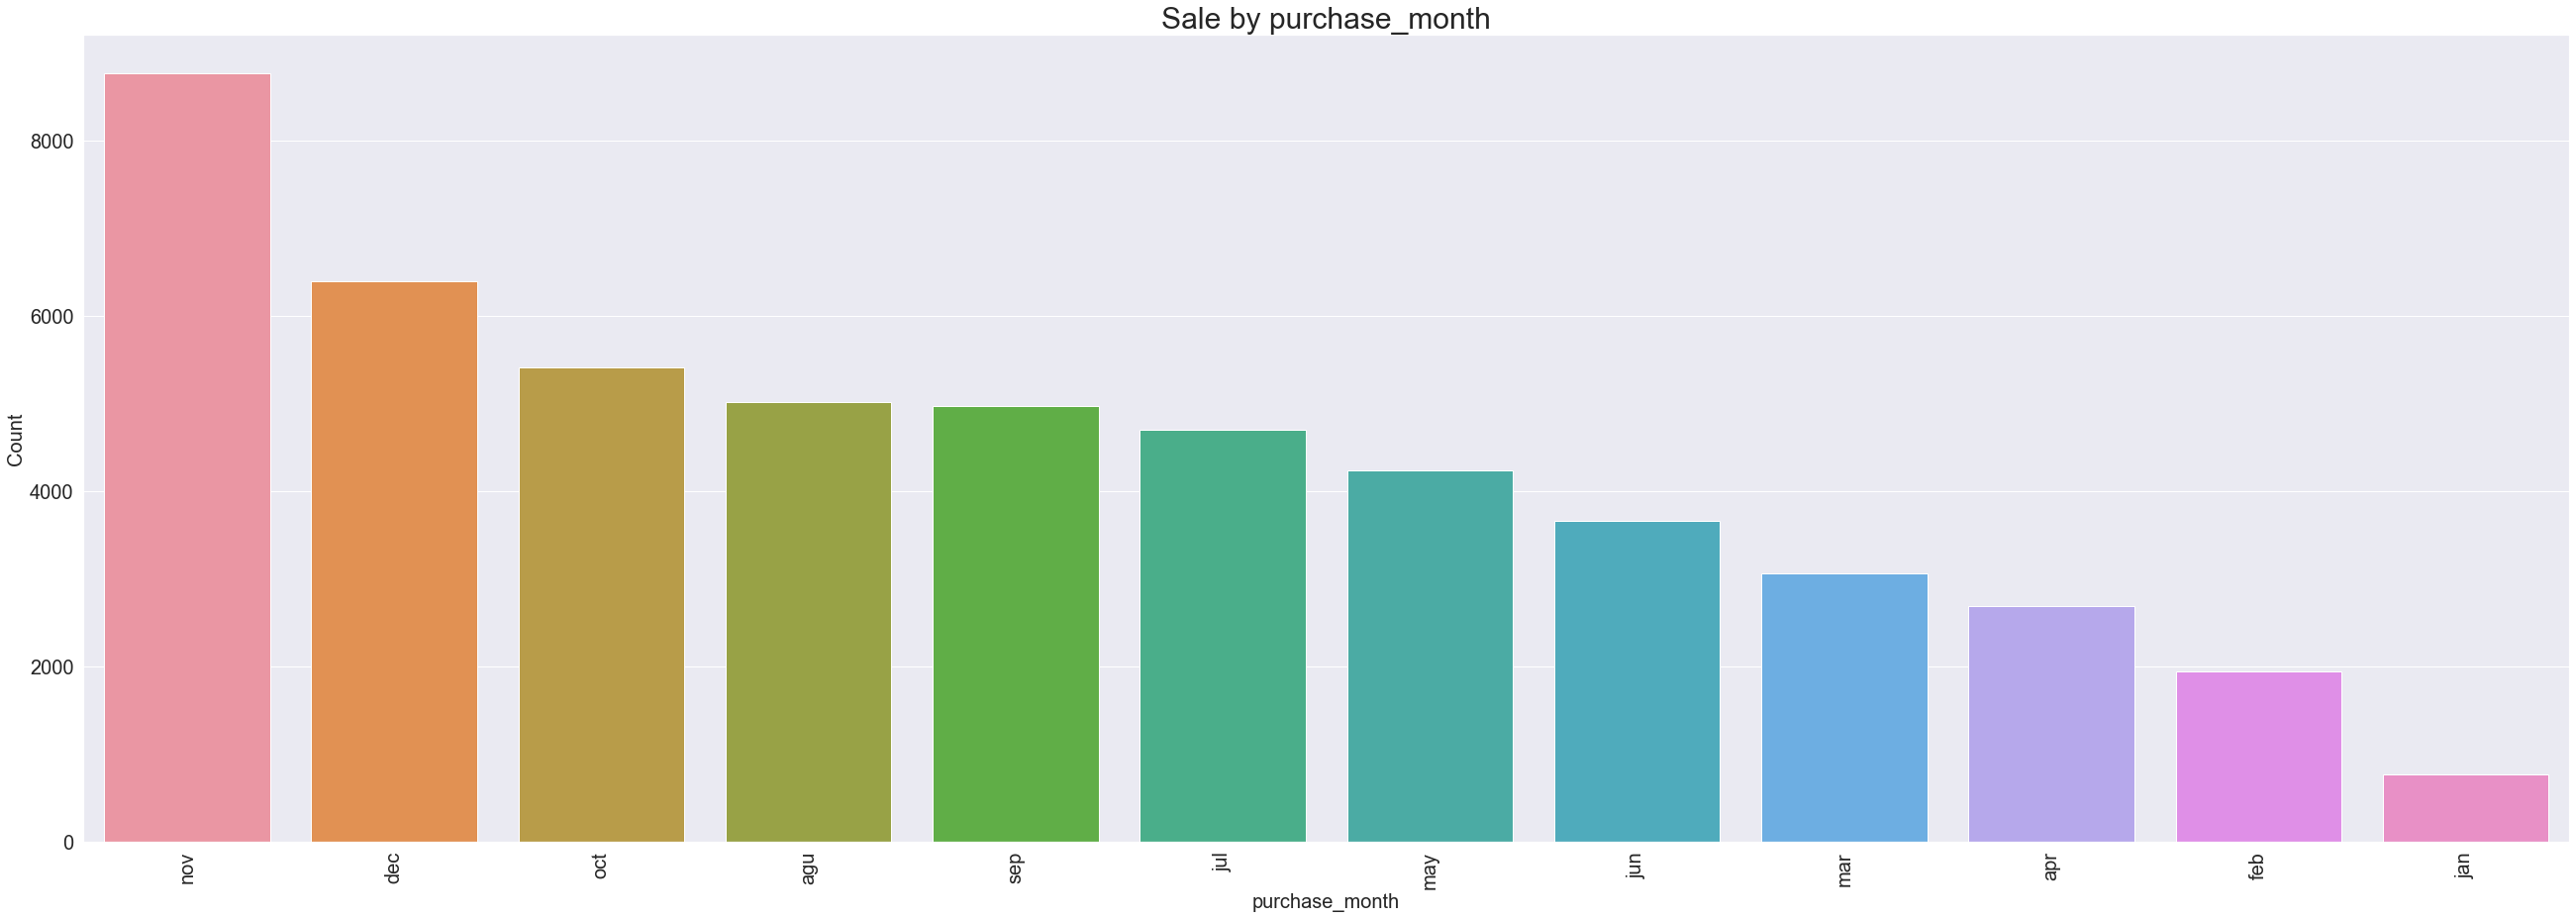

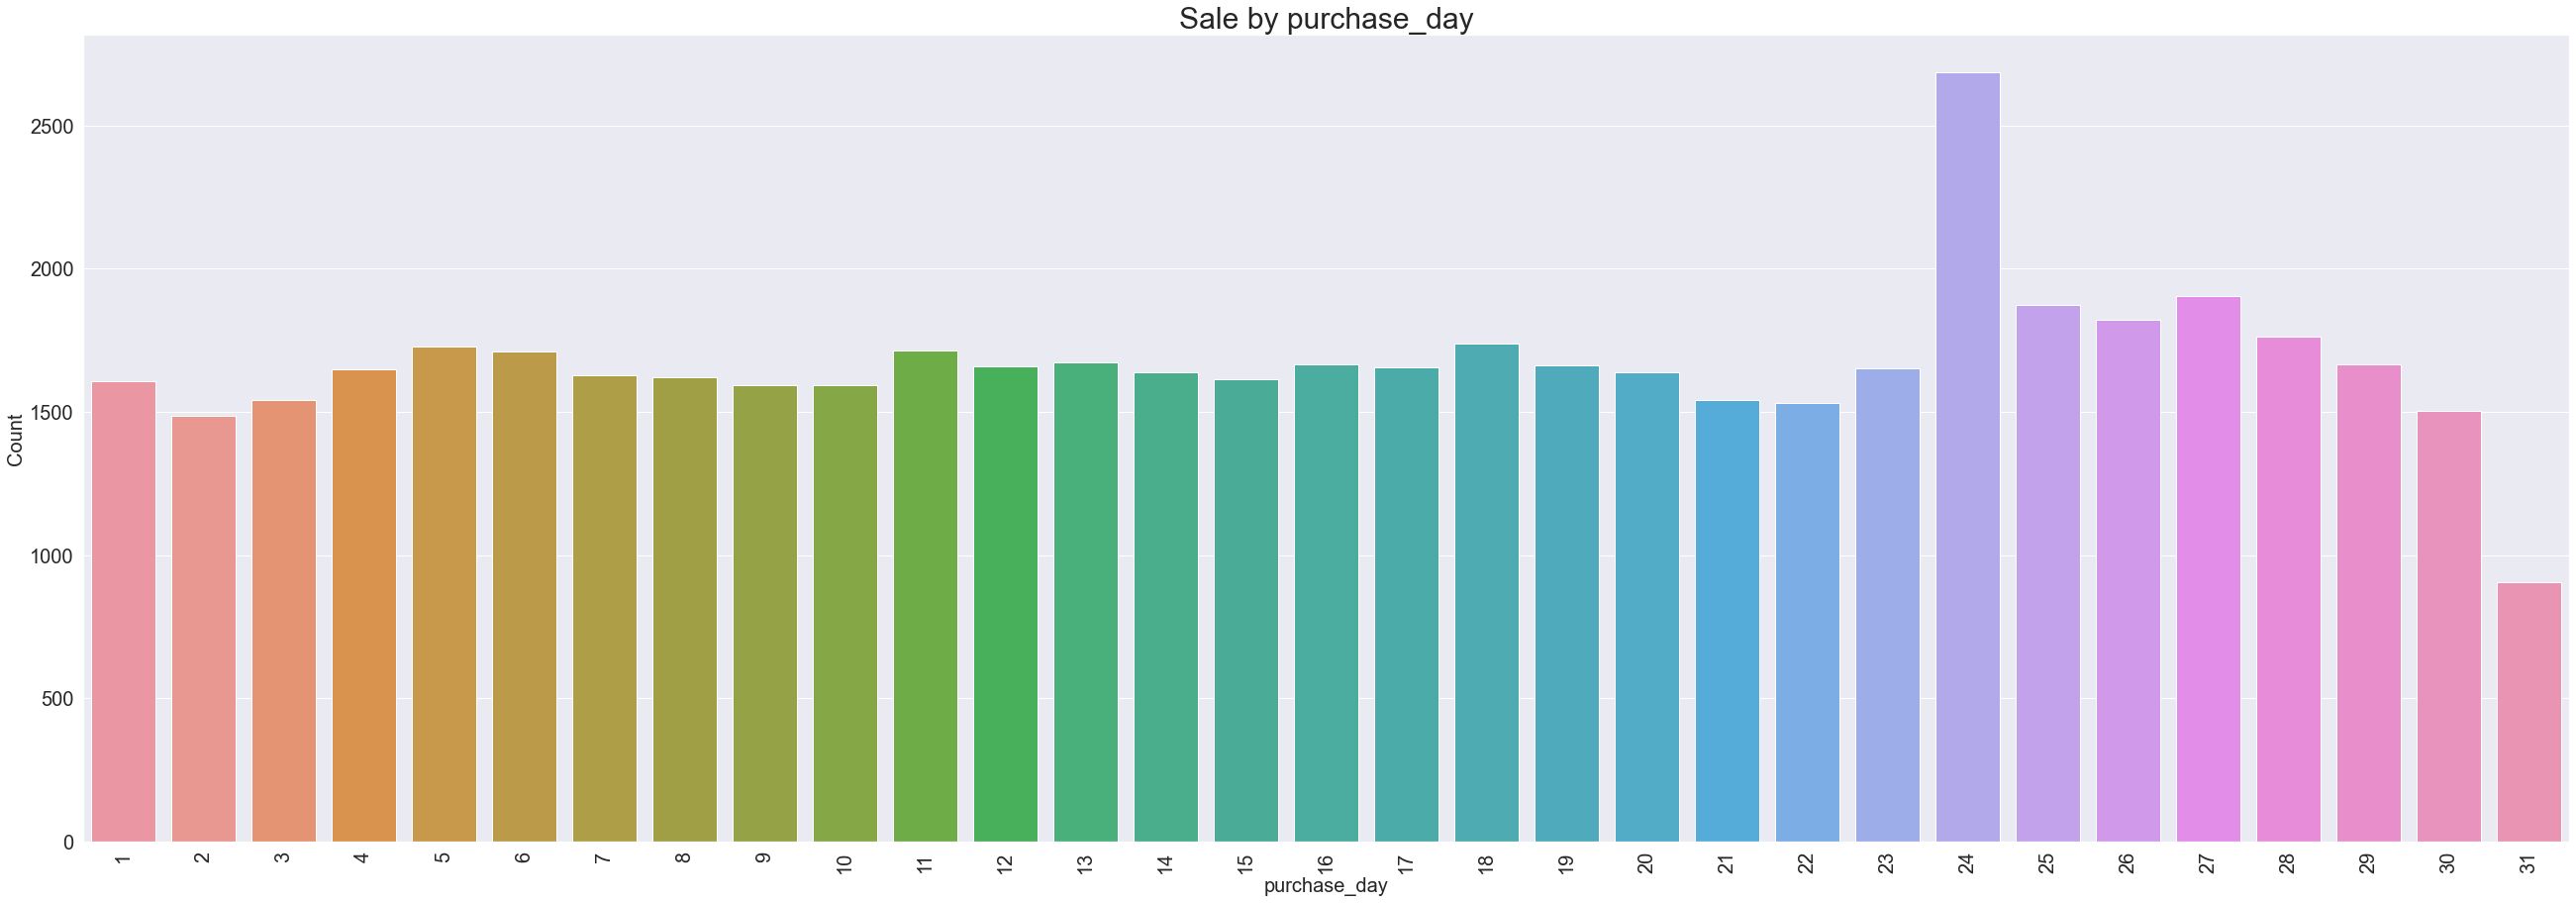

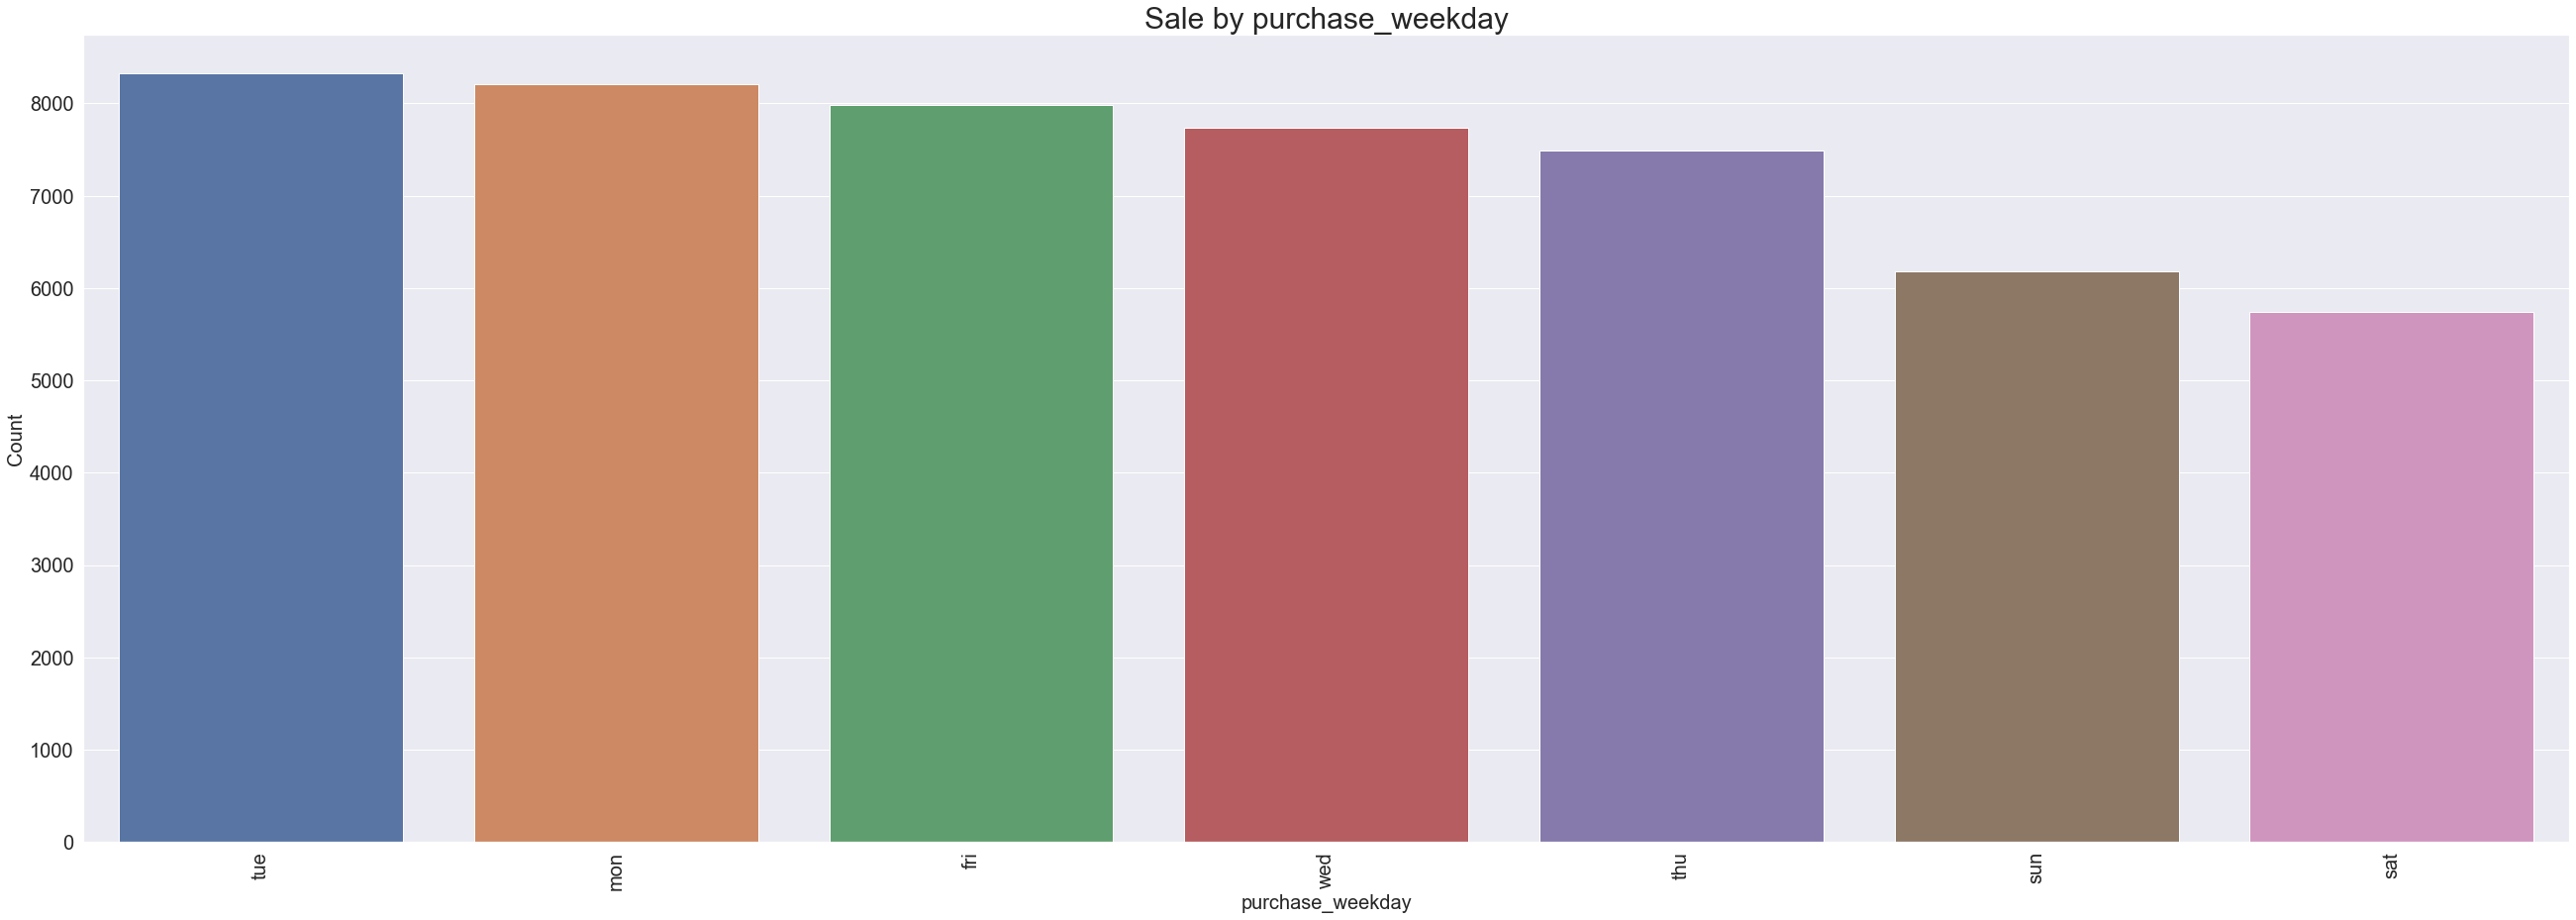

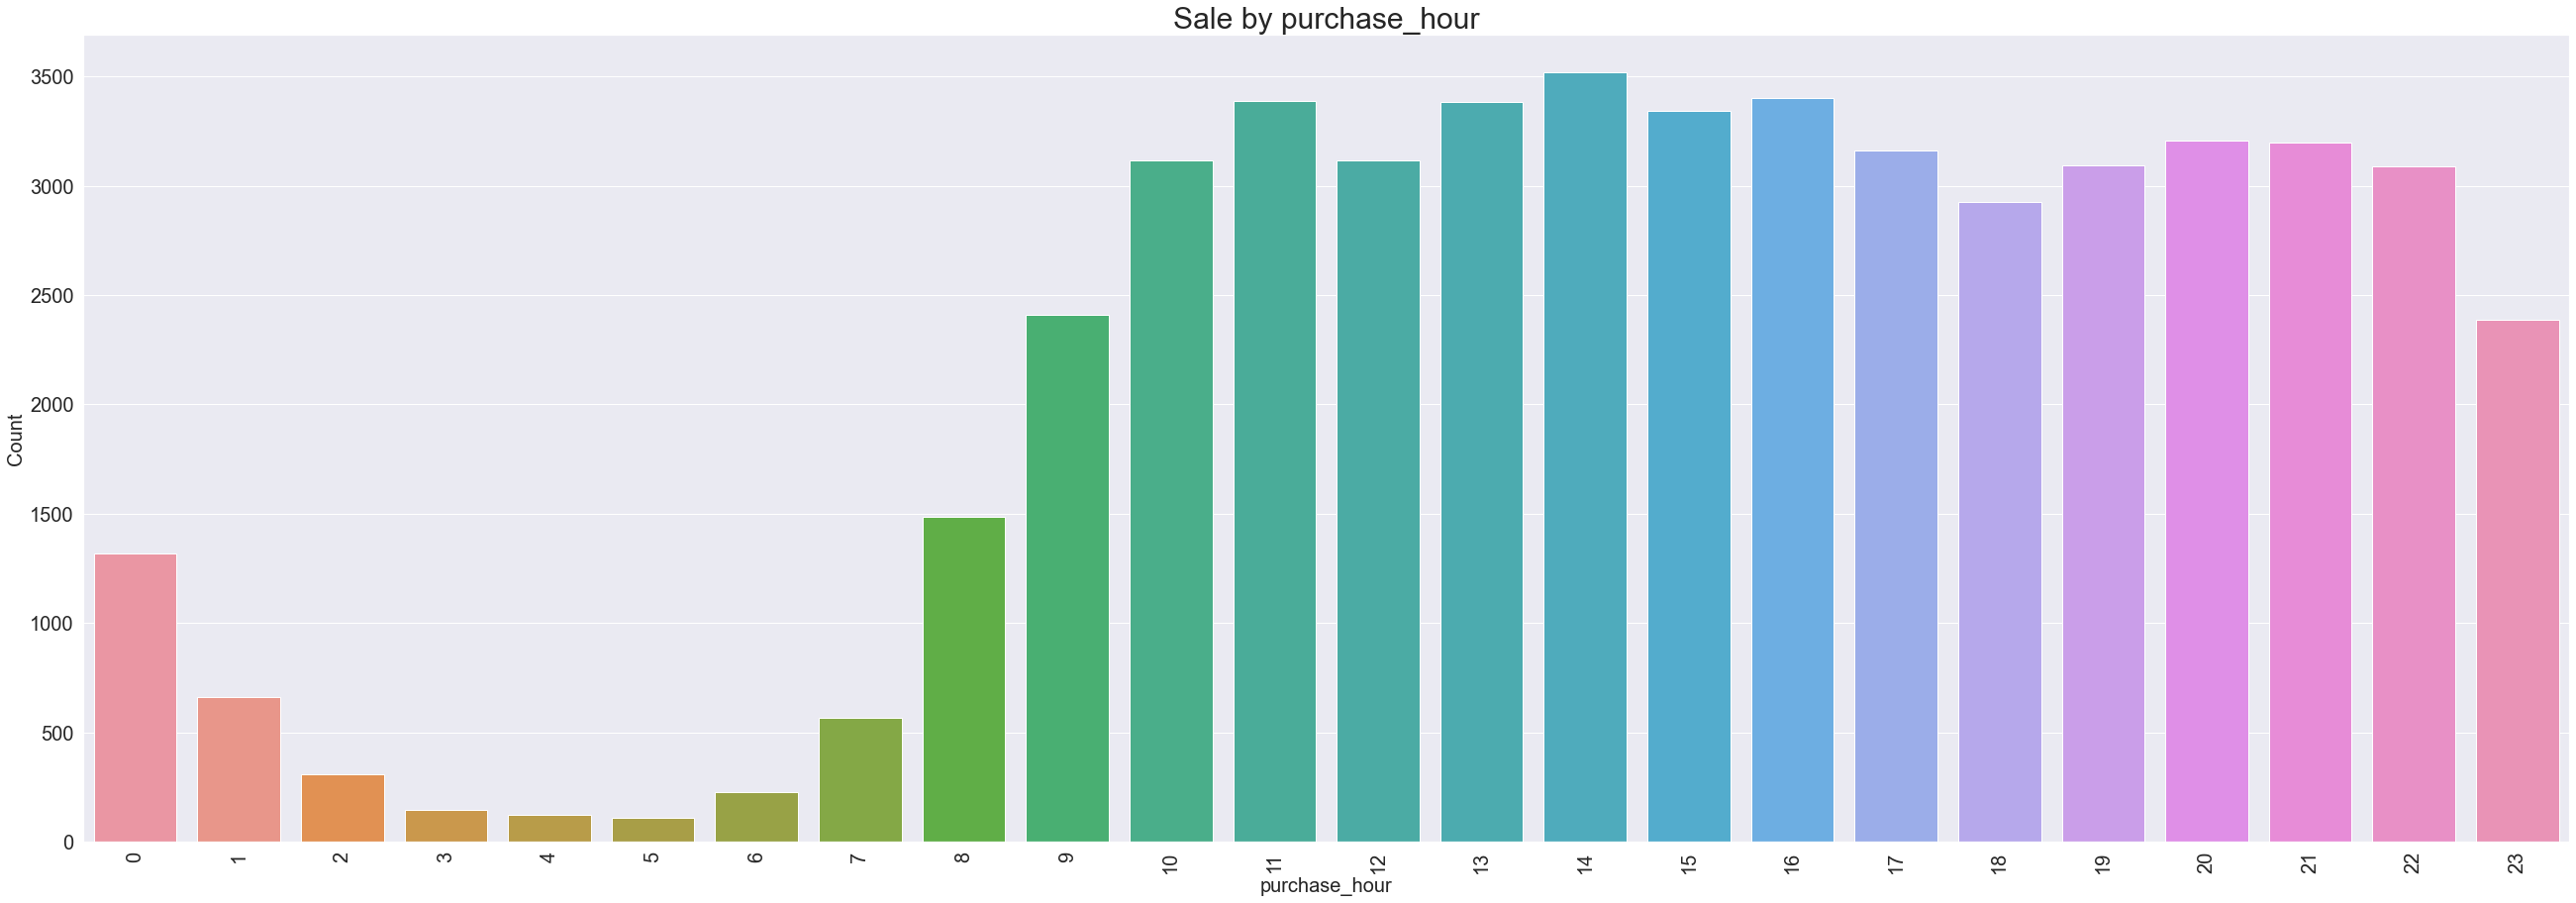

In [125]:
for col in columns:
    plt.figure(figsize=(45, 15))
    plt.xticks(fontsize=20, rotation=90)
    plt.yticks(fontsize=20)
    sns.barplot(x=df[df['purchase_year'] == 2017][col].value_counts().index,
                y=df[df['purchase_year'] == 2017][col].value_counts())
    plt.title('Sale by ' + col, fontsize=30)
    plt.xlabel(col, size=20)
    plt.ylabel('Count', size=20)

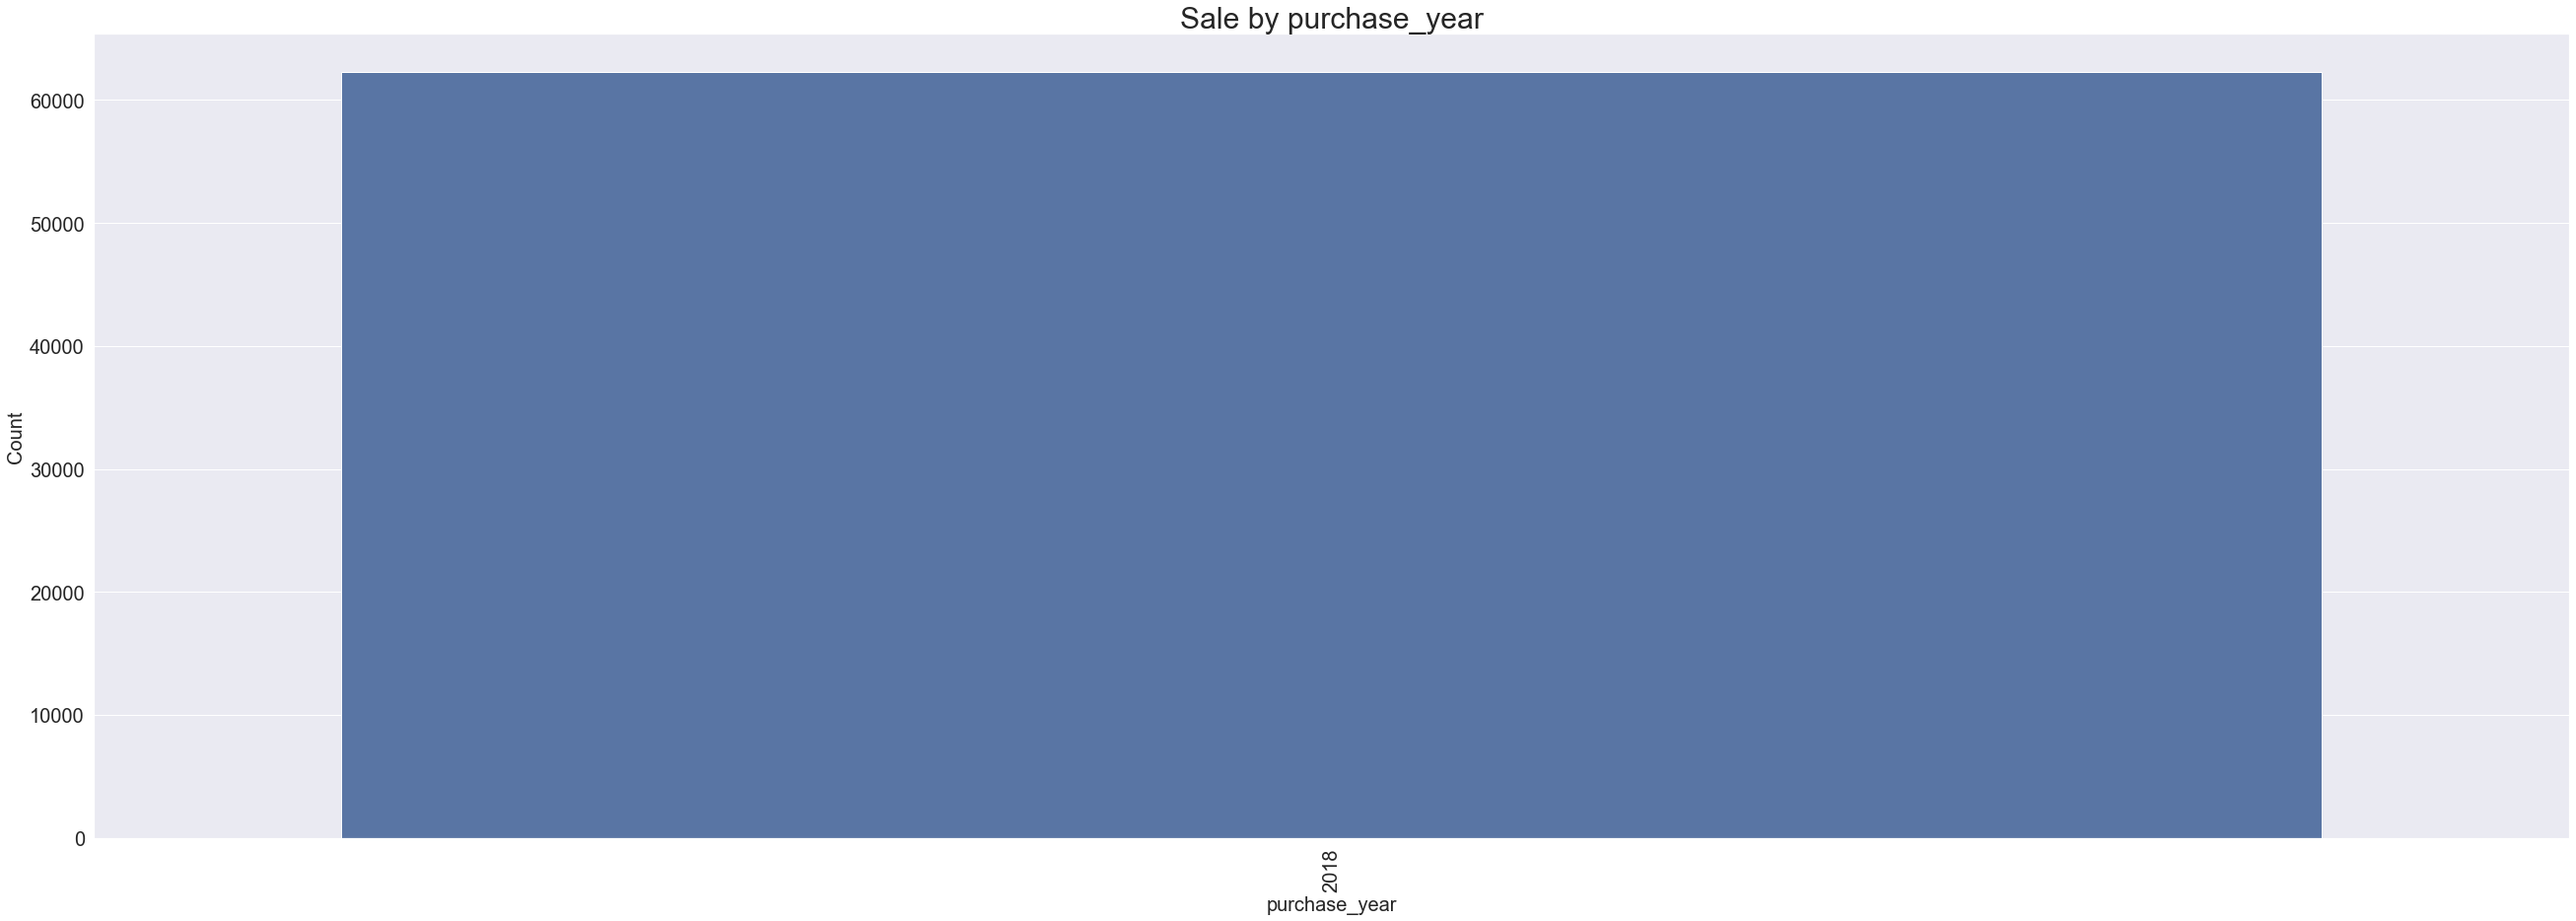

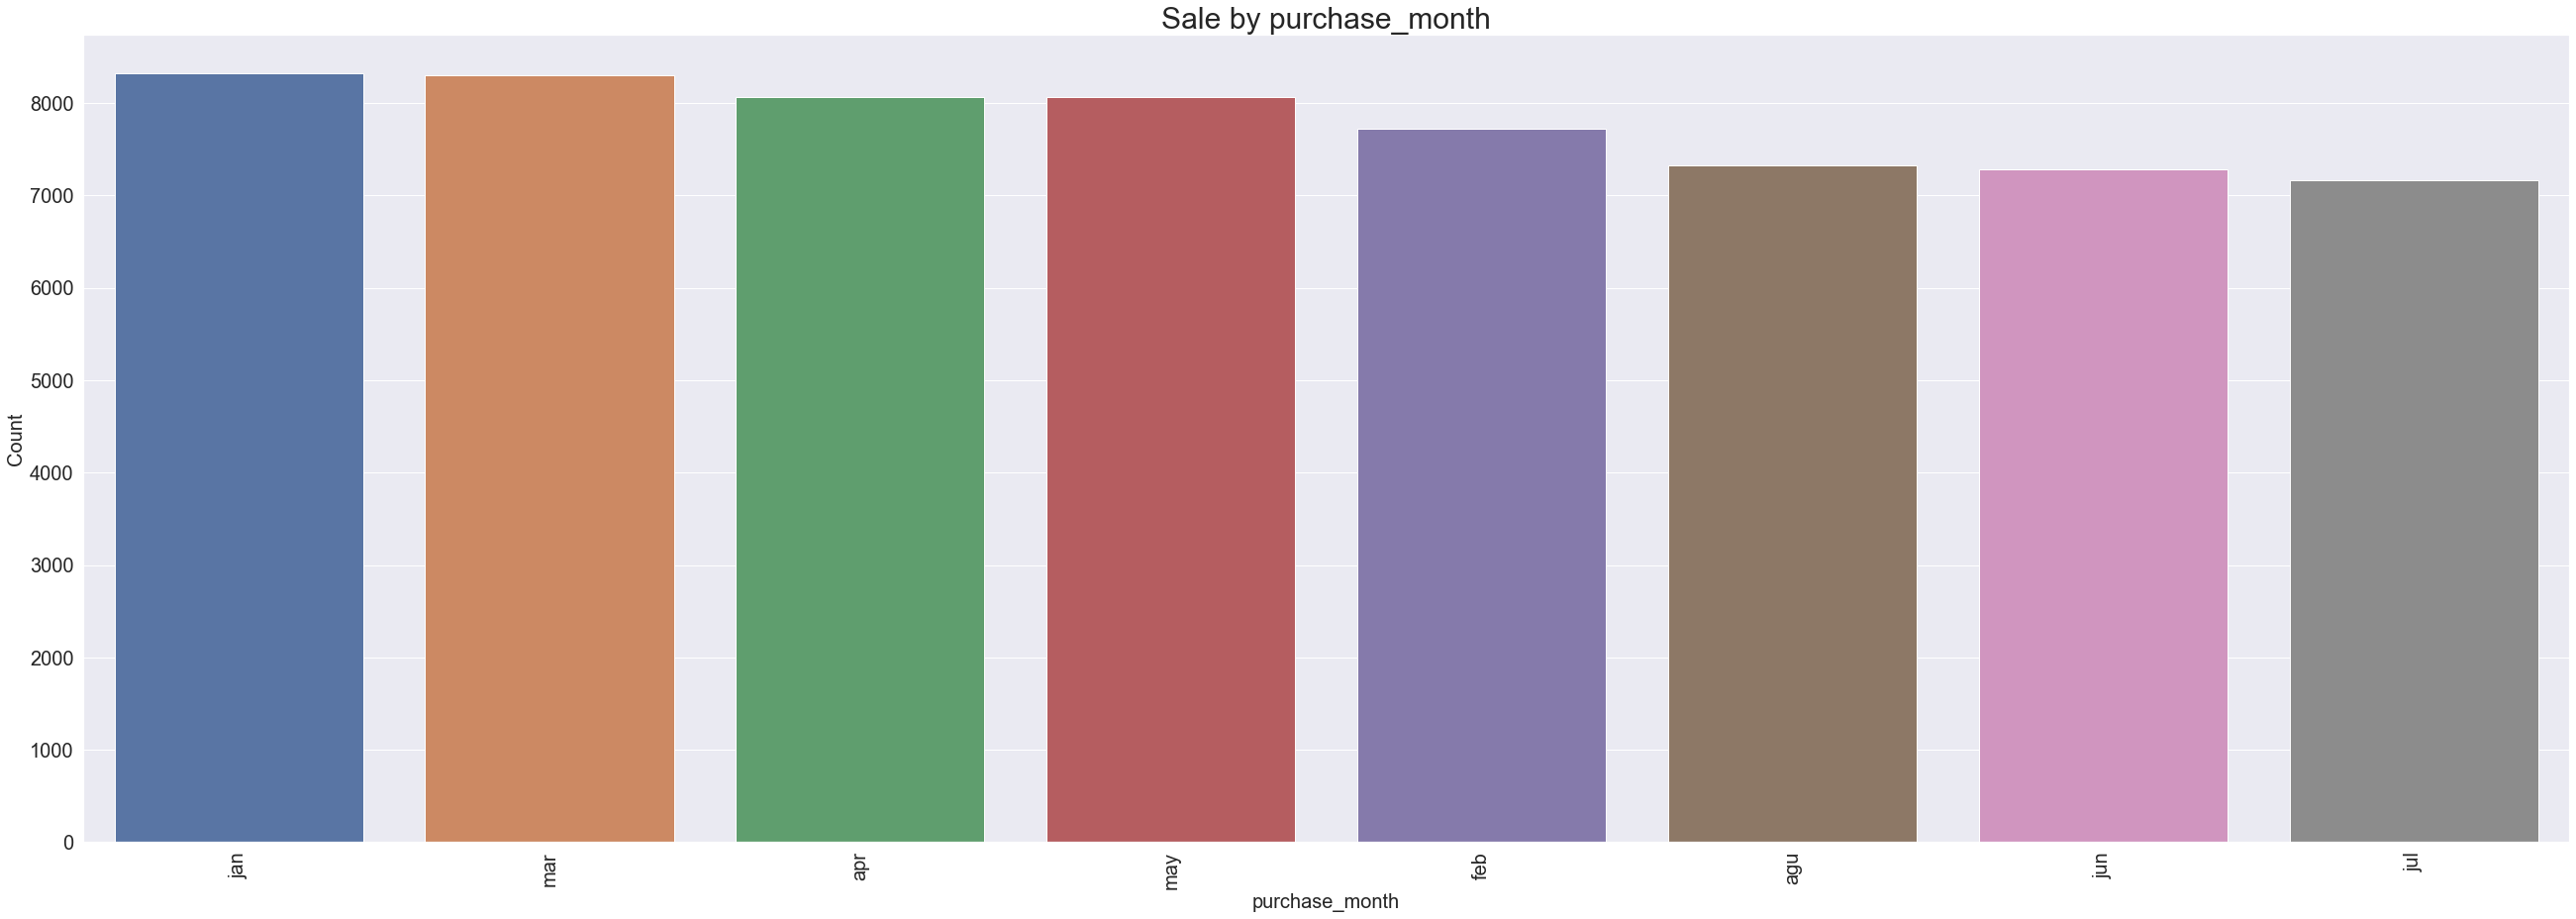

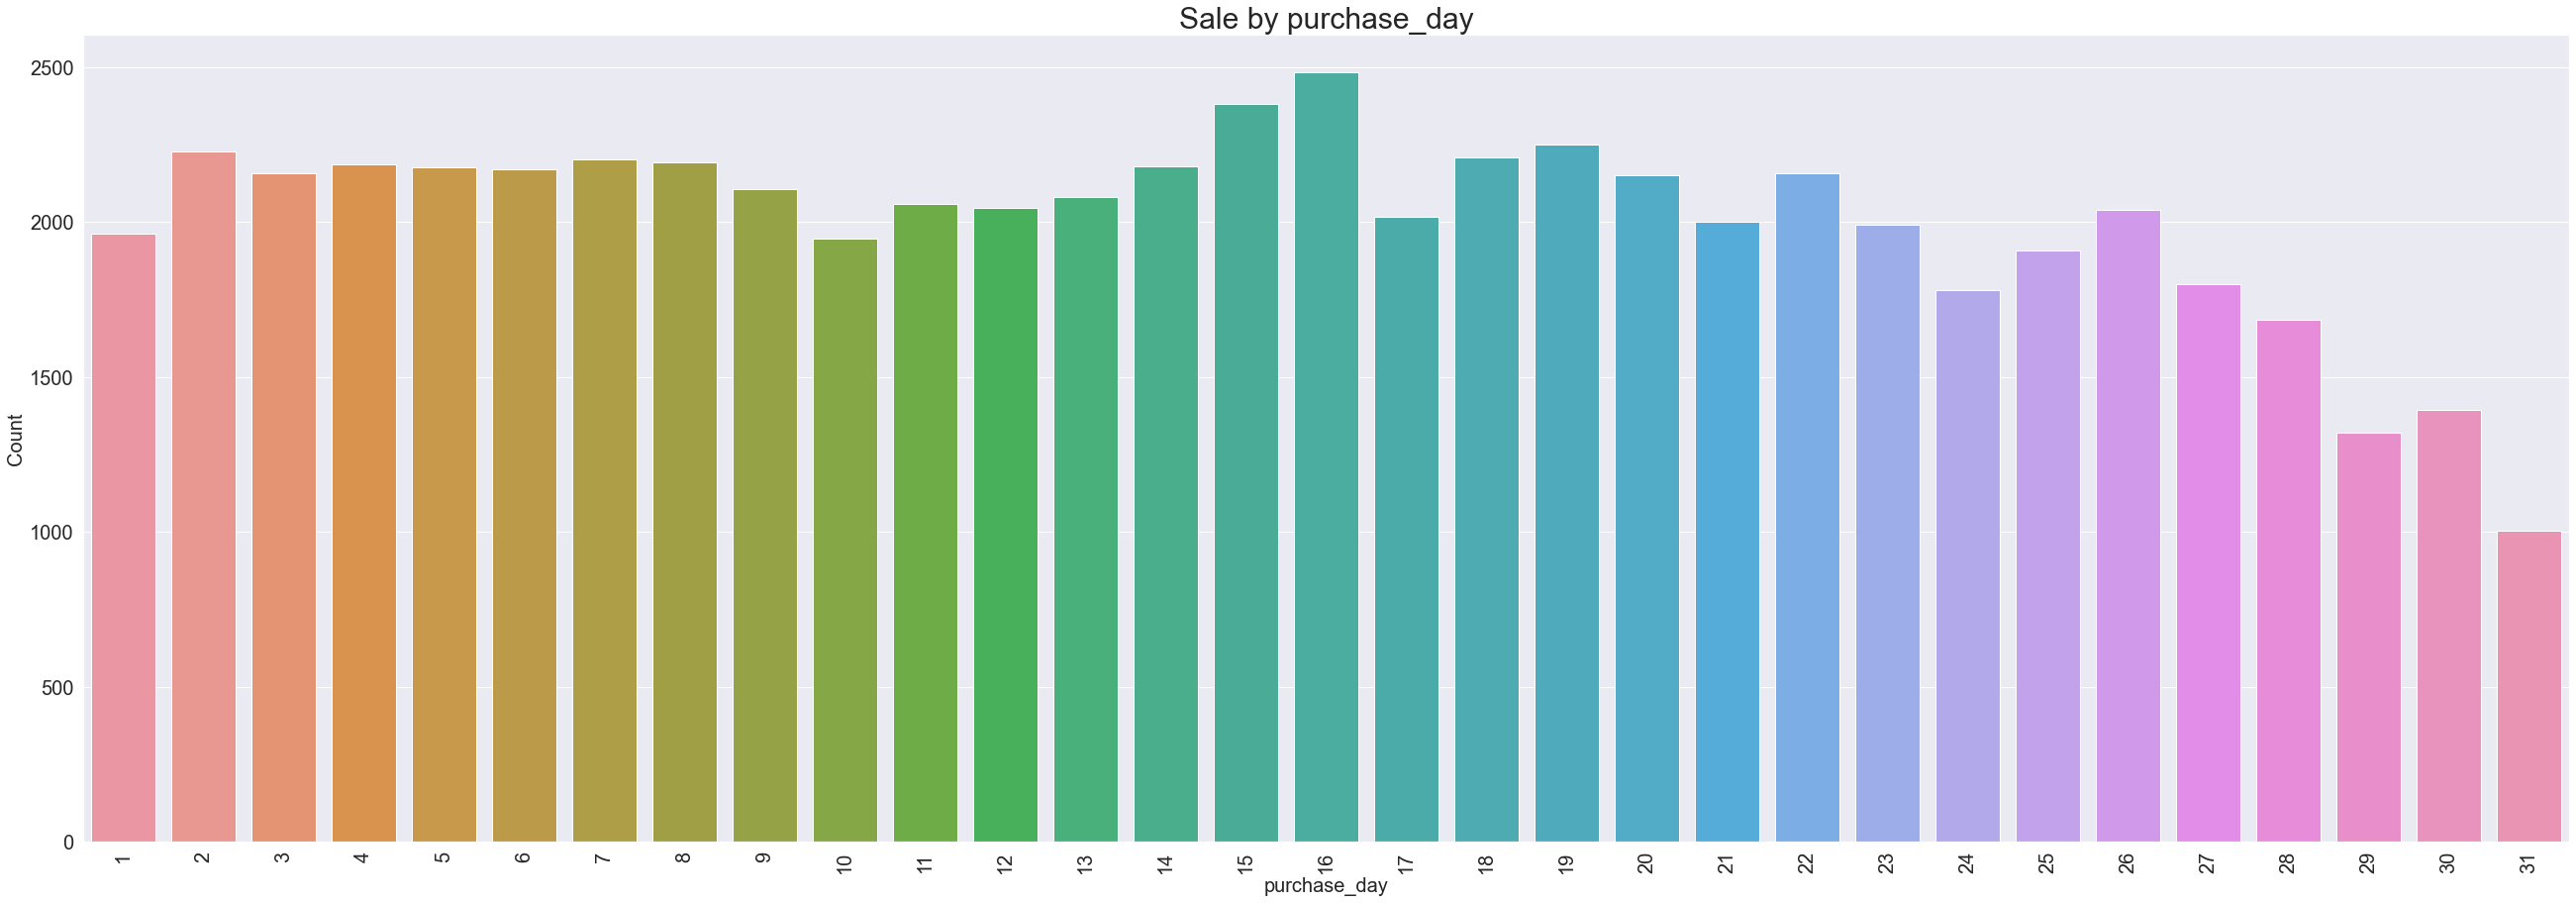

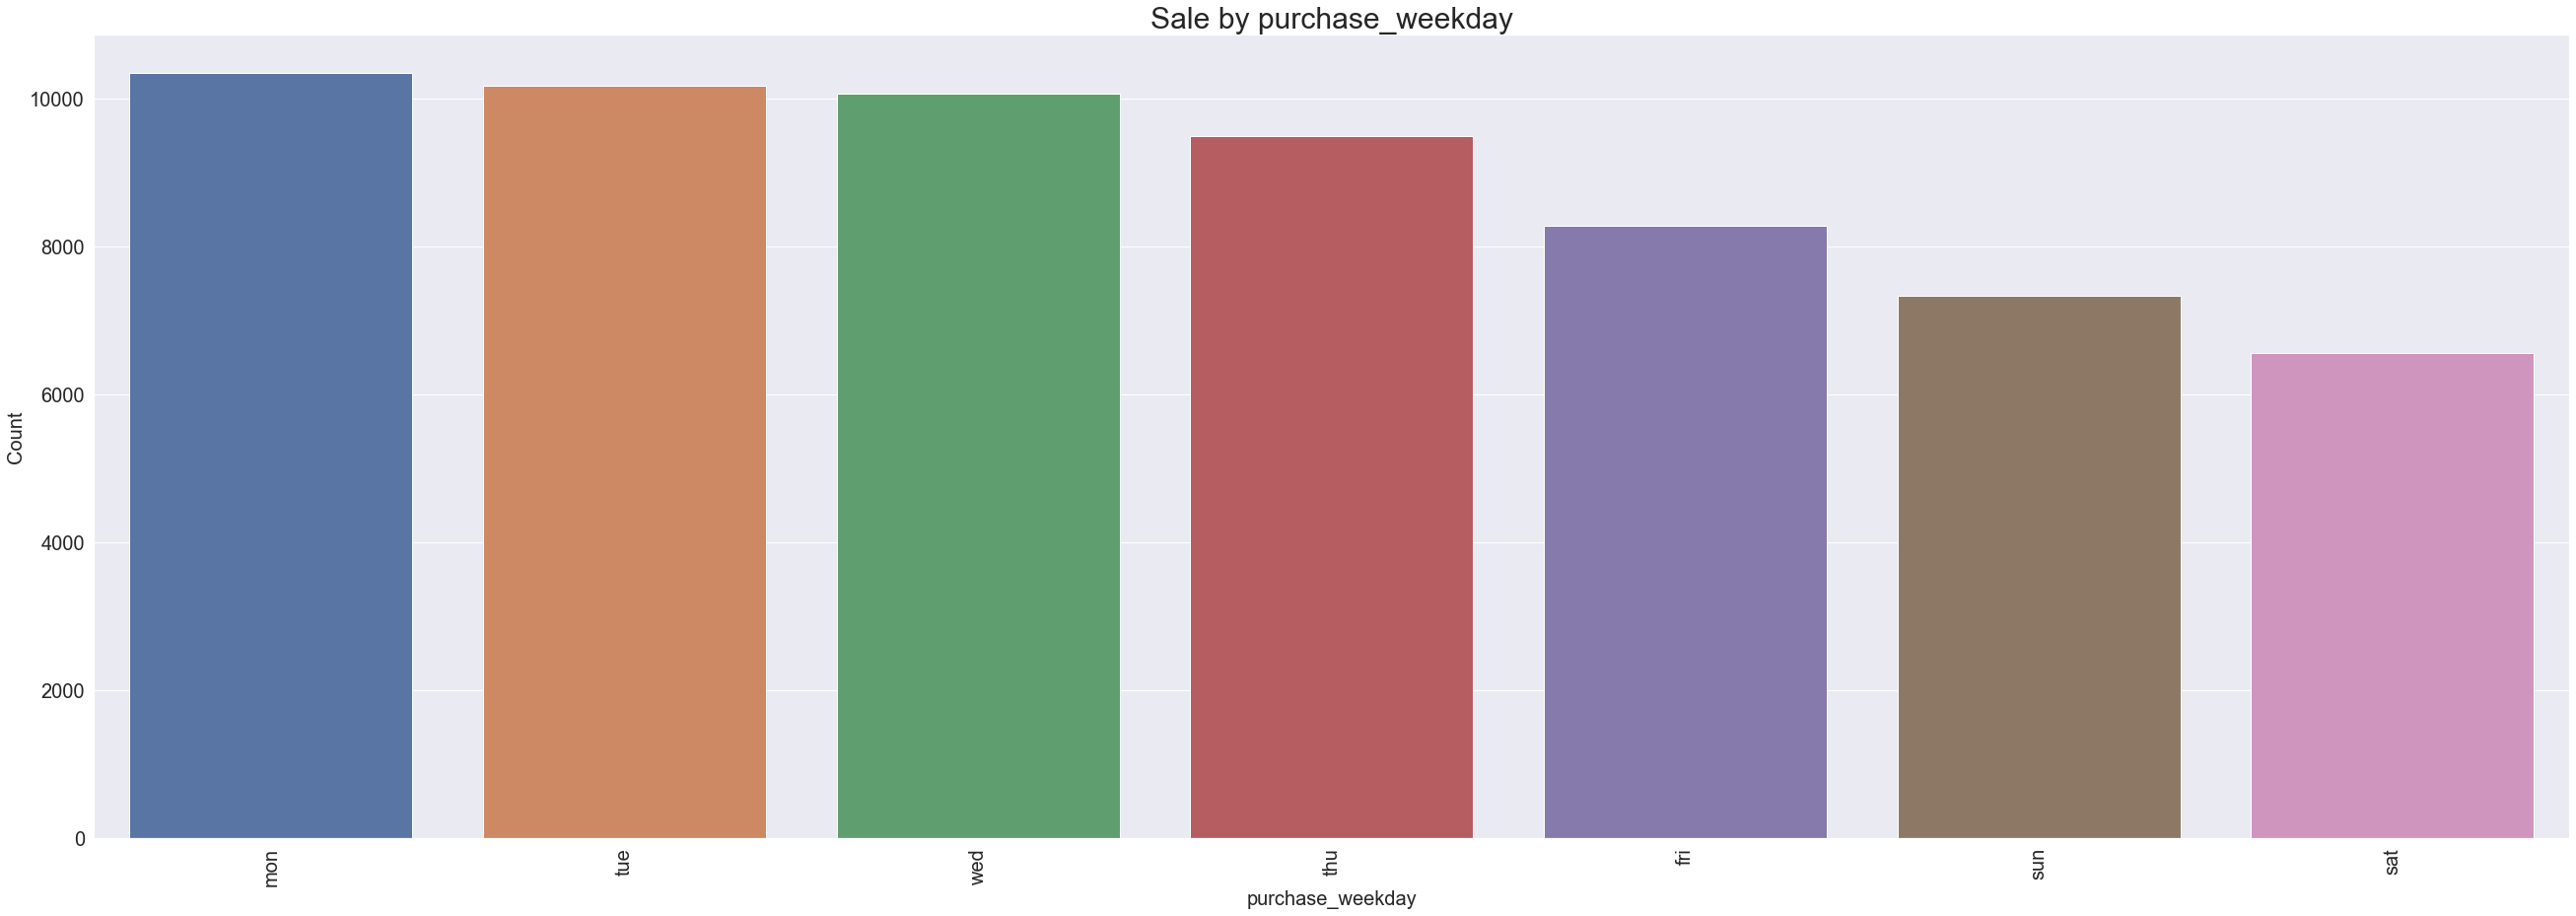

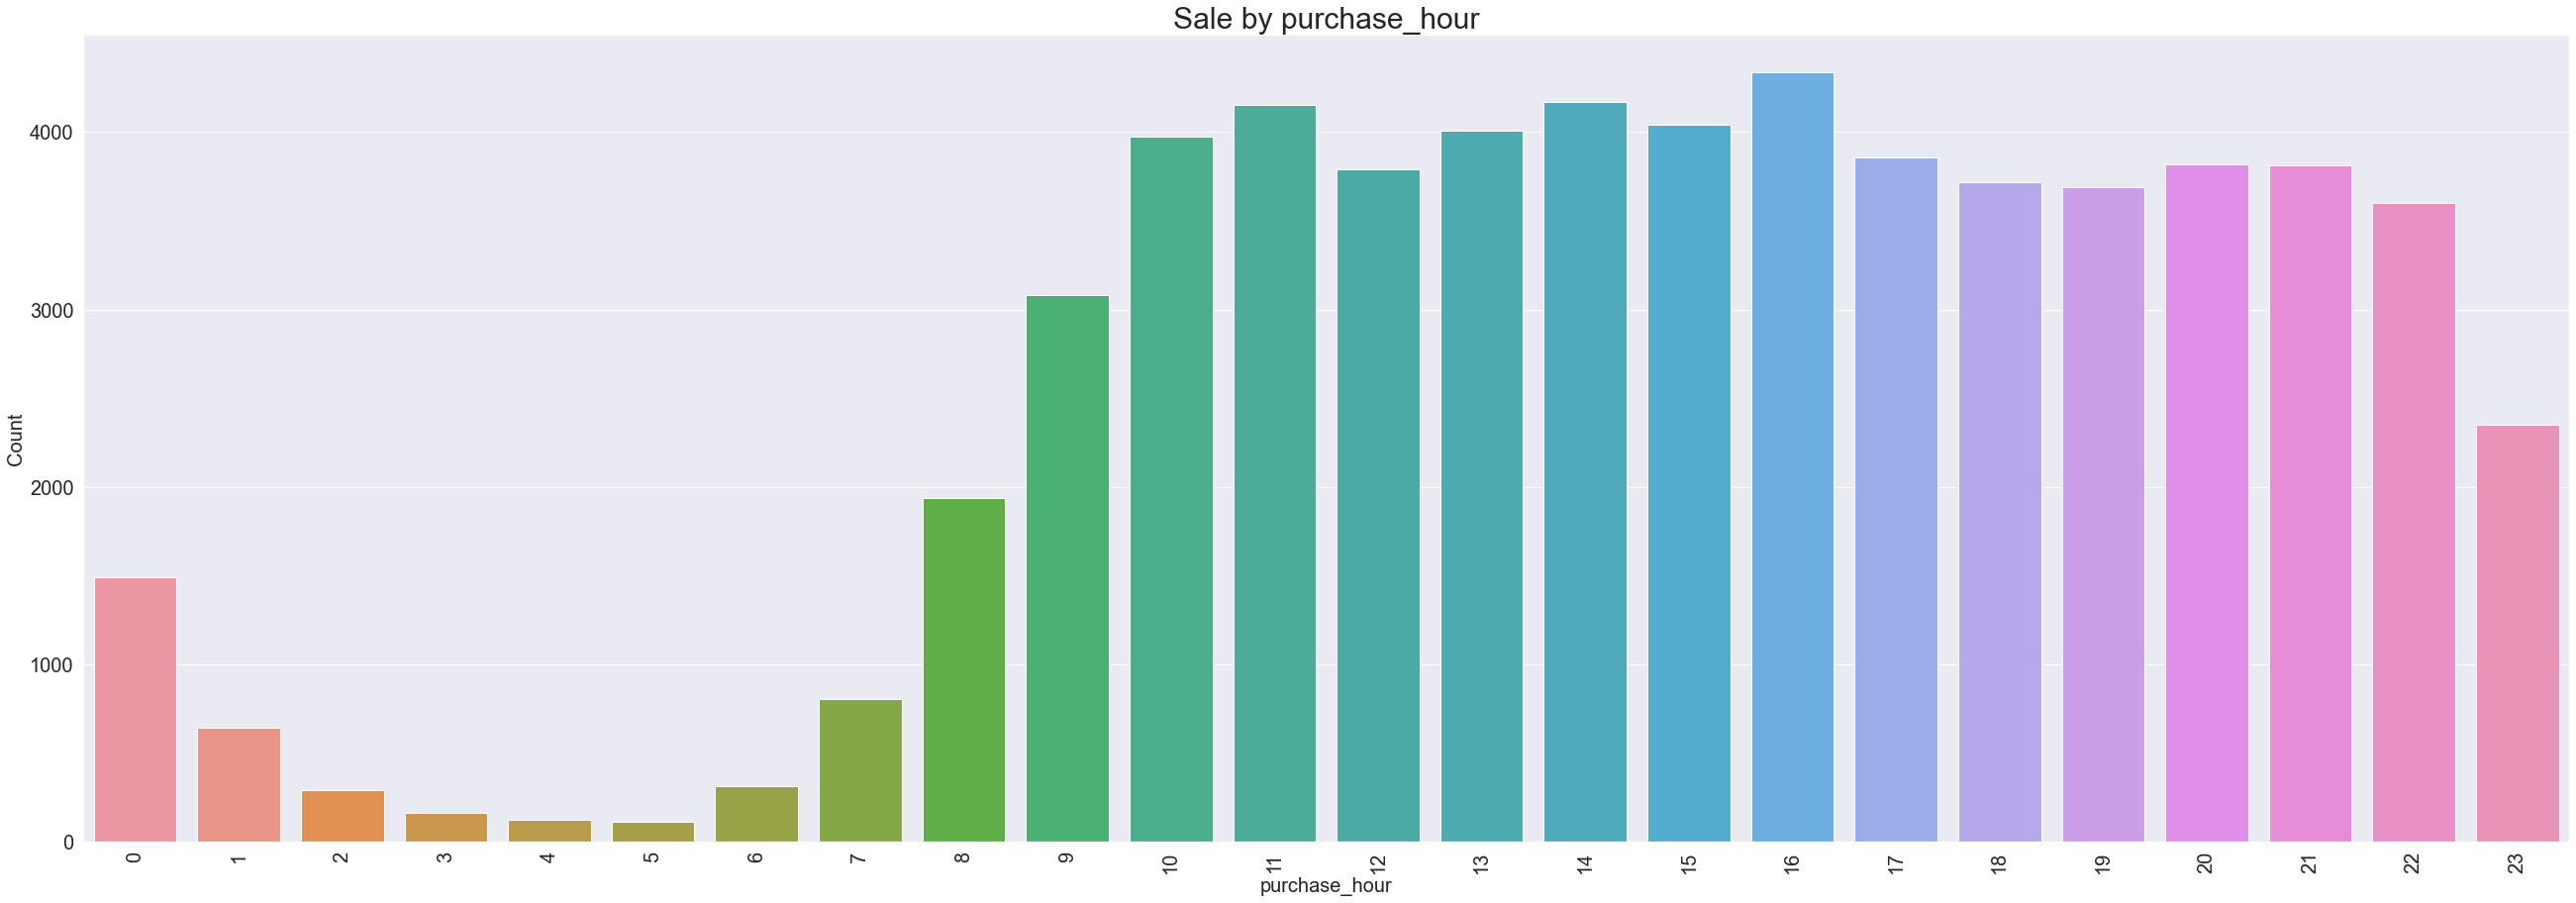

In [126]:
for col in columns:
    plt.figure(figsize=(45, 15))
    plt.xticks(fontsize=20, rotation=90)
    plt.yticks(fontsize=20)
    sns.barplot(x=df[df['purchase_year'] == 2018][col].value_counts().index,
                y=df[df['purchase_year'] == 2018][col].value_counts())
    plt.title('Sale by ' + col, fontsize=30)
    plt.xlabel(col, size=20)
    plt.ylabel('Count', size=20)

- The number of sales increased by 10,000 between January 2017 and August 2018.
- Between January 2017 and August 2018:
    - The days of the month with the most sales are the 24th and the 16th, with the least sales are the 29th, 30th and of course the 31st.
    - The days of the week with the highest selling is in order Monday, Tuesday, Wednesday, Thursday, Friday, Sunday and Saturday.
    - The hours with the most sales are 4 pm, followed by 2 pm and 11 am. The hours with the least sales are between midnight and 8 am.
- Between January 2017 and December 2017:
    - Olist made more sales in November and December.
    - The days of the month with the most sales is the 24th.
    - The days of the week with the highest selling is in order Tuesday, Monday, Friday, Wednesday, Thursday, Sunday and Saturday.
    - The hours with the most sales is 2 pm.
- Between January 2018 and August 2018:
    - The months with the most sales are January, March, April, May.
    - The days of the month with the most sales are the 16th and 15th.
    - The days of the week with the most sales is in order Monday, Tuesday, Wednesday, Thursday, Sunday and Saturday.
    - The hours with the most sales is 4 pm.

## 7.6. Repeaters<a class="anchor" id="section_7_6"></a>

### 7.6.1. By Product

In [127]:
df1 = df.groupby('customer_unique_id')['product_id'].nunique().sort_values()

In [128]:
df2 = df.groupby(['customer_unique_id', 'order_id'])['product_id']\
    .nunique().sort_values()

In [129]:
df3 = pd.merge(df1, df2, on='customer_unique_id', how='left')

In [130]:
df3 = df3.groupby('customer_unique_id')\
    .agg({'product_id_x': lambda x: x.mean(),
          'product_id_y': lambda x: x.sum()})

In [131]:
df3 = pd.merge(df3, df, on='customer_unique_id', how='left')

In [132]:
rows = []

for row in range(df3.shape[0]):
    if df3['product_id_x'][row] != df3['product_id_y'][row]:
        rows.append(df3.iloc[row].name)

In [133]:
df3 = df3[df3.index.isin(rows)]

In [134]:
df3['customer_unique_id'].nunique()

381

### 7.6.2. By Product Category

In [135]:
df1 = df.groupby('customer_unique_id')['product_category_name']\
    .nunique().sort_values()

In [136]:
df2 = df.groupby(['customer_unique_id', 'order_id'])['product_category_name']\
    .nunique().sort_values()

In [137]:
df3 = pd.merge(df1, df2, on='customer_unique_id', how='left')

In [138]:
df3 = df3.groupby('customer_unique_id')\
    .agg({'product_category_name_x': lambda x: x.mean(),
          'product_category_name_y': lambda x: x.sum()})

In [139]:
df3 = pd.merge(df3, df, on='customer_unique_id', how='left')

In [140]:
rows = []

for row in range(df3.shape[0]):
    if df3['product_category_name_x'][row] != \
            df3['product_category_name_y'][row]:
        rows.append(df3.iloc[row].name)

In [141]:
df3 = df3[df3.index.isin(rows)]

In [142]:
df3['customer_unique_id'].nunique()

1340

### 7.6.3. By Seller

In [143]:
df1 = df.groupby('customer_unique_id')['seller_id']\
    .nunique().sort_values()

In [144]:
df2 = df.groupby(['customer_unique_id', 'order_id'])['seller_id']\
    .nunique().sort_values()

In [145]:
df3 = pd.merge(df1, df2, on='customer_unique_id', how='left')

In [146]:
df3 = df3.groupby('customer_unique_id')\
    .agg({'seller_id_x': lambda x: x.mean(),
          'seller_id_y': lambda x: x.sum()})

In [147]:
df3 = pd.merge(df3, df, on='customer_unique_id', how='left')

In [148]:
rows = []

for row in range(df3.shape[0]):
    if df3['seller_id_x'][row] != df3['seller_id_y'][row]:
        rows.append(df3.iloc[row].name)

In [149]:
df3 = df3[df3.index.isin(rows)]

In [150]:
df3['customer_unique_id'].nunique()

839

- There are a total of 381 customers who bought back the same product in different orders, 1340 customers who bought back a product with same product category in different orders and 839 customers who bought back from the same seller.

## 7.7. Customers Reviews<a class="anchor" id="section_7_7"></a>

<AxesSubplot:title={'center':'Distribution of Reviews With Comment Title'}>

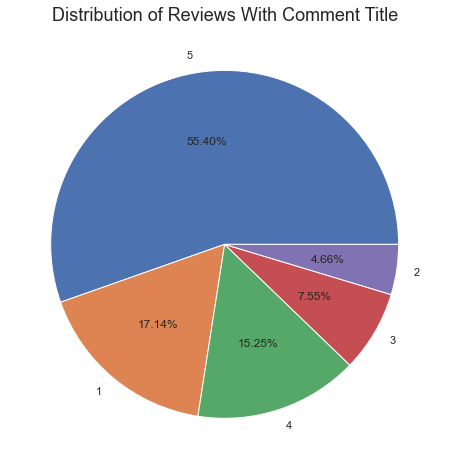

In [151]:
plt.figure()
plt.title('Distribution of Reviews With Comment Title', size=18)
df[df['review_comment_title'] == 'with_comment_title']['review_score']\
    .value_counts().plot.pie(figsize=(8, 8), autopct="%1.2f%%", label='')

<AxesSubplot:title={'center':'Distribution of Reviews Without Comment Title'}>

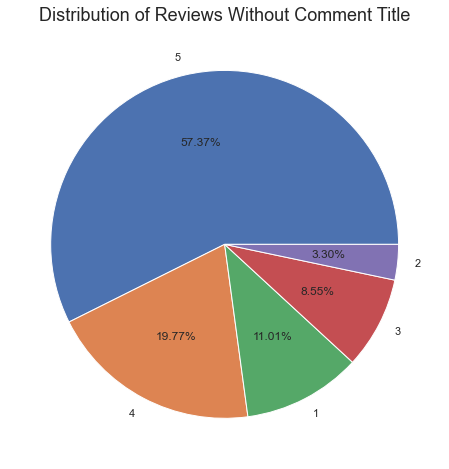

In [152]:
plt.figure()
plt.title('Distribution of Reviews Without Comment Title', size=18)
df[df['review_comment_title'] == 'without_comment_title']['review_score']\
    .value_counts().plot.pie(figsize=(8, 8), autopct="%1.2f%%", label='')

<AxesSubplot:title={'center':'Distribution of Reviews With Comment Message'}>

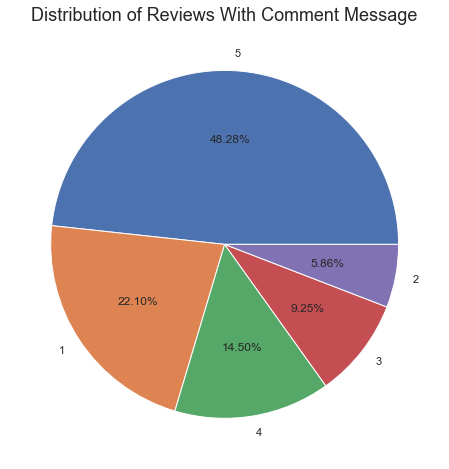

In [153]:
plt.figure()
plt.title('Distribution of Reviews With Comment Message', size=18)
df[df['review_comment_message'] == 'with_comment_message']['review_score']\
    .value_counts().plot.pie(figsize=(8, 8), autopct="%1.2f%%", label='')

In [154]:
plt.figure()
plt.title('Distribution of Reviews Without Comment Message', size=18)
df[df['review_comment_message'] == 'without_comment_message']['review_score']\
    .value_counts().plot.pie(figsize=(8, 8), autopct="%1.2f%%", label='')

<AxesSubplot:title={'center':'Distribution of Reviews Without Comment Message'}>

- The most popular ratings for review with title are in the order of 5 (55.40%), 1 (17.14%), 4 (15.25%), 3 (7.55%) and 2 (4 , 66%).
- The most popular ratings for review without title are in the order of 5 (57.37%), 4 (19.77%), 1 (11.01%), 3 (8.55%) and 2 (3 ,30%).
- The most popular ratings for review with a message are in the order of 5 (48.28%), 1 (22.10%), 4 (14.50%), 3 (9.25%) and 2 (5 , 86%).
- The most popular ratings for review without messages are in the order of 5 (63.60%), 4 (22.69%), 3 (7.84%), 1 (4.17%) and 2 (1 , 71%).
- We can conclude that customers who leave a message tend to have a bad experience.

## 7.8. Review Score<a class="anchor" id="section_7_8"></a>

<AxesSubplot:title={'center':'Dispersion of delivery time by review score'}, xlabel='review_score', ylabel='delivery_time'>

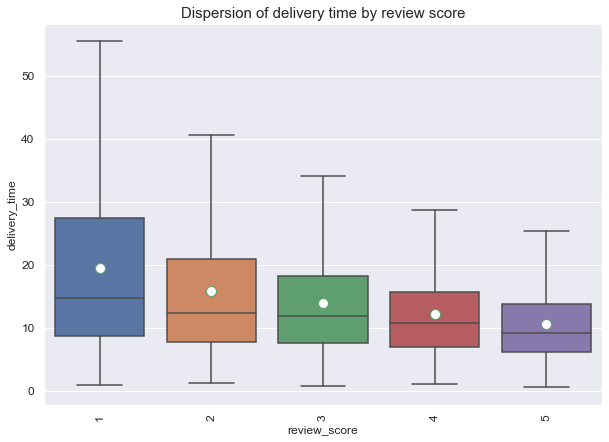

In [155]:
plt.figure(figsize=(10, 7))
plt.title("Dispersion of delivery time by review score", size=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
sns.boxplot(x='review_score', y='delivery_time',
            data=df, showmeans=True,
            meanprops={"marker": "o",
                       "markerfacecolor": "white",
                       "markersize": "10"},
            order=[1, 2, 3, 4, 5], showfliers=False)

In [156]:
df['delivery_time_diff'] = df['estimate_delivery_time'] - df['delivery_time']

<AxesSubplot:title={'center':'Dispersion of the difference between estimate and true delivery time by review score'}, xlabel='review_score', ylabel='delivery_time_diff'>

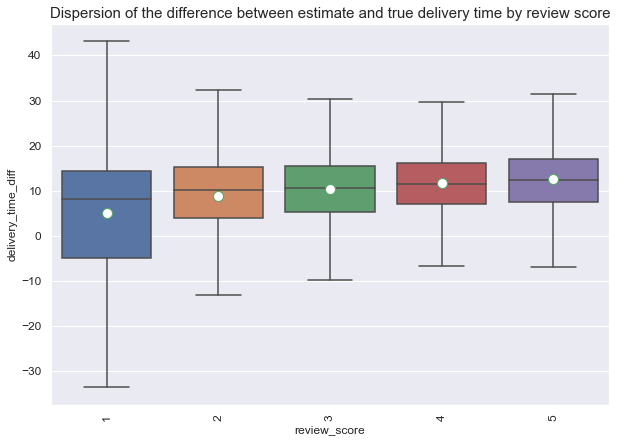

In [157]:
plt.figure(figsize=(10, 7))
plt.title("Dispersion of the difference between \
estimate and true delivery time by review score", size=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
sns.boxplot(x='review_score', y='delivery_time_diff',
            data=df, showmeans=True,
            meanprops={"marker": "o",
                       "markerfacecolor": "white",
                       "markersize": "10"},
            order=[1, 2, 3, 4, 5], showfliers=False)

In [158]:
df[df['delivery_time_diff'] < 0]['review_score'].describe()

count    8963.000000
mean        2.527056
std         1.654968
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: review_score, dtype: float64

<AxesSubplot:title={'center':'Distribution of Reviews for late delivery'}>

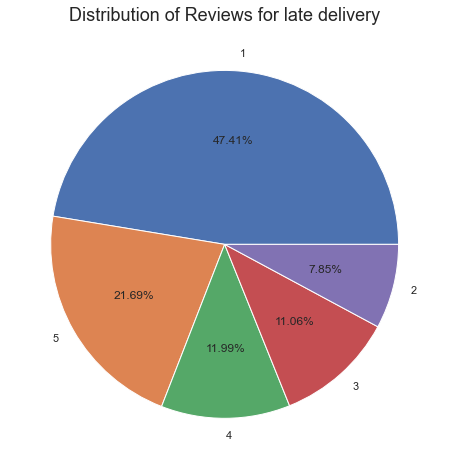

In [159]:
plt.figure()
plt.title('Distribution of Reviews for late delivery', size=18)
df[df['delivery_time_diff'] < 0]['review_score']\
    .value_counts().plot.pie(figsize=(8, 8), autopct="%1.2f%%", label='')

<AxesSubplot:title={'center':'Dispersion of payment_value by review score'}, xlabel='review_score', ylabel='payment_value'>

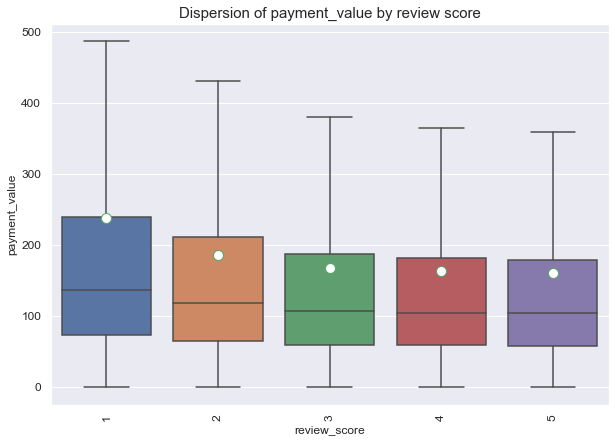

In [160]:
plt.figure(figsize=(10, 7))
plt.title("Dispersion of payment_value by review score", size=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
sns.boxplot(x='review_score', y='payment_value',
            data=df, showmeans=True,
            meanprops={"marker": "o",
                       "markerfacecolor": "white",
                       "markersize": "10"},
            order=[1, 2, 3, 4, 5], showfliers=False)

- It seems that longer the delivery time has a correlation with bad review_score.
- Same with exceeded estimated delivery time.
- The price seems to affect review_score.

# 8. Cohort Time Analysis<a class="anchor" id="chapter8"></a>

In [161]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [162]:
df['order_purchase_timestamp_M'] =\
    df['order_purchase_timestamp'].apply(get_month)
df_group = df.groupby('customer_unique_id')['order_purchase_timestamp_M']
df['CohortMonth'] = df_group.transform('min')

In [163]:
def get_month_int(dframe, column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year, month, day

In [164]:
order_year, order_month, _ = get_month_int(df, 'order_purchase_timestamp_M')
cohort_year, cohort_month, _ = get_month_int(df, 'CohortMonth')

year_diff = order_year - cohort_year
month_diff = order_month - cohort_month

df['CohortIndex'] = year_diff * 12 + month_diff + 1

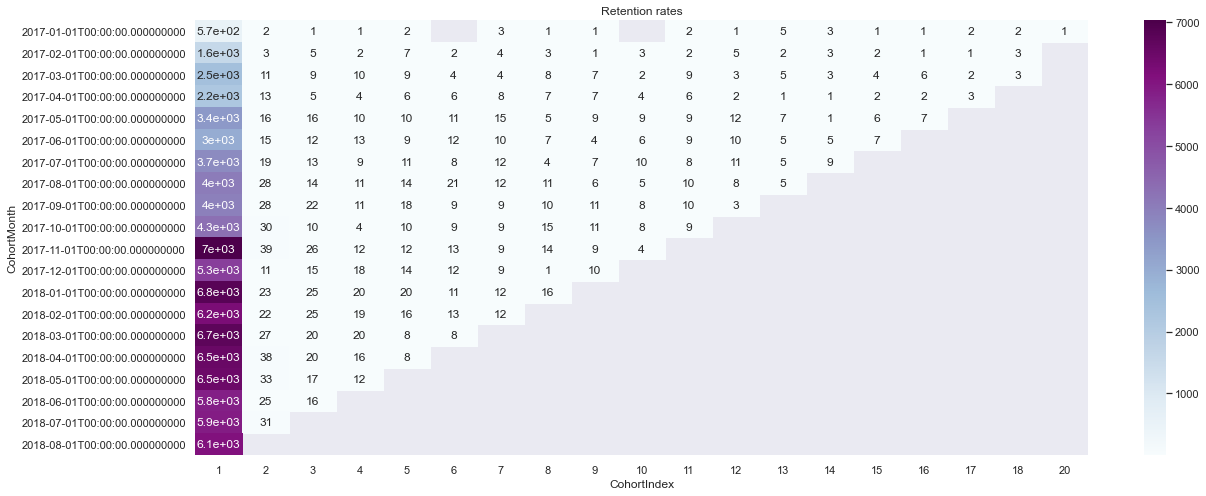

In [165]:
df_group = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = df_group['customer_unique_id'].apply(pd.Series.nunique)

cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndex',
                                  values='customer_unique_id')

plt.figure(figsize=(20, 8))
plt.title('Retention rates')
sns.heatmap(data=cohort_counts,
            annot=True,
            cmap="BuPu")
plt.show()

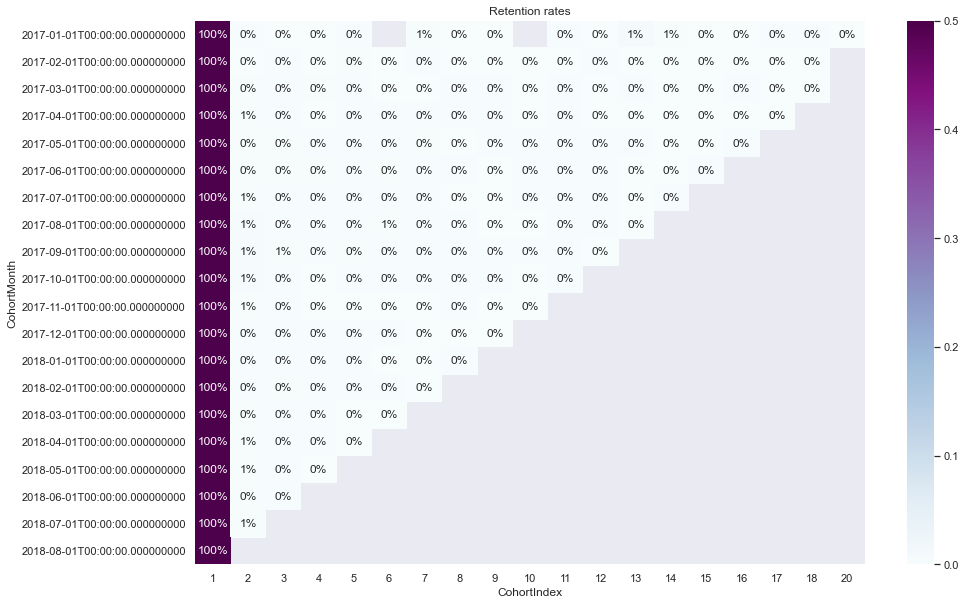

In [166]:
df_group = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = df_group['customer_unique_id'].apply(pd.Series.nunique)

cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndex',
                                  values='customer_unique_id')

cohort_size = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_size, axis=0)
retention.round(3) * 100

plt.figure(figsize=(15, 10))
plt.title('Retention rates')
sns.heatmap(data=retention,
            annot=True,
            fmt='.0%',
            vmin=0.0,
            vmax=0.5,
            cmap="BuPu")
plt.show()

## 8.1. Unsatisfied Customers<a class="anchor" id="section_8_1"></a>

In [167]:
df['order_purchase_timestamp_M_UC'] =\
    df[df['review_score'] == 1]['order_purchase_timestamp'].apply(get_month)
df_group = df[df['review_score'] == 1]\
    .groupby('customer_unique_id')['order_purchase_timestamp_M']
df['CohortMonth_UC'] = df_group.transform('min')

In [168]:
order_year, order_month, _ = get_month_int(df, 'order_purchase_timestamp_M_UC')
cohort_year, cohort_month, _ = get_month_int(df, 'CohortMonth_UC')

year_diff = order_year - cohort_year
month_diff = order_month - cohort_month

df['CohortIndex_UC'] = year_diff * 12 + month_diff + 1

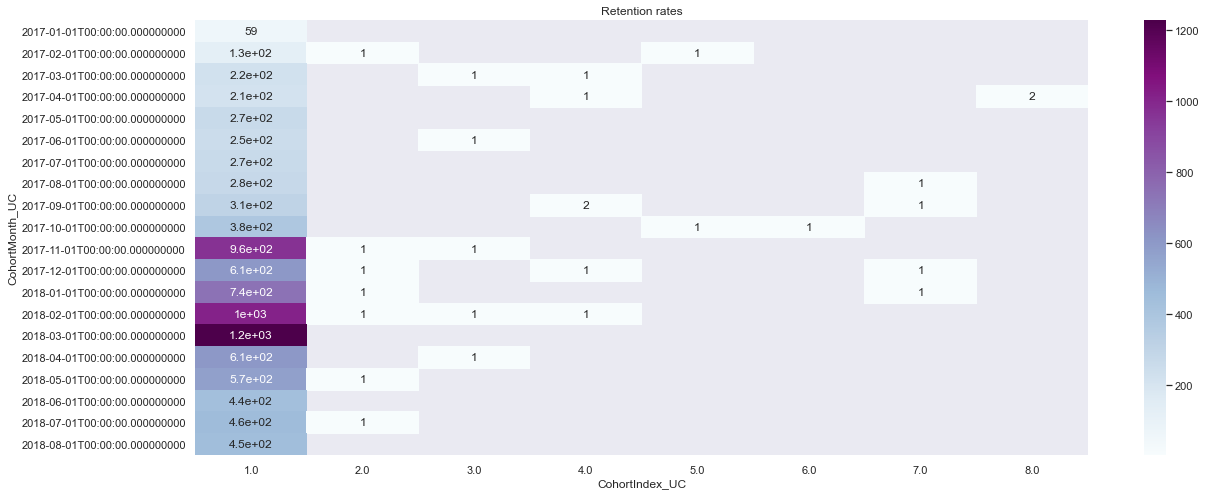

In [169]:
df_group = df[df['review_score'] == 1]\
    .groupby(['CohortMonth_UC', 'CohortIndex_UC'])
cohort_data = df_group['customer_unique_id'].apply(pd.Series.nunique)

cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth_UC',
                                  columns='CohortIndex_UC',
                                  values='customer_unique_id')

plt.figure(figsize=(20, 8))
plt.title('Retention rates')
sns.heatmap(data=cohort_counts,
            annot=True,
            cmap="BuPu")
plt.show()

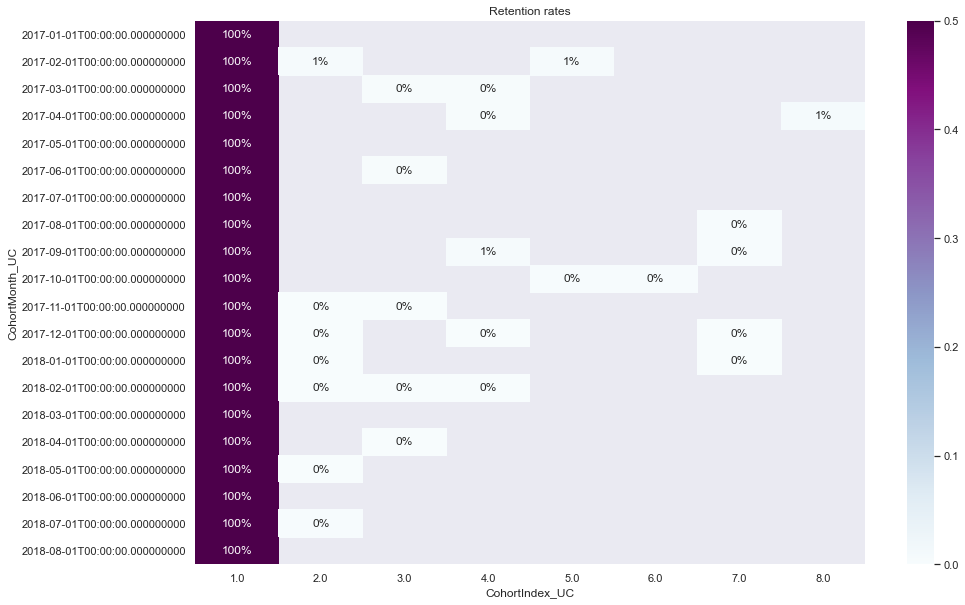

In [170]:
df_group = df[df['review_score'] == 1]\
    .groupby(['CohortMonth_UC', 'CohortIndex_UC'])
cohort_data = df_group['customer_unique_id'].apply(pd.Series.nunique)

cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth_UC',
                                  columns='CohortIndex_UC',
                                  values='customer_unique_id')

cohort_size = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_size, axis=0)
retention.round(3) * 100

plt.figure(figsize=(15, 10))
plt.title('Retention rates')
sns.heatmap(data=retention,
            annot=True,
            fmt='.0%',
            vmin=0.0,
            vmax=0.5,
            cmap="BuPu")
plt.show()

## 8.2. Satisfied Customers<a class="anchor" id="section_8_2"></a>

In [171]:
df['order_purchase_timestamp_M_SC'] =\
    df[df['review_score'] == 5]['order_purchase_timestamp'].apply(get_month)
df_group = df[df['review_score'] == 5]\
    .groupby('customer_unique_id')['order_purchase_timestamp_M']
df['CohortMonth_SC'] = df_group.transform('min')

In [172]:
order_year, order_month, _ = get_month_int(df, 'order_purchase_timestamp_M_SC')
cohort_year, cohort_month, _ = get_month_int(df, 'CohortMonth_SC')

year_diff = order_year - cohort_year
month_diff = order_month - cohort_month

df['CohortIndex_SC'] = year_diff * 12 + month_diff + 1

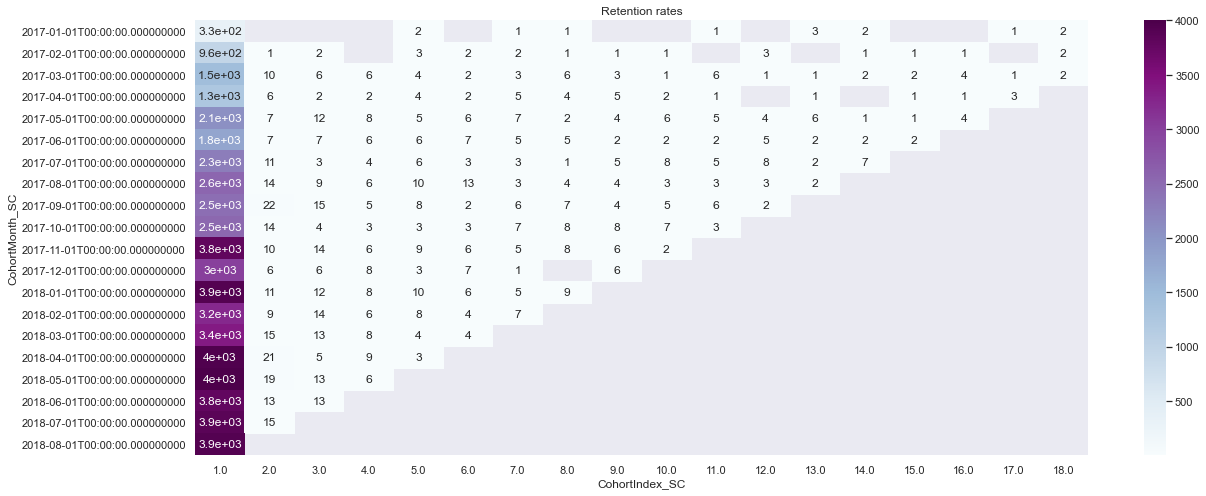

In [173]:
df_group = df[df['review_score'] == 5]\
    .groupby(['CohortMonth_SC', 'CohortIndex_SC'])
cohort_data = df_group['customer_unique_id'].apply(pd.Series.nunique)

cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth_SC',
                                  columns='CohortIndex_SC',
                                  values='customer_unique_id')

plt.figure(figsize=(20, 8))
plt.title('Retention rates')
sns.heatmap(data=cohort_counts,
            annot=True,
            cmap="BuPu")
plt.show()

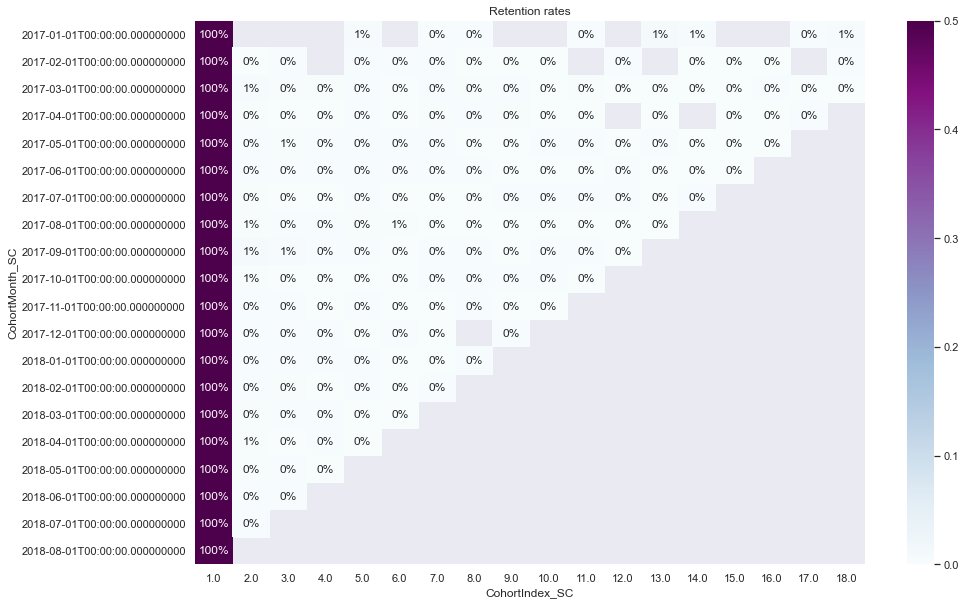

In [174]:
df_group = df[df['review_score'] == 5]\
    .groupby(['CohortMonth_SC', 'CohortIndex_SC'])
cohort_data = df_group['customer_unique_id'].apply(pd.Series.nunique)

cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth_SC',
                                  columns='CohortIndex_SC',
                                  values='customer_unique_id')

cohort_size = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_size, axis=0)
retention.round(3) * 100

plt.figure(figsize=(15, 10))
plt.title('Retention rates')
sns.heatmap(data=retention,
            annot=True,
            fmt='.0%',
            vmin=0.0,
            vmax=0.5,
            cmap="BuPu")
plt.show()

## 8.3. Last Purchase Date / Features Correlation<a class="anchor" id="section_8_3"></a>

In [175]:
df_last_purchase = df[df['nb_orders_customers'] >= 2]

In [176]:
df_last_purchase['Last_purchase'] =\
    df_last_purchase.groupby('customer_unique_id')['order_purchase_timestamp']\
    .transform('max')

<ipython-input-176-133091683859>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_purchase['Last_purchase'] =\


In [177]:
df_last_purchase['Last_purchase'] = \
    pd.to_numeric(df_last_purchase['Last_purchase'])

<ipython-input-177-524af4c5f892>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_purchase['Last_purchase'] = \


In [178]:
plt.figure(figsize=(10, 5))
plt.title('Spearman correlation', size=15)
sns.heatmap(df_last_purchase[['Last_purchase', 'product_volume_cm3',
                              'total_price', 'purchase_hour', 'purchase_day',
                              'delivery_time', 'distance_seller_customer',
                              'review_score']]
            .corr(method='spearman'), annot=True)

<AxesSubplot:title={'center':'Spearman correlation'}>

In [179]:
plt.figure(figsize=(10, 5))
plt.title('Pearson correlation', size=15)
sns.heatmap(df_last_purchase[['Last_purchase', 'product_volume_cm3',
                              'total_price', 'purchase_hour', 'purchase_day',
                              'delivery_time', 'distance_seller_customer',
                              'review_score']]
            .corr(method='pearson'), annot=True)

<AxesSubplot:title={'center':'Pearson correlation'}>

# 9. Feature Engineering 2<a class="anchor" id="chapter9"></a>

In [180]:
df.loc[df['customer_state'].isin(['RR', 'AM', 'AC', 'RO', 'AP', 'PA', 'TO']),
       'customer_state'] = 'North_Region'
df.loc[df['customer_state'].isin(['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL',
                                  'SE', 'BA']),
       'customer_state'] = 'Northeast_Region'
df.loc[df['customer_state'].isin(['MT', 'MS', 'GO', 'DF']),
       'customer_state'] = 'Central_West_Region'
df.loc[df['customer_state'].isin(['MG', 'ES', 'RJ', 'SP']),
       'customer_state'] = 'Southeast_Region'
df.loc[df['customer_state'].isin(['PR', 'SC', 'RS']),
       'customer_state'] = 'South_Region'

In [181]:
df.loc[df['purchase_month'].isin(['jan', 'feb', 'mar', 'apr']),
       'purchase_month'] = 'month_1'
df.loc[df['purchase_month'].isin(['may', 'jun', 'jul', 'agu']),
       'purchase_month'] = 'month_2'
df.loc[df['purchase_month'].isin(['sep', 'oct', 'nov', 'dec']),
       'purchase_month'] = 'month_3'

In [182]:
df.loc[df['purchase_weekday'].isin(['mon', 'thu', 'wed', 'fri', 'tue']),
       'purchase_weekday'] = 'week'
df.loc[df['purchase_weekday'].isin(['sun', 'sat']),
       'purchase_weekday'] = 'weekend'

In [183]:
home_supply = ['housewares',
               'bed_bath_table',
               'furniture_decor',
               'furniture_living_room',
               'kitchen_dining_laundry_garden_furniture',
               'home_appliances_2',
               'home_appliances',
               'small_appliances',
               'home_confort',
               'furniture_bedroom',
               'small_appliances_home_oven_and_coffee',
               'christmas_supplies',
               'furniture_mattress_and_upholstery',
               'home_comfort_2',
               'la_cuisine']

health_care_fashion = ['health_beauty',
                       'perfumery',
                       'diapers_and_hygiene',
                       'watches_gifts',
                       'fashion_bags_accessories',
                       'fashion_underwear_beach',
                       'fashion_shoes',
                       'fashion_male_clothing',
                       'fashion_sport',
                       'fashio_female_clothing',
                       'luggage_accessories',
                       'fashion_childrens_clothes']

electronic = ['telephony',
              'computers_accessories',
              'audio',
              'auto',
              'tablets_printing_image',
              'electronics',
              'fixed_telephony',
              'computers',
              'pc_gamer',
              'consoles_games']

office = ['office_furniture',
          'agro_industry_and_commerce',
          'industry_commerce_and_business',
          'market_place',
          'stationery']

leisure = ['books_general_interest',
           'sports_leisure',
           'toys',
           'musical_instruments',
           'books_technical',
           'party_supplies',
           'books_imported',
           'cine_photo',
           'art',
           'arts_and_craftmanship',
           'music',
           'dvds_blu_ray',
           'cds_dvds_musicals']

construction = ['construction_tools_construction',
                'construction_tools_lights',
                'air_conditioning',
                'signaling_and_security',
                'construction_tools_safety',
                'costruction_tools_tools',
                'security_and_services',
                'home_construction',
                'costruction_tools_garden']

other = ['baby',
         'pet_shop',
         'garden_tools',
         'flowers',
         'food',
         'cool_stuff',
         'food_drink',
         'drinks',
         'portateis_cozinha_e_preparadores_de_alimentos',
         'no_information']

In [184]:
df.loc[df['product_category_name'].isin(home_supply),
       'product_category_name'] = 'home_supply'
df.loc[df['product_category_name'].isin(health_care_fashion),
       'product_category_name'] = 'health_care_fashion'
df.loc[df['product_category_name'].isin(electronic),
       'product_category_name'] = 'electronic'
df.loc[df['product_category_name'].isin(office),
       'product_category_name'] = 'office'
df.loc[df['product_category_name'].isin(leisure),
       'product_category_name'] = 'leisure'
df.loc[df['product_category_name'].isin(construction),
       'product_category_name'] = 'construction'
df.loc[df['product_category_name'].isin(other),
       'product_category_name'] = 'other'

In [185]:
df.drop(columns=['order_purchase_timestamp_M_UC',
                 'CohortMonth_UC',
                 'CohortIndex_UC',
                 'order_purchase_timestamp_M_SC',
                 'CohortMonth_SC',
                 'CohortIndex_SC'], inplace=True)

In [186]:
DataSetsExplo(df)

Dataset has  113938 rows and  60 columns
Number of non-null values by columns :
order_id                         113938
customer_id                      113938
order_status                     113938
order_purchase_timestamp         113938
order_approved_at                113938
order_delivered_carrier_date     113938
order_delivered_customer_date    113938
order_estimated_delivery_date    113938
order_item_id                    113938
product_id                       113938
seller_id                        113938
shipping_limit_date              113938
price                            113938
freight_value                    113938
payment_sequential               113938
payment_type                     113938
payment_installments             113938
payment_value                    113938
review_id                        113938
review_score                     113938
review_comment_title             113938
review_comment_message           113938
review_creation_date             113938


In [187]:
df.to_csv('P05_DataClean.csv')